In [0]:
# https://www.datacamp.com/courses/deep-learning-in-python

In [0]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.metrics import mean_squared_error

from keras.layers import Dense
from keras.models import Sequential
from keras.utils import to_categorical
from keras.optimizers import SGD
from keras.callbacks import EarlyStopping

Using TensorFlow backend.


In [0]:
# to export dataframe
print(df.to_string())

In [0]:
# to display entire array
with np.set_printoptions(threshold=np.inf):
    print(predictors)

## 1. Basic of deep learning and neural networks

#### Forward propagation

The input data has been pre-loaded as input_data, and the weights are available in a dictionary called weights. The array of weights for the first node in the hidden layer are in weights['node_0'], and the array of weights for the second node in the hidden layer are in weights['node_1'].

The weights feeding into the output node are available in weights['output'].

In [0]:
# input_data = [3, 5] # list
# input_data = (3, 5) # tuple
input_data = np.array([3, 5]) # numpy.ndarray

In [0]:
input_data

array([3, 5])

In [0]:
weights = {'node_0': np.array([2, 4]), 
           'node_1': np.array([ 4, -5]), 
           'output': np.array([2, 7])}
# type(weights) = dict

Calculate the value in node 0 by multiplying input_data by its weights weights['node_0'] and computing their sum. This is the 1st node in the hidden layer.

In [0]:
node_0_value = (input_data * weights['node_0']).sum()

Calculate the value in node 1 using input_data and weights['node_1']. This is the 2nd node in the hidden layer.

In [0]:
node_1_value = (input_data * weights['node_1']).sum()

Put the hidden layer values into an array. 

In [0]:
hidden_layer_outputs = np.array([node_0_value, node_1_value])

Generate the prediction by multiplying hidden_layer_outputs by weights['output'] and computing their sum.

In [0]:
output = (hidden_layer_outputs * weights['output']).sum()

In [0]:
# Print output
print(output)

-39


#### Activation functions

>> The Rectified Linear Activation Function

An "activation function" is a function applied at each node. It converts the node's input into some output.

ReLU takes a single number as an input, returning 0 if the input is negative, and the input is positive.


In [0]:
def relu(input):
    '''Define your relu activation function here'''
    # Calculate the value for the output of the relu function: output
    output = max(0, input)
    
    # Return the value just calculated
    return(output)

In [0]:
# Calculate node 0 value: node_0_output
node_0_input = (input_data * weights['node_0']).sum()
node_0_output = relu(node_0_input)

In [0]:
# Calculate node 1 value: node_1_output
node_1_input = (input_data * weights['node_1']).sum()
node_1_output = relu(node_1_input)

In [0]:
# Put node values into array: hidden_layer_outputs
hidden_layer_outputs = np.array([node_0_output, node_1_output])

In [0]:
# Calculate model output (do not apply relu)
model_output = (hidden_layer_outputs * weights['output']).sum()

In [0]:
# Print model output
print(model_output)

52


You'll now define a function called `predict_with_network()` which will generate predictions for multiple data observations, which are pre-loaded as input_data. As before, weights are also pre-loaded. In addition, the `relu()` function you defined in the previous exercise has been pre-loaded.

In [0]:
# Define predict_with_network()
def predict_with_network(input_data_row, weights):

    # Calculate node 0 value
    node_0_input = (input_data_row * weights['node_0']).sum()
    node_0_output = relu(node_0_input)

    # Calculate node 1 value
    node_1_input = (input_data_row * weights['node_1']).sum()
    node_1_output = relu(node_1_input)

    # Put node values into array: hidden_layer_outputs
    hidden_layer_outputs = np.array([node_0_output, node_1_output])
    
    # Calculate model output
    input_to_final_layer = (hidden_layer_outputs * weights['output']).sum()
    model_output = relu(input_to_final_layer)
    
    # Return model output
    return(model_output)

In [0]:
# Create empty list to store prediction results
results = []
for input_data_row in input_data:
    # Append prediction to results
    results.append(predict_with_network(input_data_row, weights))

In [0]:
# Print results
print(results)

[36, 60]


#### Deeper networks

In this exercise, you'll write code to do forward propagation for a neural network with 2 hidden layers. Each hidden layer has two nodes. 

In [0]:
# update weights for multi-layer neural networks
weights = {'node_0_0': np.array([2, 4]), 
           'node_0_1': np.array([ 4, -5]), 
           'node_1_0': np.array([-1, 2]),
           'node_1_1': np.array([1, 2]),
           'output': np.array([2, 7]),
           }
# type(weights) = dict

In [0]:
def predict_with_network(input_data):
    # Calculate node 0 in the first hidden layer
    node_0_0_input = (input_data * weights['node_0_0']).sum()
    node_0_0_output = relu(node_0_0_input)

    # Calculate node 1 in the first hidden layer
    node_0_1_input = (input_data * weights['node_0_1']).sum()
    node_0_1_output = relu(node_0_1_input)

    # Put node values into array: hidden_0_outputs
    hidden_0_outputs = np.array([node_0_0_output, node_0_1_output])
    '''
    using the outputs from the first hidden layer
    '''
    # Calculate node 0 in the second hidden layer
    node_1_0_input = (hidden_0_outputs * weights['node_1_0']).sum()
    node_1_0_output = relu(node_1_0_input)

    # Calculate node 1 in the second hidden layer
    node_1_1_input = (hidden_0_outputs * weights['node_1_1']).sum()
    node_1_1_output = relu(node_1_1_input)

    # Put node values into array: hidden_1_outputs
    hidden_1_outputs = np.array([node_1_0_output, node_1_1_output])

    # Calculate model output: model_output
    model_output = (hidden_1_outputs * weights['output']).sum()
    
    # Return model_output
    return(model_output)

output = predict_with_network(input_data)
print(output)

182


## 2. Optimizing a neural network with backward propagation

#### The need for optimization

In [0]:
# The data point you will make a prediction for
input_data = np.array([0, 3])

# Sample weights
weights_0 = {'node_0': [2, 1],
             'node_1': [1, 2],
             'output': [1, 1]
            }

# The actual target value, used to calculate the error
target_actual = 3

In [0]:
# Define predict_with_network()
def predict_with_network(input_data_row, weights):

    # Calculate node 0 value
    node_0_input = (input_data_row * weights['node_0']).sum()
    node_0_output = relu(node_0_input)

    # Calculate node 1 value
    node_1_input = (input_data_row * weights['node_1']).sum()
    node_1_output = relu(node_1_input)

    # Put node values into array: hidden_layer_outputs
    hidden_layer_outputs = np.array([node_0_output, node_1_output])
    
    # Calculate model output
    input_to_final_layer = (hidden_layer_outputs * weights['output']).sum()
    model_output = relu(input_to_final_layer)
    
    # Return model output
    return(model_output)

In [0]:
# Make prediction using original weights
model_output_0 = predict_with_network(input_data, weights_0)

# Calculate error: error_0
error_0 = model_output_0 - target_actual
error_0

6

Your task in this exercise is to update a single weight in weights_0 to create weights_1, which gives a perfect prediction (in which the predicted value is equal to target_actual: 3).

In [0]:
# Create weights that cause the network to make perfect prediction (3): weights_1
weights_1 = {'node_0': [2, 1],
             'node_1': [1, 2],
             'output': [1, 0]
            }

In [0]:
# Make prediction using new weights: model_output_1
model_output_1 = predict_with_network(input_data, weights_1)

# Calculate error: error_1
error_1 = model_output_1 - target_actual

In [0]:
# Print error_0 and error_1
print(error_0)
print(error_1)

6
0


You'll now write code to compare model accuracies for two different sets of weights, which have been stored as **weights_0** and **weights_1**.

**input_data** is a list of arrays. Each item in that list contains the data to make a single prediction. **target_actuals** is a list of numbers. Each item in that list is the actual value we are trying to predict.

In [0]:
input_data = [np.array([0, 3]), 
              np.array([1, 2]), 
              np.array([-1, -2]), 
              np.array([4, 0])]
input_data

[array([0, 3]), array([1, 2]), array([-1, -2]), array([4, 0])]

In [0]:
weights_0

{'node_0': [2, 1], 'node_1': [1, 2], 'output': [1, 1]}

In [0]:
weights_1 = {'node_0': [2, 1],
             'node_1': [1., 1.5],
             'output': [1., 1.5]
            }
weights_1

{'node_0': [2, 1], 'node_1': [1.0, 1.5], 'output': [1.0, 1.5]}

In [0]:
target_actuals = [1, 3, 5, 7]
target_actuals

[1, 3, 5, 7]

In [0]:
from sklearn.metrics import mean_squared_error

In [0]:
# Create model_output_0 
model_output_0 = []
# Create model_output_1
model_output_1 = []

In [0]:
# Loop over input_data
for row in input_data:
    # Append prediction to model_output_0
    model_output_0.append(predict_with_network(row, weights_0))
    
    # Append prediction to model_output_1
    model_output_1.append(predict_with_network(row, weights_1))

In [0]:
# Calculate the mean squared error for model_output_0: mse_0
mse_0 = mean_squared_error(target_actuals, model_output_0)

# Calculate the mean squared error for model_output_1: mse_1
mse_1 = mean_squared_error(target_actuals, model_output_1)

In [0]:
# Print mse_0 and mse_1
print("Mean squared error with weights_0: %f" %mse_0)
print("Mean squared error with weights_1: %f" %mse_1)

Mean squared error with weights_0: 37.500000
Mean squared error with weights_1: 49.890625


#### Gradient descent

When plotting the mean-squared error loss function against predictions, the slope is 2 * x * (y-xb), or 2 * input_data * error. 

In [0]:
input_data = np.array([1, 2, 3])
weights = np.array([0, 2, 1])
target = 0

Calculate the predictions, preds, by multiplying weights by the input_data and computing their sum.

In [0]:
# Calculate the predictions: preds
preds = (weights * input_data).sum()

Calculate the error, which is target minus preds. Notice that this error corresponds to y-xb in the gradient expression.

In [0]:
# Calculate the error: error
error = target - preds

Calculate the slope of the loss function with respect to the prediction. To do this, you need to take the product of input_data and error and multiply that by 2.

In [0]:
# Calculate the slope: slope
slope = input_data * error * 2

# Print the slope
print(slope)

[-14 -28 -42]


 If you add the slopes to your weights, you will move in the right direction. However, it's possible to move too far in that direction. So you will want to take a small step in that direction first, using a lower learning rate, and verify that the model is improving.

In [0]:
# Set the learning rate: learning_rate
learning_rate = 0.01

# Calculate the predictions: preds
preds = (weights * input_data).sum()

# Calculate the error: error
error = preds - target

# Calculate the slope: slope
slope = 2 * input_data * error

Calculate the updated weights by subtracting the product of learning_rate and slope from weights.

In [0]:
# Update the weights: weights_updated
weights_updated = weights - learning_rate * slope

Calculate the updated predictions by multiplying weights_updated with input_data and computing their sum.

In [0]:
# Get updated predictions: preds_updated
preds_updated = (weights_updated * input_data).sum()

In [0]:
# Calculate updated error: error_updated
error_updated = preds_updated - target

# Print the original error
print(error)

# Print the updated error
print(error_updated)

7
5.04


You're now going to make **multiple updates** so you can dramatically **improve your model weights**, and see how the predictions improve with each update.

To keep your code clean, there is a pre-loaded get_slope() function that takes input_data, target, and weights as arguments. There is also a get_mse() function that takes the same arguments. The input_data, target, and weights have been pre-loaded.

In [0]:
def get_error(input_data, target, weights):
  preds = (weights * input_data).sum()
  error = preds - target
  return(error)

In [0]:
def get_mse(input_data, target, weights):
  errors = get_error(input_data, target, weights)
  mse = np.mean(errors * 2)
  return(mse)

In [0]:
def get_slope(input_data, target, weights):
  error = get_error(input_data, target, weights)
  slope = 2 * input_data * error
  return(slope)

Using a for loop to iteratively update weights:



*   Calculate the slope using the get_slope() function.
*   Update the weights using a learning rate of 0.01.
*   Calculate the mean squared error (mse) with the updated weights using the get_mse() function.
*   Append mse to mse_hist.



In [0]:
n_updates = 20
mse_hist = []

# Iterate over the number of updates
for i in range(n_updates):
    # Calculate the slope: slope
    slope = get_slope(input_data, target, weights)
    
    # Update the weights: weights
    weights = weights - 0.01 * slope
    
    # Calculate mse with new weights: mse
    mse = get_mse(input_data, target, weights)
    
    # Append the mse to mse_hist
    mse_hist.append(mse)

In [0]:
import matplotlib.pyplot as plt

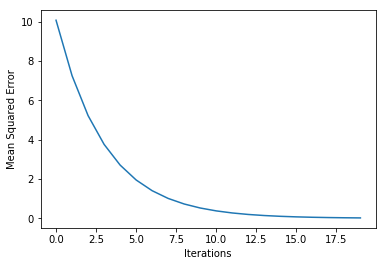

In [0]:
# Plot the mse history
plt.plot(mse_hist)
plt.xlabel('Iterations')
plt.ylabel('Mean Squared Error')
plt.show()

#### Backpropagation


Each time you generate predictions using forward propagation, you update the weights using backward propagation.


**Gradients for weight** is product of:


1.   Node value feeding into that weight
2.   Slope of activation function for the node being fed into
3.   Slope of loss function w.r.t output node



Summary of backpropagation:


*   Start at some random set of weights
*   Use forward propagation to make a prediction
*   Use backward propagation to calculate the slope of the loss function w.r.t each weight.
*   Multiply that slopes by the learning rate, and subtract from the current weights.
*   Keep going with that cycle until we get to a flat part.











## 3. Building deep learning models with keras

The data is pre-loaded into a pandas DataFrame called df. Use the .head() and .describe() methods in the IPython Shell for a quick overview of the DataFrame.

In [0]:
# import pandas as pd
df = pd.read_csv("/content/Deep Learning in Python - chp3.csv")
df.describe()

,wage_per_hour,union,education_yrs,experience_yrs,age,female,marr,south,manufacturing,construction
count,534.000000,534.000000,534.000000,534.000000,534.000000,534.000000,534.000000,534.000000,534.000000,534.000000
mean,9.024064,0.179775,13.018727,17.822097,36.833333,0.458801,0.655431,0.292135,0.185393,0.044944
std,5.139097,0.384360,2.615373,12.379710,11.726573,0.498767,0.475673,0.455170,0.388981,0.207375
min,1.000000,0.000000,2.000000,0.000000,18.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,5.250000,0.000000,12.000000,8.000000,28.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,7.780000,0.000000,12.000000,15.000000,35.000000,0.000000,1.000000,0.000000,0.000000,0.000000
75%,11.250000,0.000000,15.000000,26.000000,44.000000,1.000000,1.000000,1.000000,0.000000,0.000000
max,44.500000,1.000000,18.000000,55.000000,64.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [0]:
df.head()

,wage_per_hour,union,education_yrs,experience_yrs,age,female,marr,south,manufacturing,construction
0,5.10,0,8,21,35,1,1,0,1,0
1,4.95,0,9,42,57,1,1,0,1,0
2,6.67,0,12,1,19,0,0,0,1,0
3,4.00,0,12,4,22,0,0,0,0,0
4,7.50,0,12,17,35,0,1,0,0,0


#### Creating a keras model

To start, you'll take the skeleton of a neural network and add a hidden layer and an output layer. You'll then fit that model and see Keras do the optimization so your model continually gets better.




As a start, you'll predict workers wages based on characteristics like their industry, education and level of experience. You can find the dataset in a pandas dataframe called `df`. For convenience, everything in df except for the target has been converted to a NumPy matrix called `predictors`. The target, `wage_per_hour`, is available as a NumPy matrix called `target`.

In [0]:
#@title
predictors = np.array([[ 0,  8, 21, 35,  1,  1,  0,  1,  0],
       [ 0,  9, 42, 57,  1,  1,  0,  1,  0],
       [ 0, 12,  1, 19,  0,  0,  0,  1,  0],
       [ 0, 12,  4, 22,  0,  0,  0,  0,  0],
       [ 0, 12, 17, 35,  0,  1,  0,  0,  0],
       [ 1, 13,  9, 28,  0,  0,  0,  0,  0],
       [ 0, 10, 27, 43,  0,  0,  1,  0,  0],
       [ 0, 12,  9, 27,  0,  0,  0,  0,  0],
       [ 0, 16, 11, 33,  0,  1,  0,  1,  0],
       [ 0, 12,  9, 27,  0,  0,  0,  0,  0],
       [ 1, 12, 17, 35,  0,  1,  0,  0,  0],
       [ 1, 12, 19, 37,  0,  0,  0,  1,  0],
       [ 0,  8, 27, 41,  0,  1,  1,  0,  0],
       [ 1,  9, 30, 45,  0,  0,  1,  0,  0],
       [ 0,  9, 29, 44,  0,  1,  1,  0,  0],
       [ 0, 12, 37, 55,  0,  1,  0,  0,  1],
       [ 0,  7, 44, 57,  0,  1,  1,  0,  0],
       [ 1, 12, 26, 44,  0,  1,  0,  1,  0],
       [ 0, 11, 16, 33,  0,  0,  0,  0,  0],
       [ 0, 12, 33, 51,  0,  1,  0,  0,  0],
       [ 1, 12, 16, 34,  1,  1,  0,  1,  0],
       [ 1,  7, 42, 55,  0,  1,  0,  1,  0],
       [ 0, 12,  9, 27,  0,  0,  0,  0,  0],
       [ 0, 11, 14, 31,  0,  1,  1,  0,  0],
       [ 0, 12, 23, 41,  0,  1,  0,  0,  0],
       [ 0,  6, 45, 57,  0,  1,  1,  1,  0],
       [ 0, 12,  8, 26,  0,  1,  0,  1,  0],
       [ 0, 10, 30, 46,  0,  1,  0,  0,  0],
       [ 0, 12,  8, 26,  1,  1,  0,  1,  0],
       [ 0, 12,  8, 26,  0,  1,  0,  0,  0],
       [ 0, 14, 13, 33,  0,  0,  0,  0,  0],
       [ 0, 12, 46, 64,  1,  0,  1,  0,  0],
       [ 0,  8, 19, 33,  0,  1,  0,  0,  0],
       [ 0, 17,  1, 24,  1,  0,  1,  0,  0],
       [ 0, 12, 19, 37,  0,  0,  0,  1,  0],
       [ 0, 12, 36, 54,  0,  0,  0,  0,  0],
       [ 0, 12, 20, 38,  0,  1,  1,  0,  1],
       [ 1, 12, 35, 53,  0,  1,  0,  0,  1],
       [ 0, 12,  3, 21,  0,  0,  0,  0,  0],
       [ 0, 14, 10, 30,  0,  1,  1,  1,  0],
       [ 0, 12,  0, 18,  0,  0,  0,  0,  0],
       [ 1, 14, 14, 34,  0,  1,  1,  1,  0],
       [ 0, 12, 14, 32,  0,  1,  0,  1,  0],
       [ 0,  9, 16, 31,  1,  1,  0,  1,  0],
       [ 0, 13,  8, 27,  0,  0,  1,  0,  1],
       [ 0,  7, 15, 28,  1,  1,  1,  1,  0],
       [ 0, 16, 12, 34,  0,  1,  0,  1,  0],
       [ 0, 10, 13, 29,  0,  0,  1,  0,  0],
       [ 1,  8, 33, 47,  0,  1,  0,  0,  0],
       [ 0, 12,  9, 27,  0,  1,  0,  1,  0],
       [ 0, 12,  7, 25,  0,  1,  0,  0,  0],
       [ 1, 16, 13, 35,  0,  1,  0,  1,  0],
       [ 0, 12,  7, 25,  1,  1,  0,  1,  0],
       [ 0, 12, 16, 34,  1,  1,  0,  1,  0],
       [ 0, 13,  0, 19,  0,  0,  0,  0,  0],
       [ 0, 12, 11, 29,  1,  0,  0,  1,  0],
       [ 0, 13, 17, 36,  0,  0,  0,  1,  0],
       [ 0, 10, 13, 29,  0,  1,  0,  1,  0],
       [ 1, 12, 22, 40,  0,  0,  0,  1,  0],
       [ 0, 12, 28, 46,  1,  1,  0,  1,  0],
       [ 0, 11, 17, 34,  0,  0,  0,  0,  0],
       [ 1, 12, 24, 42,  0,  1,  0,  0,  1],
       [ 0,  3, 55, 64,  0,  1,  1,  1,  0],
       [ 0, 12,  3, 21,  0,  0,  1,  0,  1],
       [ 1, 12,  6, 24,  0,  0,  0,  1,  0],
       [ 0, 10, 27, 43,  0,  1,  0,  0,  1],
       [ 1, 12, 19, 37,  0,  1,  1,  1,  0],
       [ 1, 12, 19, 37,  0,  1,  0,  0,  1],
       [ 0, 12, 38, 56,  1,  1,  0,  1,  0],
       [ 1, 10, 41, 57,  0,  1,  1,  1,  0],
       [ 0, 11,  3, 20,  0,  0,  1,  1,  0],
       [ 1, 14, 20, 40,  0,  1,  0,  0,  0],
       [ 0, 10, 15, 31,  0,  1,  0,  0,  0],
       [ 0,  8,  8, 22,  0,  1,  1,  1,  0],
       [ 0,  8, 39, 53,  1,  1,  1,  1,  0],
       [ 1,  6, 43, 55,  1,  1,  0,  1,  0],
       [ 1, 11, 25, 42,  1,  1,  1,  1,  0],
       [ 1, 12, 11, 29,  0,  1,  0,  0,  0],
       [ 0, 12, 12, 30,  0,  1,  0,  0,  0],
       [ 1, 12, 35, 53,  0,  1,  1,  1,  0],
       [ 0, 14, 14, 34,  0,  0,  0,  0,  0],
       [ 1, 12, 16, 34,  0,  1,  0,  0,  0],
       [ 1, 10, 44, 60,  1,  0,  0,  1,  0],
       [ 0, 16, 13, 35,  1,  0,  1,  0,  0],
       [ 1, 13,  8, 27,  0,  0,  0,  1,  0],
       [ 0, 12, 13, 31,  0,  0,  0,  1,  0],
       [ 1, 11, 18, 35,  0,  1,  0,  0,  0],
       [ 0, 12, 18, 36,  1,  1,  0,  0,  0],
       [ 0, 12,  6, 24,  1,  0,  1,  0,  0],
       [ 1, 11, 37, 54,  0,  1,  1,  1,  0],
       [ 0, 12,  2, 20,  0,  1,  1,  1,  0],
       [ 0, 12, 23, 41,  0,  1,  0,  1,  0],
       [ 0, 12,  1, 19,  0,  0,  0,  0,  0],
       [ 0, 12, 10, 28,  1,  1,  1,  1,  0],
       [ 0, 12, 23, 41,  0,  1,  0,  1,  0],
       [ 1, 12,  8, 26,  0,  1,  0,  0,  0],
       [ 0, 15,  9, 30,  1,  1,  0,  1,  0],
       [ 1, 12, 33, 51,  0,  1,  0,  0,  1],
       [ 0, 12, 19, 37,  1,  1,  0,  1,  0],
       [ 0, 13, 14, 33,  0,  1,  0,  0,  0],
       [ 1, 11, 13, 30,  0,  1,  0,  0,  0],
       [ 0, 10, 12, 28,  0,  1,  0,  0,  1],
       [ 0, 12,  8, 26,  0,  0,  0,  0,  0],
       [ 0, 12, 23, 41,  0,  1,  0,  1,  0],
       [ 0, 14, 13, 33,  1,  0,  0,  1,  0],
       [ 0, 12,  9, 27,  0,  1,  1,  0,  0],
       [ 1, 14, 21, 41,  0,  1,  0,  0,  0],
       [ 0,  5, 44, 55,  0,  1,  1,  0,  1],
       [ 1, 12,  4, 22,  0,  1,  0,  0,  0],
       [ 0,  8, 42, 56,  0,  1,  0,  1,  0],
       [ 1, 13, 10, 29,  0,  1,  0,  0,  0],
       [ 0, 12, 11, 29,  0,  0,  0,  0,  1],
       [ 1, 12, 40, 58,  0,  1,  0,  0,  1],
       [ 0, 12,  8, 26,  0,  0,  0,  0,  1],
       [ 0, 11, 29, 46,  0,  1,  1,  0,  1],
       [ 1, 16,  3, 25,  0,  0,  0,  0,  0],
       [ 0, 11, 11, 28,  0,  0,  0,  0,  1],
       [ 1, 12, 12, 30,  0,  1,  0,  0,  0],
       [ 0,  8, 22, 36,  1,  1,  0,  0,  0],
       [ 0, 12, 12, 30,  0,  1,  0,  0,  0],
       [ 1, 12,  7, 25,  0,  1,  0,  0,  0],
       [ 0, 12, 15, 33,  1,  0,  0,  1,  0],
       [ 0, 12, 28, 46,  0,  1,  0,  0,  0],
       [ 1, 12, 20, 38,  0,  1,  1,  1,  0],
       [ 0, 12,  6, 24,  0,  0,  1,  0,  1],
       [ 0, 12,  5, 23,  0,  0,  1,  1,  0],
       [ 0,  9, 30, 45,  1,  1,  1,  1,  0],
       [ 0, 13, 18, 37,  0,  1,  0,  0,  0],
       [ 0, 12,  6, 24,  1,  1,  1,  1,  0],
       [ 0, 12, 16, 34,  0,  0,  1,  0,  0],
       [ 1, 12,  1, 19,  0,  0,  1,  0,  0],
       [ 0, 12,  3, 21,  0,  0,  0,  1,  0],
       [ 0, 12,  8, 26,  0,  1,  0,  0,  0],
       [ 0, 14,  2, 22,  0,  0,  0,  1,  0],
       [ 0,  9, 16, 31,  0,  0,  0,  1,  0],
       [ 0, 10,  9, 25,  0,  1,  1,  0,  1],
       [ 0, 12,  2, 20,  0,  0,  0,  0,  0],
       [ 0,  7, 43, 56,  0,  1,  1,  1,  0],
       [ 0,  9, 38, 53,  0,  1,  0,  1,  0],
       [ 0, 12,  9, 27,  0,  1,  0,  0,  0],
       [ 0, 12, 12, 30,  0,  1,  1,  0,  0],
       [ 0, 12, 18, 36,  0,  1,  0,  1,  0],
       [ 1, 11, 15, 32,  0,  0,  0,  1,  0],
       [ 1, 11, 28, 45,  0,  1,  1,  0,  1],
       [ 1, 10, 27, 43,  0,  1,  1,  0,  1],
       [ 0, 12, 38, 56,  0,  1,  1,  0,  0],
       [ 0, 12,  3, 21,  1,  0,  0,  1,  0],
       [ 1, 12, 41, 59,  0,  1,  0,  0,  0],
       [ 1, 12, 16, 34,  0,  1,  1,  0,  0],
       [ 0, 13,  7, 26,  0,  1,  1,  1,  0],
       [ 0,  6, 33, 45,  1,  0,  1,  1,  0],
       [ 0, 14, 25, 45,  0,  1,  0,  1,  0],
       [ 0, 12,  5, 23,  0,  1,  1,  0,  0],
       [ 0, 14, 17, 37,  0,  0,  1,  0,  0],
       [ 0, 12,  1, 19,  0,  0,  1,  0,  0],
       [ 0, 12, 13, 31,  0,  1,  0,  1,  0],
       [ 0, 16, 18, 40,  0,  1,  0,  0,  0],
       [ 0, 14, 21, 41,  0,  1,  1,  0,  0],
       [ 0, 14,  2, 22,  0,  0,  0,  0,  0],
       [ 0, 12,  4, 22,  1,  0,  1,  0,  0],
       [ 0, 12, 30, 48,  1,  1,  1,  0,  0],
       [ 0, 13, 32, 51,  0,  0,  0,  0,  0],
       [ 0, 17, 13, 36,  1,  1,  0,  0,  0],
       [ 0, 12, 17, 35,  0,  0,  0,  0,  0],
       [ 0, 14, 26, 46,  1,  1,  0,  0,  0],
       [ 0, 16,  9, 31,  0,  0,  0,  0,  0],
       [ 0, 16,  8, 30,  0,  0,  0,  0,  0],
       [ 1, 15,  1, 22,  0,  1,  0,  0,  0],
       [ 0, 17, 32, 55,  0,  1,  1,  0,  0],
       [ 0, 12, 24, 42,  1,  1,  0,  0,  0],
       [ 0, 14,  1, 21,  1,  0,  0,  0,  0],
       [ 0, 12, 42, 60,  0,  1,  0,  1,  0],
       [ 0, 16,  3, 25,  1,  0,  0,  1,  0],
       [ 0, 12, 32, 50,  1,  1,  0,  0,  0],
       [ 0, 14, 22, 42,  0,  0,  0,  0,  0],
       [ 0, 16, 18, 40,  0,  1,  0,  0,  0],
       [ 0, 18, 19, 43,  1,  1,  0,  0,  0],
       [ 0, 15, 12, 33,  0,  1,  0,  0,  0],
       [ 0, 12, 42, 60,  1,  1,  0,  0,  0],
       [ 0, 12, 34, 52,  0,  1,  1,  0,  0],
       [ 0, 18, 29, 53,  0,  1,  0,  0,  0],
       [ 0, 16,  8, 30,  0,  0,  1,  0,  0],
       [ 0, 18, 13, 37,  0,  0,  0,  1,  0],
       [ 0, 16, 10, 32,  0,  0,  0,  0,  0],
       [ 0, 16, 22, 44,  0,  1,  0,  0,  0],
       [ 0, 16, 10, 32,  0,  1,  1,  0,  0],
       [ 0, 17, 15, 38,  1,  1,  0,  0,  0],
       [ 0, 12, 26, 44,  0,  1,  0,  0,  0],
       [ 0, 14, 16, 36,  0,  0,  0,  0,  0],
       [ 0, 18, 14, 38,  1,  1,  0,  0,  0],
       [ 0, 12, 38, 56,  1,  1,  0,  0,  0],
       [ 0, 12, 14, 32,  0,  1,  1,  0,  0],
       [ 0, 12,  7, 25,  1,  1,  0,  0,  0],
       [ 0, 18, 13, 37,  1,  0,  1,  0,  0],
       [ 0, 10, 20, 36,  0,  1,  0,  0,  0],
       [ 1, 16,  7, 29,  0,  1,  0,  0,  0],
       [ 0, 16, 26, 48,  1,  1,  0,  0,  0],
       [ 0, 16, 14, 36,  0,  1,  0,  0,  0],
       [ 0, 13, 36, 55,  0,  0,  0,  0,  0],
       [ 0, 12, 24, 42,  0,  1,  0,  0,  0],
       [ 0, 14, 41, 61,  0,  1,  1,  0,  0],
       [ 0, 16,  7, 29,  0,  1,  0,  0,  0],
       [ 0, 17, 14, 37,  0,  0,  1,  0,  0],
       [ 0, 12,  1, 19,  1,  0,  1,  0,  0],
       [ 0, 16,  6, 28,  1,  1,  0,  1,  0],
       [ 0, 12,  3, 21,  1,  1,  0,  0,  0],
       [ 0, 15, 31, 52,  0,  1,  0,  0,  0],
       [ 0, 13, 14, 33,  1,  1,  0,  1,  0],
       [ 0, 14, 13, 33,  1,  1,  0,  0,  0],
       [ 1, 16, 26, 48,  0,  1,  0,  1,  0],
       [ 0, 18, 14, 38,  0,  1,  0,  0,  0],
       [ 0, 13, 33, 52,  1,  1,  0,  0,  0],
       [ 0, 12, 16, 34,  0,  1,  0,  0,  0],
       [ 0, 18, 10, 34,  0,  1,  0,  0,  0],
       [ 0, 14, 22, 42,  0,  0,  0,  0,  0],
       [ 0, 14,  2, 22,  0,  0,  0,  0,  0],
       [ 0, 12, 29, 47,  1,  1,  1,  0,  0],
       [ 0, 12, 43, 61,  0,  1,  0,  1,  0],
       [ 0, 12,  5, 23,  1,  1,  0,  0,  0],
       [ 0, 16, 14, 36,  1,  1,  1,  0,  0],
       [ 0, 12, 28, 46,  0,  1,  1,  0,  0],
       [ 0, 11, 25, 42,  1,  1,  1,  0,  0],
       [ 0, 12, 45, 63,  1,  1,  0,  0,  0],
       [ 0, 14,  5, 25,  0,  0,  1,  0,  0],
       [ 0, 12, 20, 38,  0,  1,  1,  1,  0],
       [ 0, 16,  6, 28,  1,  1,  0,  0,  0],
       [ 0, 16, 16, 38,  0,  1,  0,  0,  0],
       [ 0, 11, 33, 50,  1,  1,  0,  0,  0],
       [ 0, 13,  2, 21,  1,  1,  1,  0,  0],
       [ 0, 12, 10, 28,  1,  0,  1,  0,  0],
       [ 0, 14, 44, 64,  0,  1,  1,  0,  0],
       [ 0, 14,  6, 26,  1,  1,  1,  0,  0],
       [ 0, 12, 15, 33,  1,  0,  0,  0,  0],
       [ 0, 12,  5, 23,  0,  1,  0,  0,  0],
       [ 0, 13,  4, 23,  1,  1,  0,  1,  0],
       [ 0, 14, 14, 34,  0,  1,  0,  0,  0],
       [ 0, 14, 32, 52,  1,  1,  0,  0,  0],
       [ 0, 12, 14, 32,  1,  1,  0,  0,  0],
       [ 0, 14, 21, 41,  0,  1,  0,  0,  0],
       [ 1, 12, 43, 61,  0,  1,  0,  0,  0],
       [ 0, 12, 27, 45,  1,  1,  1,  0,  0],
       [ 0, 12,  4, 22,  1,  0,  0,  0,  0],
       [ 0, 14,  0, 20,  0,  0,  0,  0,  0],
       [ 0, 12, 32, 50,  0,  1,  1,  0,  0],
       [ 0, 12, 20, 38,  0,  1,  0,  0,  0],
       [ 0, 15,  4, 25,  0,  0,  1,  0,  0],
       [ 0, 12, 34, 52,  0,  1,  0,  0,  0],
       [ 0, 13,  5, 24,  0,  0,  0,  0,  0],
       [ 0, 17, 13, 36,  0,  1,  0,  1,  0],
       [ 0, 14, 17, 37,  1,  1,  0,  0,  0],
       [ 0, 13, 10, 29,  1,  1,  1,  0,  0],
       [ 0, 16,  7, 29,  1,  1,  0,  0,  0],
       [ 0, 12, 25, 43,  1,  0,  0,  0,  0],
       [ 0, 12, 18, 36,  1,  1,  0,  0,  0],
       [ 0, 16, 27, 49,  1,  1,  0,  1,  0],
       [ 0, 16,  2, 24,  1,  0,  0,  0,  0],
       [ 0, 13, 13, 32,  0,  1,  0,  0,  0],
       [ 0, 14, 24, 44,  1,  0,  0,  0,  0],
       [ 0, 18, 13, 37,  1,  1,  1,  0,  0],
       [ 1, 14, 15, 35,  1,  0,  0,  0,  0],
       [ 0, 12, 12, 30,  1,  0,  1,  0,  0],
       [ 0, 12, 24, 42,  1,  1,  0,  0,  0],
       [ 0, 12, 43, 61,  1,  1,  0,  0,  1],
       [ 0, 12, 13, 31,  1,  1,  0,  1,  0],
       [ 0, 12, 16, 34,  1,  1,  1,  0,  0],
       [ 0, 11, 24, 41,  1,  1,  0,  0,  0],
       [ 0, 16,  4, 26,  1,  1,  1,  0,  0],
       [ 0, 12, 24, 42,  1,  1,  0,  0,  0],
       [ 0, 12, 45, 63,  1,  1,  0,  0,  0],
       [ 1, 12, 20, 38,  0,  1,  0,  0,  0],
       [ 0, 12, 38, 56,  1,  1,  0,  0,  0],
       [ 0, 18, 10, 34,  0,  1,  1,  0,  0],
       [ 0, 11, 16, 33,  1,  1,  0,  0,  0],
       [ 0, 12, 32, 50,  1,  1,  1,  0,  0],
       [ 0, 16,  2, 24,  1,  0,  1,  0,  0],
       [ 0, 13, 28, 47,  1,  0,  1,  0,  0],
       [ 0, 16,  3, 25,  0,  0,  0,  0,  0],
       [ 1, 13,  8, 27,  1,  0,  0,  0,  0],
       [ 0, 12, 44, 62,  1,  1,  0,  1,  0],
       [ 0, 12, 12, 30,  0,  1,  1,  0,  0],
       [ 0, 12,  8, 26,  0,  1,  1,  0,  0],
       [ 0, 12,  4, 22,  1,  1,  0,  0,  0],
       [ 0, 12, 28, 46,  1,  1,  1,  0,  0],
       [ 0, 13,  0, 19,  1,  0,  1,  0,  0],
       [ 0, 14,  1, 21,  0,  0,  1,  0,  0],
       [ 0, 14, 12, 32,  1,  1,  0,  1,  0],
       [ 0, 12, 39, 57,  1,  1,  0,  0,  0],
       [ 0, 12, 24, 42,  1,  1,  0,  0,  0],
       [ 0, 17, 32, 55,  1,  1,  0,  0,  0],
       [ 0, 16,  4, 26,  0,  0,  0,  0,  0],
       [ 0, 12, 25, 43,  1,  0,  0,  0,  0],
       [ 0, 12,  8, 26,  0,  0,  0,  0,  0],
       [ 0, 13, 16, 35,  1,  1,  0,  0,  0],
       [ 0, 12,  5, 23,  0,  0,  1,  0,  0],
       [ 0, 13, 31, 50,  0,  0,  0,  0,  0],
       [ 0, 12, 25, 43,  1,  0,  0,  0,  0],
       [ 0, 12, 15, 33,  1,  1,  0,  0,  0],
       [ 0, 14, 15, 35,  1,  1,  1,  0,  0],
       [ 0, 12,  0, 18,  1,  0,  0,  0,  0],
       [ 0, 12, 19, 37,  0,  1,  0,  0,  0],
       [ 0, 12, 21, 39,  1,  0,  0,  0,  0],
       [ 0, 12,  6, 24,  1,  0,  0,  0,  0],
       [ 1, 12, 14, 32,  1,  1,  0,  0,  0],
       [ 0, 13, 30, 49,  1,  1,  0,  0,  0],
       [ 0, 12,  8, 26,  1,  0,  0,  0,  0],
       [ 1,  9, 33, 48,  0,  0,  0,  0,  0],
       [ 0, 13, 16, 35,  0,  0,  0,  0,  0],
       [ 0, 12, 20, 38,  1,  0,  1,  0,  0],
       [ 0, 13,  6, 25,  1,  1,  1,  0,  0],
       [ 1, 12, 10, 28,  1,  1,  0,  0,  0],
       [ 0, 13,  1, 20,  1,  0,  1,  0,  0],
       [ 0, 12,  2, 20,  0,  0,  1,  0,  0],
       [ 0, 13,  0, 19,  1,  0,  1,  0,  0],
       [ 0, 16, 17, 39,  0,  1,  0,  0,  0],
       [ 0, 12,  8, 26,  1,  0,  0,  0,  0],
       [ 0, 12,  4, 22,  0,  0,  1,  0,  0],
       [ 0, 12, 15, 33,  1,  0,  0,  0,  0],
       [ 0, 12, 29, 47,  1,  1,  0,  0,  0],
       [ 0, 12, 23, 41,  1,  1,  1,  0,  0],
       [ 0, 12, 39, 57,  1,  1,  1,  0,  0],
       [ 0, 12, 14, 32,  1,  1,  1,  0,  0],
       [ 0, 17,  6, 29,  1,  0,  1,  0,  0],
       [ 1, 14, 12, 32,  0,  1,  1,  0,  0],
       [ 0, 12, 26, 44,  1,  0,  1,  0,  0],
       [ 0, 14, 32, 52,  1,  1,  0,  0,  0],
       [ 0, 15,  6, 27,  1,  1,  0,  0,  0],
       [ 0, 12, 40, 58,  1,  1,  0,  0,  0],
       [ 0, 12, 18, 36,  1,  1,  0,  1,  0],
       [ 0, 11, 12, 29,  1,  0,  0,  0,  0],
       [ 0, 12, 36, 54,  1,  1,  1,  0,  1],
       [ 0, 12, 19, 37,  1,  1,  0,  0,  0],
       [ 0, 16, 42, 64,  1,  0,  0,  1,  0],
       [ 0, 13,  2, 21,  1,  1,  0,  0,  0],
       [ 0, 12, 33, 51,  1,  1,  0,  0,  0],
       [ 0, 12, 14, 32,  1,  1,  1,  0,  0],
       [ 0, 12, 22, 40,  0,  0,  0,  0,  0],
       [ 0, 12, 20, 38,  1,  1,  0,  0,  0],
       [ 0, 12, 15, 33,  1,  1,  0,  0,  0],
       [ 0, 12, 35, 53,  0,  1,  0,  0,  0],
       [ 0, 12,  7, 25,  1,  1,  0,  0,  0],
       [ 0, 12, 45, 63,  1,  0,  0,  1,  0],
       [ 0, 12,  9, 27,  1,  0,  0,  0,  0],
       [ 0, 12,  2, 20,  1,  1,  1,  0,  0],
       [ 0, 17,  3, 26,  0,  0,  1,  0,  0],
       [ 1, 14, 19, 39,  1,  1,  0,  0,  0],
       [ 0, 12, 14, 32,  1,  1,  1,  0,  0],
       [ 0,  4, 54, 64,  0,  1,  0,  0,  0],
       [ 0, 14, 17, 37,  0,  1,  0,  0,  0],
       [ 0,  8, 29, 43,  1,  1,  0,  0,  0],
       [ 0, 15, 26, 47,  1,  0,  1,  0,  0],
       [ 0,  2, 16, 24,  0,  0,  0,  0,  0],
       [ 0,  8, 29, 43,  1,  0,  0,  0,  0],
       [ 0, 11, 20, 37,  1,  1,  0,  0,  0],
       [ 0, 10, 38, 54,  1,  1,  1,  0,  0],
       [ 0,  8, 37, 51,  1,  1,  1,  0,  0],
       [ 0,  9, 48, 63,  0,  0,  0,  0,  0],
       [ 0, 12, 16, 34,  1,  0,  0,  0,  0],
       [ 0,  8, 38, 52,  1,  1,  0,  0,  0],
       [ 0, 14,  0, 20,  0,  0,  0,  0,  0],
       [ 1, 12, 14, 32,  0,  0,  0,  0,  0],
       [ 0, 12,  2, 20,  1,  1,  0,  0,  0],
       [ 0, 16, 21, 43,  0,  1,  0,  0,  0],
       [ 0, 13, 15, 34,  1,  1,  0,  0,  0],
       [ 0, 16, 20, 42,  1,  0,  0,  0,  0],
       [ 0, 14, 12, 32,  1,  1,  0,  0,  0],
       [ 0, 12,  7, 25,  0,  0,  1,  0,  0],
       [ 0, 11,  4, 21,  0,  1,  0,  0,  0],
       [ 0, 13,  9, 28,  0,  1,  1,  0,  0],
       [ 0, 12, 43, 61,  1,  1,  1,  0,  0],
       [ 0, 10, 19, 35,  0,  0,  1,  0,  0],
       [ 0,  8, 49, 63,  1,  0,  0,  0,  0],
       [ 0, 12, 38, 56,  1,  1,  0,  0,  0],
       [ 0, 12, 13, 31,  1,  1,  0,  0,  0],
       [ 0, 12, 14, 32,  1,  1,  0,  0,  0],
       [ 0, 12, 20, 38,  0,  0,  0,  0,  0],
       [ 0, 12,  7, 25,  1,  0,  0,  0,  0],
       [ 1, 12,  9, 27,  1,  1,  0,  1,  0],
       [ 0, 12,  6, 24,  1,  0,  0,  0,  0],
       [ 0, 12,  5, 23,  1,  1,  1,  0,  0],
       [ 0, 13,  1, 20,  1,  0,  1,  0,  0],
       [ 1, 14, 22, 42,  0,  1,  0,  0,  0],
       [ 0, 12, 24, 42,  1,  1,  0,  0,  0],
       [ 1, 12, 15, 33,  1,  0,  0,  0,  0],
       [ 0, 11,  8, 25,  1,  1,  1,  0,  0],
       [ 0, 11, 17, 34,  1,  1,  1,  0,  0],
       [ 0, 12,  2, 20,  0,  0,  1,  0,  0],
       [ 0, 12, 20, 38,  0,  1,  1,  0,  0],
       [ 1, 12, 26, 44,  0,  1,  0,  0,  0],
       [ 0, 10, 37, 53,  1,  1,  1,  0,  0],
       [ 0, 12, 41, 59,  1,  0,  0,  0,  0],
       [ 0, 12, 27, 45,  1,  1,  0,  0,  0],
       [ 1, 12,  5, 23,  1,  1,  0,  0,  0],
       [ 0, 14, 16, 36,  0,  1,  0,  0,  0],
       [ 0, 14, 19, 39,  1,  1,  0,  0,  0],
       [ 0, 12, 10, 28,  0,  1,  0,  0,  0],
       [ 1, 13,  1, 20,  0,  0,  1,  0,  0],
       [ 1, 12, 43, 61,  1,  1,  0,  0,  0],
       [ 0, 13,  3, 22,  0,  0,  0,  0,  0],
       [ 0, 12,  0, 18,  1,  0,  0,  0,  0],
       [ 0, 12, 26, 44,  1,  1,  1,  0,  0],
       [ 1, 10, 25, 41,  1,  1,  0,  0,  0],
       [ 0, 12, 15, 33,  1,  1,  0,  0,  0],
       [ 0, 14, 10, 30,  1,  0,  1,  0,  0],
       [ 1, 11, 45, 62,  1,  0,  0,  0,  0],
       [ 0, 11,  3, 20,  0,  0,  0,  0,  0],
       [ 1,  8, 47, 61,  0,  1,  0,  0,  0],
       [ 0, 16,  6, 28,  1,  1,  0,  0,  0],
       [ 0, 10, 33, 49,  1,  0,  1,  0,  0],
       [ 0, 16,  3, 25,  0,  0,  0,  1,  0],
       [ 1, 14,  4, 24,  0,  0,  0,  0,  0],
       [ 1, 14, 34, 54,  0,  1,  0,  0,  0],
       [ 0, 11, 39, 56,  0,  1,  1,  0,  0],
       [ 0, 12, 17, 35,  1,  1,  1,  0,  0],
       [ 1,  9, 47, 62,  0,  1,  0,  0,  0],
       [ 0, 11,  2, 19,  0,  0,  0,  0,  0],
       [ 0, 13,  0, 19,  0,  0,  1,  0,  0],
       [ 0, 14, 24, 44,  1,  0,  0,  0,  0],
       [ 1, 12, 25, 43,  0,  1,  0,  0,  0],
       [ 0, 14,  6, 26,  1,  0,  0,  0,  0],
       [ 0, 12, 10, 28,  1,  0,  0,  0,  0],
       [ 0, 12, 33, 51,  1,  1,  0,  0,  0],
       [ 0, 12, 12, 30,  0,  0,  0,  0,  0],
       [ 0, 12,  9, 27,  1,  1,  1,  0,  0],
       [ 1, 11, 18, 35,  0,  1,  1,  0,  0],
       [ 0, 12, 10, 28,  0,  1,  0,  0,  0],
       [ 0,  8, 45, 59,  1,  0,  1,  0,  0],
       [ 1,  9, 46, 61,  1,  1,  0,  0,  0],
       [ 0,  7, 14, 27,  0,  1,  1,  0,  0],
       [ 0, 11, 36, 53,  1,  0,  0,  0,  0],
       [ 1, 13, 34, 53,  0,  1,  0,  0,  1],
       [ 0, 18, 15, 39,  0,  1,  0,  0,  0],
       [ 0, 17, 31, 54,  0,  1,  0,  1,  0],
       [ 0, 16,  6, 28,  1,  0,  0,  1,  0],
       [ 0, 14, 15, 35,  0,  1,  1,  0,  0],
       [ 0, 12, 30, 48,  0,  1,  0,  0,  0],
       [ 0, 18,  8, 32,  0,  1,  0,  0,  0],
       [ 0, 18,  5, 29,  0,  1,  0,  1,  0],
       [ 1, 17,  3, 26,  1,  0,  0,  0,  0],
       [ 0, 13, 17, 36,  0,  1,  1,  0,  0],
       [ 1, 16,  5, 27,  0,  1,  0,  1,  0],
       [ 0, 14, 10, 30,  1,  1,  0,  0,  0],
       [ 0, 15, 33, 54,  1,  0,  0,  0,  0],
       [ 0, 18,  3, 27,  0,  1,  0,  0,  0],
       [ 0, 16,  0, 18,  1,  0,  0,  0,  0],
       [ 0, 16, 13, 35,  0,  1,  1,  0,  0],
       [ 0, 18, 12, 36,  0,  1,  0,  0,  0],
       [ 0, 16,  6, 28,  1,  1,  0,  0,  0],
       [ 0, 17,  7, 30,  0,  1,  0,  0,  0],
       [ 1, 16, 14, 36,  0,  1,  1,  0,  0],
       [ 0, 17,  5, 28,  1,  0,  0,  0,  0],
       [ 0, 15, 10, 31,  1,  1,  1,  0,  0],
       [ 0, 18, 11, 35,  1,  1,  0,  0,  0],
       [ 0, 17, 24, 47,  1,  1,  0,  0,  0],
       [ 0, 16,  9, 31,  0,  0,  0,  1,  0],
       [ 0, 18, 12, 36,  0,  1,  1,  0,  0],
       [ 0, 18, 19, 43,  0,  1,  0,  0,  0],
       [ 0, 14, 14, 34,  1,  1,  0,  0,  0],
       [ 0, 16, 17, 39,  1,  0,  0,  1,  0],
       [ 0, 18,  7, 31,  0,  0,  1,  0,  0],
       [ 0, 18,  7, 31,  0,  1,  0,  0,  0],
       [ 0, 16, 22, 44,  1,  1,  0,  0,  0],
       [ 0, 12, 28, 46,  1,  1,  0,  0,  0],
       [ 0, 16, 16, 38,  1,  0,  0,  0,  0],
       [ 0, 16, 16, 38,  0,  0,  1,  0,  0],
       [ 0, 16,  7, 29,  1,  1,  0,  0,  0],
       [ 0, 12, 11, 29,  1,  0,  0,  0,  0],
       [ 0, 12, 11, 29,  1,  1,  0,  0,  0],
       [ 0, 12, 16, 34,  1,  0,  0,  0,  0],
       [ 1, 18, 33, 57,  0,  0,  0,  0,  0],
       [ 0, 12, 21, 39,  1,  1,  1,  0,  0],
       [ 0, 16,  4, 26,  0,  1,  0,  1,  0],
       [ 0, 15, 13, 34,  0,  1,  0,  0,  0],
       [ 1, 18, 14, 38,  0,  1,  0,  0,  0],
       [ 0, 16, 10, 32,  1,  1,  0,  0,  0],
       [ 0, 18, 14, 38,  0,  1,  1,  0,  0],
       [ 0, 16, 29, 51,  0,  1,  1,  0,  0],
       [ 0, 12,  4, 22,  0,  0,  0,  0,  0],
       [ 0, 18, 27, 51,  0,  1,  0,  0,  0],
       [ 0, 12,  3, 21,  0,  1,  0,  0,  0],
       [ 1, 16, 14, 36,  0,  1,  1,  0,  0],
       [ 0, 14,  0, 20,  0,  1,  0,  0,  1],
       [ 0, 18, 33, 57,  0,  1,  0,  0,  0],
       [ 0, 16, 38, 60,  0,  1,  1,  0,  0],
       [ 1, 18, 18, 42,  1,  1,  0,  0,  0],
       [ 0, 17,  3, 26,  0,  0,  0,  1,  0],
       [ 0, 18, 40, 64,  1,  0,  0,  0,  0],
       [ 0, 14, 19, 39,  0,  0,  0,  1,  0],
       [ 0, 14,  4, 24,  1,  0,  0,  0,  0],
       [ 0, 16, 11, 33,  1,  1,  0,  0,  0],
       [ 0, 16, 16, 38,  1,  1,  0,  0,  0],
       [ 0, 14, 22, 42,  0,  1,  0,  0,  0],
       [ 1, 17, 13, 36,  1,  0,  0,  0,  0],
       [ 1, 16, 28, 50,  1,  1,  1,  0,  0],
       [ 0, 16, 10, 32,  1,  1,  0,  0,  0],
       [ 0, 16,  5, 27,  1,  0,  1,  0,  0],
       [ 0, 15,  5, 26,  0,  0,  0,  0,  0],
       [ 0, 18, 37, 61,  1,  0,  0,  1,  0],
       [ 1, 17, 26, 49,  1,  1,  0,  0,  0],
       [ 0, 16,  4, 26,  1,  1,  1,  0,  0],
       [ 1, 18, 31, 55,  1,  0,  0,  0,  0],
       [ 1, 17, 13, 36,  1,  1,  0,  0,  0],
       [ 0, 12, 42, 60,  1,  1,  0,  0,  0],
       [ 0, 17, 18, 41,  0,  1,  0,  0,  0],
       [ 0, 12,  3, 21,  1,  1,  0,  0,  0],
       [ 0, 17, 10, 33,  1,  0,  0,  0,  0],
       [ 1, 16, 10, 32,  1,  0,  0,  0,  0],
       [ 0, 16, 17, 39,  1,  1,  0,  0,  0],
       [ 0, 18,  7, 31,  0,  1,  0,  0,  0],
       [ 0, 16, 14, 36,  1,  1,  0,  0,  0],
       [ 1, 16, 22, 44,  1,  1,  0,  0,  0],
       [ 0, 17, 14, 37,  1,  1,  0,  0,  0],
       [ 0, 16, 11, 33,  0,  1,  0,  0,  0],
       [ 1, 18, 23, 47,  0,  1,  0,  0,  0],
       [ 1, 12, 39, 57,  0,  1,  0,  0,  0],
       [ 0, 16, 15, 37,  0,  1,  0,  0,  0],
       [ 0, 14, 15, 35,  1,  0,  0,  0,  0],
       [ 0, 16, 10, 32,  0,  0,  0,  0,  0],
       [ 0, 12, 25, 43,  1,  0,  1,  0,  0],
       [ 0, 14, 12, 32,  1,  1,  0,  0,  0],
       [ 0, 16,  7, 29,  1,  1,  1,  0,  0],
       [ 1, 17,  7, 30,  0,  1,  0,  0,  0],
       [ 0, 16, 17, 39,  0,  1,  0,  1,  0],
       [ 1, 16, 10, 32,  0,  1,  0,  0,  0],
       [ 0, 17,  2, 25,  0,  1,  1,  0,  0],
       [ 1,  9, 34, 49,  1,  1,  1,  0,  0],
       [ 0, 15, 11, 32,  1,  1,  0,  0,  0],
       [ 0, 15, 10, 31,  0,  0,  0,  0,  0],
       [ 0, 12, 12, 30,  0,  1,  1,  0,  0],
       [ 1, 16,  6, 28,  1,  0,  0,  0,  0],
       [ 0, 18,  5, 29,  0,  0,  0,  0,  0],
       [ 0, 12, 33, 51,  1,  1,  0,  0,  0],
       [ 1, 17, 25, 48,  1,  1,  0,  0,  0],
       [ 1, 12, 13, 31,  0,  1,  1,  0,  0],
       [ 0, 16, 33, 55,  0,  1,  0,  1,  0]])


In [0]:
row = predictors.shape[0] # 534
col = predictors.shape[1] # 9

In [0]:
#@title
target = np.array([ 5.1 ,  4.95,  6.67,  4.  ,  7.5 , 13.07,  4.45, 19.47, 13.28,
        8.75, 11.35, 11.5 ,  6.5 ,  6.25, 19.98,  7.3 ,  8.  , 22.2 ,
        3.65, 20.55,  5.71,  7.  ,  3.75,  4.5 ,  9.56,  5.75,  9.36,
        6.5 ,  3.35,  4.75,  8.9 ,  4.  ,  4.7 ,  5.  ,  9.25, 10.67,
        7.61, 10.  ,  7.5 , 12.2 ,  3.35, 11.  , 12.  ,  4.85,  4.3 ,
        6.  , 15.  ,  4.85,  9.  ,  6.36,  9.15, 11.  ,  4.5 ,  4.8 ,
        4.  ,  5.5 ,  8.4 ,  6.75, 10.  ,  5.  ,  6.5 , 10.75,  7.  ,
       11.43,  4.  ,  9.  , 13.  , 12.22,  6.28,  6.75,  3.35, 16.  ,
        5.25,  3.5 ,  4.22,  3.  ,  4.  , 10.  ,  5.  , 16.  , 13.98,
       13.26,  6.1 ,  3.75,  9.  ,  9.45,  5.5 ,  8.93,  6.25,  9.75,
        6.73,  7.78,  2.85,  3.35, 19.98,  8.5 ,  9.75, 15.  ,  8.  ,
       11.25, 14.  , 10.  ,  6.5 ,  9.83, 18.5 , 12.5 , 26.  , 14.  ,
       10.5 , 11.  , 12.47, 12.5 , 15.  ,  6.  ,  9.5 ,  5.  ,  3.75,
       12.57,  6.88,  5.5 ,  7.  ,  4.5 ,  6.5 , 12.  ,  5.  ,  6.5 ,
        6.8 ,  8.75,  3.75,  4.5 ,  6.  ,  5.5 , 13.  ,  5.65,  4.8 ,
        7.  ,  5.25,  3.35,  8.5 ,  6.  ,  6.75,  8.89, 14.21, 10.78,
        8.9 ,  7.5 ,  4.5 , 11.25, 13.45,  6.  ,  4.62, 10.58,  5.  ,
        8.2 ,  6.25,  8.5 , 24.98, 16.65,  6.25,  4.55, 11.25, 21.25,
       12.65,  7.5 , 10.25,  3.35, 13.45,  4.84, 26.29,  6.58, 44.5 ,
       15.  , 11.25,  7.  , 10.  , 14.53, 20.  , 22.5 ,  3.64, 10.62,
       24.98,  6.  , 19.  , 13.2 , 22.5 , 15.  ,  6.88, 11.84, 16.14,
       13.95, 13.16,  5.3 ,  4.5 , 10.  , 10.  , 10.  ,  9.37,  5.8 ,
       17.86,  1.  ,  8.8 ,  9.  , 18.16,  7.81, 10.62,  4.5 , 17.25,
       10.5 ,  9.22, 15.  , 22.5 ,  4.55,  9.  , 13.33, 15.  ,  7.5 ,
        4.25, 12.5 ,  5.13,  3.35, 11.11,  3.84,  6.4 ,  5.56, 10.  ,
        5.65, 11.5 ,  3.5 ,  3.35,  4.75, 19.98,  3.5 ,  4.  ,  7.  ,
        6.25,  4.5 , 14.29,  5.  , 13.75, 13.71,  7.5 ,  3.8 ,  5.  ,
        9.42,  5.5 ,  3.75,  3.5 ,  5.8 , 12.  ,  5.  ,  8.75, 10.  ,
        8.5 ,  8.63,  9.  ,  5.5 , 11.11, 10.  ,  5.2 ,  8.  ,  3.56,
        5.2 , 11.67, 11.32,  7.5 ,  5.5 ,  5.  ,  7.75,  5.25,  9.  ,
        9.65,  5.21,  7.  , 12.16,  5.25, 10.32,  3.35,  7.7 ,  9.17,
        8.43,  4.  ,  4.13,  3.  ,  4.25,  7.53, 10.53,  5.  , 15.03,
       11.25,  6.25,  3.5 ,  6.85, 12.5 , 12.  ,  6.  ,  9.5 ,  4.1 ,
       10.43,  5.  ,  7.69,  5.5 ,  6.4 , 12.5 ,  6.25,  8.  ,  9.6 ,
        9.1 ,  7.5 ,  5.  ,  7.  ,  3.55,  8.5 ,  4.5 ,  7.88,  5.25,
        5.  ,  9.33, 10.5 ,  7.5 ,  9.5 ,  9.6 ,  5.87, 11.02,  5.  ,
        5.62, 12.5 , 10.81,  5.4 ,  7.  ,  4.59,  6.  , 11.71,  5.62,
        5.5 ,  4.85,  6.75,  4.25,  5.75,  3.5 ,  3.35, 10.62,  8.  ,
        4.75,  8.5 ,  8.85,  8.  ,  6.  ,  7.14,  3.4 ,  6.  ,  3.75,
        8.89,  4.35, 13.1 ,  4.35,  3.5 ,  3.8 ,  5.26,  3.35, 16.26,
        4.25,  4.5 ,  8.  ,  4.  ,  7.96,  4.  ,  4.15,  5.95,  3.6 ,
        8.75,  3.4 ,  4.28,  5.35,  5.  ,  7.65,  6.94,  7.5 ,  3.6 ,
        1.75,  3.45,  9.63,  8.49,  8.99,  3.65,  3.5 ,  3.43,  5.5 ,
        6.93,  3.51,  3.75,  4.17,  9.57, 14.67, 12.5 ,  5.5 ,  5.15,
        8.  ,  5.83,  3.35,  7.  , 10.  ,  8.  ,  6.88,  5.55,  7.5 ,
        8.93,  9.  ,  3.5 ,  5.77, 25.  ,  6.85,  6.5 ,  3.75,  3.5 ,
        4.5 ,  2.01,  4.17, 13.  ,  3.98,  7.5 , 13.12,  4.  ,  3.95,
       13.  ,  9.  ,  4.55,  9.5 ,  4.5 ,  8.75, 10.  , 18.  , 24.98,
       12.05, 22.  ,  8.75, 22.2 , 17.25,  6.  ,  8.06,  9.24, 12.  ,
       10.61,  5.71, 10.  , 17.5 , 15.  ,  7.78,  7.8 , 10.  , 24.98,
       10.28, 15.  , 12.  , 10.58,  5.85, 11.22,  8.56, 13.89,  5.71,
       15.79,  7.5 , 11.25,  6.15, 13.45,  6.25,  6.5 , 12.  ,  8.5 ,
        8.  ,  5.75, 15.73,  9.86, 13.51,  5.4 ,  6.25,  5.5 ,  5.  ,
        6.25,  5.75, 20.5 ,  5.  ,  7.  , 18.  , 12.  , 20.4 , 22.2 ,
       16.42,  8.63, 19.38, 14.  , 10.  , 15.95, 20.  , 10.  , 24.98,
       11.25, 22.83, 10.2 , 10.  , 14.  , 12.5 ,  5.79, 24.98,  4.35,
       11.25,  6.67,  8.  , 18.16, 12.  ,  8.89,  9.5 , 13.65, 12.  ,
       15.  , 12.67,  7.38, 15.56,  7.45,  6.25,  6.25,  9.37, 22.5 ,
        7.5 ,  7.  ,  5.75,  7.67, 12.5 , 16.  , 11.79, 11.36,  6.1 ,
       23.25, 19.88, 15.38])

In [0]:
n_row = target.shape[0] # 534

534



*   Start by creating a Sequential model called model.
*   Use the .add() method on model to add a Dense layer.
> *   Add 50 units, specify activation='relu', and the input_shape parameter to be the tuple (n_cols,) which means it has n_cols items in each row of data, and any number of rows of data are acceptable as inputs.
*   Add another Dense layer. This should have 32 units and a 'relu' activation.
*   Finally, add an output layer, which is a Dense layer with a single node. Don't use any activation function here.






In [0]:
# Import necessary modules
import keras
from keras.layers import Dense
from keras.models import Sequential

Using TensorFlow backend.


In [0]:
# Save the number of columns in predictors: n_cols
n_cols = predictors.shape[1]

# Set up the model: model
model = Sequential()

# Add the first layer
model.add(Dense(50, activation='relu', input_shape=(n_cols,)))

# Add the second layer
model.add(Dense(32, activation='relu'))

# Add the output layer
model.add(Dense(1))

Instructions for updating:
Colocations handled automatically by placer.


#### Compiling and fitting a model

In [0]:
# Compile the model
model.compile(optimizer='adam', loss='mean_squared_error')

# Verify that model contains information from compiling
print("Loss function: " + model.loss)

Loss function: mean_squared_error


You're at the most fun part. You'll now fit the model. Recall that the data to be used as predictive features is loaded in a NumPy matrix called predictors and the data to be predicted is stored in a NumPy matrix called target. 

In [0]:
# Fit the model
model.fit(predictors, target)

Instructions for updating:
Use tf.cast instead.
Epoch 1/1
534/534 [==============================] - 1s 1ms/step - loss: 36.4225


#### Classification models

Now you will start modeling with a new dataset for a classification problem. This data includes information about passengers on the Titanic. You will use predictors such as age, fare and where each passenger embarked from to predict who will survive. 

The data is pre-loaded in a pandas DataFrame called df.

In [0]:
df = pd.read_csv("/content/titanic.csv")
df.describe()

,survived,pclass,age,sibsp,parch,fare,male,embarked_from_cherbourg,embarked_from_queenstown,embarked_from_southampton
count,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000
mean,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208,0.647587,0.188552,0.086420,0.722783
std,0.486592,0.836071,13.002015,1.102743,0.806057,49.693429,0.477990,0.391372,0.281141,0.447876
min,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,2.000000,22.000000,0.000000,0.000000,7.910400,0.000000,0.000000,0.000000,0.000000
50%,0.000000,3.000000,29.699118,0.000000,0.000000,14.454200,1.000000,0.000000,0.000000,1.000000
75%,1.000000,3.000000,35.000000,1.000000,0.000000,31.000000,1.000000,0.000000,0.000000,1.000000
max,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200,1.000000,1.000000,1.000000,1.000000


In [0]:
# Import necessary modules
import keras
from keras.layers import Dense
from keras.models import Sequential
from keras.utils import to_categorical

In [0]:
#@title
predictors = np.array([[3.00000000e+00, 2.20000000e+01, 1.00000000e+00, 0.00000000e+00,
        7.25000000e+00, 1.00000000e+00, 0.00000000e+00, 0.00000000e+00,
        0.00000000e+00, 1.00000000e+00],
       [1.00000000e+00, 3.80000000e+01, 1.00000000e+00, 0.00000000e+00,
        7.12833000e+01, 0.00000000e+00, 0.00000000e+00, 1.00000000e+00,
        0.00000000e+00, 0.00000000e+00],
       [3.00000000e+00, 2.60000000e+01, 0.00000000e+00, 0.00000000e+00,
        7.92500000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
        0.00000000e+00, 1.00000000e+00],
       [1.00000000e+00, 3.50000000e+01, 1.00000000e+00, 0.00000000e+00,
        5.31000000e+01, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
        0.00000000e+00, 1.00000000e+00],
       [3.00000000e+00, 3.50000000e+01, 0.00000000e+00, 0.00000000e+00,
        8.05000000e+00, 1.00000000e+00, 0.00000000e+00, 0.00000000e+00,
        0.00000000e+00, 1.00000000e+00],
       [3.00000000e+00, 2.96991176e+01, 0.00000000e+00, 0.00000000e+00,
        8.45830000e+00, 1.00000000e+00, 1.00000000e+00, 0.00000000e+00,
        1.00000000e+00, 0.00000000e+00],
       [1.00000000e+00, 5.40000000e+01, 0.00000000e+00, 0.00000000e+00,
        5.18625000e+01, 1.00000000e+00, 0.00000000e+00, 0.00000000e+00,
        0.00000000e+00, 1.00000000e+00],
       [3.00000000e+00, 2.00000000e+00, 3.00000000e+00, 1.00000000e+00,
        2.10750000e+01, 1.00000000e+00, 0.00000000e+00, 0.00000000e+00,
        0.00000000e+00, 1.00000000e+00],
       [3.00000000e+00, 2.70000000e+01, 0.00000000e+00, 2.00000000e+00,
        1.11333000e+01, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
        0.00000000e+00, 1.00000000e+00],
       [2.00000000e+00, 1.40000000e+01, 1.00000000e+00, 0.00000000e+00,
        3.00708000e+01, 0.00000000e+00, 0.00000000e+00, 1.00000000e+00,
        0.00000000e+00, 0.00000000e+00],
       [3.00000000e+00, 4.00000000e+00, 1.00000000e+00, 1.00000000e+00,
        1.67000000e+01, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
        0.00000000e+00, 1.00000000e+00],
       [1.00000000e+00, 5.80000000e+01, 0.00000000e+00, 0.00000000e+00,
        2.65500000e+01, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
        0.00000000e+00, 1.00000000e+00],
       [3.00000000e+00, 2.00000000e+01, 0.00000000e+00, 0.00000000e+00,
        8.05000000e+00, 1.00000000e+00, 0.00000000e+00, 0.00000000e+00,
        0.00000000e+00, 1.00000000e+00],
       [3.00000000e+00, 3.90000000e+01, 1.00000000e+00, 5.00000000e+00,
        3.12750000e+01, 1.00000000e+00, 0.00000000e+00, 0.00000000e+00,
        0.00000000e+00, 1.00000000e+00],
       [3.00000000e+00, 1.40000000e+01, 0.00000000e+00, 0.00000000e+00,
        7.85420000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
        0.00000000e+00, 1.00000000e+00],
       [2.00000000e+00, 5.50000000e+01, 0.00000000e+00, 0.00000000e+00,
        1.60000000e+01, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
        0.00000000e+00, 1.00000000e+00],
       [3.00000000e+00, 2.00000000e+00, 4.00000000e+00, 1.00000000e+00,
        2.91250000e+01, 1.00000000e+00, 0.00000000e+00, 0.00000000e+00,
        1.00000000e+00, 0.00000000e+00],
       [2.00000000e+00, 2.96991176e+01, 0.00000000e+00, 0.00000000e+00,
        1.30000000e+01, 1.00000000e+00, 1.00000000e+00, 0.00000000e+00,
        0.00000000e+00, 1.00000000e+00],
       [3.00000000e+00, 3.10000000e+01, 1.00000000e+00, 0.00000000e+00,
        1.80000000e+01, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
        0.00000000e+00, 1.00000000e+00],
       [3.00000000e+00, 2.96991176e+01, 0.00000000e+00, 0.00000000e+00,
        7.22500000e+00, 0.00000000e+00, 1.00000000e+00, 1.00000000e+00,
        0.00000000e+00, 0.00000000e+00],
       [2.00000000e+00, 3.50000000e+01, 0.00000000e+00, 0.00000000e+00,
        2.60000000e+01, 1.00000000e+00, 0.00000000e+00, 0.00000000e+00,
        0.00000000e+00, 1.00000000e+00],
       [2.00000000e+00, 3.40000000e+01, 0.00000000e+00, 0.00000000e+00,
        1.30000000e+01, 1.00000000e+00, 0.00000000e+00, 0.00000000e+00,
        0.00000000e+00, 1.00000000e+00],
       [3.00000000e+00, 1.50000000e+01, 0.00000000e+00, 0.00000000e+00,
        8.02920000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
        1.00000000e+00, 0.00000000e+00],
       [1.00000000e+00, 2.80000000e+01, 0.00000000e+00, 0.00000000e+00,
        3.55000000e+01, 1.00000000e+00, 0.00000000e+00, 0.00000000e+00,
        0.00000000e+00, 1.00000000e+00],
       [3.00000000e+00, 8.00000000e+00, 3.00000000e+00, 1.00000000e+00,
        2.10750000e+01, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
        0.00000000e+00, 1.00000000e+00],
       [3.00000000e+00, 3.80000000e+01, 1.00000000e+00, 5.00000000e+00,
        3.13875000e+01, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
        0.00000000e+00, 1.00000000e+00],
       [3.00000000e+00, 2.96991176e+01, 0.00000000e+00, 0.00000000e+00,
        7.22500000e+00, 1.00000000e+00, 1.00000000e+00, 1.00000000e+00,
        0.00000000e+00, 0.00000000e+00],
       [1.00000000e+00, 1.90000000e+01, 3.00000000e+00, 2.00000000e+00,
        2.63000000e+02, 1.00000000e+00, 0.00000000e+00, 0.00000000e+00,
        0.00000000e+00, 1.00000000e+00],
       [3.00000000e+00, 2.96991176e+01, 0.00000000e+00, 0.00000000e+00,
        7.87920000e+00, 0.00000000e+00, 1.00000000e+00, 0.00000000e+00,
        1.00000000e+00, 0.00000000e+00],
       [3.00000000e+00, 2.96991176e+01, 0.00000000e+00, 0.00000000e+00,
        7.89580000e+00, 1.00000000e+00, 1.00000000e+00, 0.00000000e+00,
        0.00000000e+00, 1.00000000e+00],
       [1.00000000e+00, 4.00000000e+01, 0.00000000e+00, 0.00000000e+00,
        2.77208000e+01, 1.00000000e+00, 0.00000000e+00, 1.00000000e+00,
        0.00000000e+00, 0.00000000e+00],
       [1.00000000e+00, 2.96991176e+01, 1.00000000e+00, 0.00000000e+00,
        1.46520800e+02, 0.00000000e+00, 1.00000000e+00, 1.00000000e+00,
        0.00000000e+00, 0.00000000e+00],
       [3.00000000e+00, 2.96991176e+01, 0.00000000e+00, 0.00000000e+00,
        7.75000000e+00, 0.00000000e+00, 1.00000000e+00, 0.00000000e+00,
        1.00000000e+00, 0.00000000e+00],
       [2.00000000e+00, 6.60000000e+01, 0.00000000e+00, 0.00000000e+00,
        1.05000000e+01, 1.00000000e+00, 0.00000000e+00, 0.00000000e+00,
        0.00000000e+00, 1.00000000e+00],
       [1.00000000e+00, 2.80000000e+01, 1.00000000e+00, 0.00000000e+00,
        8.21708000e+01, 1.00000000e+00, 0.00000000e+00, 1.00000000e+00,
        0.00000000e+00, 0.00000000e+00],
       [1.00000000e+00, 4.20000000e+01, 1.00000000e+00, 0.00000000e+00,
        5.20000000e+01, 1.00000000e+00, 0.00000000e+00, 0.00000000e+00,
        0.00000000e+00, 1.00000000e+00],
       [3.00000000e+00, 2.96991176e+01, 0.00000000e+00, 0.00000000e+00,
        7.22920000e+00, 1.00000000e+00, 1.00000000e+00, 1.00000000e+00,
        0.00000000e+00, 0.00000000e+00],
       [3.00000000e+00, 2.10000000e+01, 0.00000000e+00, 0.00000000e+00,
        8.05000000e+00, 1.00000000e+00, 0.00000000e+00, 0.00000000e+00,
        0.00000000e+00, 1.00000000e+00],
       [3.00000000e+00, 1.80000000e+01, 2.00000000e+00, 0.00000000e+00,
        1.80000000e+01, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
        0.00000000e+00, 1.00000000e+00],
       [3.00000000e+00, 1.40000000e+01, 1.00000000e+00, 0.00000000e+00,
        1.12417000e+01, 0.00000000e+00, 0.00000000e+00, 1.00000000e+00,
        0.00000000e+00, 0.00000000e+00],
       [3.00000000e+00, 4.00000000e+01, 1.00000000e+00, 0.00000000e+00,
        9.47500000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
        0.00000000e+00, 1.00000000e+00],
       [2.00000000e+00, 2.70000000e+01, 1.00000000e+00, 0.00000000e+00,
        2.10000000e+01, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
        0.00000000e+00, 1.00000000e+00],
       [3.00000000e+00, 2.96991176e+01, 0.00000000e+00, 0.00000000e+00,
        7.89580000e+00, 1.00000000e+00, 1.00000000e+00, 1.00000000e+00,
        0.00000000e+00, 0.00000000e+00],
       [2.00000000e+00, 3.00000000e+00, 1.00000000e+00, 2.00000000e+00,
        4.15792000e+01, 0.00000000e+00, 0.00000000e+00, 1.00000000e+00,
        0.00000000e+00, 0.00000000e+00],
       [3.00000000e+00, 1.90000000e+01, 0.00000000e+00, 0.00000000e+00,
        7.87920000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
        1.00000000e+00, 0.00000000e+00],
       [3.00000000e+00, 2.96991176e+01, 0.00000000e+00, 0.00000000e+00,
        8.05000000e+00, 1.00000000e+00, 1.00000000e+00, 0.00000000e+00,
        0.00000000e+00, 1.00000000e+00],
       [3.00000000e+00, 2.96991176e+01, 1.00000000e+00, 0.00000000e+00,
        1.55000000e+01, 1.00000000e+00, 1.00000000e+00, 0.00000000e+00,
        1.00000000e+00, 0.00000000e+00],
       [3.00000000e+00, 2.96991176e+01, 0.00000000e+00, 0.00000000e+00,
        7.75000000e+00, 0.00000000e+00, 1.00000000e+00, 0.00000000e+00,
        1.00000000e+00, 0.00000000e+00],
       [3.00000000e+00, 2.96991176e+01, 2.00000000e+00, 0.00000000e+00,
        2.16792000e+01, 1.00000000e+00, 1.00000000e+00, 1.00000000e+00,
        0.00000000e+00, 0.00000000e+00],
       [3.00000000e+00, 1.80000000e+01, 1.00000000e+00, 0.00000000e+00,
        1.78000000e+01, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
        0.00000000e+00, 1.00000000e+00],
       [3.00000000e+00, 7.00000000e+00, 4.00000000e+00, 1.00000000e+00,
        3.96875000e+01, 1.00000000e+00, 0.00000000e+00, 0.00000000e+00,
        0.00000000e+00, 1.00000000e+00],
       [3.00000000e+00, 2.10000000e+01, 0.00000000e+00, 0.00000000e+00,
        7.80000000e+00, 1.00000000e+00, 0.00000000e+00, 0.00000000e+00,
        0.00000000e+00, 1.00000000e+00],
       [1.00000000e+00, 4.90000000e+01, 1.00000000e+00, 0.00000000e+00,
        7.67292000e+01, 0.00000000e+00, 0.00000000e+00, 1.00000000e+00,
        0.00000000e+00, 0.00000000e+00],
       [2.00000000e+00, 2.90000000e+01, 1.00000000e+00, 0.00000000e+00,
        2.60000000e+01, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
        0.00000000e+00, 1.00000000e+00],
       [1.00000000e+00, 6.50000000e+01, 0.00000000e+00, 1.00000000e+00,
        6.19792000e+01, 1.00000000e+00, 0.00000000e+00, 1.00000000e+00,
        0.00000000e+00, 0.00000000e+00],
       [1.00000000e+00, 2.96991176e+01, 0.00000000e+00, 0.00000000e+00,
        3.55000000e+01, 1.00000000e+00, 1.00000000e+00, 0.00000000e+00,
        0.00000000e+00, 1.00000000e+00],
       [2.00000000e+00, 2.10000000e+01, 0.00000000e+00, 0.00000000e+00,
        1.05000000e+01, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
        0.00000000e+00, 1.00000000e+00],
       [3.00000000e+00, 2.85000000e+01, 0.00000000e+00, 0.00000000e+00,
        7.22920000e+00, 1.00000000e+00, 0.00000000e+00, 1.00000000e+00,
        0.00000000e+00, 0.00000000e+00],
       [2.00000000e+00, 5.00000000e+00, 1.00000000e+00, 2.00000000e+00,
        2.77500000e+01, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
        0.00000000e+00, 1.00000000e+00],
       [3.00000000e+00, 1.10000000e+01, 5.00000000e+00, 2.00000000e+00,
        4.69000000e+01, 1.00000000e+00, 0.00000000e+00, 0.00000000e+00,
        0.00000000e+00, 1.00000000e+00],
       [3.00000000e+00, 2.20000000e+01, 0.00000000e+00, 0.00000000e+00,
        7.22920000e+00, 1.00000000e+00, 0.00000000e+00, 1.00000000e+00,
        0.00000000e+00, 0.00000000e+00],
       [1.00000000e+00, 3.80000000e+01, 0.00000000e+00, 0.00000000e+00,
        8.00000000e+01, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
        0.00000000e+00, 0.00000000e+00],
       [1.00000000e+00, 4.50000000e+01, 1.00000000e+00, 0.00000000e+00,
        8.34750000e+01, 1.00000000e+00, 0.00000000e+00, 0.00000000e+00,
        0.00000000e+00, 1.00000000e+00],
       [3.00000000e+00, 4.00000000e+00, 3.00000000e+00, 2.00000000e+00,
        2.79000000e+01, 1.00000000e+00, 0.00000000e+00, 0.00000000e+00,
        0.00000000e+00, 1.00000000e+00],
       [1.00000000e+00, 2.96991176e+01, 0.00000000e+00, 0.00000000e+00,
        2.77208000e+01, 1.00000000e+00, 1.00000000e+00, 1.00000000e+00,
        0.00000000e+00, 0.00000000e+00],
       [3.00000000e+00, 2.96991176e+01, 1.00000000e+00, 1.00000000e+00,
        1.52458000e+01, 1.00000000e+00, 1.00000000e+00, 1.00000000e+00,
        0.00000000e+00, 0.00000000e+00],
       [2.00000000e+00, 2.90000000e+01, 0.00000000e+00, 0.00000000e+00,
        1.05000000e+01, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
        0.00000000e+00, 1.00000000e+00],
       [3.00000000e+00, 1.90000000e+01, 0.00000000e+00, 0.00000000e+00,
        8.15830000e+00, 1.00000000e+00, 0.00000000e+00, 0.00000000e+00,
        0.00000000e+00, 1.00000000e+00],
       [3.00000000e+00, 1.70000000e+01, 4.00000000e+00, 2.00000000e+00,
        7.92500000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
        0.00000000e+00, 1.00000000e+00],
       [3.00000000e+00, 2.60000000e+01, 2.00000000e+00, 0.00000000e+00,
        8.66250000e+00, 1.00000000e+00, 0.00000000e+00, 0.00000000e+00,
        0.00000000e+00, 1.00000000e+00],
       [2.00000000e+00, 3.20000000e+01, 0.00000000e+00, 0.00000000e+00,
        1.05000000e+01, 1.00000000e+00, 0.00000000e+00, 0.00000000e+00,
        0.00000000e+00, 1.00000000e+00],
       [3.00000000e+00, 1.60000000e+01, 5.00000000e+00, 2.00000000e+00,
        4.69000000e+01, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
        0.00000000e+00, 1.00000000e+00],
       [2.00000000e+00, 2.10000000e+01, 0.00000000e+00, 0.00000000e+00,
        7.35000000e+01, 1.00000000e+00, 0.00000000e+00, 0.00000000e+00,
        0.00000000e+00, 1.00000000e+00],
       [3.00000000e+00, 2.60000000e+01, 1.00000000e+00, 0.00000000e+00,
        1.44542000e+01, 1.00000000e+00, 0.00000000e+00, 1.00000000e+00,
        0.00000000e+00, 0.00000000e+00],
       [3.00000000e+00, 3.20000000e+01, 0.00000000e+00, 0.00000000e+00,
        5.64958000e+01, 1.00000000e+00, 0.00000000e+00, 0.00000000e+00,
        0.00000000e+00, 1.00000000e+00],
       [3.00000000e+00, 2.50000000e+01, 0.00000000e+00, 0.00000000e+00,
        7.65000000e+00, 1.00000000e+00, 0.00000000e+00, 0.00000000e+00,
        0.00000000e+00, 1.00000000e+00],
       [3.00000000e+00, 2.96991176e+01, 0.00000000e+00, 0.00000000e+00,
        7.89580000e+00, 1.00000000e+00, 1.00000000e+00, 0.00000000e+00,
        0.00000000e+00, 1.00000000e+00],
       [3.00000000e+00, 2.96991176e+01, 0.00000000e+00, 0.00000000e+00,
        8.05000000e+00, 1.00000000e+00, 1.00000000e+00, 0.00000000e+00,
        0.00000000e+00, 1.00000000e+00],
       [2.00000000e+00, 8.30000000e-01, 0.00000000e+00, 2.00000000e+00,
        2.90000000e+01, 1.00000000e+00, 0.00000000e+00, 0.00000000e+00,
        0.00000000e+00, 1.00000000e+00],
       [3.00000000e+00, 3.00000000e+01, 0.00000000e+00, 0.00000000e+00,
        1.24750000e+01, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
        0.00000000e+00, 1.00000000e+00],
       [3.00000000e+00, 2.20000000e+01, 0.00000000e+00, 0.00000000e+00,
        9.00000000e+00, 1.00000000e+00, 0.00000000e+00, 0.00000000e+00,
        0.00000000e+00, 1.00000000e+00],
       [3.00000000e+00, 2.90000000e+01, 0.00000000e+00, 0.00000000e+00,
        9.50000000e+00, 1.00000000e+00, 0.00000000e+00, 0.00000000e+00,
        0.00000000e+00, 1.00000000e+00],
       [3.00000000e+00, 2.96991176e+01, 0.00000000e+00, 0.00000000e+00,
        7.78750000e+00, 0.00000000e+00, 1.00000000e+00, 0.00000000e+00,
        1.00000000e+00, 0.00000000e+00],
       [1.00000000e+00, 2.80000000e+01, 0.00000000e+00, 0.00000000e+00,
        4.71000000e+01, 1.00000000e+00, 0.00000000e+00, 0.00000000e+00,
        0.00000000e+00, 1.00000000e+00],
       [2.00000000e+00, 1.70000000e+01, 0.00000000e+00, 0.00000000e+00,
        1.05000000e+01, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
        0.00000000e+00, 1.00000000e+00],
       [3.00000000e+00, 3.30000000e+01, 3.00000000e+00, 0.00000000e+00,
        1.58500000e+01, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
        0.00000000e+00, 1.00000000e+00],
       [3.00000000e+00, 1.60000000e+01, 1.00000000e+00, 3.00000000e+00,
        3.43750000e+01, 1.00000000e+00, 0.00000000e+00, 0.00000000e+00,
        0.00000000e+00, 1.00000000e+00],
       [3.00000000e+00, 2.96991176e+01, 0.00000000e+00, 0.00000000e+00,
        8.05000000e+00, 1.00000000e+00, 1.00000000e+00, 0.00000000e+00,
        0.00000000e+00, 1.00000000e+00],
       [1.00000000e+00, 2.30000000e+01, 3.00000000e+00, 2.00000000e+00,
        2.63000000e+02, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
        0.00000000e+00, 1.00000000e+00],
       [3.00000000e+00, 2.40000000e+01, 0.00000000e+00, 0.00000000e+00,
        8.05000000e+00, 1.00000000e+00, 0.00000000e+00, 0.00000000e+00,
        0.00000000e+00, 1.00000000e+00],
       [3.00000000e+00, 2.90000000e+01, 0.00000000e+00, 0.00000000e+00,
        8.05000000e+00, 1.00000000e+00, 0.00000000e+00, 0.00000000e+00,
        0.00000000e+00, 1.00000000e+00],
       [3.00000000e+00, 2.00000000e+01, 0.00000000e+00, 0.00000000e+00,
        7.85420000e+00, 1.00000000e+00, 0.00000000e+00, 0.00000000e+00,
        0.00000000e+00, 1.00000000e+00],
       [1.00000000e+00, 4.60000000e+01, 1.00000000e+00, 0.00000000e+00,
        6.11750000e+01, 1.00000000e+00, 0.00000000e+00, 0.00000000e+00,
        0.00000000e+00, 1.00000000e+00],
       [3.00000000e+00, 2.60000000e+01, 1.00000000e+00, 2.00000000e+00,
        2.05750000e+01, 1.00000000e+00, 0.00000000e+00, 0.00000000e+00,
        0.00000000e+00, 1.00000000e+00],
       [3.00000000e+00, 5.90000000e+01, 0.00000000e+00, 0.00000000e+00,
        7.25000000e+00, 1.00000000e+00, 0.00000000e+00, 0.00000000e+00,
        0.00000000e+00, 1.00000000e+00],
       [3.00000000e+00, 2.96991176e+01, 0.00000000e+00, 0.00000000e+00,
        8.05000000e+00, 1.00000000e+00, 1.00000000e+00, 0.00000000e+00,
        0.00000000e+00, 1.00000000e+00],
       [1.00000000e+00, 7.10000000e+01, 0.00000000e+00, 0.00000000e+00,
        3.46542000e+01, 1.00000000e+00, 0.00000000e+00, 1.00000000e+00,
        0.00000000e+00, 0.00000000e+00],
       [1.00000000e+00, 2.30000000e+01, 0.00000000e+00, 1.00000000e+00,
        6.33583000e+01, 1.00000000e+00, 0.00000000e+00, 1.00000000e+00,
        0.00000000e+00, 0.00000000e+00],
       [2.00000000e+00, 3.40000000e+01, 0.00000000e+00, 1.00000000e+00,
        2.30000000e+01, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
        0.00000000e+00, 1.00000000e+00],
       [2.00000000e+00, 3.40000000e+01, 1.00000000e+00, 0.00000000e+00,
        2.60000000e+01, 1.00000000e+00, 0.00000000e+00, 0.00000000e+00,
        0.00000000e+00, 1.00000000e+00],
       [3.00000000e+00, 2.80000000e+01, 0.00000000e+00, 0.00000000e+00,
        7.89580000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
        0.00000000e+00, 1.00000000e+00],
       [3.00000000e+00, 2.96991176e+01, 0.00000000e+00, 0.00000000e+00,
        7.89580000e+00, 1.00000000e+00, 1.00000000e+00, 0.00000000e+00,
        0.00000000e+00, 1.00000000e+00],
       [1.00000000e+00, 2.10000000e+01, 0.00000000e+00, 1.00000000e+00,
        7.72875000e+01, 1.00000000e+00, 0.00000000e+00, 0.00000000e+00,
        0.00000000e+00, 1.00000000e+00],
       [3.00000000e+00, 3.30000000e+01, 0.00000000e+00, 0.00000000e+00,
        8.65420000e+00, 1.00000000e+00, 0.00000000e+00, 0.00000000e+00,
        0.00000000e+00, 1.00000000e+00],
       [3.00000000e+00, 3.70000000e+01, 2.00000000e+00, 0.00000000e+00,
        7.92500000e+00, 1.00000000e+00, 0.00000000e+00, 0.00000000e+00,
        0.00000000e+00, 1.00000000e+00],
       [3.00000000e+00, 2.80000000e+01, 0.00000000e+00, 0.00000000e+00,
        7.89580000e+00, 1.00000000e+00, 0.00000000e+00, 0.00000000e+00,
        0.00000000e+00, 1.00000000e+00],
       [3.00000000e+00, 2.10000000e+01, 0.00000000e+00, 0.00000000e+00,
        7.65000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
        0.00000000e+00, 1.00000000e+00],
       [3.00000000e+00, 2.96991176e+01, 0.00000000e+00, 0.00000000e+00,
        7.77500000e+00, 1.00000000e+00, 1.00000000e+00, 0.00000000e+00,
        0.00000000e+00, 1.00000000e+00],
       [3.00000000e+00, 3.80000000e+01, 0.00000000e+00, 0.00000000e+00,
        7.89580000e+00, 1.00000000e+00, 0.00000000e+00, 0.00000000e+00,
        0.00000000e+00, 1.00000000e+00],
       [3.00000000e+00, 2.96991176e+01, 1.00000000e+00, 0.00000000e+00,
        2.41500000e+01, 0.00000000e+00, 1.00000000e+00, 0.00000000e+00,
        1.00000000e+00, 0.00000000e+00],
       [1.00000000e+00, 4.70000000e+01, 0.00000000e+00, 0.00000000e+00,
        5.20000000e+01, 1.00000000e+00, 0.00000000e+00, 0.00000000e+00,
        0.00000000e+00, 1.00000000e+00],
       [3.00000000e+00, 1.45000000e+01, 1.00000000e+00, 0.00000000e+00,
        1.44542000e+01, 0.00000000e+00, 0.00000000e+00, 1.00000000e+00,
        0.00000000e+00, 0.00000000e+00],
       [3.00000000e+00, 2.20000000e+01, 0.00000000e+00, 0.00000000e+00,
        8.05000000e+00, 1.00000000e+00, 0.00000000e+00, 0.00000000e+00,
        0.00000000e+00, 1.00000000e+00],
       [3.00000000e+00, 2.00000000e+01, 1.00000000e+00, 0.00000000e+00,
        9.82500000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
        0.00000000e+00, 1.00000000e+00],
       [3.00000000e+00, 1.70000000e+01, 0.00000000e+00, 0.00000000e+00,
        1.44583000e+01, 0.00000000e+00, 0.00000000e+00, 1.00000000e+00,
        0.00000000e+00, 0.00000000e+00],
       [3.00000000e+00, 2.10000000e+01, 0.00000000e+00, 0.00000000e+00,
        7.92500000e+00, 1.00000000e+00, 0.00000000e+00, 0.00000000e+00,
        0.00000000e+00, 1.00000000e+00],
       [3.00000000e+00, 7.05000000e+01, 0.00000000e+00, 0.00000000e+00,
        7.75000000e+00, 1.00000000e+00, 0.00000000e+00, 0.00000000e+00,
        1.00000000e+00, 0.00000000e+00],
       [2.00000000e+00, 2.90000000e+01, 1.00000000e+00, 0.00000000e+00,
        2.10000000e+01, 1.00000000e+00, 0.00000000e+00, 0.00000000e+00,
        0.00000000e+00, 1.00000000e+00],
       [1.00000000e+00, 2.40000000e+01, 0.00000000e+00, 1.00000000e+00,
        2.47520800e+02, 1.00000000e+00, 0.00000000e+00, 1.00000000e+00,
        0.00000000e+00, 0.00000000e+00],
       [3.00000000e+00, 2.00000000e+00, 4.00000000e+00, 2.00000000e+00,
        3.12750000e+01, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
        0.00000000e+00, 1.00000000e+00],
       [2.00000000e+00, 2.10000000e+01, 2.00000000e+00, 0.00000000e+00,
        7.35000000e+01, 1.00000000e+00, 0.00000000e+00, 0.00000000e+00,
        0.00000000e+00, 1.00000000e+00],
       [3.00000000e+00, 2.96991176e+01, 0.00000000e+00, 0.00000000e+00,
        8.05000000e+00, 1.00000000e+00, 1.00000000e+00, 0.00000000e+00,
        0.00000000e+00, 1.00000000e+00],
       [2.00000000e+00, 3.25000000e+01, 1.00000000e+00, 0.00000000e+00,
        3.00708000e+01, 1.00000000e+00, 0.00000000e+00, 1.00000000e+00,
        0.00000000e+00, 0.00000000e+00],
       [2.00000000e+00, 3.25000000e+01, 0.00000000e+00, 0.00000000e+00,
        1.30000000e+01, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
        0.00000000e+00, 1.00000000e+00],
       [1.00000000e+00, 5.40000000e+01, 0.00000000e+00, 1.00000000e+00,
        7.72875000e+01, 1.00000000e+00, 0.00000000e+00, 0.00000000e+00,
        0.00000000e+00, 1.00000000e+00],
       [3.00000000e+00, 1.20000000e+01, 1.00000000e+00, 0.00000000e+00,
        1.12417000e+01, 1.00000000e+00, 0.00000000e+00, 1.00000000e+00,
        0.00000000e+00, 0.00000000e+00],
       [3.00000000e+00, 2.96991176e+01, 0.00000000e+00, 0.00000000e+00,
        7.75000000e+00, 1.00000000e+00, 1.00000000e+00, 0.00000000e+00,
        1.00000000e+00, 0.00000000e+00],
       [3.00000000e+00, 2.40000000e+01, 0.00000000e+00, 0.00000000e+00,
        7.14170000e+00, 1.00000000e+00, 0.00000000e+00, 0.00000000e+00,
        0.00000000e+00, 1.00000000e+00],
       [3.00000000e+00, 2.96991176e+01, 1.00000000e+00, 1.00000000e+00,
        2.23583000e+01, 0.00000000e+00, 1.00000000e+00, 1.00000000e+00,
        0.00000000e+00, 0.00000000e+00],
       [3.00000000e+00, 4.50000000e+01, 0.00000000e+00, 0.00000000e+00,
        6.97500000e+00, 1.00000000e+00, 0.00000000e+00, 0.00000000e+00,
        0.00000000e+00, 1.00000000e+00],
       [3.00000000e+00, 3.30000000e+01, 0.00000000e+00, 0.00000000e+00,
        7.89580000e+00, 1.00000000e+00, 0.00000000e+00, 1.00000000e+00,
        0.00000000e+00, 0.00000000e+00],
       [3.00000000e+00, 2.00000000e+01, 0.00000000e+00, 0.00000000e+00,
        7.05000000e+00, 1.00000000e+00, 0.00000000e+00, 0.00000000e+00,
        0.00000000e+00, 1.00000000e+00],
       [3.00000000e+00, 4.70000000e+01, 1.00000000e+00, 0.00000000e+00,
        1.45000000e+01, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
        0.00000000e+00, 1.00000000e+00],
       [2.00000000e+00, 2.90000000e+01, 1.00000000e+00, 0.00000000e+00,
        2.60000000e+01, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
        0.00000000e+00, 1.00000000e+00],
       [2.00000000e+00, 2.50000000e+01, 0.00000000e+00, 0.00000000e+00,
        1.30000000e+01, 1.00000000e+00, 0.00000000e+00, 0.00000000e+00,
        0.00000000e+00, 1.00000000e+00],
       [2.00000000e+00, 2.30000000e+01, 0.00000000e+00, 0.00000000e+00,
        1.50458000e+01, 1.00000000e+00, 0.00000000e+00, 1.00000000e+00,
        0.00000000e+00, 0.00000000e+00],
       [1.00000000e+00, 1.90000000e+01, 0.00000000e+00, 2.00000000e+00,
        2.62833000e+01, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
        0.00000000e+00, 1.00000000e+00],
       [1.00000000e+00, 3.70000000e+01, 1.00000000e+00, 0.00000000e+00,
        5.31000000e+01, 1.00000000e+00, 0.00000000e+00, 0.00000000e+00,
        0.00000000e+00, 1.00000000e+00],
       [3.00000000e+00, 1.60000000e+01, 0.00000000e+00, 0.00000000e+00,
        9.21670000e+00, 1.00000000e+00, 0.00000000e+00, 0.00000000e+00,
        0.00000000e+00, 1.00000000e+00],
       [1.00000000e+00, 2.40000000e+01, 0.00000000e+00, 0.00000000e+00,
        7.92000000e+01, 1.00000000e+00, 0.00000000e+00, 1.00000000e+00,
        0.00000000e+00, 0.00000000e+00],
       [3.00000000e+00, 2.96991176e+01, 0.00000000e+00, 2.00000000e+00,
        1.52458000e+01, 0.00000000e+00, 1.00000000e+00, 1.00000000e+00,
        0.00000000e+00, 0.00000000e+00],
       [3.00000000e+00, 2.20000000e+01, 0.00000000e+00, 0.00000000e+00,
        7.75000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
        0.00000000e+00, 1.00000000e+00],
       [3.00000000e+00, 2.40000000e+01, 1.00000000e+00, 0.00000000e+00,
        1.58500000e+01, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
        0.00000000e+00, 1.00000000e+00],
       [3.00000000e+00, 1.90000000e+01, 0.00000000e+00, 0.00000000e+00,
        6.75000000e+00, 1.00000000e+00, 0.00000000e+00, 0.00000000e+00,
        1.00000000e+00, 0.00000000e+00],
       [2.00000000e+00, 1.80000000e+01, 0.00000000e+00, 0.00000000e+00,
        1.15000000e+01, 1.00000000e+00, 0.00000000e+00, 0.00000000e+00,
        0.00000000e+00, 1.00000000e+00],
       [2.00000000e+00, 1.90000000e+01, 1.00000000e+00, 1.00000000e+00,
        3.67500000e+01, 1.00000000e+00, 0.00000000e+00, 0.00000000e+00,
        0.00000000e+00, 1.00000000e+00],
       [3.00000000e+00, 2.70000000e+01, 0.00000000e+00, 0.00000000e+00,
        7.79580000e+00, 1.00000000e+00, 0.00000000e+00, 0.00000000e+00,
        0.00000000e+00, 1.00000000e+00],
       [3.00000000e+00, 9.00000000e+00, 2.00000000e+00, 2.00000000e+00,
        3.43750000e+01, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
        0.00000000e+00, 1.00000000e+00],
       [2.00000000e+00, 3.65000000e+01, 0.00000000e+00, 2.00000000e+00,
        2.60000000e+01, 1.00000000e+00, 0.00000000e+00, 0.00000000e+00,
        0.00000000e+00, 1.00000000e+00],
       [2.00000000e+00, 4.20000000e+01, 0.00000000e+00, 0.00000000e+00,
        1.30000000e+01, 1.00000000e+00, 0.00000000e+00, 0.00000000e+00,
        0.00000000e+00, 1.00000000e+00],
       [2.00000000e+00, 5.10000000e+01, 0.00000000e+00, 0.00000000e+00,
        1.25250000e+01, 1.00000000e+00, 0.00000000e+00, 0.00000000e+00,
        0.00000000e+00, 1.00000000e+00],
       [1.00000000e+00, 2.20000000e+01, 1.00000000e+00, 0.00000000e+00,
        6.66000000e+01, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
        0.00000000e+00, 1.00000000e+00],
       [3.00000000e+00, 5.55000000e+01, 0.00000000e+00, 0.00000000e+00,
        8.05000000e+00, 1.00000000e+00, 0.00000000e+00, 0.00000000e+00,
        0.00000000e+00, 1.00000000e+00],
       [3.00000000e+00, 4.05000000e+01, 0.00000000e+00, 2.00000000e+00,
        1.45000000e+01, 1.00000000e+00, 0.00000000e+00, 0.00000000e+00,
        0.00000000e+00, 1.00000000e+00],
       [3.00000000e+00, 2.96991176e+01, 0.00000000e+00, 0.00000000e+00,
        7.31250000e+00, 1.00000000e+00, 1.00000000e+00, 0.00000000e+00,
        0.00000000e+00, 1.00000000e+00],
       [1.00000000e+00, 5.10000000e+01, 0.00000000e+00, 1.00000000e+00,
        6.13792000e+01, 1.00000000e+00, 0.00000000e+00, 1.00000000e+00,
        0.00000000e+00, 0.00000000e+00],
       [3.00000000e+00, 1.60000000e+01, 0.00000000e+00, 0.00000000e+00,
        7.73330000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
        1.00000000e+00, 0.00000000e+00],
       [3.00000000e+00, 3.00000000e+01, 0.00000000e+00, 0.00000000e+00,
        8.05000000e+00, 1.00000000e+00, 0.00000000e+00, 0.00000000e+00,
        0.00000000e+00, 1.00000000e+00],
       [3.00000000e+00, 2.96991176e+01, 0.00000000e+00, 0.00000000e+00,
        8.66250000e+00, 1.00000000e+00, 1.00000000e+00, 0.00000000e+00,
        0.00000000e+00, 1.00000000e+00],
       [3.00000000e+00, 2.96991176e+01, 8.00000000e+00, 2.00000000e+00,
        6.95500000e+01, 1.00000000e+00, 1.00000000e+00, 0.00000000e+00,
        0.00000000e+00, 1.00000000e+00],
       [3.00000000e+00, 4.40000000e+01, 0.00000000e+00, 1.00000000e+00,
        1.61000000e+01, 1.00000000e+00, 0.00000000e+00, 0.00000000e+00,
        0.00000000e+00, 1.00000000e+00],
       [2.00000000e+00, 4.00000000e+01, 0.00000000e+00, 0.00000000e+00,
        1.57500000e+01, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
        0.00000000e+00, 1.00000000e+00],
       [3.00000000e+00, 2.60000000e+01, 0.00000000e+00, 0.00000000e+00,
        7.77500000e+00, 1.00000000e+00, 0.00000000e+00, 0.00000000e+00,
        0.00000000e+00, 1.00000000e+00],
       [3.00000000e+00, 1.70000000e+01, 0.00000000e+00, 0.00000000e+00,
        8.66250000e+00, 1.00000000e+00, 0.00000000e+00, 0.00000000e+00,
        0.00000000e+00, 1.00000000e+00],
       [3.00000000e+00, 1.00000000e+00, 4.00000000e+00, 1.00000000e+00,
        3.96875000e+01, 1.00000000e+00, 0.00000000e+00, 0.00000000e+00,
        0.00000000e+00, 1.00000000e+00],
       [3.00000000e+00, 9.00000000e+00, 0.00000000e+00, 2.00000000e+00,
        2.05250000e+01, 1.00000000e+00, 0.00000000e+00, 0.00000000e+00,
        0.00000000e+00, 1.00000000e+00],
       [1.00000000e+00, 2.96991176e+01, 0.00000000e+00, 1.00000000e+00,
        5.50000000e+01, 0.00000000e+00, 1.00000000e+00, 0.00000000e+00,
        0.00000000e+00, 1.00000000e+00],
       [3.00000000e+00, 4.50000000e+01, 1.00000000e+00, 4.00000000e+00,
        2.79000000e+01, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
        0.00000000e+00, 1.00000000e+00],
       [1.00000000e+00, 2.96991176e+01, 0.00000000e+00, 0.00000000e+00,
        2.59250000e+01, 1.00000000e+00, 1.00000000e+00, 0.00000000e+00,
        0.00000000e+00, 1.00000000e+00],
       [3.00000000e+00, 2.80000000e+01, 0.00000000e+00, 0.00000000e+00,
        5.64958000e+01, 1.00000000e+00, 0.00000000e+00, 0.00000000e+00,
        0.00000000e+00, 1.00000000e+00],
       [1.00000000e+00, 6.10000000e+01, 0.00000000e+00, 0.00000000e+00,
        3.35000000e+01, 1.00000000e+00, 0.00000000e+00, 0.00000000e+00,
        0.00000000e+00, 1.00000000e+00],
       [3.00000000e+00, 4.00000000e+00, 4.00000000e+00, 1.00000000e+00,
        2.91250000e+01, 1.00000000e+00, 0.00000000e+00, 0.00000000e+00,
        1.00000000e+00, 0.00000000e+00],
       [3.00000000e+00, 1.00000000e+00, 1.00000000e+00, 1.00000000e+00,
        1.11333000e+01, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
        0.00000000e+00, 1.00000000e+00],
       [3.00000000e+00, 2.10000000e+01, 0.00000000e+00, 0.00000000e+00,
        7.92500000e+00, 1.00000000e+00, 0.00000000e+00, 0.00000000e+00,
        0.00000000e+00, 1.00000000e+00],
       [1.00000000e+00, 5.60000000e+01, 0.00000000e+00, 0.00000000e+00,
        3.06958000e+01, 1.00000000e+00, 0.00000000e+00, 1.00000000e+00,
        0.00000000e+00, 0.00000000e+00],
       [3.00000000e+00, 1.80000000e+01, 1.00000000e+00, 1.00000000e+00,
        7.85420000e+00, 1.00000000e+00, 0.00000000e+00, 0.00000000e+00,
        0.00000000e+00, 1.00000000e+00],
       [3.00000000e+00, 2.96991176e+01, 3.00000000e+00, 1.00000000e+00,
        2.54667000e+01, 1.00000000e+00, 1.00000000e+00, 0.00000000e+00,
        0.00000000e+00, 1.00000000e+00],
       [1.00000000e+00, 5.00000000e+01, 0.00000000e+00, 0.00000000e+00,
        2.87125000e+01, 0.00000000e+00, 0.00000000e+00, 1.00000000e+00,
        0.00000000e+00, 0.00000000e+00],
       [2.00000000e+00, 3.00000000e+01, 0.00000000e+00, 0.00000000e+00,
        1.30000000e+01, 1.00000000e+00, 0.00000000e+00, 0.00000000e+00,
        0.00000000e+00, 1.00000000e+00],
       [3.00000000e+00, 3.60000000e+01, 0.00000000e+00, 0.00000000e+00,
        0.00000000e+00, 1.00000000e+00, 0.00000000e+00, 0.00000000e+00,
        0.00000000e+00, 1.00000000e+00],
       [3.00000000e+00, 2.96991176e+01, 8.00000000e+00, 2.00000000e+00,
        6.95500000e+01, 0.00000000e+00, 1.00000000e+00, 0.00000000e+00,
        0.00000000e+00, 1.00000000e+00],
       [2.00000000e+00, 2.96991176e+01, 0.00000000e+00, 0.00000000e+00,
        1.50500000e+01, 1.00000000e+00, 1.00000000e+00, 1.00000000e+00,
        0.00000000e+00, 0.00000000e+00],
       [3.00000000e+00, 9.00000000e+00, 4.00000000e+00, 2.00000000e+00,
        3.13875000e+01, 1.00000000e+00, 0.00000000e+00, 0.00000000e+00,
        0.00000000e+00, 1.00000000e+00],
       [2.00000000e+00, 1.00000000e+00, 2.00000000e+00, 1.00000000e+00,
        3.90000000e+01, 1.00000000e+00, 0.00000000e+00, 0.00000000e+00,
        0.00000000e+00, 1.00000000e+00],
       [3.00000000e+00, 4.00000000e+00, 0.00000000e+00, 2.00000000e+00,
        2.20250000e+01, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
        0.00000000e+00, 1.00000000e+00],
       [1.00000000e+00, 2.96991176e+01, 0.00000000e+00, 0.00000000e+00,
        5.00000000e+01, 1.00000000e+00, 1.00000000e+00, 0.00000000e+00,
        0.00000000e+00, 1.00000000e+00],
       [3.00000000e+00, 2.96991176e+01, 1.00000000e+00, 0.00000000e+00,
        1.55000000e+01, 0.00000000e+00, 1.00000000e+00, 0.00000000e+00,
        1.00000000e+00, 0.00000000e+00],
       [1.00000000e+00, 4.50000000e+01, 0.00000000e+00, 0.00000000e+00,
        2.65500000e+01, 1.00000000e+00, 0.00000000e+00, 0.00000000e+00,
        0.00000000e+00, 1.00000000e+00],
       [3.00000000e+00, 4.00000000e+01, 1.00000000e+00, 1.00000000e+00,
        1.55000000e+01, 1.00000000e+00, 0.00000000e+00, 0.00000000e+00,
        1.00000000e+00, 0.00000000e+00],
       [3.00000000e+00, 3.60000000e+01, 0.00000000e+00, 0.00000000e+00,
        7.89580000e+00, 1.00000000e+00, 0.00000000e+00, 0.00000000e+00,
        0.00000000e+00, 1.00000000e+00],
       [2.00000000e+00, 3.20000000e+01, 0.00000000e+00, 0.00000000e+00,
        1.30000000e+01, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
        0.00000000e+00, 1.00000000e+00],
       [2.00000000e+00, 1.90000000e+01, 0.00000000e+00, 0.00000000e+00,
        1.30000000e+01, 1.00000000e+00, 0.00000000e+00, 0.00000000e+00,
        0.00000000e+00, 1.00000000e+00],
       [3.00000000e+00, 1.90000000e+01, 1.00000000e+00, 0.00000000e+00,
        7.85420000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
        0.00000000e+00, 1.00000000e+00],
       [2.00000000e+00, 3.00000000e+00, 1.00000000e+00, 1.00000000e+00,
        2.60000000e+01, 1.00000000e+00, 0.00000000e+00, 0.00000000e+00,
        0.00000000e+00, 1.00000000e+00],
       [1.00000000e+00, 4.40000000e+01, 0.00000000e+00, 0.00000000e+00,
        2.77208000e+01, 0.00000000e+00, 0.00000000e+00, 1.00000000e+00,
        0.00000000e+00, 0.00000000e+00],
       [1.00000000e+00, 5.80000000e+01, 0.00000000e+00, 0.00000000e+00,
        1.46520800e+02, 0.00000000e+00, 0.00000000e+00, 1.00000000e+00,
        0.00000000e+00, 0.00000000e+00],
       [3.00000000e+00, 2.96991176e+01, 0.00000000e+00, 0.00000000e+00,
        7.75000000e+00, 1.00000000e+00, 1.00000000e+00, 0.00000000e+00,
        1.00000000e+00, 0.00000000e+00],
       [3.00000000e+00, 4.20000000e+01, 0.00000000e+00, 1.00000000e+00,
        8.40420000e+00, 1.00000000e+00, 0.00000000e+00, 0.00000000e+00,
        0.00000000e+00, 1.00000000e+00],
       [3.00000000e+00, 2.96991176e+01, 0.00000000e+00, 0.00000000e+00,
        7.75000000e+00, 0.00000000e+00, 1.00000000e+00, 0.00000000e+00,
        1.00000000e+00, 0.00000000e+00],
       [2.00000000e+00, 2.40000000e+01, 0.00000000e+00, 0.00000000e+00,
        1.30000000e+01, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
        0.00000000e+00, 1.00000000e+00],
       [3.00000000e+00, 2.80000000e+01, 0.00000000e+00, 0.00000000e+00,
        9.50000000e+00, 1.00000000e+00, 0.00000000e+00, 0.00000000e+00,
        0.00000000e+00, 1.00000000e+00],
       [3.00000000e+00, 2.96991176e+01, 8.00000000e+00, 2.00000000e+00,
        6.95500000e+01, 1.00000000e+00, 1.00000000e+00, 0.00000000e+00,
        0.00000000e+00, 1.00000000e+00],
       [3.00000000e+00, 3.40000000e+01, 0.00000000e+00, 0.00000000e+00,
        6.49580000e+00, 1.00000000e+00, 0.00000000e+00, 0.00000000e+00,
        0.00000000e+00, 1.00000000e+00],
       [3.00000000e+00, 4.55000000e+01, 0.00000000e+00, 0.00000000e+00,
        7.22500000e+00, 1.00000000e+00, 0.00000000e+00, 1.00000000e+00,
        0.00000000e+00, 0.00000000e+00],
       [3.00000000e+00, 1.80000000e+01, 0.00000000e+00, 0.00000000e+00,
        8.05000000e+00, 1.00000000e+00, 0.00000000e+00, 0.00000000e+00,
        0.00000000e+00, 1.00000000e+00],
       [3.00000000e+00, 2.00000000e+00, 0.00000000e+00, 1.00000000e+00,
        1.04625000e+01, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
        0.00000000e+00, 1.00000000e+00],
       [3.00000000e+00, 3.20000000e+01, 1.00000000e+00, 0.00000000e+00,
        1.58500000e+01, 1.00000000e+00, 0.00000000e+00, 0.00000000e+00,
        0.00000000e+00, 1.00000000e+00],
       [3.00000000e+00, 2.60000000e+01, 0.00000000e+00, 0.00000000e+00,
        1.87875000e+01, 1.00000000e+00, 0.00000000e+00, 1.00000000e+00,
        0.00000000e+00, 0.00000000e+00],
       [3.00000000e+00, 1.60000000e+01, 0.00000000e+00, 0.00000000e+00,
        7.75000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
        1.00000000e+00, 0.00000000e+00],
       [1.00000000e+00, 4.00000000e+01, 0.00000000e+00, 0.00000000e+00,
        3.10000000e+01, 1.00000000e+00, 0.00000000e+00, 1.00000000e+00,
        0.00000000e+00, 0.00000000e+00],
       [3.00000000e+00, 2.40000000e+01, 0.00000000e+00, 0.00000000e+00,
        7.05000000e+00, 1.00000000e+00, 0.00000000e+00, 0.00000000e+00,
        0.00000000e+00, 1.00000000e+00],
       [2.00000000e+00, 3.50000000e+01, 0.00000000e+00, 0.00000000e+00,
        2.10000000e+01, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
        0.00000000e+00, 1.00000000e+00],
       [3.00000000e+00, 2.20000000e+01, 0.00000000e+00, 0.00000000e+00,
        7.25000000e+00, 1.00000000e+00, 0.00000000e+00, 0.00000000e+00,
        0.00000000e+00, 1.00000000e+00],
       [2.00000000e+00, 3.00000000e+01, 0.00000000e+00, 0.00000000e+00,
        1.30000000e+01, 1.00000000e+00, 0.00000000e+00, 0.00000000e+00,
        0.00000000e+00, 1.00000000e+00],
       [3.00000000e+00, 2.96991176e+01, 1.00000000e+00, 0.00000000e+00,
        7.75000000e+00, 1.00000000e+00, 1.00000000e+00, 0.00000000e+00,
        1.00000000e+00, 0.00000000e+00],
       [1.00000000e+00, 3.10000000e+01, 1.00000000e+00, 0.00000000e+00,
        1.13275000e+02, 0.00000000e+00, 0.00000000e+00, 1.00000000e+00,
        0.00000000e+00, 0.00000000e+00],
       [3.00000000e+00, 2.70000000e+01, 0.00000000e+00, 0.00000000e+00,
        7.92500000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
        0.00000000e+00, 1.00000000e+00],
       [2.00000000e+00, 4.20000000e+01, 1.00000000e+00, 0.00000000e+00,
        2.70000000e+01, 1.00000000e+00, 0.00000000e+00, 0.00000000e+00,
        0.00000000e+00, 1.00000000e+00],
       [1.00000000e+00, 3.20000000e+01, 0.00000000e+00, 0.00000000e+00,
        7.62917000e+01, 0.00000000e+00, 0.00000000e+00, 1.00000000e+00,
        0.00000000e+00, 0.00000000e+00],
       [2.00000000e+00, 3.00000000e+01, 0.00000000e+00, 0.00000000e+00,
        1.05000000e+01, 1.00000000e+00, 0.00000000e+00, 0.00000000e+00,
        0.00000000e+00, 1.00000000e+00],
       [3.00000000e+00, 1.60000000e+01, 0.00000000e+00, 0.00000000e+00,
        8.05000000e+00, 1.00000000e+00, 0.00000000e+00, 0.00000000e+00,
        0.00000000e+00, 1.00000000e+00],
       [2.00000000e+00, 2.70000000e+01, 0.00000000e+00, 0.00000000e+00,
        1.30000000e+01, 1.00000000e+00, 0.00000000e+00, 0.00000000e+00,
        0.00000000e+00, 1.00000000e+00],
       [3.00000000e+00, 5.10000000e+01, 0.00000000e+00, 0.00000000e+00,
        8.05000000e+00, 1.00000000e+00, 0.00000000e+00, 0.00000000e+00,
        0.00000000e+00, 1.00000000e+00],
       [3.00000000e+00, 2.96991176e+01, 0.00000000e+00, 0.00000000e+00,
        7.89580000e+00, 1.00000000e+00, 1.00000000e+00, 0.00000000e+00,
        0.00000000e+00, 1.00000000e+00],
       [1.00000000e+00, 3.80000000e+01, 1.00000000e+00, 0.00000000e+00,
        9.00000000e+01, 1.00000000e+00, 0.00000000e+00, 0.00000000e+00,
        0.00000000e+00, 1.00000000e+00],
       [3.00000000e+00, 2.20000000e+01, 0.00000000e+00, 0.00000000e+00,
        9.35000000e+00, 1.00000000e+00, 0.00000000e+00, 0.00000000e+00,
        0.00000000e+00, 1.00000000e+00],
       [2.00000000e+00, 1.90000000e+01, 0.00000000e+00, 0.00000000e+00,
        1.05000000e+01, 1.00000000e+00, 0.00000000e+00, 0.00000000e+00,
        0.00000000e+00, 1.00000000e+00],
       [3.00000000e+00, 2.05000000e+01, 0.00000000e+00, 0.00000000e+00,
        7.25000000e+00, 1.00000000e+00, 0.00000000e+00, 0.00000000e+00,
        0.00000000e+00, 1.00000000e+00],
       [2.00000000e+00, 1.80000000e+01, 0.00000000e+00, 0.00000000e+00,
        1.30000000e+01, 1.00000000e+00, 0.00000000e+00, 0.00000000e+00,
        0.00000000e+00, 1.00000000e+00],
       [3.00000000e+00, 2.96991176e+01, 3.00000000e+00, 1.00000000e+00,
        2.54667000e+01, 0.00000000e+00, 1.00000000e+00, 0.00000000e+00,
        0.00000000e+00, 1.00000000e+00],
       [1.00000000e+00, 3.50000000e+01, 1.00000000e+00, 0.00000000e+00,
        8.34750000e+01, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
        0.00000000e+00, 1.00000000e+00],
       [3.00000000e+00, 2.90000000e+01, 0.00000000e+00, 0.00000000e+00,
        7.77500000e+00, 1.00000000e+00, 0.00000000e+00, 0.00000000e+00,
        0.00000000e+00, 1.00000000e+00],
       [2.00000000e+00, 5.90000000e+01, 0.00000000e+00, 0.00000000e+00,
        1.35000000e+01, 1.00000000e+00, 0.00000000e+00, 0.00000000e+00,
        0.00000000e+00, 1.00000000e+00],
       [3.00000000e+00, 5.00000000e+00, 4.00000000e+00, 2.00000000e+00,
        3.13875000e+01, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
        0.00000000e+00, 1.00000000e+00],
       [2.00000000e+00, 2.40000000e+01, 0.00000000e+00, 0.00000000e+00,
        1.05000000e+01, 1.00000000e+00, 0.00000000e+00, 0.00000000e+00,
        0.00000000e+00, 1.00000000e+00],
       [3.00000000e+00, 2.96991176e+01, 0.00000000e+00, 0.00000000e+00,
        7.55000000e+00, 0.00000000e+00, 1.00000000e+00, 0.00000000e+00,
        0.00000000e+00, 1.00000000e+00],
       [2.00000000e+00, 4.40000000e+01, 1.00000000e+00, 0.00000000e+00,
        2.60000000e+01, 1.00000000e+00, 0.00000000e+00, 0.00000000e+00,
        0.00000000e+00, 1.00000000e+00],
       [2.00000000e+00, 8.00000000e+00, 0.00000000e+00, 2.00000000e+00,
        2.62500000e+01, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
        0.00000000e+00, 1.00000000e+00],
       [2.00000000e+00, 1.90000000e+01, 0.00000000e+00, 0.00000000e+00,
        1.05000000e+01, 1.00000000e+00, 0.00000000e+00, 0.00000000e+00,
        0.00000000e+00, 1.00000000e+00],
       [2.00000000e+00, 3.30000000e+01, 0.00000000e+00, 0.00000000e+00,
        1.22750000e+01, 1.00000000e+00, 0.00000000e+00, 0.00000000e+00,
        0.00000000e+00, 1.00000000e+00],
       [3.00000000e+00, 2.96991176e+01, 1.00000000e+00, 0.00000000e+00,
        1.44542000e+01, 0.00000000e+00, 1.00000000e+00, 1.00000000e+00,
        0.00000000e+00, 0.00000000e+00],
       [3.00000000e+00, 2.96991176e+01, 1.00000000e+00, 0.00000000e+00,
        1.55000000e+01, 0.00000000e+00, 1.00000000e+00, 0.00000000e+00,
        1.00000000e+00, 0.00000000e+00],
       [2.00000000e+00, 2.90000000e+01, 0.00000000e+00, 0.00000000e+00,
        1.05000000e+01, 1.00000000e+00, 0.00000000e+00, 0.00000000e+00,
        0.00000000e+00, 1.00000000e+00],
       [3.00000000e+00, 2.20000000e+01, 0.00000000e+00, 0.00000000e+00,
        7.12500000e+00, 1.00000000e+00, 0.00000000e+00, 0.00000000e+00,
        0.00000000e+00, 1.00000000e+00],
       [3.00000000e+00, 3.00000000e+01, 0.00000000e+00, 0.00000000e+00,
        7.22500000e+00, 1.00000000e+00, 0.00000000e+00, 1.00000000e+00,
        0.00000000e+00, 0.00000000e+00],
       [1.00000000e+00, 4.40000000e+01, 2.00000000e+00, 0.00000000e+00,
        9.00000000e+01, 1.00000000e+00, 0.00000000e+00, 0.00000000e+00,
        1.00000000e+00, 0.00000000e+00],
       [3.00000000e+00, 2.50000000e+01, 0.00000000e+00, 0.00000000e+00,
        7.77500000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
        0.00000000e+00, 1.00000000e+00],
       [2.00000000e+00, 2.40000000e+01, 0.00000000e+00, 2.00000000e+00,
        1.45000000e+01, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
        0.00000000e+00, 1.00000000e+00],
       [1.00000000e+00, 3.70000000e+01, 1.00000000e+00, 1.00000000e+00,
        5.25542000e+01, 1.00000000e+00, 0.00000000e+00, 0.00000000e+00,
        0.00000000e+00, 1.00000000e+00],
       [2.00000000e+00, 5.40000000e+01, 1.00000000e+00, 0.00000000e+00,
        2.60000000e+01, 1.00000000e+00, 0.00000000e+00, 0.00000000e+00,
        0.00000000e+00, 1.00000000e+00],
       [3.00000000e+00, 2.96991176e+01, 0.00000000e+00, 0.00000000e+00,
        7.25000000e+00, 1.00000000e+00, 1.00000000e+00, 0.00000000e+00,
        0.00000000e+00, 1.00000000e+00],
       [3.00000000e+00, 2.90000000e+01, 1.00000000e+00, 1.00000000e+00,
        1.04625000e+01, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
        0.00000000e+00, 1.00000000e+00],
       [1.00000000e+00, 6.20000000e+01, 0.00000000e+00, 0.00000000e+00,
        2.65500000e+01, 1.00000000e+00, 0.00000000e+00, 0.00000000e+00,
        0.00000000e+00, 1.00000000e+00],
       [3.00000000e+00, 3.00000000e+01, 1.00000000e+00, 0.00000000e+00,
        1.61000000e+01, 1.00000000e+00, 0.00000000e+00, 0.00000000e+00,
        0.00000000e+00, 1.00000000e+00],
       [3.00000000e+00, 4.10000000e+01, 0.00000000e+00, 2.00000000e+00,
        2.02125000e+01, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
        0.00000000e+00, 1.00000000e+00],
       [3.00000000e+00, 2.90000000e+01, 0.00000000e+00, 2.00000000e+00,
        1.52458000e+01, 0.00000000e+00, 0.00000000e+00, 1.00000000e+00,
        0.00000000e+00, 0.00000000e+00],
       [1.00000000e+00, 2.96991176e+01, 0.00000000e+00, 0.00000000e+00,
        7.92000000e+01, 0.00000000e+00, 1.00000000e+00, 1.00000000e+00,
        0.00000000e+00, 0.00000000e+00],
       [1.00000000e+00, 3.00000000e+01, 0.00000000e+00, 0.00000000e+00,
        8.65000000e+01, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
        0.00000000e+00, 1.00000000e+00],
       [1.00000000e+00, 3.50000000e+01, 0.00000000e+00, 0.00000000e+00,
        5.12329200e+02, 0.00000000e+00, 0.00000000e+00, 1.00000000e+00,
        0.00000000e+00, 0.00000000e+00],
       [2.00000000e+00, 5.00000000e+01, 0.00000000e+00, 1.00000000e+00,
        2.60000000e+01, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
        0.00000000e+00, 1.00000000e+00],
       [3.00000000e+00, 2.96991176e+01, 0.00000000e+00, 0.00000000e+00,
        7.75000000e+00, 1.00000000e+00, 1.00000000e+00, 0.00000000e+00,
        1.00000000e+00, 0.00000000e+00],
       [3.00000000e+00, 3.00000000e+00, 4.00000000e+00, 2.00000000e+00,
        3.13875000e+01, 1.00000000e+00, 0.00000000e+00, 0.00000000e+00,
        0.00000000e+00, 1.00000000e+00],
       [1.00000000e+00, 5.20000000e+01, 1.00000000e+00, 1.00000000e+00,
        7.96500000e+01, 1.00000000e+00, 0.00000000e+00, 0.00000000e+00,
        0.00000000e+00, 1.00000000e+00],
       [1.00000000e+00, 4.00000000e+01, 0.00000000e+00, 0.00000000e+00,
        0.00000000e+00, 1.00000000e+00, 0.00000000e+00, 0.00000000e+00,
        0.00000000e+00, 1.00000000e+00],
       [3.00000000e+00, 2.96991176e+01, 0.00000000e+00, 0.00000000e+00,
        7.75000000e+00, 0.00000000e+00, 1.00000000e+00, 0.00000000e+00,
        1.00000000e+00, 0.00000000e+00],
       [2.00000000e+00, 3.60000000e+01, 0.00000000e+00, 0.00000000e+00,
        1.05000000e+01, 1.00000000e+00, 0.00000000e+00, 0.00000000e+00,
        0.00000000e+00, 1.00000000e+00],
       [3.00000000e+00, 1.60000000e+01, 4.00000000e+00, 1.00000000e+00,
        3.96875000e+01, 1.00000000e+00, 0.00000000e+00, 0.00000000e+00,
        0.00000000e+00, 1.00000000e+00],
       [3.00000000e+00, 2.50000000e+01, 1.00000000e+00, 0.00000000e+00,
        7.77500000e+00, 1.00000000e+00, 0.00000000e+00, 0.00000000e+00,
        0.00000000e+00, 1.00000000e+00],
       [1.00000000e+00, 5.80000000e+01, 0.00000000e+00, 1.00000000e+00,
        1.53462500e+02, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
        0.00000000e+00, 1.00000000e+00],
       [1.00000000e+00, 3.50000000e+01, 0.00000000e+00, 0.00000000e+00,
        1.35633300e+02, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
        0.00000000e+00, 1.00000000e+00],
       [1.00000000e+00, 2.96991176e+01, 0.00000000e+00, 0.00000000e+00,
        3.10000000e+01, 1.00000000e+00, 1.00000000e+00, 0.00000000e+00,
        0.00000000e+00, 1.00000000e+00],
       [3.00000000e+00, 2.50000000e+01, 0.00000000e+00, 0.00000000e+00,
        0.00000000e+00, 1.00000000e+00, 0.00000000e+00, 0.00000000e+00,
        0.00000000e+00, 1.00000000e+00],
       [2.00000000e+00, 4.10000000e+01, 0.00000000e+00, 1.00000000e+00,
        1.95000000e+01, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
        0.00000000e+00, 1.00000000e+00],
       [1.00000000e+00, 3.70000000e+01, 0.00000000e+00, 1.00000000e+00,
        2.97000000e+01, 1.00000000e+00, 0.00000000e+00, 1.00000000e+00,
        0.00000000e+00, 0.00000000e+00],
       [3.00000000e+00, 2.96991176e+01, 0.00000000e+00, 0.00000000e+00,
        7.75000000e+00, 0.00000000e+00, 1.00000000e+00, 0.00000000e+00,
        1.00000000e+00, 0.00000000e+00],
       [1.00000000e+00, 6.30000000e+01, 1.00000000e+00, 0.00000000e+00,
        7.79583000e+01, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
        0.00000000e+00, 1.00000000e+00],
       [3.00000000e+00, 4.50000000e+01, 0.00000000e+00, 0.00000000e+00,
        7.75000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
        0.00000000e+00, 1.00000000e+00],
       [2.00000000e+00, 2.96991176e+01, 0.00000000e+00, 0.00000000e+00,
        0.00000000e+00, 1.00000000e+00, 1.00000000e+00, 0.00000000e+00,
        0.00000000e+00, 1.00000000e+00],
       [3.00000000e+00, 7.00000000e+00, 4.00000000e+00, 1.00000000e+00,
        2.91250000e+01, 1.00000000e+00, 0.00000000e+00, 0.00000000e+00,
        1.00000000e+00, 0.00000000e+00],
       [3.00000000e+00, 3.50000000e+01, 1.00000000e+00, 1.00000000e+00,
        2.02500000e+01, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
        0.00000000e+00, 1.00000000e+00],
       [3.00000000e+00, 6.50000000e+01, 0.00000000e+00, 0.00000000e+00,
        7.75000000e+00, 1.00000000e+00, 0.00000000e+00, 0.00000000e+00,
        1.00000000e+00, 0.00000000e+00],
       [3.00000000e+00, 2.80000000e+01, 0.00000000e+00, 0.00000000e+00,
        7.85420000e+00, 1.00000000e+00, 0.00000000e+00, 0.00000000e+00,
        0.00000000e+00, 1.00000000e+00],
       [3.00000000e+00, 1.60000000e+01, 0.00000000e+00, 0.00000000e+00,
        9.50000000e+00, 1.00000000e+00, 0.00000000e+00, 0.00000000e+00,
        0.00000000e+00, 1.00000000e+00],
       [3.00000000e+00, 1.90000000e+01, 0.00000000e+00, 0.00000000e+00,
        8.05000000e+00, 1.00000000e+00, 0.00000000e+00, 0.00000000e+00,
        0.00000000e+00, 1.00000000e+00],
       [1.00000000e+00, 2.96991176e+01, 0.00000000e+00, 0.00000000e+00,
        2.60000000e+01, 1.00000000e+00, 1.00000000e+00, 0.00000000e+00,
        0.00000000e+00, 1.00000000e+00],
       [3.00000000e+00, 3.30000000e+01, 0.00000000e+00, 0.00000000e+00,
        8.66250000e+00, 1.00000000e+00, 0.00000000e+00, 1.00000000e+00,
        0.00000000e+00, 0.00000000e+00],
       [3.00000000e+00, 3.00000000e+01, 0.00000000e+00, 0.00000000e+00,
        9.50000000e+00, 1.00000000e+00, 0.00000000e+00, 0.00000000e+00,
        0.00000000e+00, 1.00000000e+00],
       [3.00000000e+00, 2.20000000e+01, 0.00000000e+00, 0.00000000e+00,
        7.89580000e+00, 1.00000000e+00, 0.00000000e+00, 0.00000000e+00,
        0.00000000e+00, 1.00000000e+00],
       [2.00000000e+00, 4.20000000e+01, 0.00000000e+00, 0.00000000e+00,
        1.30000000e+01, 1.00000000e+00, 0.00000000e+00, 0.00000000e+00,
        0.00000000e+00, 1.00000000e+00],
       [3.00000000e+00, 2.20000000e+01, 0.00000000e+00, 0.00000000e+00,
        7.75000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
        1.00000000e+00, 0.00000000e+00],
       [1.00000000e+00, 2.60000000e+01, 0.00000000e+00, 0.00000000e+00,
        7.88500000e+01, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
        0.00000000e+00, 1.00000000e+00],
       [1.00000000e+00, 1.90000000e+01, 1.00000000e+00, 0.00000000e+00,
        9.10792000e+01, 0.00000000e+00, 0.00000000e+00, 1.00000000e+00,
        0.00000000e+00, 0.00000000e+00],
       [2.00000000e+00, 3.60000000e+01, 0.00000000e+00, 0.00000000e+00,
        1.28750000e+01, 1.00000000e+00, 0.00000000e+00, 1.00000000e+00,
        0.00000000e+00, 0.00000000e+00],
       [3.00000000e+00, 2.40000000e+01, 0.00000000e+00, 0.00000000e+00,
        8.85000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
        0.00000000e+00, 1.00000000e+00],
       [3.00000000e+00, 2.40000000e+01, 0.00000000e+00, 0.00000000e+00,
        7.89580000e+00, 1.00000000e+00, 0.00000000e+00, 0.00000000e+00,
        0.00000000e+00, 1.00000000e+00],
       [1.00000000e+00, 2.96991176e+01, 0.00000000e+00, 0.00000000e+00,
        2.77208000e+01, 1.00000000e+00, 1.00000000e+00, 1.00000000e+00,
        0.00000000e+00, 0.00000000e+00],
       [3.00000000e+00, 2.35000000e+01, 0.00000000e+00, 0.00000000e+00,
        7.22920000e+00, 1.00000000e+00, 0.00000000e+00, 1.00000000e+00,
        0.00000000e+00, 0.00000000e+00],
       [1.00000000e+00, 2.00000000e+00, 1.00000000e+00, 2.00000000e+00,
        1.51550000e+02, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
        0.00000000e+00, 1.00000000e+00],
       [1.00000000e+00, 2.96991176e+01, 0.00000000e+00, 0.00000000e+00,
        3.05000000e+01, 1.00000000e+00, 1.00000000e+00, 0.00000000e+00,
        0.00000000e+00, 1.00000000e+00],
       [1.00000000e+00, 5.00000000e+01, 0.00000000e+00, 1.00000000e+00,
        2.47520800e+02, 0.00000000e+00, 0.00000000e+00, 1.00000000e+00,
        0.00000000e+00, 0.00000000e+00],
       [3.00000000e+00, 2.96991176e+01, 0.00000000e+00, 0.00000000e+00,
        7.75000000e+00, 0.00000000e+00, 1.00000000e+00, 0.00000000e+00,
        1.00000000e+00, 0.00000000e+00],
       [3.00000000e+00, 2.96991176e+01, 2.00000000e+00, 0.00000000e+00,
        2.32500000e+01, 1.00000000e+00, 1.00000000e+00, 0.00000000e+00,
        1.00000000e+00, 0.00000000e+00],
       [3.00000000e+00, 1.90000000e+01, 0.00000000e+00, 0.00000000e+00,
        0.00000000e+00, 1.00000000e+00, 0.00000000e+00, 0.00000000e+00,
        0.00000000e+00, 1.00000000e+00],
       [2.00000000e+00, 2.96991176e+01, 0.00000000e+00, 0.00000000e+00,
        1.23500000e+01, 0.00000000e+00, 1.00000000e+00, 0.00000000e+00,
        1.00000000e+00, 0.00000000e+00],
       [3.00000000e+00, 2.96991176e+01, 0.00000000e+00, 0.00000000e+00,
        8.05000000e+00, 1.00000000e+00, 1.00000000e+00, 0.00000000e+00,
        0.00000000e+00, 1.00000000e+00],
       [1.00000000e+00, 9.20000000e-01, 1.00000000e+00, 2.00000000e+00,
        1.51550000e+02, 1.00000000e+00, 0.00000000e+00, 0.00000000e+00,
        0.00000000e+00, 1.00000000e+00],
       [1.00000000e+00, 2.96991176e+01, 0.00000000e+00, 0.00000000e+00,
        1.10883300e+02, 0.00000000e+00, 1.00000000e+00, 1.00000000e+00,
        0.00000000e+00, 0.00000000e+00],
       [1.00000000e+00, 1.70000000e+01, 1.00000000e+00, 0.00000000e+00,
        1.08900000e+02, 0.00000000e+00, 0.00000000e+00, 1.00000000e+00,
        0.00000000e+00, 0.00000000e+00],
       [2.00000000e+00, 3.00000000e+01, 1.00000000e+00, 0.00000000e+00,
        2.40000000e+01, 1.00000000e+00, 0.00000000e+00, 1.00000000e+00,
        0.00000000e+00, 0.00000000e+00],
       [1.00000000e+00, 3.00000000e+01, 0.00000000e+00, 0.00000000e+00,
        5.69292000e+01, 0.00000000e+00, 0.00000000e+00, 1.00000000e+00,
        0.00000000e+00, 0.00000000e+00],
       [1.00000000e+00, 2.40000000e+01, 0.00000000e+00, 0.00000000e+00,
        8.31583000e+01, 0.00000000e+00, 0.00000000e+00, 1.00000000e+00,
        0.00000000e+00, 0.00000000e+00],
       [1.00000000e+00, 1.80000000e+01, 2.00000000e+00, 2.00000000e+00,
        2.62375000e+02, 0.00000000e+00, 0.00000000e+00, 1.00000000e+00,
        0.00000000e+00, 0.00000000e+00],
       [2.00000000e+00, 2.60000000e+01, 1.00000000e+00, 1.00000000e+00,
        2.60000000e+01, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
        0.00000000e+00, 1.00000000e+00],
       [3.00000000e+00, 2.80000000e+01, 0.00000000e+00, 0.00000000e+00,
        7.89580000e+00, 1.00000000e+00, 0.00000000e+00, 0.00000000e+00,
        0.00000000e+00, 1.00000000e+00],
       [2.00000000e+00, 4.30000000e+01, 1.00000000e+00, 1.00000000e+00,
        2.62500000e+01, 1.00000000e+00, 0.00000000e+00, 0.00000000e+00,
        0.00000000e+00, 1.00000000e+00],
       [3.00000000e+00, 2.60000000e+01, 0.00000000e+00, 0.00000000e+00,
        7.85420000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
        0.00000000e+00, 1.00000000e+00],
       [2.00000000e+00, 2.40000000e+01, 1.00000000e+00, 0.00000000e+00,
        2.60000000e+01, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
        0.00000000e+00, 1.00000000e+00],
       [2.00000000e+00, 5.40000000e+01, 0.00000000e+00, 0.00000000e+00,
        1.40000000e+01, 1.00000000e+00, 0.00000000e+00, 0.00000000e+00,
        0.00000000e+00, 1.00000000e+00],
       [1.00000000e+00, 3.10000000e+01, 0.00000000e+00, 2.00000000e+00,
        1.64866700e+02, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
        0.00000000e+00, 1.00000000e+00],
       [1.00000000e+00, 4.00000000e+01, 1.00000000e+00, 1.00000000e+00,
        1.34500000e+02, 0.00000000e+00, 0.00000000e+00, 1.00000000e+00,
        0.00000000e+00, 0.00000000e+00],
       [3.00000000e+00, 2.20000000e+01, 0.00000000e+00, 0.00000000e+00,
        7.25000000e+00, 1.00000000e+00, 0.00000000e+00, 0.00000000e+00,
        0.00000000e+00, 1.00000000e+00],
       [3.00000000e+00, 2.70000000e+01, 0.00000000e+00, 0.00000000e+00,
        7.89580000e+00, 1.00000000e+00, 0.00000000e+00, 0.00000000e+00,
        0.00000000e+00, 1.00000000e+00],
       [2.00000000e+00, 3.00000000e+01, 0.00000000e+00, 0.00000000e+00,
        1.23500000e+01, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
        1.00000000e+00, 0.00000000e+00],
       [2.00000000e+00, 2.20000000e+01, 1.00000000e+00, 1.00000000e+00,
        2.90000000e+01, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
        0.00000000e+00, 1.00000000e+00],
       [3.00000000e+00, 2.96991176e+01, 8.00000000e+00, 2.00000000e+00,
        6.95500000e+01, 1.00000000e+00, 1.00000000e+00, 0.00000000e+00,
        0.00000000e+00, 1.00000000e+00],
       [1.00000000e+00, 3.60000000e+01, 0.00000000e+00, 0.00000000e+00,
        1.35633300e+02, 0.00000000e+00, 0.00000000e+00, 1.00000000e+00,
        0.00000000e+00, 0.00000000e+00],
       [3.00000000e+00, 6.10000000e+01, 0.00000000e+00, 0.00000000e+00,
        6.23750000e+00, 1.00000000e+00, 0.00000000e+00, 0.00000000e+00,
        0.00000000e+00, 1.00000000e+00],
       [2.00000000e+00, 3.60000000e+01, 0.00000000e+00, 0.00000000e+00,
        1.30000000e+01, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
        0.00000000e+00, 1.00000000e+00],
       [3.00000000e+00, 3.10000000e+01, 1.00000000e+00, 1.00000000e+00,
        2.05250000e+01, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
        0.00000000e+00, 1.00000000e+00],
       [1.00000000e+00, 1.60000000e+01, 0.00000000e+00, 1.00000000e+00,
        5.79792000e+01, 0.00000000e+00, 0.00000000e+00, 1.00000000e+00,
        0.00000000e+00, 0.00000000e+00],
       [3.00000000e+00, 2.96991176e+01, 2.00000000e+00, 0.00000000e+00,
        2.32500000e+01, 0.00000000e+00, 1.00000000e+00, 0.00000000e+00,
        1.00000000e+00, 0.00000000e+00],
       [1.00000000e+00, 4.55000000e+01, 0.00000000e+00, 0.00000000e+00,
        2.85000000e+01, 1.00000000e+00, 0.00000000e+00, 0.00000000e+00,
        0.00000000e+00, 1.00000000e+00],
       [1.00000000e+00, 3.80000000e+01, 0.00000000e+00, 1.00000000e+00,
        1.53462500e+02, 1.00000000e+00, 0.00000000e+00, 0.00000000e+00,
        0.00000000e+00, 1.00000000e+00],
       [3.00000000e+00, 1.60000000e+01, 2.00000000e+00, 0.00000000e+00,
        1.80000000e+01, 1.00000000e+00, 0.00000000e+00, 0.00000000e+00,
        0.00000000e+00, 1.00000000e+00],
       [1.00000000e+00, 2.96991176e+01, 1.00000000e+00, 0.00000000e+00,
        1.33650000e+02, 0.00000000e+00, 1.00000000e+00, 0.00000000e+00,
        0.00000000e+00, 1.00000000e+00],
       [3.00000000e+00, 2.96991176e+01, 0.00000000e+00, 0.00000000e+00,
        7.89580000e+00, 1.00000000e+00, 1.00000000e+00, 0.00000000e+00,
        0.00000000e+00, 1.00000000e+00],
       [1.00000000e+00, 2.90000000e+01, 1.00000000e+00, 0.00000000e+00,
        6.66000000e+01, 1.00000000e+00, 0.00000000e+00, 0.00000000e+00,
        0.00000000e+00, 1.00000000e+00],
       [1.00000000e+00, 4.10000000e+01, 0.00000000e+00, 0.00000000e+00,
        1.34500000e+02, 0.00000000e+00, 0.00000000e+00, 1.00000000e+00,
        0.00000000e+00, 0.00000000e+00],
       [3.00000000e+00, 4.50000000e+01, 0.00000000e+00, 0.00000000e+00,
        8.05000000e+00, 1.00000000e+00, 0.00000000e+00, 0.00000000e+00,
        0.00000000e+00, 1.00000000e+00],
       [1.00000000e+00, 4.50000000e+01, 0.00000000e+00, 0.00000000e+00,
        3.55000000e+01, 1.00000000e+00, 0.00000000e+00, 0.00000000e+00,
        0.00000000e+00, 1.00000000e+00],
       [2.00000000e+00, 2.00000000e+00, 1.00000000e+00, 1.00000000e+00,
        2.60000000e+01, 1.00000000e+00, 0.00000000e+00, 0.00000000e+00,
        0.00000000e+00, 1.00000000e+00],
       [1.00000000e+00, 2.40000000e+01, 3.00000000e+00, 2.00000000e+00,
        2.63000000e+02, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
        0.00000000e+00, 1.00000000e+00],
       [2.00000000e+00, 2.80000000e+01, 0.00000000e+00, 0.00000000e+00,
        1.30000000e+01, 1.00000000e+00, 0.00000000e+00, 0.00000000e+00,
        0.00000000e+00, 1.00000000e+00],
       [2.00000000e+00, 2.50000000e+01, 0.00000000e+00, 0.00000000e+00,
        1.30000000e+01, 1.00000000e+00, 0.00000000e+00, 0.00000000e+00,
        0.00000000e+00, 1.00000000e+00],
       [2.00000000e+00, 3.60000000e+01, 0.00000000e+00, 0.00000000e+00,
        1.30000000e+01, 1.00000000e+00, 0.00000000e+00, 0.00000000e+00,
        0.00000000e+00, 1.00000000e+00],
       [2.00000000e+00, 2.40000000e+01, 0.00000000e+00, 0.00000000e+00,
        1.30000000e+01, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
        0.00000000e+00, 1.00000000e+00],
       [2.00000000e+00, 4.00000000e+01, 0.00000000e+00, 0.00000000e+00,
        1.30000000e+01, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
        0.00000000e+00, 1.00000000e+00],
       [3.00000000e+00, 2.96991176e+01, 1.00000000e+00, 0.00000000e+00,
        1.61000000e+01, 0.00000000e+00, 1.00000000e+00, 0.00000000e+00,
        0.00000000e+00, 1.00000000e+00],
       [3.00000000e+00, 3.00000000e+00, 1.00000000e+00, 1.00000000e+00,
        1.59000000e+01, 1.00000000e+00, 0.00000000e+00, 0.00000000e+00,
        0.00000000e+00, 1.00000000e+00],
       [3.00000000e+00, 4.20000000e+01, 0.00000000e+00, 0.00000000e+00,
        8.66250000e+00, 1.00000000e+00, 0.00000000e+00, 0.00000000e+00,
        0.00000000e+00, 1.00000000e+00],
       [3.00000000e+00, 2.30000000e+01, 0.00000000e+00, 0.00000000e+00,
        9.22500000e+00, 1.00000000e+00, 0.00000000e+00, 0.00000000e+00,
        0.00000000e+00, 1.00000000e+00],
       [1.00000000e+00, 2.96991176e+01, 0.00000000e+00, 0.00000000e+00,
        3.50000000e+01, 1.00000000e+00, 1.00000000e+00, 0.00000000e+00,
        0.00000000e+00, 1.00000000e+00],
       [3.00000000e+00, 1.50000000e+01, 1.00000000e+00, 1.00000000e+00,
        7.22920000e+00, 1.00000000e+00, 0.00000000e+00, 1.00000000e+00,
        0.00000000e+00, 0.00000000e+00],
       [3.00000000e+00, 2.50000000e+01, 1.00000000e+00, 0.00000000e+00,
        1.78000000e+01, 1.00000000e+00, 0.00000000e+00, 0.00000000e+00,
        0.00000000e+00, 1.00000000e+00],
       [3.00000000e+00, 2.96991176e+01, 0.00000000e+00, 0.00000000e+00,
        7.22500000e+00, 1.00000000e+00, 1.00000000e+00, 1.00000000e+00,
        0.00000000e+00, 0.00000000e+00],
       [3.00000000e+00, 2.80000000e+01, 0.00000000e+00, 0.00000000e+00,
        9.50000000e+00, 1.00000000e+00, 0.00000000e+00, 0.00000000e+00,
        0.00000000e+00, 1.00000000e+00],
       [1.00000000e+00, 2.20000000e+01, 0.00000000e+00, 1.00000000e+00,
        5.50000000e+01, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
        0.00000000e+00, 1.00000000e+00],
       [2.00000000e+00, 3.80000000e+01, 0.00000000e+00, 0.00000000e+00,
        1.30000000e+01, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
        0.00000000e+00, 1.00000000e+00],
       [3.00000000e+00, 2.96991176e+01, 0.00000000e+00, 0.00000000e+00,
        7.87920000e+00, 0.00000000e+00, 1.00000000e+00, 0.00000000e+00,
        1.00000000e+00, 0.00000000e+00],
       [3.00000000e+00, 2.96991176e+01, 0.00000000e+00, 0.00000000e+00,
        7.87920000e+00, 0.00000000e+00, 1.00000000e+00, 0.00000000e+00,
        1.00000000e+00, 0.00000000e+00],
       [3.00000000e+00, 4.00000000e+01, 1.00000000e+00, 4.00000000e+00,
        2.79000000e+01, 1.00000000e+00, 0.00000000e+00, 0.00000000e+00,
        0.00000000e+00, 1.00000000e+00],
       [2.00000000e+00, 2.90000000e+01, 1.00000000e+00, 0.00000000e+00,
        2.77208000e+01, 1.00000000e+00, 0.00000000e+00, 1.00000000e+00,
        0.00000000e+00, 0.00000000e+00],
       [3.00000000e+00, 4.50000000e+01, 0.00000000e+00, 1.00000000e+00,
        1.44542000e+01, 0.00000000e+00, 0.00000000e+00, 1.00000000e+00,
        0.00000000e+00, 0.00000000e+00],
       [3.00000000e+00, 3.50000000e+01, 0.00000000e+00, 0.00000000e+00,
        7.05000000e+00, 1.00000000e+00, 0.00000000e+00, 0.00000000e+00,
        0.00000000e+00, 1.00000000e+00],
       [3.00000000e+00, 2.96991176e+01, 1.00000000e+00, 0.00000000e+00,
        1.55000000e+01, 1.00000000e+00, 1.00000000e+00, 0.00000000e+00,
        1.00000000e+00, 0.00000000e+00],
       [3.00000000e+00, 3.00000000e+01, 0.00000000e+00, 0.00000000e+00,
        7.25000000e+00, 1.00000000e+00, 0.00000000e+00, 0.00000000e+00,
        0.00000000e+00, 1.00000000e+00],
       [1.00000000e+00, 6.00000000e+01, 1.00000000e+00, 0.00000000e+00,
        7.52500000e+01, 0.00000000e+00, 0.00000000e+00, 1.00000000e+00,
        0.00000000e+00, 0.00000000e+00],
       [3.00000000e+00, 2.96991176e+01, 0.00000000e+00, 0.00000000e+00,
        7.22920000e+00, 0.00000000e+00, 1.00000000e+00, 1.00000000e+00,
        0.00000000e+00, 0.00000000e+00],
       [3.00000000e+00, 2.96991176e+01, 0.00000000e+00, 0.00000000e+00,
        7.75000000e+00, 0.00000000e+00, 1.00000000e+00, 0.00000000e+00,
        1.00000000e+00, 0.00000000e+00],
       [1.00000000e+00, 2.40000000e+01, 0.00000000e+00, 0.00000000e+00,
        6.93000000e+01, 0.00000000e+00, 0.00000000e+00, 1.00000000e+00,
        0.00000000e+00, 0.00000000e+00],
       [1.00000000e+00, 2.50000000e+01, 1.00000000e+00, 0.00000000e+00,
        5.54417000e+01, 1.00000000e+00, 0.00000000e+00, 1.00000000e+00,
        0.00000000e+00, 0.00000000e+00],
       [3.00000000e+00, 1.80000000e+01, 1.00000000e+00, 0.00000000e+00,
        6.49580000e+00, 1.00000000e+00, 0.00000000e+00, 0.00000000e+00,
        0.00000000e+00, 1.00000000e+00],
       [3.00000000e+00, 1.90000000e+01, 0.00000000e+00, 0.00000000e+00,
        8.05000000e+00, 1.00000000e+00, 0.00000000e+00, 0.00000000e+00,
        0.00000000e+00, 1.00000000e+00],
       [1.00000000e+00, 2.20000000e+01, 0.00000000e+00, 0.00000000e+00,
        1.35633300e+02, 1.00000000e+00, 0.00000000e+00, 1.00000000e+00,
        0.00000000e+00, 0.00000000e+00],
       [3.00000000e+00, 3.00000000e+00, 3.00000000e+00, 1.00000000e+00,
        2.10750000e+01, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
        0.00000000e+00, 1.00000000e+00],
       [1.00000000e+00, 2.96991176e+01, 1.00000000e+00, 0.00000000e+00,
        8.21708000e+01, 0.00000000e+00, 1.00000000e+00, 1.00000000e+00,
        0.00000000e+00, 0.00000000e+00],
       [3.00000000e+00, 2.20000000e+01, 0.00000000e+00, 0.00000000e+00,
        7.25000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
        0.00000000e+00, 1.00000000e+00],
       [1.00000000e+00, 2.70000000e+01, 0.00000000e+00, 2.00000000e+00,
        2.11500000e+02, 1.00000000e+00, 0.00000000e+00, 1.00000000e+00,
        0.00000000e+00, 0.00000000e+00],
       [3.00000000e+00, 2.00000000e+01, 0.00000000e+00, 0.00000000e+00,
        4.01250000e+00, 1.00000000e+00, 0.00000000e+00, 1.00000000e+00,
        0.00000000e+00, 0.00000000e+00],
       [3.00000000e+00, 1.90000000e+01, 0.00000000e+00, 0.00000000e+00,
        7.77500000e+00, 1.00000000e+00, 0.00000000e+00, 0.00000000e+00,
        0.00000000e+00, 1.00000000e+00],
       [1.00000000e+00, 4.20000000e+01, 0.00000000e+00, 0.00000000e+00,
        2.27525000e+02, 0.00000000e+00, 0.00000000e+00, 1.00000000e+00,
        0.00000000e+00, 0.00000000e+00],
       [3.00000000e+00, 1.00000000e+00, 0.00000000e+00, 2.00000000e+00,
        1.57417000e+01, 0.00000000e+00, 0.00000000e+00, 1.00000000e+00,
        0.00000000e+00, 0.00000000e+00],
       [3.00000000e+00, 3.20000000e+01, 0.00000000e+00, 0.00000000e+00,
        7.92500000e+00, 1.00000000e+00, 0.00000000e+00, 0.00000000e+00,
        0.00000000e+00, 1.00000000e+00],
       [1.00000000e+00, 3.50000000e+01, 1.00000000e+00, 0.00000000e+00,
        5.20000000e+01, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
        0.00000000e+00, 1.00000000e+00],
       [3.00000000e+00, 2.96991176e+01, 0.00000000e+00, 0.00000000e+00,
        7.89580000e+00, 1.00000000e+00, 1.00000000e+00, 0.00000000e+00,
        0.00000000e+00, 1.00000000e+00],
       [2.00000000e+00, 1.80000000e+01, 0.00000000e+00, 0.00000000e+00,
        7.35000000e+01, 1.00000000e+00, 0.00000000e+00, 0.00000000e+00,
        0.00000000e+00, 1.00000000e+00],
       [3.00000000e+00, 1.00000000e+00, 5.00000000e+00, 2.00000000e+00,
        4.69000000e+01, 1.00000000e+00, 0.00000000e+00, 0.00000000e+00,
        0.00000000e+00, 1.00000000e+00],
       [2.00000000e+00, 3.60000000e+01, 0.00000000e+00, 0.00000000e+00,
        1.30000000e+01, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
        0.00000000e+00, 1.00000000e+00],
       [3.00000000e+00, 2.96991176e+01, 0.00000000e+00, 0.00000000e+00,
        7.72920000e+00, 1.00000000e+00, 1.00000000e+00, 0.00000000e+00,
        1.00000000e+00, 0.00000000e+00],
       [2.00000000e+00, 1.70000000e+01, 0.00000000e+00, 0.00000000e+00,
        1.20000000e+01, 0.00000000e+00, 0.00000000e+00, 1.00000000e+00,
        0.00000000e+00, 0.00000000e+00],
       [1.00000000e+00, 3.60000000e+01, 1.00000000e+00, 2.00000000e+00,
        1.20000000e+02, 1.00000000e+00, 0.00000000e+00, 0.00000000e+00,
        0.00000000e+00, 1.00000000e+00],
       [3.00000000e+00, 2.10000000e+01, 0.00000000e+00, 0.00000000e+00,
        7.79580000e+00, 1.00000000e+00, 0.00000000e+00, 0.00000000e+00,
        0.00000000e+00, 1.00000000e+00],
       [3.00000000e+00, 2.80000000e+01, 2.00000000e+00, 0.00000000e+00,
        7.92500000e+00, 1.00000000e+00, 0.00000000e+00, 0.00000000e+00,
        0.00000000e+00, 1.00000000e+00],
       [1.00000000e+00, 2.30000000e+01, 1.00000000e+00, 0.00000000e+00,
        1.13275000e+02, 0.00000000e+00, 0.00000000e+00, 1.00000000e+00,
        0.00000000e+00, 0.00000000e+00],
       [3.00000000e+00, 2.40000000e+01, 0.00000000e+00, 2.00000000e+00,
        1.67000000e+01, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
        0.00000000e+00, 1.00000000e+00],
       [3.00000000e+00, 2.20000000e+01, 0.00000000e+00, 0.00000000e+00,
        7.79580000e+00, 1.00000000e+00, 0.00000000e+00, 0.00000000e+00,
        0.00000000e+00, 1.00000000e+00],
       [3.00000000e+00, 3.10000000e+01, 0.00000000e+00, 0.00000000e+00,
        7.85420000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
        0.00000000e+00, 1.00000000e+00],
       [2.00000000e+00, 4.60000000e+01, 0.00000000e+00, 0.00000000e+00,
        2.60000000e+01, 1.00000000e+00, 0.00000000e+00, 0.00000000e+00,
        0.00000000e+00, 1.00000000e+00],
       [2.00000000e+00, 2.30000000e+01, 0.00000000e+00, 0.00000000e+00,
        1.05000000e+01, 1.00000000e+00, 0.00000000e+00, 0.00000000e+00,
        0.00000000e+00, 1.00000000e+00],
       [2.00000000e+00, 2.80000000e+01, 0.00000000e+00, 0.00000000e+00,
        1.26500000e+01, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
        0.00000000e+00, 1.00000000e+00],
       [3.00000000e+00, 3.90000000e+01, 0.00000000e+00, 0.00000000e+00,
        7.92500000e+00, 1.00000000e+00, 0.00000000e+00, 0.00000000e+00,
        0.00000000e+00, 1.00000000e+00],
       [3.00000000e+00, 2.60000000e+01, 0.00000000e+00, 0.00000000e+00,
        8.05000000e+00, 1.00000000e+00, 0.00000000e+00, 0.00000000e+00,
        0.00000000e+00, 1.00000000e+00],
       [3.00000000e+00, 2.10000000e+01, 1.00000000e+00, 0.00000000e+00,
        9.82500000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
        0.00000000e+00, 1.00000000e+00],
       [3.00000000e+00, 2.80000000e+01, 1.00000000e+00, 0.00000000e+00,
        1.58500000e+01, 1.00000000e+00, 0.00000000e+00, 0.00000000e+00,
        0.00000000e+00, 1.00000000e+00],
       [3.00000000e+00, 2.00000000e+01, 0.00000000e+00, 0.00000000e+00,
        8.66250000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
        0.00000000e+00, 1.00000000e+00],
       [2.00000000e+00, 3.40000000e+01, 1.00000000e+00, 0.00000000e+00,
        2.10000000e+01, 1.00000000e+00, 0.00000000e+00, 0.00000000e+00,
        0.00000000e+00, 1.00000000e+00],
       [3.00000000e+00, 5.10000000e+01, 0.00000000e+00, 0.00000000e+00,
        7.75000000e+00, 1.00000000e+00, 0.00000000e+00, 0.00000000e+00,
        0.00000000e+00, 1.00000000e+00],
       [2.00000000e+00, 3.00000000e+00, 1.00000000e+00, 1.00000000e+00,
        1.87500000e+01, 1.00000000e+00, 0.00000000e+00, 0.00000000e+00,
        0.00000000e+00, 1.00000000e+00],
       [3.00000000e+00, 2.10000000e+01, 0.00000000e+00, 0.00000000e+00,
        7.77500000e+00, 1.00000000e+00, 0.00000000e+00, 0.00000000e+00,
        0.00000000e+00, 1.00000000e+00],
       [3.00000000e+00, 2.96991176e+01, 3.00000000e+00, 1.00000000e+00,
        2.54667000e+01, 0.00000000e+00, 1.00000000e+00, 0.00000000e+00,
        0.00000000e+00, 1.00000000e+00],
       [3.00000000e+00, 2.96991176e+01, 0.00000000e+00, 0.00000000e+00,
        7.89580000e+00, 1.00000000e+00, 1.00000000e+00, 0.00000000e+00,
        0.00000000e+00, 1.00000000e+00],
       [3.00000000e+00, 2.96991176e+01, 0.00000000e+00, 0.00000000e+00,
        6.85830000e+00, 1.00000000e+00, 1.00000000e+00, 0.00000000e+00,
        1.00000000e+00, 0.00000000e+00],
       [1.00000000e+00, 3.30000000e+01, 1.00000000e+00, 0.00000000e+00,
        9.00000000e+01, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
        1.00000000e+00, 0.00000000e+00],
       [2.00000000e+00, 2.96991176e+01, 0.00000000e+00, 0.00000000e+00,
        0.00000000e+00, 1.00000000e+00, 1.00000000e+00, 0.00000000e+00,
        0.00000000e+00, 1.00000000e+00],
       [3.00000000e+00, 4.40000000e+01, 0.00000000e+00, 0.00000000e+00,
        7.92500000e+00, 1.00000000e+00, 0.00000000e+00, 0.00000000e+00,
        0.00000000e+00, 1.00000000e+00],
       [3.00000000e+00, 2.96991176e+01, 0.00000000e+00, 0.00000000e+00,
        8.05000000e+00, 0.00000000e+00, 1.00000000e+00, 0.00000000e+00,
        0.00000000e+00, 1.00000000e+00],
       [2.00000000e+00, 3.40000000e+01, 1.00000000e+00, 1.00000000e+00,
        3.25000000e+01, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
        0.00000000e+00, 1.00000000e+00],
       [2.00000000e+00, 1.80000000e+01, 0.00000000e+00, 2.00000000e+00,
        1.30000000e+01, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
        0.00000000e+00, 1.00000000e+00],
       [2.00000000e+00, 3.00000000e+01, 0.00000000e+00, 0.00000000e+00,
        1.30000000e+01, 1.00000000e+00, 0.00000000e+00, 0.00000000e+00,
        0.00000000e+00, 1.00000000e+00],
       [3.00000000e+00, 1.00000000e+01, 0.00000000e+00, 2.00000000e+00,
        2.41500000e+01, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
        0.00000000e+00, 1.00000000e+00],
       [3.00000000e+00, 2.96991176e+01, 0.00000000e+00, 0.00000000e+00,
        7.89580000e+00, 1.00000000e+00, 1.00000000e+00, 1.00000000e+00,
        0.00000000e+00, 0.00000000e+00],
       [3.00000000e+00, 2.10000000e+01, 0.00000000e+00, 0.00000000e+00,
        7.73330000e+00, 1.00000000e+00, 0.00000000e+00, 0.00000000e+00,
        1.00000000e+00, 0.00000000e+00],
       [3.00000000e+00, 2.90000000e+01, 0.00000000e+00, 0.00000000e+00,
        7.87500000e+00, 1.00000000e+00, 0.00000000e+00, 0.00000000e+00,
        0.00000000e+00, 1.00000000e+00],
       [3.00000000e+00, 2.80000000e+01, 1.00000000e+00, 1.00000000e+00,
        1.44000000e+01, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
        0.00000000e+00, 1.00000000e+00],
       [3.00000000e+00, 1.80000000e+01, 1.00000000e+00, 1.00000000e+00,
        2.02125000e+01, 1.00000000e+00, 0.00000000e+00, 0.00000000e+00,
        0.00000000e+00, 1.00000000e+00],
       [3.00000000e+00, 2.96991176e+01, 0.00000000e+00, 0.00000000e+00,
        7.25000000e+00, 1.00000000e+00, 1.00000000e+00, 0.00000000e+00,
        0.00000000e+00, 1.00000000e+00],
       [2.00000000e+00, 2.80000000e+01, 1.00000000e+00, 0.00000000e+00,
        2.60000000e+01, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
        0.00000000e+00, 1.00000000e+00],
       [2.00000000e+00, 1.90000000e+01, 0.00000000e+00, 0.00000000e+00,
        2.60000000e+01, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
        0.00000000e+00, 1.00000000e+00],
       [3.00000000e+00, 2.96991176e+01, 0.00000000e+00, 0.00000000e+00,
        7.75000000e+00, 1.00000000e+00, 1.00000000e+00, 0.00000000e+00,
        1.00000000e+00, 0.00000000e+00],
       [3.00000000e+00, 3.20000000e+01, 0.00000000e+00, 0.00000000e+00,
        8.05000000e+00, 1.00000000e+00, 0.00000000e+00, 0.00000000e+00,
        0.00000000e+00, 1.00000000e+00],
       [1.00000000e+00, 2.80000000e+01, 0.00000000e+00, 0.00000000e+00,
        2.65500000e+01, 1.00000000e+00, 0.00000000e+00, 0.00000000e+00,
        0.00000000e+00, 1.00000000e+00],
       [3.00000000e+00, 2.96991176e+01, 1.00000000e+00, 0.00000000e+00,
        1.61000000e+01, 0.00000000e+00, 1.00000000e+00, 0.00000000e+00,
        0.00000000e+00, 1.00000000e+00],
       [2.00000000e+00, 4.20000000e+01, 1.00000000e+00, 0.00000000e+00,
        2.60000000e+01, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
        0.00000000e+00, 1.00000000e+00],
       [3.00000000e+00, 1.70000000e+01, 0.00000000e+00, 0.00000000e+00,
        7.12500000e+00, 1.00000000e+00, 0.00000000e+00, 0.00000000e+00,
        0.00000000e+00, 1.00000000e+00],
       [1.00000000e+00, 5.00000000e+01, 1.00000000e+00, 0.00000000e+00,
        5.59000000e+01, 1.00000000e+00, 0.00000000e+00, 0.00000000e+00,
        0.00000000e+00, 1.00000000e+00],
       [1.00000000e+00, 1.40000000e+01, 1.00000000e+00, 2.00000000e+00,
        1.20000000e+02, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
        0.00000000e+00, 1.00000000e+00],
       [3.00000000e+00, 2.10000000e+01, 2.00000000e+00, 2.00000000e+00,
        3.43750000e+01, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
        0.00000000e+00, 1.00000000e+00],
       [2.00000000e+00, 2.40000000e+01, 2.00000000e+00, 3.00000000e+00,
        1.87500000e+01, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
        0.00000000e+00, 1.00000000e+00],
       [1.00000000e+00, 6.40000000e+01, 1.00000000e+00, 4.00000000e+00,
        2.63000000e+02, 1.00000000e+00, 0.00000000e+00, 0.00000000e+00,
        0.00000000e+00, 1.00000000e+00],
       [2.00000000e+00, 3.10000000e+01, 0.00000000e+00, 0.00000000e+00,
        1.05000000e+01, 1.00000000e+00, 0.00000000e+00, 0.00000000e+00,
        0.00000000e+00, 1.00000000e+00],
       [2.00000000e+00, 4.50000000e+01, 1.00000000e+00, 1.00000000e+00,
        2.62500000e+01, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
        0.00000000e+00, 1.00000000e+00],
       [3.00000000e+00, 2.00000000e+01, 0.00000000e+00, 0.00000000e+00,
        9.50000000e+00, 1.00000000e+00, 0.00000000e+00, 0.00000000e+00,
        0.00000000e+00, 1.00000000e+00],
       [3.00000000e+00, 2.50000000e+01, 1.00000000e+00, 0.00000000e+00,
        7.77500000e+00, 1.00000000e+00, 0.00000000e+00, 0.00000000e+00,
        0.00000000e+00, 1.00000000e+00],
       [2.00000000e+00, 2.80000000e+01, 0.00000000e+00, 0.00000000e+00,
        1.30000000e+01, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
        0.00000000e+00, 1.00000000e+00],
       [3.00000000e+00, 2.96991176e+01, 0.00000000e+00, 0.00000000e+00,
        8.11250000e+00, 1.00000000e+00, 1.00000000e+00, 0.00000000e+00,
        0.00000000e+00, 1.00000000e+00],
       [1.00000000e+00, 4.00000000e+00, 0.00000000e+00, 2.00000000e+00,
        8.18583000e+01, 1.00000000e+00, 0.00000000e+00, 0.00000000e+00,
        0.00000000e+00, 1.00000000e+00],
       [2.00000000e+00, 1.30000000e+01, 0.00000000e+00, 1.00000000e+00,
        1.95000000e+01, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
        0.00000000e+00, 1.00000000e+00],
       [1.00000000e+00, 3.40000000e+01, 0.00000000e+00, 0.00000000e+00,
        2.65500000e+01, 1.00000000e+00, 0.00000000e+00, 0.00000000e+00,
        0.00000000e+00, 1.00000000e+00],
       [3.00000000e+00, 5.00000000e+00, 2.00000000e+00, 1.00000000e+00,
        1.92583000e+01, 0.00000000e+00, 0.00000000e+00, 1.00000000e+00,
        0.00000000e+00, 0.00000000e+00],
       [1.00000000e+00, 5.20000000e+01, 0.00000000e+00, 0.00000000e+00,
        3.05000000e+01, 1.00000000e+00, 0.00000000e+00, 0.00000000e+00,
        0.00000000e+00, 1.00000000e+00],
       [2.00000000e+00, 3.60000000e+01, 1.00000000e+00, 2.00000000e+00,
        2.77500000e+01, 1.00000000e+00, 0.00000000e+00, 0.00000000e+00,
        0.00000000e+00, 1.00000000e+00],
       [3.00000000e+00, 2.96991176e+01, 1.00000000e+00, 0.00000000e+00,
        1.99667000e+01, 1.00000000e+00, 1.00000000e+00, 0.00000000e+00,
        0.00000000e+00, 1.00000000e+00],
       [1.00000000e+00, 3.00000000e+01, 0.00000000e+00, 0.00000000e+00,
        2.77500000e+01, 1.00000000e+00, 0.00000000e+00, 1.00000000e+00,
        0.00000000e+00, 0.00000000e+00],
       [1.00000000e+00, 4.90000000e+01, 1.00000000e+00, 0.00000000e+00,
        8.91042000e+01, 1.00000000e+00, 0.00000000e+00, 1.00000000e+00,
        0.00000000e+00, 0.00000000e+00],
       [3.00000000e+00, 2.96991176e+01, 0.00000000e+00, 0.00000000e+00,
        8.05000000e+00, 1.00000000e+00, 1.00000000e+00, 0.00000000e+00,
        0.00000000e+00, 1.00000000e+00],
       [3.00000000e+00, 2.90000000e+01, 0.00000000e+00, 0.00000000e+00,
        7.89580000e+00, 1.00000000e+00, 0.00000000e+00, 1.00000000e+00,
        0.00000000e+00, 0.00000000e+00],
       [1.00000000e+00, 6.50000000e+01, 0.00000000e+00, 0.00000000e+00,
        2.65500000e+01, 1.00000000e+00, 0.00000000e+00, 0.00000000e+00,
        0.00000000e+00, 1.00000000e+00],
       [1.00000000e+00, 2.96991176e+01, 1.00000000e+00, 0.00000000e+00,
        5.18625000e+01, 0.00000000e+00, 1.00000000e+00, 0.00000000e+00,
        0.00000000e+00, 1.00000000e+00],
       [2.00000000e+00, 5.00000000e+01, 0.00000000e+00, 0.00000000e+00,
        1.05000000e+01, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
        0.00000000e+00, 1.00000000e+00],
       [3.00000000e+00, 2.96991176e+01, 0.00000000e+00, 0.00000000e+00,
        7.75000000e+00, 1.00000000e+00, 1.00000000e+00, 0.00000000e+00,
        1.00000000e+00, 0.00000000e+00],
       [1.00000000e+00, 4.80000000e+01, 0.00000000e+00, 0.00000000e+00,
        2.65500000e+01, 1.00000000e+00, 0.00000000e+00, 0.00000000e+00,
        0.00000000e+00, 1.00000000e+00],
       [3.00000000e+00, 3.40000000e+01, 0.00000000e+00, 0.00000000e+00,
        8.05000000e+00, 1.00000000e+00, 0.00000000e+00, 0.00000000e+00,
        0.00000000e+00, 1.00000000e+00],
       [1.00000000e+00, 4.70000000e+01, 0.00000000e+00, 0.00000000e+00,
        3.85000000e+01, 1.00000000e+00, 0.00000000e+00, 0.00000000e+00,
        0.00000000e+00, 1.00000000e+00],
       [2.00000000e+00, 4.80000000e+01, 0.00000000e+00, 0.00000000e+00,
        1.30000000e+01, 1.00000000e+00, 0.00000000e+00, 0.00000000e+00,
        0.00000000e+00, 1.00000000e+00],
       [3.00000000e+00, 2.96991176e+01, 0.00000000e+00, 0.00000000e+00,
        8.05000000e+00, 1.00000000e+00, 1.00000000e+00, 0.00000000e+00,
        0.00000000e+00, 1.00000000e+00],
       [3.00000000e+00, 3.80000000e+01, 0.00000000e+00, 0.00000000e+00,
        7.05000000e+00, 1.00000000e+00, 0.00000000e+00, 0.00000000e+00,
        0.00000000e+00, 1.00000000e+00],
       [2.00000000e+00, 2.96991176e+01, 0.00000000e+00, 0.00000000e+00,
        0.00000000e+00, 1.00000000e+00, 1.00000000e+00, 0.00000000e+00,
        0.00000000e+00, 1.00000000e+00],
       [1.00000000e+00, 5.60000000e+01, 0.00000000e+00, 0.00000000e+00,
        2.65500000e+01, 1.00000000e+00, 0.00000000e+00, 0.00000000e+00,
        0.00000000e+00, 1.00000000e+00],
       [3.00000000e+00, 2.96991176e+01, 0.00000000e+00, 0.00000000e+00,
        7.72500000e+00, 1.00000000e+00, 1.00000000e+00, 0.00000000e+00,
        1.00000000e+00, 0.00000000e+00],
       [3.00000000e+00, 7.50000000e-01, 2.00000000e+00, 1.00000000e+00,
        1.92583000e+01, 0.00000000e+00, 0.00000000e+00, 1.00000000e+00,
        0.00000000e+00, 0.00000000e+00],
       [3.00000000e+00, 2.96991176e+01, 0.00000000e+00, 0.00000000e+00,
        7.25000000e+00, 1.00000000e+00, 1.00000000e+00, 0.00000000e+00,
        0.00000000e+00, 1.00000000e+00],
       [3.00000000e+00, 3.80000000e+01, 0.00000000e+00, 0.00000000e+00,
        8.66250000e+00, 1.00000000e+00, 0.00000000e+00, 0.00000000e+00,
        0.00000000e+00, 1.00000000e+00],
       [2.00000000e+00, 3.30000000e+01, 1.00000000e+00, 2.00000000e+00,
        2.77500000e+01, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
        0.00000000e+00, 1.00000000e+00],
       [2.00000000e+00, 2.30000000e+01, 0.00000000e+00, 0.00000000e+00,
        1.37917000e+01, 0.00000000e+00, 0.00000000e+00, 1.00000000e+00,
        0.00000000e+00, 0.00000000e+00],
       [3.00000000e+00, 2.20000000e+01, 0.00000000e+00, 0.00000000e+00,
        9.83750000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
        0.00000000e+00, 1.00000000e+00],
       [1.00000000e+00, 2.96991176e+01, 0.00000000e+00, 0.00000000e+00,
        5.20000000e+01, 1.00000000e+00, 1.00000000e+00, 0.00000000e+00,
        0.00000000e+00, 1.00000000e+00],
       [2.00000000e+00, 3.40000000e+01, 1.00000000e+00, 0.00000000e+00,
        2.10000000e+01, 1.00000000e+00, 0.00000000e+00, 0.00000000e+00,
        0.00000000e+00, 1.00000000e+00],
       [3.00000000e+00, 2.90000000e+01, 1.00000000e+00, 0.00000000e+00,
        7.04580000e+00, 1.00000000e+00, 0.00000000e+00, 0.00000000e+00,
        0.00000000e+00, 1.00000000e+00],
       [3.00000000e+00, 2.20000000e+01, 0.00000000e+00, 0.00000000e+00,
        7.52080000e+00, 1.00000000e+00, 0.00000000e+00, 0.00000000e+00,
        0.00000000e+00, 1.00000000e+00],
       [3.00000000e+00, 2.00000000e+00, 0.00000000e+00, 1.00000000e+00,
        1.22875000e+01, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
        0.00000000e+00, 1.00000000e+00],
       [3.00000000e+00, 9.00000000e+00, 5.00000000e+00, 2.00000000e+00,
        4.69000000e+01, 1.00000000e+00, 0.00000000e+00, 0.00000000e+00,
        0.00000000e+00, 1.00000000e+00],
       [2.00000000e+00, 2.96991176e+01, 0.00000000e+00, 0.00000000e+00,
        0.00000000e+00, 1.00000000e+00, 1.00000000e+00, 0.00000000e+00,
        0.00000000e+00, 1.00000000e+00],
       [3.00000000e+00, 5.00000000e+01, 0.00000000e+00, 0.00000000e+00,
        8.05000000e+00, 1.00000000e+00, 0.00000000e+00, 0.00000000e+00,
        0.00000000e+00, 1.00000000e+00],
       [3.00000000e+00, 6.30000000e+01, 0.00000000e+00, 0.00000000e+00,
        9.58750000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
        0.00000000e+00, 1.00000000e+00],
       [1.00000000e+00, 2.50000000e+01, 1.00000000e+00, 0.00000000e+00,
        9.10792000e+01, 1.00000000e+00, 0.00000000e+00, 1.00000000e+00,
        0.00000000e+00, 0.00000000e+00],
       [3.00000000e+00, 2.96991176e+01, 3.00000000e+00, 1.00000000e+00,
        2.54667000e+01, 0.00000000e+00, 1.00000000e+00, 0.00000000e+00,
        0.00000000e+00, 1.00000000e+00],
       [1.00000000e+00, 3.50000000e+01, 1.00000000e+00, 0.00000000e+00,
        9.00000000e+01, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
        0.00000000e+00, 1.00000000e+00],
       [1.00000000e+00, 5.80000000e+01, 0.00000000e+00, 0.00000000e+00,
        2.97000000e+01, 1.00000000e+00, 0.00000000e+00, 1.00000000e+00,
        0.00000000e+00, 0.00000000e+00],
       [3.00000000e+00, 3.00000000e+01, 0.00000000e+00, 0.00000000e+00,
        8.05000000e+00, 1.00000000e+00, 0.00000000e+00, 0.00000000e+00,
        0.00000000e+00, 1.00000000e+00],
       [3.00000000e+00, 9.00000000e+00, 1.00000000e+00, 1.00000000e+00,
        1.59000000e+01, 1.00000000e+00, 0.00000000e+00, 0.00000000e+00,
        0.00000000e+00, 1.00000000e+00],
       [3.00000000e+00, 2.96991176e+01, 1.00000000e+00, 0.00000000e+00,
        1.99667000e+01, 1.00000000e+00, 1.00000000e+00, 0.00000000e+00,
        0.00000000e+00, 1.00000000e+00],
       [3.00000000e+00, 2.10000000e+01, 0.00000000e+00, 0.00000000e+00,
        7.25000000e+00, 1.00000000e+00, 0.00000000e+00, 0.00000000e+00,
        0.00000000e+00, 1.00000000e+00],
       [1.00000000e+00, 5.50000000e+01, 0.00000000e+00, 0.00000000e+00,
        3.05000000e+01, 1.00000000e+00, 0.00000000e+00, 0.00000000e+00,
        0.00000000e+00, 1.00000000e+00],
       [1.00000000e+00, 7.10000000e+01, 0.00000000e+00, 0.00000000e+00,
        4.95042000e+01, 1.00000000e+00, 0.00000000e+00, 1.00000000e+00,
        0.00000000e+00, 0.00000000e+00],
       [3.00000000e+00, 2.10000000e+01, 0.00000000e+00, 0.00000000e+00,
        8.05000000e+00, 1.00000000e+00, 0.00000000e+00, 0.00000000e+00,
        0.00000000e+00, 1.00000000e+00],
       [3.00000000e+00, 2.96991176e+01, 0.00000000e+00, 0.00000000e+00,
        1.44583000e+01, 1.00000000e+00, 1.00000000e+00, 1.00000000e+00,
        0.00000000e+00, 0.00000000e+00],
       [1.00000000e+00, 5.40000000e+01, 1.00000000e+00, 0.00000000e+00,
        7.82667000e+01, 0.00000000e+00, 0.00000000e+00, 1.00000000e+00,
        0.00000000e+00, 0.00000000e+00],
       [3.00000000e+00, 2.96991176e+01, 0.00000000e+00, 0.00000000e+00,
        1.51000000e+01, 1.00000000e+00, 1.00000000e+00, 0.00000000e+00,
        0.00000000e+00, 1.00000000e+00],
       [1.00000000e+00, 2.50000000e+01, 1.00000000e+00, 2.00000000e+00,
        1.51550000e+02, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
        0.00000000e+00, 1.00000000e+00],
       [3.00000000e+00, 2.40000000e+01, 0.00000000e+00, 0.00000000e+00,
        7.79580000e+00, 1.00000000e+00, 0.00000000e+00, 0.00000000e+00,
        0.00000000e+00, 1.00000000e+00],
       [3.00000000e+00, 1.70000000e+01, 0.00000000e+00, 0.00000000e+00,
        8.66250000e+00, 1.00000000e+00, 0.00000000e+00, 0.00000000e+00,
        0.00000000e+00, 1.00000000e+00],
       [3.00000000e+00, 2.10000000e+01, 0.00000000e+00, 0.00000000e+00,
        7.75000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
        1.00000000e+00, 0.00000000e+00],
       [3.00000000e+00, 2.96991176e+01, 0.00000000e+00, 0.00000000e+00,
        7.62920000e+00, 0.00000000e+00, 1.00000000e+00, 0.00000000e+00,
        1.00000000e+00, 0.00000000e+00],
       [3.00000000e+00, 3.70000000e+01, 0.00000000e+00, 0.00000000e+00,
        9.58750000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
        0.00000000e+00, 1.00000000e+00],
       [1.00000000e+00, 1.60000000e+01, 0.00000000e+00, 0.00000000e+00,
        8.65000000e+01, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
        0.00000000e+00, 1.00000000e+00],
       [1.00000000e+00, 1.80000000e+01, 1.00000000e+00, 0.00000000e+00,
        1.08900000e+02, 1.00000000e+00, 0.00000000e+00, 1.00000000e+00,
        0.00000000e+00, 0.00000000e+00],
       [2.00000000e+00, 3.30000000e+01, 0.00000000e+00, 2.00000000e+00,
        2.60000000e+01, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
        0.00000000e+00, 1.00000000e+00],
       [1.00000000e+00, 2.96991176e+01, 0.00000000e+00, 0.00000000e+00,
        2.65500000e+01, 1.00000000e+00, 1.00000000e+00, 0.00000000e+00,
        0.00000000e+00, 1.00000000e+00],
       [3.00000000e+00, 2.80000000e+01, 0.00000000e+00, 0.00000000e+00,
        2.25250000e+01, 1.00000000e+00, 0.00000000e+00, 0.00000000e+00,
        0.00000000e+00, 1.00000000e+00],
       [3.00000000e+00, 2.60000000e+01, 0.00000000e+00, 0.00000000e+00,
        5.64958000e+01, 1.00000000e+00, 0.00000000e+00, 0.00000000e+00,
        0.00000000e+00, 1.00000000e+00],
       [3.00000000e+00, 2.90000000e+01, 0.00000000e+00, 0.00000000e+00,
        7.75000000e+00, 1.00000000e+00, 0.00000000e+00, 0.00000000e+00,
        1.00000000e+00, 0.00000000e+00],
       [3.00000000e+00, 2.96991176e+01, 0.00000000e+00, 0.00000000e+00,
        8.05000000e+00, 1.00000000e+00, 1.00000000e+00, 0.00000000e+00,
        0.00000000e+00, 1.00000000e+00],
       [1.00000000e+00, 3.60000000e+01, 0.00000000e+00, 0.00000000e+00,
        2.62875000e+01, 1.00000000e+00, 0.00000000e+00, 0.00000000e+00,
        0.00000000e+00, 1.00000000e+00],
       [1.00000000e+00, 5.40000000e+01, 1.00000000e+00, 0.00000000e+00,
        5.94000000e+01, 0.00000000e+00, 0.00000000e+00, 1.00000000e+00,
        0.00000000e+00, 0.00000000e+00],
       [3.00000000e+00, 2.40000000e+01, 0.00000000e+00, 0.00000000e+00,
        7.49580000e+00, 1.00000000e+00, 0.00000000e+00, 0.00000000e+00,
        0.00000000e+00, 1.00000000e+00],
       [1.00000000e+00, 4.70000000e+01, 0.00000000e+00, 0.00000000e+00,
        3.40208000e+01, 1.00000000e+00, 0.00000000e+00, 0.00000000e+00,
        0.00000000e+00, 1.00000000e+00],
       [2.00000000e+00, 3.40000000e+01, 0.00000000e+00, 0.00000000e+00,
        1.05000000e+01, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
        0.00000000e+00, 1.00000000e+00],
       [3.00000000e+00, 2.96991176e+01, 0.00000000e+00, 0.00000000e+00,
        2.41500000e+01, 1.00000000e+00, 1.00000000e+00, 0.00000000e+00,
        1.00000000e+00, 0.00000000e+00],
       [2.00000000e+00, 3.60000000e+01, 1.00000000e+00, 0.00000000e+00,
        2.60000000e+01, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
        0.00000000e+00, 1.00000000e+00],
       [3.00000000e+00, 3.20000000e+01, 0.00000000e+00, 0.00000000e+00,
        7.89580000e+00, 1.00000000e+00, 0.00000000e+00, 0.00000000e+00,
        0.00000000e+00, 1.00000000e+00],
       [1.00000000e+00, 3.00000000e+01, 0.00000000e+00, 0.00000000e+00,
        9.35000000e+01, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
        0.00000000e+00, 1.00000000e+00],
       [3.00000000e+00, 2.20000000e+01, 0.00000000e+00, 0.00000000e+00,
        7.89580000e+00, 1.00000000e+00, 0.00000000e+00, 0.00000000e+00,
        0.00000000e+00, 1.00000000e+00],
       [3.00000000e+00, 2.96991176e+01, 0.00000000e+00, 0.00000000e+00,
        7.22500000e+00, 1.00000000e+00, 1.00000000e+00, 1.00000000e+00,
        0.00000000e+00, 0.00000000e+00],
       [1.00000000e+00, 4.40000000e+01, 0.00000000e+00, 1.00000000e+00,
        5.79792000e+01, 0.00000000e+00, 0.00000000e+00, 1.00000000e+00,
        0.00000000e+00, 0.00000000e+00],
       [3.00000000e+00, 2.96991176e+01, 0.00000000e+00, 0.00000000e+00,
        7.22920000e+00, 1.00000000e+00, 1.00000000e+00, 1.00000000e+00,
        0.00000000e+00, 0.00000000e+00],
       [3.00000000e+00, 4.05000000e+01, 0.00000000e+00, 0.00000000e+00,
        7.75000000e+00, 1.00000000e+00, 0.00000000e+00, 0.00000000e+00,
        1.00000000e+00, 0.00000000e+00],
       [2.00000000e+00, 5.00000000e+01, 0.00000000e+00, 0.00000000e+00,
        1.05000000e+01, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
        0.00000000e+00, 1.00000000e+00],
       [1.00000000e+00, 2.96991176e+01, 0.00000000e+00, 0.00000000e+00,
        2.21779200e+02, 1.00000000e+00, 1.00000000e+00, 0.00000000e+00,
        0.00000000e+00, 1.00000000e+00],
       [3.00000000e+00, 3.90000000e+01, 0.00000000e+00, 0.00000000e+00,
        7.92500000e+00, 1.00000000e+00, 0.00000000e+00, 0.00000000e+00,
        0.00000000e+00, 1.00000000e+00],
       [2.00000000e+00, 2.30000000e+01, 2.00000000e+00, 1.00000000e+00,
        1.15000000e+01, 1.00000000e+00, 0.00000000e+00, 0.00000000e+00,
        0.00000000e+00, 1.00000000e+00],
       [2.00000000e+00, 2.00000000e+00, 1.00000000e+00, 1.00000000e+00,
        2.60000000e+01, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
        0.00000000e+00, 1.00000000e+00],
       [3.00000000e+00, 2.96991176e+01, 0.00000000e+00, 0.00000000e+00,
        7.22920000e+00, 1.00000000e+00, 1.00000000e+00, 1.00000000e+00,
        0.00000000e+00, 0.00000000e+00],
       [3.00000000e+00, 1.70000000e+01, 1.00000000e+00, 1.00000000e+00,
        7.22920000e+00, 1.00000000e+00, 0.00000000e+00, 1.00000000e+00,
        0.00000000e+00, 0.00000000e+00],
       [3.00000000e+00, 2.96991176e+01, 0.00000000e+00, 2.00000000e+00,
        2.23583000e+01, 0.00000000e+00, 1.00000000e+00, 1.00000000e+00,
        0.00000000e+00, 0.00000000e+00],
       [3.00000000e+00, 3.00000000e+01, 0.00000000e+00, 0.00000000e+00,
        8.66250000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
        0.00000000e+00, 1.00000000e+00],
       [2.00000000e+00, 7.00000000e+00, 0.00000000e+00, 2.00000000e+00,
        2.62500000e+01, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
        0.00000000e+00, 1.00000000e+00],
       [1.00000000e+00, 4.50000000e+01, 0.00000000e+00, 0.00000000e+00,
        2.65500000e+01, 1.00000000e+00, 0.00000000e+00, 0.00000000e+00,
        0.00000000e+00, 1.00000000e+00],
       [1.00000000e+00, 3.00000000e+01, 0.00000000e+00, 0.00000000e+00,
        1.06425000e+02, 0.00000000e+00, 0.00000000e+00, 1.00000000e+00,
        0.00000000e+00, 0.00000000e+00],
       [3.00000000e+00, 2.96991176e+01, 0.00000000e+00, 0.00000000e+00,
        1.45000000e+01, 1.00000000e+00, 1.00000000e+00, 0.00000000e+00,
        0.00000000e+00, 1.00000000e+00],
       [1.00000000e+00, 2.20000000e+01, 0.00000000e+00, 2.00000000e+00,
        4.95000000e+01, 0.00000000e+00, 0.00000000e+00, 1.00000000e+00,
        0.00000000e+00, 0.00000000e+00],
       [1.00000000e+00, 3.60000000e+01, 0.00000000e+00, 2.00000000e+00,
        7.10000000e+01, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
        0.00000000e+00, 1.00000000e+00],
       [3.00000000e+00, 9.00000000e+00, 4.00000000e+00, 2.00000000e+00,
        3.12750000e+01, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
        0.00000000e+00, 1.00000000e+00],
       [3.00000000e+00, 1.10000000e+01, 4.00000000e+00, 2.00000000e+00,
        3.12750000e+01, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
        0.00000000e+00, 1.00000000e+00],
       [2.00000000e+00, 3.20000000e+01, 1.00000000e+00, 0.00000000e+00,
        2.60000000e+01, 1.00000000e+00, 0.00000000e+00, 0.00000000e+00,
        0.00000000e+00, 1.00000000e+00],
       [1.00000000e+00, 5.00000000e+01, 1.00000000e+00, 0.00000000e+00,
        1.06425000e+02, 1.00000000e+00, 0.00000000e+00, 1.00000000e+00,
        0.00000000e+00, 0.00000000e+00],
       [1.00000000e+00, 6.40000000e+01, 0.00000000e+00, 0.00000000e+00,
        2.60000000e+01, 1.00000000e+00, 0.00000000e+00, 0.00000000e+00,
        0.00000000e+00, 1.00000000e+00],
       [2.00000000e+00, 1.90000000e+01, 1.00000000e+00, 0.00000000e+00,
        2.60000000e+01, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
        0.00000000e+00, 1.00000000e+00],
       [2.00000000e+00, 2.96991176e+01, 0.00000000e+00, 0.00000000e+00,
        1.38625000e+01, 1.00000000e+00, 1.00000000e+00, 1.00000000e+00,
        0.00000000e+00, 0.00000000e+00],
       [3.00000000e+00, 3.30000000e+01, 1.00000000e+00, 1.00000000e+00,
        2.05250000e+01, 1.00000000e+00, 0.00000000e+00, 0.00000000e+00,
        0.00000000e+00, 1.00000000e+00],
       [2.00000000e+00, 8.00000000e+00, 1.00000000e+00, 1.00000000e+00,
        3.67500000e+01, 1.00000000e+00, 0.00000000e+00, 0.00000000e+00,
        0.00000000e+00, 1.00000000e+00],
       [1.00000000e+00, 1.70000000e+01, 0.00000000e+00, 2.00000000e+00,
        1.10883300e+02, 1.00000000e+00, 0.00000000e+00, 1.00000000e+00,
        0.00000000e+00, 0.00000000e+00],
       [2.00000000e+00, 2.70000000e+01, 0.00000000e+00, 0.00000000e+00,
        2.60000000e+01, 1.00000000e+00, 0.00000000e+00, 0.00000000e+00,
        0.00000000e+00, 1.00000000e+00],
       [3.00000000e+00, 2.96991176e+01, 0.00000000e+00, 0.00000000e+00,
        7.82920000e+00, 1.00000000e+00, 1.00000000e+00, 0.00000000e+00,
        1.00000000e+00, 0.00000000e+00],
       [3.00000000e+00, 2.20000000e+01, 0.00000000e+00, 0.00000000e+00,
        7.22500000e+00, 1.00000000e+00, 0.00000000e+00, 1.00000000e+00,
        0.00000000e+00, 0.00000000e+00],
       [3.00000000e+00, 2.20000000e+01, 0.00000000e+00, 0.00000000e+00,
        7.77500000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
        0.00000000e+00, 1.00000000e+00],
       [1.00000000e+00, 6.20000000e+01, 0.00000000e+00, 0.00000000e+00,
        2.65500000e+01, 1.00000000e+00, 0.00000000e+00, 0.00000000e+00,
        0.00000000e+00, 1.00000000e+00],
       [1.00000000e+00, 4.80000000e+01, 1.00000000e+00, 0.00000000e+00,
        3.96000000e+01, 0.00000000e+00, 0.00000000e+00, 1.00000000e+00,
        0.00000000e+00, 0.00000000e+00],
       [1.00000000e+00, 2.96991176e+01, 0.00000000e+00, 0.00000000e+00,
        2.27525000e+02, 1.00000000e+00, 1.00000000e+00, 1.00000000e+00,
        0.00000000e+00, 0.00000000e+00],
       [1.00000000e+00, 3.90000000e+01, 1.00000000e+00, 1.00000000e+00,
        7.96500000e+01, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
        0.00000000e+00, 1.00000000e+00],
       [3.00000000e+00, 3.60000000e+01, 1.00000000e+00, 0.00000000e+00,
        1.74000000e+01, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
        0.00000000e+00, 1.00000000e+00],
       [3.00000000e+00, 2.96991176e+01, 0.00000000e+00, 0.00000000e+00,
        7.75000000e+00, 1.00000000e+00, 1.00000000e+00, 0.00000000e+00,
        1.00000000e+00, 0.00000000e+00],
       [3.00000000e+00, 4.00000000e+01, 0.00000000e+00, 0.00000000e+00,
        7.89580000e+00, 1.00000000e+00, 0.00000000e+00, 0.00000000e+00,
        0.00000000e+00, 1.00000000e+00],
       [2.00000000e+00, 2.80000000e+01, 0.00000000e+00, 0.00000000e+00,
        1.35000000e+01, 1.00000000e+00, 0.00000000e+00, 0.00000000e+00,
        0.00000000e+00, 1.00000000e+00],
       [3.00000000e+00, 2.96991176e+01, 0.00000000e+00, 0.00000000e+00,
        8.05000000e+00, 1.00000000e+00, 1.00000000e+00, 0.00000000e+00,
        0.00000000e+00, 1.00000000e+00],
       [3.00000000e+00, 2.96991176e+01, 0.00000000e+00, 0.00000000e+00,
        8.05000000e+00, 0.00000000e+00, 1.00000000e+00, 0.00000000e+00,
        0.00000000e+00, 1.00000000e+00],
       [3.00000000e+00, 2.40000000e+01, 2.00000000e+00, 0.00000000e+00,
        2.41500000e+01, 1.00000000e+00, 0.00000000e+00, 0.00000000e+00,
        0.00000000e+00, 1.00000000e+00],
       [3.00000000e+00, 1.90000000e+01, 0.00000000e+00, 0.00000000e+00,
        7.89580000e+00, 1.00000000e+00, 0.00000000e+00, 0.00000000e+00,
        0.00000000e+00, 1.00000000e+00],
       [3.00000000e+00, 2.90000000e+01, 0.00000000e+00, 4.00000000e+00,
        2.10750000e+01, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
        0.00000000e+00, 1.00000000e+00],
       [3.00000000e+00, 2.96991176e+01, 0.00000000e+00, 0.00000000e+00,
        7.22920000e+00, 1.00000000e+00, 1.00000000e+00, 1.00000000e+00,
        0.00000000e+00, 0.00000000e+00],
       [3.00000000e+00, 3.20000000e+01, 0.00000000e+00, 0.00000000e+00,
        7.85420000e+00, 1.00000000e+00, 0.00000000e+00, 0.00000000e+00,
        0.00000000e+00, 1.00000000e+00],
       [2.00000000e+00, 6.20000000e+01, 0.00000000e+00, 0.00000000e+00,
        1.05000000e+01, 1.00000000e+00, 0.00000000e+00, 0.00000000e+00,
        0.00000000e+00, 1.00000000e+00],
       [1.00000000e+00, 5.30000000e+01, 2.00000000e+00, 0.00000000e+00,
        5.14792000e+01, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
        0.00000000e+00, 1.00000000e+00],
       [1.00000000e+00, 3.60000000e+01, 0.00000000e+00, 0.00000000e+00,
        2.63875000e+01, 1.00000000e+00, 0.00000000e+00, 0.00000000e+00,
        0.00000000e+00, 1.00000000e+00],
       [3.00000000e+00, 2.96991176e+01, 0.00000000e+00, 0.00000000e+00,
        7.75000000e+00, 0.00000000e+00, 1.00000000e+00, 0.00000000e+00,
        1.00000000e+00, 0.00000000e+00],
       [3.00000000e+00, 1.60000000e+01, 0.00000000e+00, 0.00000000e+00,
        8.05000000e+00, 1.00000000e+00, 0.00000000e+00, 0.00000000e+00,
        0.00000000e+00, 1.00000000e+00],
       [3.00000000e+00, 1.90000000e+01, 0.00000000e+00, 0.00000000e+00,
        1.45000000e+01, 1.00000000e+00, 0.00000000e+00, 0.00000000e+00,
        0.00000000e+00, 1.00000000e+00],
       [2.00000000e+00, 3.40000000e+01, 0.00000000e+00, 0.00000000e+00,
        1.30000000e+01, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
        0.00000000e+00, 1.00000000e+00],
       [1.00000000e+00, 3.90000000e+01, 1.00000000e+00, 0.00000000e+00,
        5.59000000e+01, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
        0.00000000e+00, 1.00000000e+00],
       [3.00000000e+00, 2.96991176e+01, 1.00000000e+00, 0.00000000e+00,
        1.44583000e+01, 0.00000000e+00, 1.00000000e+00, 1.00000000e+00,
        0.00000000e+00, 0.00000000e+00],
       [3.00000000e+00, 3.20000000e+01, 0.00000000e+00, 0.00000000e+00,
        7.92500000e+00, 1.00000000e+00, 0.00000000e+00, 0.00000000e+00,
        0.00000000e+00, 1.00000000e+00],
       [2.00000000e+00, 2.50000000e+01, 1.00000000e+00, 1.00000000e+00,
        3.00000000e+01, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
        0.00000000e+00, 1.00000000e+00],
       [1.00000000e+00, 3.90000000e+01, 1.00000000e+00, 1.00000000e+00,
        1.10883300e+02, 0.00000000e+00, 0.00000000e+00, 1.00000000e+00,
        0.00000000e+00, 0.00000000e+00],
       [2.00000000e+00, 5.40000000e+01, 0.00000000e+00, 0.00000000e+00,
        2.60000000e+01, 1.00000000e+00, 0.00000000e+00, 0.00000000e+00,
        0.00000000e+00, 1.00000000e+00],
       [1.00000000e+00, 3.60000000e+01, 0.00000000e+00, 0.00000000e+00,
        4.01250000e+01, 1.00000000e+00, 0.00000000e+00, 1.00000000e+00,
        0.00000000e+00, 0.00000000e+00],
       [3.00000000e+00, 2.96991176e+01, 0.00000000e+00, 0.00000000e+00,
        8.71250000e+00, 1.00000000e+00, 1.00000000e+00, 1.00000000e+00,
        0.00000000e+00, 0.00000000e+00],
       [1.00000000e+00, 1.80000000e+01, 0.00000000e+00, 2.00000000e+00,
        7.96500000e+01, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
        0.00000000e+00, 1.00000000e+00],
       [2.00000000e+00, 4.70000000e+01, 0.00000000e+00, 0.00000000e+00,
        1.50000000e+01, 1.00000000e+00, 0.00000000e+00, 0.00000000e+00,
        0.00000000e+00, 1.00000000e+00],
       [1.00000000e+00, 6.00000000e+01, 1.00000000e+00, 1.00000000e+00,
        7.92000000e+01, 1.00000000e+00, 0.00000000e+00, 1.00000000e+00,
        0.00000000e+00, 0.00000000e+00],
       [3.00000000e+00, 2.20000000e+01, 0.00000000e+00, 0.00000000e+00,
        8.05000000e+00, 1.00000000e+00, 0.00000000e+00, 0.00000000e+00,
        0.00000000e+00, 1.00000000e+00],
       [3.00000000e+00, 2.96991176e+01, 0.00000000e+00, 0.00000000e+00,
        8.05000000e+00, 1.00000000e+00, 1.00000000e+00, 0.00000000e+00,
        0.00000000e+00, 1.00000000e+00],
       [3.00000000e+00, 3.50000000e+01, 0.00000000e+00, 0.00000000e+00,
        7.12500000e+00, 1.00000000e+00, 0.00000000e+00, 0.00000000e+00,
        0.00000000e+00, 1.00000000e+00],
       [1.00000000e+00, 5.20000000e+01, 1.00000000e+00, 0.00000000e+00,
        7.82667000e+01, 0.00000000e+00, 0.00000000e+00, 1.00000000e+00,
        0.00000000e+00, 0.00000000e+00],
       [3.00000000e+00, 4.70000000e+01, 0.00000000e+00, 0.00000000e+00,
        7.25000000e+00, 1.00000000e+00, 0.00000000e+00, 0.00000000e+00,
        0.00000000e+00, 1.00000000e+00],
       [3.00000000e+00, 2.96991176e+01, 0.00000000e+00, 2.00000000e+00,
        7.75000000e+00, 0.00000000e+00, 1.00000000e+00, 0.00000000e+00,
        1.00000000e+00, 0.00000000e+00],
       [2.00000000e+00, 3.70000000e+01, 1.00000000e+00, 0.00000000e+00,
        2.60000000e+01, 1.00000000e+00, 0.00000000e+00, 0.00000000e+00,
        0.00000000e+00, 1.00000000e+00],
       [3.00000000e+00, 3.60000000e+01, 1.00000000e+00, 1.00000000e+00,
        2.41500000e+01, 1.00000000e+00, 0.00000000e+00, 0.00000000e+00,
        0.00000000e+00, 1.00000000e+00],
       [2.00000000e+00, 2.96991176e+01, 0.00000000e+00, 0.00000000e+00,
        3.30000000e+01, 0.00000000e+00, 1.00000000e+00, 0.00000000e+00,
        0.00000000e+00, 1.00000000e+00],
       [3.00000000e+00, 4.90000000e+01, 0.00000000e+00, 0.00000000e+00,
        0.00000000e+00, 1.00000000e+00, 0.00000000e+00, 0.00000000e+00,
        0.00000000e+00, 1.00000000e+00],
       [3.00000000e+00, 2.96991176e+01, 0.00000000e+00, 0.00000000e+00,
        7.22500000e+00, 1.00000000e+00, 1.00000000e+00, 1.00000000e+00,
        0.00000000e+00, 0.00000000e+00],
       [1.00000000e+00, 4.90000000e+01, 1.00000000e+00, 0.00000000e+00,
        5.69292000e+01, 1.00000000e+00, 0.00000000e+00, 1.00000000e+00,
        0.00000000e+00, 0.00000000e+00],
       [2.00000000e+00, 2.40000000e+01, 2.00000000e+00, 1.00000000e+00,
        2.70000000e+01, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
        0.00000000e+00, 1.00000000e+00],
       [3.00000000e+00, 2.96991176e+01, 0.00000000e+00, 0.00000000e+00,
        7.89580000e+00, 1.00000000e+00, 1.00000000e+00, 0.00000000e+00,
        0.00000000e+00, 1.00000000e+00],
       [1.00000000e+00, 2.96991176e+01, 0.00000000e+00, 0.00000000e+00,
        4.24000000e+01, 1.00000000e+00, 1.00000000e+00, 0.00000000e+00,
        0.00000000e+00, 1.00000000e+00],
       [3.00000000e+00, 4.40000000e+01, 0.00000000e+00, 0.00000000e+00,
        8.05000000e+00, 1.00000000e+00, 0.00000000e+00, 0.00000000e+00,
        0.00000000e+00, 1.00000000e+00],
       [1.00000000e+00, 3.50000000e+01, 0.00000000e+00, 0.00000000e+00,
        2.65500000e+01, 1.00000000e+00, 0.00000000e+00, 1.00000000e+00,
        0.00000000e+00, 0.00000000e+00],
       [3.00000000e+00, 3.60000000e+01, 1.00000000e+00, 0.00000000e+00,
        1.55500000e+01, 1.00000000e+00, 0.00000000e+00, 0.00000000e+00,
        0.00000000e+00, 1.00000000e+00],
       [3.00000000e+00, 3.00000000e+01, 0.00000000e+00, 0.00000000e+00,
        7.89580000e+00, 1.00000000e+00, 0.00000000e+00, 0.00000000e+00,
        0.00000000e+00, 1.00000000e+00],
       [1.00000000e+00, 2.70000000e+01, 0.00000000e+00, 0.00000000e+00,
        3.05000000e+01, 1.00000000e+00, 0.00000000e+00, 0.00000000e+00,
        0.00000000e+00, 1.00000000e+00],
       [2.00000000e+00, 2.20000000e+01, 1.00000000e+00, 2.00000000e+00,
        4.15792000e+01, 0.00000000e+00, 0.00000000e+00, 1.00000000e+00,
        0.00000000e+00, 0.00000000e+00],
       [1.00000000e+00, 4.00000000e+01, 0.00000000e+00, 0.00000000e+00,
        1.53462500e+02, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
        0.00000000e+00, 1.00000000e+00],
       [3.00000000e+00, 3.90000000e+01, 1.00000000e+00, 5.00000000e+00,
        3.12750000e+01, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
        0.00000000e+00, 1.00000000e+00],
       [3.00000000e+00, 2.96991176e+01, 0.00000000e+00, 0.00000000e+00,
        7.05000000e+00, 1.00000000e+00, 1.00000000e+00, 0.00000000e+00,
        0.00000000e+00, 1.00000000e+00],
       [3.00000000e+00, 2.96991176e+01, 1.00000000e+00, 0.00000000e+00,
        1.55000000e+01, 0.00000000e+00, 1.00000000e+00, 0.00000000e+00,
        1.00000000e+00, 0.00000000e+00],
       [3.00000000e+00, 2.96991176e+01, 0.00000000e+00, 0.00000000e+00,
        7.75000000e+00, 1.00000000e+00, 1.00000000e+00, 0.00000000e+00,
        1.00000000e+00, 0.00000000e+00],
       [3.00000000e+00, 3.50000000e+01, 0.00000000e+00, 0.00000000e+00,
        8.05000000e+00, 1.00000000e+00, 0.00000000e+00, 0.00000000e+00,
        0.00000000e+00, 1.00000000e+00],
       [2.00000000e+00, 2.40000000e+01, 1.00000000e+00, 2.00000000e+00,
        6.50000000e+01, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
        0.00000000e+00, 1.00000000e+00],
       [3.00000000e+00, 3.40000000e+01, 1.00000000e+00, 1.00000000e+00,
        1.44000000e+01, 1.00000000e+00, 0.00000000e+00, 0.00000000e+00,
        0.00000000e+00, 1.00000000e+00],
       [3.00000000e+00, 2.60000000e+01, 1.00000000e+00, 0.00000000e+00,
        1.61000000e+01, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
        0.00000000e+00, 1.00000000e+00],
       [2.00000000e+00, 4.00000000e+00, 2.00000000e+00, 1.00000000e+00,
        3.90000000e+01, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
        0.00000000e+00, 1.00000000e+00],
       [2.00000000e+00, 2.60000000e+01, 0.00000000e+00, 0.00000000e+00,
        1.05000000e+01, 1.00000000e+00, 0.00000000e+00, 0.00000000e+00,
        0.00000000e+00, 1.00000000e+00],
       [3.00000000e+00, 2.70000000e+01, 1.00000000e+00, 0.00000000e+00,
        1.44542000e+01, 1.00000000e+00, 0.00000000e+00, 1.00000000e+00,
        0.00000000e+00, 0.00000000e+00],
       [1.00000000e+00, 4.20000000e+01, 1.00000000e+00, 0.00000000e+00,
        5.25542000e+01, 1.00000000e+00, 0.00000000e+00, 0.00000000e+00,
        0.00000000e+00, 1.00000000e+00],
       [3.00000000e+00, 2.00000000e+01, 1.00000000e+00, 1.00000000e+00,
        1.57417000e+01, 1.00000000e+00, 0.00000000e+00, 1.00000000e+00,
        0.00000000e+00, 0.00000000e+00],
       [3.00000000e+00, 2.10000000e+01, 0.00000000e+00, 0.00000000e+00,
        7.85420000e+00, 1.00000000e+00, 0.00000000e+00, 0.00000000e+00,
        0.00000000e+00, 1.00000000e+00],
       [3.00000000e+00, 2.10000000e+01, 0.00000000e+00, 0.00000000e+00,
        1.61000000e+01, 1.00000000e+00, 0.00000000e+00, 0.00000000e+00,
        0.00000000e+00, 1.00000000e+00],
       [1.00000000e+00, 6.10000000e+01, 0.00000000e+00, 0.00000000e+00,
        3.23208000e+01, 1.00000000e+00, 0.00000000e+00, 0.00000000e+00,
        0.00000000e+00, 1.00000000e+00],
       [2.00000000e+00, 5.70000000e+01, 0.00000000e+00, 0.00000000e+00,
        1.23500000e+01, 1.00000000e+00, 0.00000000e+00, 0.00000000e+00,
        1.00000000e+00, 0.00000000e+00],
       [1.00000000e+00, 2.10000000e+01, 0.00000000e+00, 0.00000000e+00,
        7.79583000e+01, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
        0.00000000e+00, 1.00000000e+00],
       [3.00000000e+00, 2.60000000e+01, 0.00000000e+00, 0.00000000e+00,
        7.89580000e+00, 1.00000000e+00, 0.00000000e+00, 0.00000000e+00,
        0.00000000e+00, 1.00000000e+00],
       [3.00000000e+00, 2.96991176e+01, 0.00000000e+00, 0.00000000e+00,
        7.73330000e+00, 1.00000000e+00, 1.00000000e+00, 0.00000000e+00,
        1.00000000e+00, 0.00000000e+00],
       [1.00000000e+00, 8.00000000e+01, 0.00000000e+00, 0.00000000e+00,
        3.00000000e+01, 1.00000000e+00, 0.00000000e+00, 0.00000000e+00,
        0.00000000e+00, 1.00000000e+00],
       [3.00000000e+00, 5.10000000e+01, 0.00000000e+00, 0.00000000e+00,
        7.05420000e+00, 1.00000000e+00, 0.00000000e+00, 0.00000000e+00,
        0.00000000e+00, 1.00000000e+00],
       [1.00000000e+00, 3.20000000e+01, 0.00000000e+00, 0.00000000e+00,
        3.05000000e+01, 1.00000000e+00, 0.00000000e+00, 1.00000000e+00,
        0.00000000e+00, 0.00000000e+00],
       [1.00000000e+00, 2.96991176e+01, 0.00000000e+00, 0.00000000e+00,
        0.00000000e+00, 1.00000000e+00, 1.00000000e+00, 0.00000000e+00,
        0.00000000e+00, 1.00000000e+00],
       [3.00000000e+00, 9.00000000e+00, 3.00000000e+00, 2.00000000e+00,
        2.79000000e+01, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
        0.00000000e+00, 1.00000000e+00],
       [2.00000000e+00, 2.80000000e+01, 0.00000000e+00, 0.00000000e+00,
        1.30000000e+01, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
        0.00000000e+00, 1.00000000e+00],
       [3.00000000e+00, 3.20000000e+01, 0.00000000e+00, 0.00000000e+00,
        7.92500000e+00, 1.00000000e+00, 0.00000000e+00, 0.00000000e+00,
        0.00000000e+00, 1.00000000e+00],
       [2.00000000e+00, 3.10000000e+01, 1.00000000e+00, 1.00000000e+00,
        2.62500000e+01, 1.00000000e+00, 0.00000000e+00, 0.00000000e+00,
        0.00000000e+00, 1.00000000e+00],
       [3.00000000e+00, 4.10000000e+01, 0.00000000e+00, 5.00000000e+00,
        3.96875000e+01, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
        0.00000000e+00, 1.00000000e+00],
       [3.00000000e+00, 2.96991176e+01, 1.00000000e+00, 0.00000000e+00,
        1.61000000e+01, 1.00000000e+00, 1.00000000e+00, 0.00000000e+00,
        0.00000000e+00, 1.00000000e+00],
       [3.00000000e+00, 2.00000000e+01, 0.00000000e+00, 0.00000000e+00,
        7.85420000e+00, 1.00000000e+00, 0.00000000e+00, 0.00000000e+00,
        0.00000000e+00, 1.00000000e+00],
       [1.00000000e+00, 2.40000000e+01, 0.00000000e+00, 0.00000000e+00,
        6.93000000e+01, 0.00000000e+00, 0.00000000e+00, 1.00000000e+00,
        0.00000000e+00, 0.00000000e+00],
       [3.00000000e+00, 2.00000000e+00, 3.00000000e+00, 2.00000000e+00,
        2.79000000e+01, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
        0.00000000e+00, 1.00000000e+00],
       [3.00000000e+00, 2.96991176e+01, 0.00000000e+00, 0.00000000e+00,
        5.64958000e+01, 1.00000000e+00, 1.00000000e+00, 0.00000000e+00,
        0.00000000e+00, 1.00000000e+00],
       [3.00000000e+00, 7.50000000e-01, 2.00000000e+00, 1.00000000e+00,
        1.92583000e+01, 0.00000000e+00, 0.00000000e+00, 1.00000000e+00,
        0.00000000e+00, 0.00000000e+00],
       [1.00000000e+00, 4.80000000e+01, 1.00000000e+00, 0.00000000e+00,
        7.67292000e+01, 1.00000000e+00, 0.00000000e+00, 1.00000000e+00,
        0.00000000e+00, 0.00000000e+00],
       [3.00000000e+00, 1.90000000e+01, 0.00000000e+00, 0.00000000e+00,
        7.89580000e+00, 1.00000000e+00, 0.00000000e+00, 0.00000000e+00,
        0.00000000e+00, 1.00000000e+00],
       [1.00000000e+00, 5.60000000e+01, 0.00000000e+00, 0.00000000e+00,
        3.55000000e+01, 1.00000000e+00, 0.00000000e+00, 1.00000000e+00,
        0.00000000e+00, 0.00000000e+00],
       [3.00000000e+00, 2.96991176e+01, 0.00000000e+00, 0.00000000e+00,
        7.55000000e+00, 1.00000000e+00, 1.00000000e+00, 0.00000000e+00,
        0.00000000e+00, 1.00000000e+00],
       [3.00000000e+00, 2.30000000e+01, 0.00000000e+00, 0.00000000e+00,
        7.55000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
        0.00000000e+00, 1.00000000e+00],
       [3.00000000e+00, 2.96991176e+01, 0.00000000e+00, 0.00000000e+00,
        7.89580000e+00, 1.00000000e+00, 1.00000000e+00, 0.00000000e+00,
        0.00000000e+00, 1.00000000e+00],
       [2.00000000e+00, 1.80000000e+01, 0.00000000e+00, 1.00000000e+00,
        2.30000000e+01, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
        0.00000000e+00, 1.00000000e+00],
       [3.00000000e+00, 2.10000000e+01, 0.00000000e+00, 0.00000000e+00,
        8.43330000e+00, 1.00000000e+00, 0.00000000e+00, 0.00000000e+00,
        0.00000000e+00, 1.00000000e+00],
       [3.00000000e+00, 2.96991176e+01, 0.00000000e+00, 0.00000000e+00,
        7.82920000e+00, 0.00000000e+00, 1.00000000e+00, 0.00000000e+00,
        1.00000000e+00, 0.00000000e+00],
       [3.00000000e+00, 1.80000000e+01, 0.00000000e+00, 0.00000000e+00,
        6.75000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
        1.00000000e+00, 0.00000000e+00],
       [2.00000000e+00, 2.40000000e+01, 2.00000000e+00, 0.00000000e+00,
        7.35000000e+01, 1.00000000e+00, 0.00000000e+00, 0.00000000e+00,
        0.00000000e+00, 1.00000000e+00],
       [3.00000000e+00, 2.96991176e+01, 0.00000000e+00, 0.00000000e+00,
        7.89580000e+00, 1.00000000e+00, 1.00000000e+00, 0.00000000e+00,
        0.00000000e+00, 1.00000000e+00],
       [3.00000000e+00, 3.20000000e+01, 1.00000000e+00, 1.00000000e+00,
        1.55000000e+01, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
        1.00000000e+00, 0.00000000e+00],
       [2.00000000e+00, 2.30000000e+01, 0.00000000e+00, 0.00000000e+00,
        1.30000000e+01, 1.00000000e+00, 0.00000000e+00, 0.00000000e+00,
        0.00000000e+00, 1.00000000e+00],
       [1.00000000e+00, 5.80000000e+01, 0.00000000e+00, 2.00000000e+00,
        1.13275000e+02, 1.00000000e+00, 0.00000000e+00, 1.00000000e+00,
        0.00000000e+00, 0.00000000e+00],
       [1.00000000e+00, 5.00000000e+01, 2.00000000e+00, 0.00000000e+00,
        1.33650000e+02, 1.00000000e+00, 0.00000000e+00, 0.00000000e+00,
        0.00000000e+00, 1.00000000e+00],
       [3.00000000e+00, 4.00000000e+01, 0.00000000e+00, 0.00000000e+00,
        7.22500000e+00, 1.00000000e+00, 0.00000000e+00, 1.00000000e+00,
        0.00000000e+00, 0.00000000e+00],
       [1.00000000e+00, 4.70000000e+01, 0.00000000e+00, 0.00000000e+00,
        2.55875000e+01, 1.00000000e+00, 0.00000000e+00, 0.00000000e+00,
        0.00000000e+00, 1.00000000e+00],
       [3.00000000e+00, 3.60000000e+01, 0.00000000e+00, 0.00000000e+00,
        7.49580000e+00, 1.00000000e+00, 0.00000000e+00, 0.00000000e+00,
        0.00000000e+00, 1.00000000e+00],
       [3.00000000e+00, 2.00000000e+01, 1.00000000e+00, 0.00000000e+00,
        7.92500000e+00, 1.00000000e+00, 0.00000000e+00, 0.00000000e+00,
        0.00000000e+00, 1.00000000e+00],
       [2.00000000e+00, 3.20000000e+01, 2.00000000e+00, 0.00000000e+00,
        7.35000000e+01, 1.00000000e+00, 0.00000000e+00, 0.00000000e+00,
        0.00000000e+00, 1.00000000e+00],
       [2.00000000e+00, 2.50000000e+01, 0.00000000e+00, 0.00000000e+00,
        1.30000000e+01, 1.00000000e+00, 0.00000000e+00, 0.00000000e+00,
        0.00000000e+00, 1.00000000e+00],
       [3.00000000e+00, 2.96991176e+01, 0.00000000e+00, 0.00000000e+00,
        7.77500000e+00, 1.00000000e+00, 1.00000000e+00, 0.00000000e+00,
        0.00000000e+00, 1.00000000e+00],
       [3.00000000e+00, 4.30000000e+01, 0.00000000e+00, 0.00000000e+00,
        8.05000000e+00, 1.00000000e+00, 0.00000000e+00, 0.00000000e+00,
        0.00000000e+00, 1.00000000e+00],
       [1.00000000e+00, 2.96991176e+01, 1.00000000e+00, 0.00000000e+00,
        5.20000000e+01, 0.00000000e+00, 1.00000000e+00, 0.00000000e+00,
        0.00000000e+00, 1.00000000e+00],
       [2.00000000e+00, 4.00000000e+01, 1.00000000e+00, 1.00000000e+00,
        3.90000000e+01, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
        0.00000000e+00, 1.00000000e+00],
       [1.00000000e+00, 3.10000000e+01, 1.00000000e+00, 0.00000000e+00,
        5.20000000e+01, 1.00000000e+00, 0.00000000e+00, 0.00000000e+00,
        0.00000000e+00, 1.00000000e+00],
       [2.00000000e+00, 7.00000000e+01, 0.00000000e+00, 0.00000000e+00,
        1.05000000e+01, 1.00000000e+00, 0.00000000e+00, 0.00000000e+00,
        0.00000000e+00, 1.00000000e+00],
       [2.00000000e+00, 3.10000000e+01, 0.00000000e+00, 0.00000000e+00,
        1.30000000e+01, 1.00000000e+00, 0.00000000e+00, 0.00000000e+00,
        0.00000000e+00, 1.00000000e+00],
       [2.00000000e+00, 2.96991176e+01, 0.00000000e+00, 0.00000000e+00,
        0.00000000e+00, 1.00000000e+00, 1.00000000e+00, 0.00000000e+00,
        0.00000000e+00, 1.00000000e+00],
       [3.00000000e+00, 1.80000000e+01, 0.00000000e+00, 0.00000000e+00,
        7.77500000e+00, 1.00000000e+00, 0.00000000e+00, 0.00000000e+00,
        0.00000000e+00, 1.00000000e+00],
       [3.00000000e+00, 2.45000000e+01, 0.00000000e+00, 0.00000000e+00,
        8.05000000e+00, 1.00000000e+00, 0.00000000e+00, 0.00000000e+00,
        0.00000000e+00, 1.00000000e+00],
       [3.00000000e+00, 1.80000000e+01, 0.00000000e+00, 0.00000000e+00,
        9.84170000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
        0.00000000e+00, 1.00000000e+00],
       [3.00000000e+00, 4.30000000e+01, 1.00000000e+00, 6.00000000e+00,
        4.69000000e+01, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
        0.00000000e+00, 1.00000000e+00],
       [1.00000000e+00, 3.60000000e+01, 0.00000000e+00, 1.00000000e+00,
        5.12329200e+02, 1.00000000e+00, 0.00000000e+00, 1.00000000e+00,
        0.00000000e+00, 0.00000000e+00],
       [3.00000000e+00, 2.96991176e+01, 0.00000000e+00, 0.00000000e+00,
        8.13750000e+00, 0.00000000e+00, 1.00000000e+00, 0.00000000e+00,
        1.00000000e+00, 0.00000000e+00],
       [1.00000000e+00, 2.70000000e+01, 0.00000000e+00, 0.00000000e+00,
        7.67292000e+01, 1.00000000e+00, 0.00000000e+00, 1.00000000e+00,
        0.00000000e+00, 0.00000000e+00],
       [3.00000000e+00, 2.00000000e+01, 0.00000000e+00, 0.00000000e+00,
        9.22500000e+00, 1.00000000e+00, 0.00000000e+00, 0.00000000e+00,
        0.00000000e+00, 1.00000000e+00],
       [3.00000000e+00, 1.40000000e+01, 5.00000000e+00, 2.00000000e+00,
        4.69000000e+01, 1.00000000e+00, 0.00000000e+00, 0.00000000e+00,
        0.00000000e+00, 1.00000000e+00],
       [2.00000000e+00, 6.00000000e+01, 1.00000000e+00, 1.00000000e+00,
        3.90000000e+01, 1.00000000e+00, 0.00000000e+00, 0.00000000e+00,
        0.00000000e+00, 1.00000000e+00],
       [2.00000000e+00, 2.50000000e+01, 1.00000000e+00, 2.00000000e+00,
        4.15792000e+01, 1.00000000e+00, 0.00000000e+00, 1.00000000e+00,
        0.00000000e+00, 0.00000000e+00],
       [3.00000000e+00, 1.40000000e+01, 4.00000000e+00, 1.00000000e+00,
        3.96875000e+01, 1.00000000e+00, 0.00000000e+00, 0.00000000e+00,
        0.00000000e+00, 1.00000000e+00],
       [3.00000000e+00, 1.90000000e+01, 0.00000000e+00, 0.00000000e+00,
        1.01708000e+01, 1.00000000e+00, 0.00000000e+00, 0.00000000e+00,
        0.00000000e+00, 1.00000000e+00],
       [3.00000000e+00, 1.80000000e+01, 0.00000000e+00, 0.00000000e+00,
        7.79580000e+00, 1.00000000e+00, 0.00000000e+00, 0.00000000e+00,
        0.00000000e+00, 1.00000000e+00],
       [1.00000000e+00, 1.50000000e+01, 0.00000000e+00, 1.00000000e+00,
        2.11337500e+02, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
        0.00000000e+00, 1.00000000e+00],
       [1.00000000e+00, 3.10000000e+01, 1.00000000e+00, 0.00000000e+00,
        5.70000000e+01, 1.00000000e+00, 0.00000000e+00, 0.00000000e+00,
        0.00000000e+00, 1.00000000e+00],
       [3.00000000e+00, 4.00000000e+00, 0.00000000e+00, 1.00000000e+00,
        1.34167000e+01, 0.00000000e+00, 0.00000000e+00, 1.00000000e+00,
        0.00000000e+00, 0.00000000e+00],
       [3.00000000e+00, 2.96991176e+01, 0.00000000e+00, 0.00000000e+00,
        5.64958000e+01, 1.00000000e+00, 1.00000000e+00, 0.00000000e+00,
        0.00000000e+00, 1.00000000e+00],
       [3.00000000e+00, 2.50000000e+01, 0.00000000e+00, 0.00000000e+00,
        7.22500000e+00, 1.00000000e+00, 0.00000000e+00, 1.00000000e+00,
        0.00000000e+00, 0.00000000e+00],
       [1.00000000e+00, 6.00000000e+01, 0.00000000e+00, 0.00000000e+00,
        2.65500000e+01, 1.00000000e+00, 0.00000000e+00, 0.00000000e+00,
        0.00000000e+00, 1.00000000e+00],
       [2.00000000e+00, 5.20000000e+01, 0.00000000e+00, 0.00000000e+00,
        1.35000000e+01, 1.00000000e+00, 0.00000000e+00, 0.00000000e+00,
        0.00000000e+00, 1.00000000e+00],
       [3.00000000e+00, 4.40000000e+01, 0.00000000e+00, 0.00000000e+00,
        8.05000000e+00, 1.00000000e+00, 0.00000000e+00, 0.00000000e+00,
        0.00000000e+00, 1.00000000e+00],
       [3.00000000e+00, 2.96991176e+01, 0.00000000e+00, 0.00000000e+00,
        7.73330000e+00, 0.00000000e+00, 1.00000000e+00, 0.00000000e+00,
        1.00000000e+00, 0.00000000e+00],
       [1.00000000e+00, 4.90000000e+01, 1.00000000e+00, 1.00000000e+00,
        1.10883300e+02, 1.00000000e+00, 0.00000000e+00, 1.00000000e+00,
        0.00000000e+00, 0.00000000e+00],
       [3.00000000e+00, 4.20000000e+01, 0.00000000e+00, 0.00000000e+00,
        7.65000000e+00, 1.00000000e+00, 0.00000000e+00, 0.00000000e+00,
        0.00000000e+00, 1.00000000e+00],
       [1.00000000e+00, 1.80000000e+01, 1.00000000e+00, 0.00000000e+00,
        2.27525000e+02, 0.00000000e+00, 0.00000000e+00, 1.00000000e+00,
        0.00000000e+00, 0.00000000e+00],
       [1.00000000e+00, 3.50000000e+01, 0.00000000e+00, 0.00000000e+00,
        2.62875000e+01, 1.00000000e+00, 0.00000000e+00, 0.00000000e+00,
        0.00000000e+00, 1.00000000e+00],
       [3.00000000e+00, 1.80000000e+01, 0.00000000e+00, 1.00000000e+00,
        1.44542000e+01, 0.00000000e+00, 0.00000000e+00, 1.00000000e+00,
        0.00000000e+00, 0.00000000e+00],
       [3.00000000e+00, 2.50000000e+01, 0.00000000e+00, 0.00000000e+00,
        7.74170000e+00, 1.00000000e+00, 0.00000000e+00, 0.00000000e+00,
        1.00000000e+00, 0.00000000e+00],
       [3.00000000e+00, 2.60000000e+01, 1.00000000e+00, 0.00000000e+00,
        7.85420000e+00, 1.00000000e+00, 0.00000000e+00, 0.00000000e+00,
        0.00000000e+00, 1.00000000e+00],
       [2.00000000e+00, 3.90000000e+01, 0.00000000e+00, 0.00000000e+00,
        2.60000000e+01, 1.00000000e+00, 0.00000000e+00, 0.00000000e+00,
        0.00000000e+00, 1.00000000e+00],
       [2.00000000e+00, 4.50000000e+01, 0.00000000e+00, 0.00000000e+00,
        1.35000000e+01, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
        0.00000000e+00, 1.00000000e+00],
       [1.00000000e+00, 4.20000000e+01, 0.00000000e+00, 0.00000000e+00,
        2.62875000e+01, 1.00000000e+00, 0.00000000e+00, 0.00000000e+00,
        0.00000000e+00, 1.00000000e+00],
       [1.00000000e+00, 2.20000000e+01, 0.00000000e+00, 0.00000000e+00,
        1.51550000e+02, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
        0.00000000e+00, 1.00000000e+00],
       [3.00000000e+00, 2.96991176e+01, 1.00000000e+00, 1.00000000e+00,
        1.52458000e+01, 1.00000000e+00, 1.00000000e+00, 1.00000000e+00,
        0.00000000e+00, 0.00000000e+00],
       [1.00000000e+00, 2.40000000e+01, 0.00000000e+00, 0.00000000e+00,
        4.95042000e+01, 0.00000000e+00, 0.00000000e+00, 1.00000000e+00,
        0.00000000e+00, 0.00000000e+00],
       [1.00000000e+00, 2.96991176e+01, 0.00000000e+00, 0.00000000e+00,
        2.65500000e+01, 1.00000000e+00, 1.00000000e+00, 0.00000000e+00,
        0.00000000e+00, 1.00000000e+00],
       [1.00000000e+00, 4.80000000e+01, 1.00000000e+00, 0.00000000e+00,
        5.20000000e+01, 1.00000000e+00, 0.00000000e+00, 0.00000000e+00,
        0.00000000e+00, 1.00000000e+00],
       [3.00000000e+00, 2.90000000e+01, 0.00000000e+00, 0.00000000e+00,
        9.48330000e+00, 1.00000000e+00, 0.00000000e+00, 0.00000000e+00,
        0.00000000e+00, 1.00000000e+00],
       [2.00000000e+00, 5.20000000e+01, 0.00000000e+00, 0.00000000e+00,
        1.30000000e+01, 1.00000000e+00, 0.00000000e+00, 0.00000000e+00,
        0.00000000e+00, 1.00000000e+00],
       [3.00000000e+00, 1.90000000e+01, 0.00000000e+00, 0.00000000e+00,
        7.65000000e+00, 1.00000000e+00, 0.00000000e+00, 0.00000000e+00,
        0.00000000e+00, 1.00000000e+00],
       [1.00000000e+00, 3.80000000e+01, 0.00000000e+00, 0.00000000e+00,
        2.27525000e+02, 0.00000000e+00, 0.00000000e+00, 1.00000000e+00,
        0.00000000e+00, 0.00000000e+00],
       [2.00000000e+00, 2.70000000e+01, 0.00000000e+00, 0.00000000e+00,
        1.05000000e+01, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
        0.00000000e+00, 1.00000000e+00],
       [3.00000000e+00, 2.96991176e+01, 0.00000000e+00, 0.00000000e+00,
        1.55000000e+01, 1.00000000e+00, 1.00000000e+00, 0.00000000e+00,
        1.00000000e+00, 0.00000000e+00],
       [3.00000000e+00, 3.30000000e+01, 0.00000000e+00, 0.00000000e+00,
        7.77500000e+00, 1.00000000e+00, 0.00000000e+00, 0.00000000e+00,
        0.00000000e+00, 1.00000000e+00],
       [2.00000000e+00, 6.00000000e+00, 0.00000000e+00, 1.00000000e+00,
        3.30000000e+01, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
        0.00000000e+00, 1.00000000e+00],
       [3.00000000e+00, 1.70000000e+01, 1.00000000e+00, 0.00000000e+00,
        7.05420000e+00, 1.00000000e+00, 0.00000000e+00, 0.00000000e+00,
        0.00000000e+00, 1.00000000e+00],
       [2.00000000e+00, 3.40000000e+01, 0.00000000e+00, 0.00000000e+00,
        1.30000000e+01, 1.00000000e+00, 0.00000000e+00, 0.00000000e+00,
        0.00000000e+00, 1.00000000e+00],
       [2.00000000e+00, 5.00000000e+01, 0.00000000e+00, 0.00000000e+00,
        1.30000000e+01, 1.00000000e+00, 0.00000000e+00, 0.00000000e+00,
        0.00000000e+00, 1.00000000e+00],
       [1.00000000e+00, 2.70000000e+01, 1.00000000e+00, 0.00000000e+00,
        5.31000000e+01, 1.00000000e+00, 0.00000000e+00, 0.00000000e+00,
        0.00000000e+00, 1.00000000e+00],
       [3.00000000e+00, 2.00000000e+01, 0.00000000e+00, 0.00000000e+00,
        8.66250000e+00, 1.00000000e+00, 0.00000000e+00, 0.00000000e+00,
        0.00000000e+00, 1.00000000e+00],
       [2.00000000e+00, 3.00000000e+01, 3.00000000e+00, 0.00000000e+00,
        2.10000000e+01, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
        0.00000000e+00, 1.00000000e+00],
       [3.00000000e+00, 2.96991176e+01, 0.00000000e+00, 0.00000000e+00,
        7.73750000e+00, 0.00000000e+00, 1.00000000e+00, 0.00000000e+00,
        1.00000000e+00, 0.00000000e+00],
       [2.00000000e+00, 2.50000000e+01, 1.00000000e+00, 0.00000000e+00,
        2.60000000e+01, 1.00000000e+00, 0.00000000e+00, 0.00000000e+00,
        0.00000000e+00, 1.00000000e+00],
       [3.00000000e+00, 2.50000000e+01, 1.00000000e+00, 0.00000000e+00,
        7.92500000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
        0.00000000e+00, 1.00000000e+00],
       [1.00000000e+00, 2.90000000e+01, 0.00000000e+00, 0.00000000e+00,
        2.11337500e+02, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
        0.00000000e+00, 1.00000000e+00],
       [3.00000000e+00, 1.10000000e+01, 0.00000000e+00, 0.00000000e+00,
        1.87875000e+01, 1.00000000e+00, 0.00000000e+00, 1.00000000e+00,
        0.00000000e+00, 0.00000000e+00],
       [2.00000000e+00, 2.96991176e+01, 0.00000000e+00, 0.00000000e+00,
        0.00000000e+00, 1.00000000e+00, 1.00000000e+00, 0.00000000e+00,
        0.00000000e+00, 1.00000000e+00],
       [2.00000000e+00, 2.30000000e+01, 0.00000000e+00, 0.00000000e+00,
        1.30000000e+01, 1.00000000e+00, 0.00000000e+00, 0.00000000e+00,
        0.00000000e+00, 1.00000000e+00],
       [2.00000000e+00, 2.30000000e+01, 0.00000000e+00, 0.00000000e+00,
        1.30000000e+01, 1.00000000e+00, 0.00000000e+00, 0.00000000e+00,
        0.00000000e+00, 1.00000000e+00],
       [3.00000000e+00, 2.85000000e+01, 0.00000000e+00, 0.00000000e+00,
        1.61000000e+01, 1.00000000e+00, 0.00000000e+00, 0.00000000e+00,
        0.00000000e+00, 1.00000000e+00],
       [3.00000000e+00, 4.80000000e+01, 1.00000000e+00, 3.00000000e+00,
        3.43750000e+01, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
        0.00000000e+00, 1.00000000e+00],
       [1.00000000e+00, 3.50000000e+01, 0.00000000e+00, 0.00000000e+00,
        5.12329200e+02, 1.00000000e+00, 0.00000000e+00, 1.00000000e+00,
        0.00000000e+00, 0.00000000e+00],
       [3.00000000e+00, 2.96991176e+01, 0.00000000e+00, 0.00000000e+00,
        7.89580000e+00, 1.00000000e+00, 1.00000000e+00, 0.00000000e+00,
        0.00000000e+00, 1.00000000e+00],
       [3.00000000e+00, 2.96991176e+01, 0.00000000e+00, 0.00000000e+00,
        7.89580000e+00, 1.00000000e+00, 1.00000000e+00, 0.00000000e+00,
        0.00000000e+00, 1.00000000e+00],
       [1.00000000e+00, 2.96991176e+01, 0.00000000e+00, 0.00000000e+00,
        3.00000000e+01, 1.00000000e+00, 1.00000000e+00, 0.00000000e+00,
        0.00000000e+00, 1.00000000e+00],
       [1.00000000e+00, 3.60000000e+01, 1.00000000e+00, 0.00000000e+00,
        7.88500000e+01, 1.00000000e+00, 0.00000000e+00, 0.00000000e+00,
        0.00000000e+00, 1.00000000e+00],
       [1.00000000e+00, 2.10000000e+01, 2.00000000e+00, 2.00000000e+00,
        2.62375000e+02, 0.00000000e+00, 0.00000000e+00, 1.00000000e+00,
        0.00000000e+00, 0.00000000e+00],
       [3.00000000e+00, 2.40000000e+01, 1.00000000e+00, 0.00000000e+00,
        1.61000000e+01, 1.00000000e+00, 0.00000000e+00, 0.00000000e+00,
        0.00000000e+00, 1.00000000e+00],
       [3.00000000e+00, 3.10000000e+01, 0.00000000e+00, 0.00000000e+00,
        7.92500000e+00, 1.00000000e+00, 0.00000000e+00, 0.00000000e+00,
        0.00000000e+00, 1.00000000e+00],
       [1.00000000e+00, 7.00000000e+01, 1.00000000e+00, 1.00000000e+00,
        7.10000000e+01, 1.00000000e+00, 0.00000000e+00, 0.00000000e+00,
        0.00000000e+00, 1.00000000e+00],
       [3.00000000e+00, 1.60000000e+01, 1.00000000e+00, 1.00000000e+00,
        2.02500000e+01, 1.00000000e+00, 0.00000000e+00, 0.00000000e+00,
        0.00000000e+00, 1.00000000e+00],
       [2.00000000e+00, 3.00000000e+01, 0.00000000e+00, 0.00000000e+00,
        1.30000000e+01, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
        0.00000000e+00, 1.00000000e+00],
       [1.00000000e+00, 1.90000000e+01, 1.00000000e+00, 0.00000000e+00,
        5.31000000e+01, 1.00000000e+00, 0.00000000e+00, 0.00000000e+00,
        0.00000000e+00, 1.00000000e+00],
       [3.00000000e+00, 3.10000000e+01, 0.00000000e+00, 0.00000000e+00,
        7.75000000e+00, 1.00000000e+00, 0.00000000e+00, 0.00000000e+00,
        1.00000000e+00, 0.00000000e+00],
       [2.00000000e+00, 4.00000000e+00, 1.00000000e+00, 1.00000000e+00,
        2.30000000e+01, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
        0.00000000e+00, 1.00000000e+00],
       [3.00000000e+00, 6.00000000e+00, 0.00000000e+00, 1.00000000e+00,
        1.24750000e+01, 1.00000000e+00, 0.00000000e+00, 0.00000000e+00,
        0.00000000e+00, 1.00000000e+00],
       [3.00000000e+00, 3.30000000e+01, 0.00000000e+00, 0.00000000e+00,
        9.50000000e+00, 1.00000000e+00, 0.00000000e+00, 0.00000000e+00,
        0.00000000e+00, 1.00000000e+00],
       [3.00000000e+00, 2.30000000e+01, 0.00000000e+00, 0.00000000e+00,
        7.89580000e+00, 1.00000000e+00, 0.00000000e+00, 0.00000000e+00,
        0.00000000e+00, 1.00000000e+00],
       [2.00000000e+00, 4.80000000e+01, 1.00000000e+00, 2.00000000e+00,
        6.50000000e+01, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
        0.00000000e+00, 1.00000000e+00],
       [2.00000000e+00, 6.70000000e-01, 1.00000000e+00, 1.00000000e+00,
        1.45000000e+01, 1.00000000e+00, 0.00000000e+00, 0.00000000e+00,
        0.00000000e+00, 1.00000000e+00],
       [3.00000000e+00, 2.80000000e+01, 0.00000000e+00, 0.00000000e+00,
        7.79580000e+00, 1.00000000e+00, 0.00000000e+00, 0.00000000e+00,
        0.00000000e+00, 1.00000000e+00],
       [2.00000000e+00, 1.80000000e+01, 0.00000000e+00, 0.00000000e+00,
        1.15000000e+01, 1.00000000e+00, 0.00000000e+00, 0.00000000e+00,
        0.00000000e+00, 1.00000000e+00],
       [3.00000000e+00, 3.40000000e+01, 0.00000000e+00, 0.00000000e+00,
        8.05000000e+00, 1.00000000e+00, 0.00000000e+00, 0.00000000e+00,
        0.00000000e+00, 1.00000000e+00],
       [1.00000000e+00, 3.30000000e+01, 0.00000000e+00, 0.00000000e+00,
        8.65000000e+01, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
        0.00000000e+00, 1.00000000e+00],
       [3.00000000e+00, 2.96991176e+01, 0.00000000e+00, 0.00000000e+00,
        1.45000000e+01, 1.00000000e+00, 1.00000000e+00, 0.00000000e+00,
        0.00000000e+00, 1.00000000e+00],
       [3.00000000e+00, 4.10000000e+01, 0.00000000e+00, 0.00000000e+00,
        7.12500000e+00, 1.00000000e+00, 0.00000000e+00, 0.00000000e+00,
        0.00000000e+00, 1.00000000e+00],
       [3.00000000e+00, 2.00000000e+01, 0.00000000e+00, 0.00000000e+00,
        7.22920000e+00, 1.00000000e+00, 0.00000000e+00, 1.00000000e+00,
        0.00000000e+00, 0.00000000e+00],
       [1.00000000e+00, 3.60000000e+01, 1.00000000e+00, 2.00000000e+00,
        1.20000000e+02, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
        0.00000000e+00, 1.00000000e+00],
       [3.00000000e+00, 1.60000000e+01, 0.00000000e+00, 0.00000000e+00,
        7.77500000e+00, 1.00000000e+00, 0.00000000e+00, 0.00000000e+00,
        0.00000000e+00, 1.00000000e+00],
       [1.00000000e+00, 5.10000000e+01, 1.00000000e+00, 0.00000000e+00,
        7.79583000e+01, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
        0.00000000e+00, 1.00000000e+00],
       [1.00000000e+00, 2.96991176e+01, 0.00000000e+00, 0.00000000e+00,
        3.96000000e+01, 1.00000000e+00, 1.00000000e+00, 1.00000000e+00,
        0.00000000e+00, 0.00000000e+00],
       [3.00000000e+00, 3.05000000e+01, 0.00000000e+00, 0.00000000e+00,
        7.75000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
        1.00000000e+00, 0.00000000e+00],
       [3.00000000e+00, 2.96991176e+01, 1.00000000e+00, 0.00000000e+00,
        2.41500000e+01, 1.00000000e+00, 1.00000000e+00, 0.00000000e+00,
        1.00000000e+00, 0.00000000e+00],
       [3.00000000e+00, 3.20000000e+01, 0.00000000e+00, 0.00000000e+00,
        8.36250000e+00, 1.00000000e+00, 0.00000000e+00, 0.00000000e+00,
        0.00000000e+00, 1.00000000e+00],
       [3.00000000e+00, 2.40000000e+01, 0.00000000e+00, 0.00000000e+00,
        9.50000000e+00, 1.00000000e+00, 0.00000000e+00, 0.00000000e+00,
        0.00000000e+00, 1.00000000e+00],
       [3.00000000e+00, 4.80000000e+01, 0.00000000e+00, 0.00000000e+00,
        7.85420000e+00, 1.00000000e+00, 0.00000000e+00, 0.00000000e+00,
        0.00000000e+00, 1.00000000e+00],
       [2.00000000e+00, 5.70000000e+01, 0.00000000e+00, 0.00000000e+00,
        1.05000000e+01, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
        0.00000000e+00, 1.00000000e+00],
       [3.00000000e+00, 2.96991176e+01, 0.00000000e+00, 0.00000000e+00,
        7.22500000e+00, 1.00000000e+00, 1.00000000e+00, 1.00000000e+00,
        0.00000000e+00, 0.00000000e+00],
       [2.00000000e+00, 5.40000000e+01, 1.00000000e+00, 3.00000000e+00,
        2.30000000e+01, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
        0.00000000e+00, 1.00000000e+00],
       [3.00000000e+00, 1.80000000e+01, 0.00000000e+00, 0.00000000e+00,
        7.75000000e+00, 1.00000000e+00, 0.00000000e+00, 0.00000000e+00,
        0.00000000e+00, 1.00000000e+00],
       [3.00000000e+00, 2.96991176e+01, 0.00000000e+00, 0.00000000e+00,
        7.75000000e+00, 1.00000000e+00, 1.00000000e+00, 0.00000000e+00,
        1.00000000e+00, 0.00000000e+00],
       [3.00000000e+00, 5.00000000e+00, 0.00000000e+00, 0.00000000e+00,
        1.24750000e+01, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
        0.00000000e+00, 1.00000000e+00],
       [3.00000000e+00, 2.96991176e+01, 0.00000000e+00, 0.00000000e+00,
        7.73750000e+00, 1.00000000e+00, 1.00000000e+00, 0.00000000e+00,
        1.00000000e+00, 0.00000000e+00],
       [1.00000000e+00, 4.30000000e+01, 0.00000000e+00, 1.00000000e+00,
        2.11337500e+02, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
        0.00000000e+00, 1.00000000e+00],
       [3.00000000e+00, 1.30000000e+01, 0.00000000e+00, 0.00000000e+00,
        7.22920000e+00, 0.00000000e+00, 0.00000000e+00, 1.00000000e+00,
        0.00000000e+00, 0.00000000e+00],
       [1.00000000e+00, 1.70000000e+01, 1.00000000e+00, 0.00000000e+00,
        5.70000000e+01, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
        0.00000000e+00, 1.00000000e+00],
       [1.00000000e+00, 2.90000000e+01, 0.00000000e+00, 0.00000000e+00,
        3.00000000e+01, 1.00000000e+00, 0.00000000e+00, 0.00000000e+00,
        0.00000000e+00, 1.00000000e+00],
       [3.00000000e+00, 2.96991176e+01, 1.00000000e+00, 2.00000000e+00,
        2.34500000e+01, 1.00000000e+00, 1.00000000e+00, 0.00000000e+00,
        0.00000000e+00, 1.00000000e+00],
       [3.00000000e+00, 2.50000000e+01, 0.00000000e+00, 0.00000000e+00,
        7.05000000e+00, 1.00000000e+00, 0.00000000e+00, 0.00000000e+00,
        0.00000000e+00, 1.00000000e+00],
       [3.00000000e+00, 2.50000000e+01, 0.00000000e+00, 0.00000000e+00,
        7.25000000e+00, 1.00000000e+00, 0.00000000e+00, 0.00000000e+00,
        0.00000000e+00, 1.00000000e+00],
       [3.00000000e+00, 1.80000000e+01, 0.00000000e+00, 0.00000000e+00,
        7.49580000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
        0.00000000e+00, 1.00000000e+00],
       [3.00000000e+00, 8.00000000e+00, 4.00000000e+00, 1.00000000e+00,
        2.91250000e+01, 1.00000000e+00, 0.00000000e+00, 0.00000000e+00,
        1.00000000e+00, 0.00000000e+00],
       [3.00000000e+00, 1.00000000e+00, 1.00000000e+00, 2.00000000e+00,
        2.05750000e+01, 1.00000000e+00, 0.00000000e+00, 0.00000000e+00,
        0.00000000e+00, 1.00000000e+00],
       [1.00000000e+00, 4.60000000e+01, 0.00000000e+00, 0.00000000e+00,
        7.92000000e+01, 1.00000000e+00, 0.00000000e+00, 1.00000000e+00,
        0.00000000e+00, 0.00000000e+00],
       [3.00000000e+00, 2.96991176e+01, 0.00000000e+00, 0.00000000e+00,
        7.75000000e+00, 1.00000000e+00, 1.00000000e+00, 0.00000000e+00,
        1.00000000e+00, 0.00000000e+00],
       [2.00000000e+00, 1.60000000e+01, 0.00000000e+00, 0.00000000e+00,
        2.60000000e+01, 1.00000000e+00, 0.00000000e+00, 0.00000000e+00,
        0.00000000e+00, 1.00000000e+00],
       [3.00000000e+00, 2.96991176e+01, 8.00000000e+00, 2.00000000e+00,
        6.95500000e+01, 0.00000000e+00, 1.00000000e+00, 0.00000000e+00,
        0.00000000e+00, 1.00000000e+00],
       [1.00000000e+00, 2.96991176e+01, 0.00000000e+00, 0.00000000e+00,
        3.06958000e+01, 1.00000000e+00, 1.00000000e+00, 1.00000000e+00,
        0.00000000e+00, 0.00000000e+00],
       [3.00000000e+00, 2.50000000e+01, 0.00000000e+00, 0.00000000e+00,
        7.89580000e+00, 1.00000000e+00, 0.00000000e+00, 0.00000000e+00,
        0.00000000e+00, 1.00000000e+00],
       [2.00000000e+00, 3.90000000e+01, 0.00000000e+00, 0.00000000e+00,
        1.30000000e+01, 1.00000000e+00, 0.00000000e+00, 0.00000000e+00,
        0.00000000e+00, 1.00000000e+00],
       [1.00000000e+00, 4.90000000e+01, 0.00000000e+00, 0.00000000e+00,
        2.59292000e+01, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
        0.00000000e+00, 1.00000000e+00],
       [3.00000000e+00, 3.10000000e+01, 0.00000000e+00, 0.00000000e+00,
        8.68330000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
        0.00000000e+00, 1.00000000e+00],
       [3.00000000e+00, 3.00000000e+01, 0.00000000e+00, 0.00000000e+00,
        7.22920000e+00, 1.00000000e+00, 0.00000000e+00, 1.00000000e+00,
        0.00000000e+00, 0.00000000e+00],
       [3.00000000e+00, 3.00000000e+01, 1.00000000e+00, 1.00000000e+00,
        2.41500000e+01, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
        0.00000000e+00, 1.00000000e+00],
       [2.00000000e+00, 3.40000000e+01, 0.00000000e+00, 0.00000000e+00,
        1.30000000e+01, 1.00000000e+00, 0.00000000e+00, 0.00000000e+00,
        0.00000000e+00, 1.00000000e+00],
       [2.00000000e+00, 3.10000000e+01, 1.00000000e+00, 1.00000000e+00,
        2.62500000e+01, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
        0.00000000e+00, 1.00000000e+00],
       [1.00000000e+00, 1.10000000e+01, 1.00000000e+00, 2.00000000e+00,
        1.20000000e+02, 1.00000000e+00, 0.00000000e+00, 0.00000000e+00,
        0.00000000e+00, 1.00000000e+00],
       [3.00000000e+00, 4.20000000e-01, 0.00000000e+00, 1.00000000e+00,
        8.51670000e+00, 1.00000000e+00, 0.00000000e+00, 1.00000000e+00,
        0.00000000e+00, 0.00000000e+00],
       [3.00000000e+00, 2.70000000e+01, 0.00000000e+00, 0.00000000e+00,
        6.97500000e+00, 1.00000000e+00, 0.00000000e+00, 0.00000000e+00,
        0.00000000e+00, 1.00000000e+00],
       [3.00000000e+00, 3.10000000e+01, 0.00000000e+00, 0.00000000e+00,
        7.77500000e+00, 1.00000000e+00, 0.00000000e+00, 0.00000000e+00,
        0.00000000e+00, 1.00000000e+00],
       [1.00000000e+00, 3.90000000e+01, 0.00000000e+00, 0.00000000e+00,
        0.00000000e+00, 1.00000000e+00, 0.00000000e+00, 0.00000000e+00,
        0.00000000e+00, 1.00000000e+00],
       [3.00000000e+00, 1.80000000e+01, 0.00000000e+00, 0.00000000e+00,
        7.77500000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
        0.00000000e+00, 1.00000000e+00],
       [2.00000000e+00, 3.90000000e+01, 0.00000000e+00, 0.00000000e+00,
        1.30000000e+01, 1.00000000e+00, 0.00000000e+00, 0.00000000e+00,
        0.00000000e+00, 1.00000000e+00],
       [1.00000000e+00, 3.30000000e+01, 1.00000000e+00, 0.00000000e+00,
        5.31000000e+01, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
        0.00000000e+00, 1.00000000e+00],
       [3.00000000e+00, 2.60000000e+01, 0.00000000e+00, 0.00000000e+00,
        7.88750000e+00, 1.00000000e+00, 0.00000000e+00, 0.00000000e+00,
        0.00000000e+00, 1.00000000e+00],
       [3.00000000e+00, 3.90000000e+01, 0.00000000e+00, 0.00000000e+00,
        2.41500000e+01, 1.00000000e+00, 0.00000000e+00, 0.00000000e+00,
        0.00000000e+00, 1.00000000e+00],
       [2.00000000e+00, 3.50000000e+01, 0.00000000e+00, 0.00000000e+00,
        1.05000000e+01, 1.00000000e+00, 0.00000000e+00, 0.00000000e+00,
        0.00000000e+00, 1.00000000e+00],
       [3.00000000e+00, 6.00000000e+00, 4.00000000e+00, 2.00000000e+00,
        3.12750000e+01, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
        0.00000000e+00, 1.00000000e+00],
       [3.00000000e+00, 3.05000000e+01, 0.00000000e+00, 0.00000000e+00,
        8.05000000e+00, 1.00000000e+00, 0.00000000e+00, 0.00000000e+00,
        0.00000000e+00, 1.00000000e+00],
       [1.00000000e+00, 2.96991176e+01, 0.00000000e+00, 0.00000000e+00,
        0.00000000e+00, 1.00000000e+00, 1.00000000e+00, 0.00000000e+00,
        0.00000000e+00, 1.00000000e+00],
       [3.00000000e+00, 2.30000000e+01, 0.00000000e+00, 0.00000000e+00,
        7.92500000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
        0.00000000e+00, 1.00000000e+00],
       [2.00000000e+00, 3.10000000e+01, 1.00000000e+00, 1.00000000e+00,
        3.70042000e+01, 1.00000000e+00, 0.00000000e+00, 1.00000000e+00,
        0.00000000e+00, 0.00000000e+00],
       [3.00000000e+00, 4.30000000e+01, 0.00000000e+00, 0.00000000e+00,
        6.45000000e+00, 1.00000000e+00, 0.00000000e+00, 0.00000000e+00,
        0.00000000e+00, 1.00000000e+00],
       [3.00000000e+00, 1.00000000e+01, 3.00000000e+00, 2.00000000e+00,
        2.79000000e+01, 1.00000000e+00, 0.00000000e+00, 0.00000000e+00,
        0.00000000e+00, 1.00000000e+00],
       [1.00000000e+00, 5.20000000e+01, 1.00000000e+00, 1.00000000e+00,
        9.35000000e+01, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
        0.00000000e+00, 1.00000000e+00],
       [3.00000000e+00, 2.70000000e+01, 0.00000000e+00, 0.00000000e+00,
        8.66250000e+00, 1.00000000e+00, 0.00000000e+00, 0.00000000e+00,
        0.00000000e+00, 1.00000000e+00],
       [1.00000000e+00, 3.80000000e+01, 0.00000000e+00, 0.00000000e+00,
        0.00000000e+00, 1.00000000e+00, 0.00000000e+00, 0.00000000e+00,
        0.00000000e+00, 1.00000000e+00],
       [3.00000000e+00, 2.70000000e+01, 0.00000000e+00, 1.00000000e+00,
        1.24750000e+01, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
        0.00000000e+00, 1.00000000e+00],
       [3.00000000e+00, 2.00000000e+00, 4.00000000e+00, 1.00000000e+00,
        3.96875000e+01, 1.00000000e+00, 0.00000000e+00, 0.00000000e+00,
        0.00000000e+00, 1.00000000e+00],
       [3.00000000e+00, 2.96991176e+01, 0.00000000e+00, 0.00000000e+00,
        6.95000000e+00, 1.00000000e+00, 1.00000000e+00, 0.00000000e+00,
        1.00000000e+00, 0.00000000e+00],
       [3.00000000e+00, 2.96991176e+01, 0.00000000e+00, 0.00000000e+00,
        5.64958000e+01, 1.00000000e+00, 1.00000000e+00, 0.00000000e+00,
        0.00000000e+00, 1.00000000e+00],
       [2.00000000e+00, 1.00000000e+00, 0.00000000e+00, 2.00000000e+00,
        3.70042000e+01, 1.00000000e+00, 0.00000000e+00, 1.00000000e+00,
        0.00000000e+00, 0.00000000e+00],
       [3.00000000e+00, 2.96991176e+01, 0.00000000e+00, 0.00000000e+00,
        7.75000000e+00, 1.00000000e+00, 1.00000000e+00, 0.00000000e+00,
        1.00000000e+00, 0.00000000e+00],
       [1.00000000e+00, 6.20000000e+01, 0.00000000e+00, 0.00000000e+00,
        8.00000000e+01, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
        0.00000000e+00, 0.00000000e+00],
       [3.00000000e+00, 1.50000000e+01, 1.00000000e+00, 0.00000000e+00,
        1.44542000e+01, 0.00000000e+00, 0.00000000e+00, 1.00000000e+00,
        0.00000000e+00, 0.00000000e+00],
       [2.00000000e+00, 8.30000000e-01, 1.00000000e+00, 1.00000000e+00,
        1.87500000e+01, 1.00000000e+00, 0.00000000e+00, 0.00000000e+00,
        0.00000000e+00, 1.00000000e+00],
       [3.00000000e+00, 2.96991176e+01, 0.00000000e+00, 0.00000000e+00,
        7.22920000e+00, 1.00000000e+00, 1.00000000e+00, 1.00000000e+00,
        0.00000000e+00, 0.00000000e+00],
       [3.00000000e+00, 2.30000000e+01, 0.00000000e+00, 0.00000000e+00,
        7.85420000e+00, 1.00000000e+00, 0.00000000e+00, 0.00000000e+00,
        0.00000000e+00, 1.00000000e+00],
       [3.00000000e+00, 1.80000000e+01, 0.00000000e+00, 0.00000000e+00,
        8.30000000e+00, 1.00000000e+00, 0.00000000e+00, 0.00000000e+00,
        0.00000000e+00, 1.00000000e+00],
       [1.00000000e+00, 3.90000000e+01, 1.00000000e+00, 1.00000000e+00,
        8.31583000e+01, 0.00000000e+00, 0.00000000e+00, 1.00000000e+00,
        0.00000000e+00, 0.00000000e+00],
       [3.00000000e+00, 2.10000000e+01, 0.00000000e+00, 0.00000000e+00,
        8.66250000e+00, 1.00000000e+00, 0.00000000e+00, 0.00000000e+00,
        0.00000000e+00, 1.00000000e+00],
       [3.00000000e+00, 2.96991176e+01, 0.00000000e+00, 0.00000000e+00,
        8.05000000e+00, 1.00000000e+00, 1.00000000e+00, 0.00000000e+00,
        0.00000000e+00, 1.00000000e+00],
       [3.00000000e+00, 3.20000000e+01, 0.00000000e+00, 0.00000000e+00,
        5.64958000e+01, 1.00000000e+00, 0.00000000e+00, 0.00000000e+00,
        0.00000000e+00, 1.00000000e+00],
       [1.00000000e+00, 2.96991176e+01, 0.00000000e+00, 0.00000000e+00,
        2.97000000e+01, 1.00000000e+00, 1.00000000e+00, 1.00000000e+00,
        0.00000000e+00, 0.00000000e+00],
       [3.00000000e+00, 2.00000000e+01, 0.00000000e+00, 0.00000000e+00,
        7.92500000e+00, 1.00000000e+00, 0.00000000e+00, 0.00000000e+00,
        0.00000000e+00, 1.00000000e+00],
       [2.00000000e+00, 1.60000000e+01, 0.00000000e+00, 0.00000000e+00,
        1.05000000e+01, 1.00000000e+00, 0.00000000e+00, 0.00000000e+00,
        0.00000000e+00, 1.00000000e+00],
       [1.00000000e+00, 3.00000000e+01, 0.00000000e+00, 0.00000000e+00,
        3.10000000e+01, 0.00000000e+00, 0.00000000e+00, 1.00000000e+00,
        0.00000000e+00, 0.00000000e+00],
       [3.00000000e+00, 3.45000000e+01, 0.00000000e+00, 0.00000000e+00,
        6.43750000e+00, 1.00000000e+00, 0.00000000e+00, 1.00000000e+00,
        0.00000000e+00, 0.00000000e+00],
       [3.00000000e+00, 1.70000000e+01, 0.00000000e+00, 0.00000000e+00,
        8.66250000e+00, 1.00000000e+00, 0.00000000e+00, 0.00000000e+00,
        0.00000000e+00, 1.00000000e+00],
       [3.00000000e+00, 4.20000000e+01, 0.00000000e+00, 0.00000000e+00,
        7.55000000e+00, 1.00000000e+00, 0.00000000e+00, 0.00000000e+00,
        0.00000000e+00, 1.00000000e+00],
       [3.00000000e+00, 2.96991176e+01, 8.00000000e+00, 2.00000000e+00,
        6.95500000e+01, 1.00000000e+00, 1.00000000e+00, 0.00000000e+00,
        0.00000000e+00, 1.00000000e+00],
       [3.00000000e+00, 3.50000000e+01, 0.00000000e+00, 0.00000000e+00,
        7.89580000e+00, 1.00000000e+00, 0.00000000e+00, 1.00000000e+00,
        0.00000000e+00, 0.00000000e+00],
       [2.00000000e+00, 2.80000000e+01, 0.00000000e+00, 1.00000000e+00,
        3.30000000e+01, 1.00000000e+00, 0.00000000e+00, 0.00000000e+00,
        0.00000000e+00, 1.00000000e+00],
       [1.00000000e+00, 2.96991176e+01, 1.00000000e+00, 0.00000000e+00,
        8.91042000e+01, 0.00000000e+00, 1.00000000e+00, 1.00000000e+00,
        0.00000000e+00, 0.00000000e+00],
       [3.00000000e+00, 4.00000000e+00, 4.00000000e+00, 2.00000000e+00,
        3.12750000e+01, 1.00000000e+00, 0.00000000e+00, 0.00000000e+00,
        0.00000000e+00, 1.00000000e+00],
       [3.00000000e+00, 7.40000000e+01, 0.00000000e+00, 0.00000000e+00,
        7.77500000e+00, 1.00000000e+00, 0.00000000e+00, 0.00000000e+00,
        0.00000000e+00, 1.00000000e+00],
       [3.00000000e+00, 9.00000000e+00, 1.00000000e+00, 1.00000000e+00,
        1.52458000e+01, 0.00000000e+00, 0.00000000e+00, 1.00000000e+00,
        0.00000000e+00, 0.00000000e+00],
       [1.00000000e+00, 1.60000000e+01, 0.00000000e+00, 1.00000000e+00,
        3.94000000e+01, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
        0.00000000e+00, 1.00000000e+00],
       [2.00000000e+00, 4.40000000e+01, 1.00000000e+00, 0.00000000e+00,
        2.60000000e+01, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
        0.00000000e+00, 1.00000000e+00],
       [3.00000000e+00, 1.80000000e+01, 0.00000000e+00, 1.00000000e+00,
        9.35000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
        0.00000000e+00, 1.00000000e+00],
       [1.00000000e+00, 4.50000000e+01, 1.00000000e+00, 1.00000000e+00,
        1.64866700e+02, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
        0.00000000e+00, 1.00000000e+00],
       [1.00000000e+00, 5.10000000e+01, 0.00000000e+00, 0.00000000e+00,
        2.65500000e+01, 1.00000000e+00, 0.00000000e+00, 0.00000000e+00,
        0.00000000e+00, 1.00000000e+00],
       [3.00000000e+00, 2.40000000e+01, 0.00000000e+00, 3.00000000e+00,
        1.92583000e+01, 0.00000000e+00, 0.00000000e+00, 1.00000000e+00,
        0.00000000e+00, 0.00000000e+00],
       [3.00000000e+00, 2.96991176e+01, 0.00000000e+00, 0.00000000e+00,
        7.22920000e+00, 1.00000000e+00, 1.00000000e+00, 1.00000000e+00,
        0.00000000e+00, 0.00000000e+00],
       [3.00000000e+00, 4.10000000e+01, 2.00000000e+00, 0.00000000e+00,
        1.41083000e+01, 1.00000000e+00, 0.00000000e+00, 0.00000000e+00,
        0.00000000e+00, 1.00000000e+00],
       [2.00000000e+00, 2.10000000e+01, 1.00000000e+00, 0.00000000e+00,
        1.15000000e+01, 1.00000000e+00, 0.00000000e+00, 0.00000000e+00,
        0.00000000e+00, 1.00000000e+00],
       [1.00000000e+00, 4.80000000e+01, 0.00000000e+00, 0.00000000e+00,
        2.59292000e+01, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
        0.00000000e+00, 1.00000000e+00],
       [3.00000000e+00, 2.96991176e+01, 8.00000000e+00, 2.00000000e+00,
        6.95500000e+01, 0.00000000e+00, 1.00000000e+00, 0.00000000e+00,
        0.00000000e+00, 1.00000000e+00],
       [2.00000000e+00, 2.40000000e+01, 0.00000000e+00, 0.00000000e+00,
        1.30000000e+01, 1.00000000e+00, 0.00000000e+00, 0.00000000e+00,
        0.00000000e+00, 1.00000000e+00],
       [2.00000000e+00, 4.20000000e+01, 0.00000000e+00, 0.00000000e+00,
        1.30000000e+01, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
        0.00000000e+00, 1.00000000e+00],
       [2.00000000e+00, 2.70000000e+01, 1.00000000e+00, 0.00000000e+00,
        1.38583000e+01, 0.00000000e+00, 0.00000000e+00, 1.00000000e+00,
        0.00000000e+00, 0.00000000e+00],
       [1.00000000e+00, 3.10000000e+01, 0.00000000e+00, 0.00000000e+00,
        5.04958000e+01, 1.00000000e+00, 0.00000000e+00, 0.00000000e+00,
        0.00000000e+00, 1.00000000e+00],
       [3.00000000e+00, 2.96991176e+01, 0.00000000e+00, 0.00000000e+00,
        9.50000000e+00, 1.00000000e+00, 1.00000000e+00, 0.00000000e+00,
        0.00000000e+00, 1.00000000e+00],
       [3.00000000e+00, 4.00000000e+00, 1.00000000e+00, 1.00000000e+00,
        1.11333000e+01, 1.00000000e+00, 0.00000000e+00, 0.00000000e+00,
        0.00000000e+00, 1.00000000e+00],
       [3.00000000e+00, 2.60000000e+01, 0.00000000e+00, 0.00000000e+00,
        7.89580000e+00, 1.00000000e+00, 0.00000000e+00, 0.00000000e+00,
        0.00000000e+00, 1.00000000e+00],
       [1.00000000e+00, 4.70000000e+01, 1.00000000e+00, 1.00000000e+00,
        5.25542000e+01, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
        0.00000000e+00, 1.00000000e+00],
       [1.00000000e+00, 3.30000000e+01, 0.00000000e+00, 0.00000000e+00,
        5.00000000e+00, 1.00000000e+00, 0.00000000e+00, 0.00000000e+00,
        0.00000000e+00, 1.00000000e+00],
       [3.00000000e+00, 4.70000000e+01, 0.00000000e+00, 0.00000000e+00,
        9.00000000e+00, 1.00000000e+00, 0.00000000e+00, 0.00000000e+00,
        0.00000000e+00, 1.00000000e+00],
       [2.00000000e+00, 2.80000000e+01, 1.00000000e+00, 0.00000000e+00,
        2.40000000e+01, 0.00000000e+00, 0.00000000e+00, 1.00000000e+00,
        0.00000000e+00, 0.00000000e+00],
       [3.00000000e+00, 1.50000000e+01, 0.00000000e+00, 0.00000000e+00,
        7.22500000e+00, 0.00000000e+00, 0.00000000e+00, 1.00000000e+00,
        0.00000000e+00, 0.00000000e+00],
       [3.00000000e+00, 2.00000000e+01, 0.00000000e+00, 0.00000000e+00,
        9.84580000e+00, 1.00000000e+00, 0.00000000e+00, 0.00000000e+00,
        0.00000000e+00, 1.00000000e+00],
       [3.00000000e+00, 1.90000000e+01, 0.00000000e+00, 0.00000000e+00,
        7.89580000e+00, 1.00000000e+00, 0.00000000e+00, 0.00000000e+00,
        0.00000000e+00, 1.00000000e+00],
       [3.00000000e+00, 2.96991176e+01, 0.00000000e+00, 0.00000000e+00,
        7.89580000e+00, 1.00000000e+00, 1.00000000e+00, 0.00000000e+00,
        0.00000000e+00, 1.00000000e+00],
       [1.00000000e+00, 5.60000000e+01, 0.00000000e+00, 1.00000000e+00,
        8.31583000e+01, 0.00000000e+00, 0.00000000e+00, 1.00000000e+00,
        0.00000000e+00, 0.00000000e+00],
       [2.00000000e+00, 2.50000000e+01, 0.00000000e+00, 1.00000000e+00,
        2.60000000e+01, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
        0.00000000e+00, 1.00000000e+00],
       [3.00000000e+00, 3.30000000e+01, 0.00000000e+00, 0.00000000e+00,
        7.89580000e+00, 1.00000000e+00, 0.00000000e+00, 0.00000000e+00,
        0.00000000e+00, 1.00000000e+00],
       [3.00000000e+00, 2.20000000e+01, 0.00000000e+00, 0.00000000e+00,
        1.05167000e+01, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
        0.00000000e+00, 1.00000000e+00],
       [2.00000000e+00, 2.80000000e+01, 0.00000000e+00, 0.00000000e+00,
        1.05000000e+01, 1.00000000e+00, 0.00000000e+00, 0.00000000e+00,
        0.00000000e+00, 1.00000000e+00],
       [3.00000000e+00, 2.50000000e+01, 0.00000000e+00, 0.00000000e+00,
        7.05000000e+00, 1.00000000e+00, 0.00000000e+00, 0.00000000e+00,
        0.00000000e+00, 1.00000000e+00],
       [3.00000000e+00, 3.90000000e+01, 0.00000000e+00, 5.00000000e+00,
        2.91250000e+01, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
        1.00000000e+00, 0.00000000e+00],
       [2.00000000e+00, 2.70000000e+01, 0.00000000e+00, 0.00000000e+00,
        1.30000000e+01, 1.00000000e+00, 0.00000000e+00, 0.00000000e+00,
        0.00000000e+00, 1.00000000e+00],
       [1.00000000e+00, 1.90000000e+01, 0.00000000e+00, 0.00000000e+00,
        3.00000000e+01, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
        0.00000000e+00, 1.00000000e+00],
       [3.00000000e+00, 2.96991176e+01, 1.00000000e+00, 2.00000000e+00,
        2.34500000e+01, 0.00000000e+00, 1.00000000e+00, 0.00000000e+00,
        0.00000000e+00, 1.00000000e+00],
       [1.00000000e+00, 2.60000000e+01, 0.00000000e+00, 0.00000000e+00,
        3.00000000e+01, 1.00000000e+00, 0.00000000e+00, 1.00000000e+00,
        0.00000000e+00, 0.00000000e+00],
       [3.00000000e+00, 3.20000000e+01, 0.00000000e+00, 0.00000000e+00,
        7.75000000e+00, 1.00000000e+00, 0.00000000e+00, 0.00000000e+00,
        1.00000000e+00, 0.00000000e+00]])

In [0]:
predictors.shape

In [0]:
# Save the number of columns in predictors: n_cols
n_cols = predictors.shape[1]

In [0]:
# Convert the target to categorical: target
target = to_categorical(df.survived)

# Set up the model
model = Sequential()

# Add the first layer
model.add(Dense(32, activation='relu', input_shape=(n_cols,)))

# Add the output layer
model.add(Dense(2, activation = 'softmax')) # softmax for classification

# Compile the model
model.compile(optimizer='sgd', loss='categorical_crossentropy', metrics=['accuracy'])

# Fit the model
model.fit(predictors, target)

Instructions for updating:
Colocations handled automatically by placer.
Instructions for updating:
Use tf.cast instead.
Epoch 1/1
891/891 [==============================] - 0s 230us/step - loss: 2.6393 - acc: 0.6094


In [0]:
target.shape

(891, 2)

#### Using models

In this exercise, your predictions will be probabilities, which is the most common way for data scientists to communicate their predictions to colleagues.

In [0]:
#@title
predictors = np.array([[3, 22.0, 1, 0, 7.25, 1, False, 0, 0, 1],
       [1, 38.0, 1, 0, 71.2833, 0, False, 1, 0, 0],
       [3, 26.0, 0, 0, 7.925, 0, False, 0, 0, 1],
       [1, 35.0, 1, 0, 53.1, 0, False, 0, 0, 1],
       [3, 35.0, 0, 0, 8.05, 1, False, 0, 0, 1],
       [3, 29.69911764705882, 0, 0, 8.4583, 1, True, 0, 1, 0],
       [1, 54.0, 0, 0, 51.8625, 1, False, 0, 0, 1],
       [3, 2.0, 3, 1, 21.075, 1, False, 0, 0, 1],
       [3, 27.0, 0, 2, 11.1333, 0, False, 0, 0, 1],
       [2, 14.0, 1, 0, 30.0708, 0, False, 1, 0, 0],
       [3, 4.0, 1, 1, 16.7, 0, False, 0, 0, 1],
       [1, 58.0, 0, 0, 26.55, 0, False, 0, 0, 1],
       [3, 20.0, 0, 0, 8.05, 1, False, 0, 0, 1],
       [3, 39.0, 1, 5, 31.275, 1, False, 0, 0, 1],
       [3, 14.0, 0, 0, 7.8542, 0, False, 0, 0, 1],
       [2, 55.0, 0, 0, 16.0, 0, False, 0, 0, 1],
       [3, 2.0, 4, 1, 29.125, 1, False, 0, 1, 0],
       [2, 29.69911764705882, 0, 0, 13.0, 1, True, 0, 0, 1],
       [3, 31.0, 1, 0, 18.0, 0, False, 0, 0, 1],
       [3, 29.69911764705882, 0, 0, 7.225, 0, True, 1, 0, 0],
       [2, 35.0, 0, 0, 26.0, 1, False, 0, 0, 1],
       [2, 34.0, 0, 0, 13.0, 1, False, 0, 0, 1],
       [3, 15.0, 0, 0, 8.0292, 0, False, 0, 1, 0],
       [1, 28.0, 0, 0, 35.5, 1, False, 0, 0, 1],
       [3, 8.0, 3, 1, 21.075, 0, False, 0, 0, 1],
       [3, 38.0, 1, 5, 31.3875, 0, False, 0, 0, 1],
       [3, 29.69911764705882, 0, 0, 7.225, 1, True, 1, 0, 0],
       [1, 19.0, 3, 2, 263.0, 1, False, 0, 0, 1],
       [3, 29.69911764705882, 0, 0, 7.8792, 0, True, 0, 1, 0],
       [3, 29.69911764705882, 0, 0, 7.8958, 1, True, 0, 0, 1],
       [1, 40.0, 0, 0, 27.7208, 1, False, 1, 0, 0],
       [1, 29.69911764705882, 1, 0, 146.5208, 0, True, 1, 0, 0],
       [3, 29.69911764705882, 0, 0, 7.75, 0, True, 0, 1, 0],
       [2, 66.0, 0, 0, 10.5, 1, False, 0, 0, 1],
       [1, 28.0, 1, 0, 82.1708, 1, False, 1, 0, 0],
       [1, 42.0, 1, 0, 52.0, 1, False, 0, 0, 1],
       [3, 29.69911764705882, 0, 0, 7.2292, 1, True, 1, 0, 0],
       [3, 21.0, 0, 0, 8.05, 1, False, 0, 0, 1],
       [3, 18.0, 2, 0, 18.0, 0, False, 0, 0, 1],
       [3, 14.0, 1, 0, 11.2417, 0, False, 1, 0, 0],
       [3, 40.0, 1, 0, 9.475, 0, False, 0, 0, 1],
       [2, 27.0, 1, 0, 21.0, 0, False, 0, 0, 1],
       [3, 29.69911764705882, 0, 0, 7.8958, 1, True, 1, 0, 0],
       [2, 3.0, 1, 2, 41.5792, 0, False, 1, 0, 0],
       [3, 19.0, 0, 0, 7.8792, 0, False, 0, 1, 0],
       [3, 29.69911764705882, 0, 0, 8.05, 1, True, 0, 0, 1],
       [3, 29.69911764705882, 1, 0, 15.5, 1, True, 0, 1, 0],
       [3, 29.69911764705882, 0, 0, 7.75, 0, True, 0, 1, 0],
       [3, 29.69911764705882, 2, 0, 21.6792, 1, True, 1, 0, 0],
       [3, 18.0, 1, 0, 17.8, 0, False, 0, 0, 1],
       [3, 7.0, 4, 1, 39.6875, 1, False, 0, 0, 1],
       [3, 21.0, 0, 0, 7.8, 1, False, 0, 0, 1],
       [1, 49.0, 1, 0, 76.7292, 0, False, 1, 0, 0],
       [2, 29.0, 1, 0, 26.0, 0, False, 0, 0, 1],
       [1, 65.0, 0, 1, 61.9792, 1, False, 1, 0, 0],
       [1, 29.69911764705882, 0, 0, 35.5, 1, True, 0, 0, 1],
       [2, 21.0, 0, 0, 10.5, 0, False, 0, 0, 1],
       [3, 28.5, 0, 0, 7.2292, 1, False, 1, 0, 0],
       [2, 5.0, 1, 2, 27.75, 0, False, 0, 0, 1],
       [3, 11.0, 5, 2, 46.9, 1, False, 0, 0, 1],
       [3, 22.0, 0, 0, 7.2292, 1, False, 1, 0, 0],
       [1, 38.0, 0, 0, 80.0, 0, False, 0, 0, 0],
       [1, 45.0, 1, 0, 83.475, 1, False, 0, 0, 1],
       [3, 4.0, 3, 2, 27.9, 1, False, 0, 0, 1],
       [1, 29.69911764705882, 0, 0, 27.7208, 1, True, 1, 0, 0],
       [3, 29.69911764705882, 1, 1, 15.2458, 1, True, 1, 0, 0],
       [2, 29.0, 0, 0, 10.5, 0, False, 0, 0, 1],
       [3, 19.0, 0, 0, 8.1583, 1, False, 0, 0, 1],
       [3, 17.0, 4, 2, 7.925, 0, False, 0, 0, 1],
       [3, 26.0, 2, 0, 8.6625, 1, False, 0, 0, 1],
       [2, 32.0, 0, 0, 10.5, 1, False, 0, 0, 1],
       [3, 16.0, 5, 2, 46.9, 0, False, 0, 0, 1],
       [2, 21.0, 0, 0, 73.5, 1, False, 0, 0, 1],
       [3, 26.0, 1, 0, 14.4542, 1, False, 1, 0, 0],
       [3, 32.0, 0, 0, 56.4958, 1, False, 0, 0, 1],
       [3, 25.0, 0, 0, 7.65, 1, False, 0, 0, 1],
       [3, 29.69911764705882, 0, 0, 7.8958, 1, True, 0, 0, 1],
       [3, 29.69911764705882, 0, 0, 8.05, 1, True, 0, 0, 1],
       [2, 0.83, 0, 2, 29.0, 1, False, 0, 0, 1],
       [3, 30.0, 0, 0, 12.475, 0, False, 0, 0, 1],
       [3, 22.0, 0, 0, 9.0, 1, False, 0, 0, 1],
       [3, 29.0, 0, 0, 9.5, 1, False, 0, 0, 1],
       [3, 29.69911764705882, 0, 0, 7.7875, 0, True, 0, 1, 0],
       [1, 28.0, 0, 0, 47.1, 1, False, 0, 0, 1],
       [2, 17.0, 0, 0, 10.5, 0, False, 0, 0, 1],
       [3, 33.0, 3, 0, 15.85, 0, False, 0, 0, 1],
       [3, 16.0, 1, 3, 34.375, 1, False, 0, 0, 1],
       [3, 29.69911764705882, 0, 0, 8.05, 1, True, 0, 0, 1],
       [1, 23.0, 3, 2, 263.0, 0, False, 0, 0, 1],
       [3, 24.0, 0, 0, 8.05, 1, False, 0, 0, 1],
       [3, 29.0, 0, 0, 8.05, 1, False, 0, 0, 1],
       [3, 20.0, 0, 0, 7.8542, 1, False, 0, 0, 1],
       [1, 46.0, 1, 0, 61.175, 1, False, 0, 0, 1],
       [3, 26.0, 1, 2, 20.575, 1, False, 0, 0, 1],
       [3, 59.0, 0, 0, 7.25, 1, False, 0, 0, 1],
       [3, 29.69911764705882, 0, 0, 8.05, 1, True, 0, 0, 1],
       [1, 71.0, 0, 0, 34.6542, 1, False, 1, 0, 0],
       [1, 23.0, 0, 1, 63.3583, 1, False, 1, 0, 0],
       [2, 34.0, 0, 1, 23.0, 0, False, 0, 0, 1],
       [2, 34.0, 1, 0, 26.0, 1, False, 0, 0, 1],
       [3, 28.0, 0, 0, 7.8958, 0, False, 0, 0, 1],
       [3, 29.69911764705882, 0, 0, 7.8958, 1, True, 0, 0, 1],
       [1, 21.0, 0, 1, 77.2875, 1, False, 0, 0, 1],
       [3, 33.0, 0, 0, 8.6542, 1, False, 0, 0, 1],
       [3, 37.0, 2, 0, 7.925, 1, False, 0, 0, 1],
       [3, 28.0, 0, 0, 7.8958, 1, False, 0, 0, 1],
       [3, 21.0, 0, 0, 7.65, 0, False, 0, 0, 1],
       [3, 29.69911764705882, 0, 0, 7.775, 1, True, 0, 0, 1],
       [3, 38.0, 0, 0, 7.8958, 1, False, 0, 0, 1],
       [3, 29.69911764705882, 1, 0, 24.15, 0, True, 0, 1, 0],
       [1, 47.0, 0, 0, 52.0, 1, False, 0, 0, 1],
       [3, 14.5, 1, 0, 14.4542, 0, False, 1, 0, 0],
       [3, 22.0, 0, 0, 8.05, 1, False, 0, 0, 1],
       [3, 20.0, 1, 0, 9.825, 0, False, 0, 0, 1],
       [3, 17.0, 0, 0, 14.4583, 0, False, 1, 0, 0],
       [3, 21.0, 0, 0, 7.925, 1, False, 0, 0, 1],
       [3, 70.5, 0, 0, 7.75, 1, False, 0, 1, 0],
       [2, 29.0, 1, 0, 21.0, 1, False, 0, 0, 1],
       [1, 24.0, 0, 1, 247.5208, 1, False, 1, 0, 0],
       [3, 2.0, 4, 2, 31.275, 0, False, 0, 0, 1],
       [2, 21.0, 2, 0, 73.5, 1, False, 0, 0, 1],
       [3, 29.69911764705882, 0, 0, 8.05, 1, True, 0, 0, 1],
       [2, 32.5, 1, 0, 30.0708, 1, False, 1, 0, 0],
       [2, 32.5, 0, 0, 13.0, 0, False, 0, 0, 1],
       [1, 54.0, 0, 1, 77.2875, 1, False, 0, 0, 1],
       [3, 12.0, 1, 0, 11.2417, 1, False, 1, 0, 0],
       [3, 29.69911764705882, 0, 0, 7.75, 1, True, 0, 1, 0],
       [3, 24.0, 0, 0, 7.1417, 1, False, 0, 0, 1],
       [3, 29.69911764705882, 1, 1, 22.3583, 0, True, 1, 0, 0],
       [3, 45.0, 0, 0, 6.975, 1, False, 0, 0, 1],
       [3, 33.0, 0, 0, 7.8958, 1, False, 1, 0, 0],
       [3, 20.0, 0, 0, 7.05, 1, False, 0, 0, 1],
       [3, 47.0, 1, 0, 14.5, 0, False, 0, 0, 1],
       [2, 29.0, 1, 0, 26.0, 0, False, 0, 0, 1],
       [2, 25.0, 0, 0, 13.0, 1, False, 0, 0, 1],
       [2, 23.0, 0, 0, 15.0458, 1, False, 1, 0, 0],
       [1, 19.0, 0, 2, 26.2833, 0, False, 0, 0, 1],
       [1, 37.0, 1, 0, 53.1, 1, False, 0, 0, 1],
       [3, 16.0, 0, 0, 9.2167, 1, False, 0, 0, 1],
       [1, 24.0, 0, 0, 79.2, 1, False, 1, 0, 0],
       [3, 29.69911764705882, 0, 2, 15.2458, 0, True, 1, 0, 0],
       [3, 22.0, 0, 0, 7.75, 0, False, 0, 0, 1],
       [3, 24.0, 1, 0, 15.85, 0, False, 0, 0, 1],
       [3, 19.0, 0, 0, 6.75, 1, False, 0, 1, 0],
       [2, 18.0, 0, 0, 11.5, 1, False, 0, 0, 1],
       [2, 19.0, 1, 1, 36.75, 1, False, 0, 0, 1],
       [3, 27.0, 0, 0, 7.7958, 1, False, 0, 0, 1],
       [3, 9.0, 2, 2, 34.375, 0, False, 0, 0, 1],
       [2, 36.5, 0, 2, 26.0, 1, False, 0, 0, 1],
       [2, 42.0, 0, 0, 13.0, 1, False, 0, 0, 1],
       [2, 51.0, 0, 0, 12.525, 1, False, 0, 0, 1],
       [1, 22.0, 1, 0, 66.6, 0, False, 0, 0, 1],
       [3, 55.5, 0, 0, 8.05, 1, False, 0, 0, 1],
       [3, 40.5, 0, 2, 14.5, 1, False, 0, 0, 1],
       [3, 29.69911764705882, 0, 0, 7.3125, 1, True, 0, 0, 1],
       [1, 51.0, 0, 1, 61.3792, 1, False, 1, 0, 0],
       [3, 16.0, 0, 0, 7.7333, 0, False, 0, 1, 0],
       [3, 30.0, 0, 0, 8.05, 1, False, 0, 0, 1],
       [3, 29.69911764705882, 0, 0, 8.6625, 1, True, 0, 0, 1],
       [3, 29.69911764705882, 8, 2, 69.55, 1, True, 0, 0, 1],
       [3, 44.0, 0, 1, 16.1, 1, False, 0, 0, 1],
       [2, 40.0, 0, 0, 15.75, 0, False, 0, 0, 1],
       [3, 26.0, 0, 0, 7.775, 1, False, 0, 0, 1],
       [3, 17.0, 0, 0, 8.6625, 1, False, 0, 0, 1],
       [3, 1.0, 4, 1, 39.6875, 1, False, 0, 0, 1],
       [3, 9.0, 0, 2, 20.525, 1, False, 0, 0, 1],
       [1, 29.69911764705882, 0, 1, 55.0, 0, True, 0, 0, 1],
       [3, 45.0, 1, 4, 27.9, 0, False, 0, 0, 1],
       [1, 29.69911764705882, 0, 0, 25.925, 1, True, 0, 0, 1],
       [3, 28.0, 0, 0, 56.4958, 1, False, 0, 0, 1],
       [1, 61.0, 0, 0, 33.5, 1, False, 0, 0, 1],
       [3, 4.0, 4, 1, 29.125, 1, False, 0, 1, 0],
       [3, 1.0, 1, 1, 11.1333, 0, False, 0, 0, 1],
       [3, 21.0, 0, 0, 7.925, 1, False, 0, 0, 1],
       [1, 56.0, 0, 0, 30.6958, 1, False, 1, 0, 0],
       [3, 18.0, 1, 1, 7.8542, 1, False, 0, 0, 1],
       [3, 29.69911764705882, 3, 1, 25.4667, 1, True, 0, 0, 1],
       [1, 50.0, 0, 0, 28.7125, 0, False, 1, 0, 0],
       [2, 30.0, 0, 0, 13.0, 1, False, 0, 0, 1],
       [3, 36.0, 0, 0, 0.0, 1, False, 0, 0, 1],
       [3, 29.69911764705882, 8, 2, 69.55, 0, True, 0, 0, 1],
       [2, 29.69911764705882, 0, 0, 15.05, 1, True, 1, 0, 0],
       [3, 9.0, 4, 2, 31.3875, 1, False, 0, 0, 1],
       [2, 1.0, 2, 1, 39.0, 1, False, 0, 0, 1],
       [3, 4.0, 0, 2, 22.025, 0, False, 0, 0, 1],
       [1, 29.69911764705882, 0, 0, 50.0, 1, True, 0, 0, 1],
       [3, 29.69911764705882, 1, 0, 15.5, 0, True, 0, 1, 0],
       [1, 45.0, 0, 0, 26.55, 1, False, 0, 0, 1],
       [3, 40.0, 1, 1, 15.5, 1, False, 0, 1, 0],
       [3, 36.0, 0, 0, 7.8958, 1, False, 0, 0, 1],
       [2, 32.0, 0, 0, 13.0, 0, False, 0, 0, 1],
       [2, 19.0, 0, 0, 13.0, 1, False, 0, 0, 1],
       [3, 19.0, 1, 0, 7.8542, 0, False, 0, 0, 1],
       [2, 3.0, 1, 1, 26.0, 1, False, 0, 0, 1],
       [1, 44.0, 0, 0, 27.7208, 0, False, 1, 0, 0],
       [1, 58.0, 0, 0, 146.5208, 0, False, 1, 0, 0],
       [3, 29.69911764705882, 0, 0, 7.75, 1, True, 0, 1, 0],
       [3, 42.0, 0, 1, 8.4042, 1, False, 0, 0, 1],
       [3, 29.69911764705882, 0, 0, 7.75, 0, True, 0, 1, 0],
       [2, 24.0, 0, 0, 13.0, 0, False, 0, 0, 1],
       [3, 28.0, 0, 0, 9.5, 1, False, 0, 0, 1],
       [3, 29.69911764705882, 8, 2, 69.55, 1, True, 0, 0, 1],
       [3, 34.0, 0, 0, 6.4958, 1, False, 0, 0, 1],
       [3, 45.5, 0, 0, 7.225, 1, False, 1, 0, 0],
       [3, 18.0, 0, 0, 8.05, 1, False, 0, 0, 1],
       [3, 2.0, 0, 1, 10.4625, 0, False, 0, 0, 1],
       [3, 32.0, 1, 0, 15.85, 1, False, 0, 0, 1],
       [3, 26.0, 0, 0, 18.7875, 1, False, 1, 0, 0],
       [3, 16.0, 0, 0, 7.75, 0, False, 0, 1, 0],
       [1, 40.0, 0, 0, 31.0, 1, False, 1, 0, 0],
       [3, 24.0, 0, 0, 7.05, 1, False, 0, 0, 1],
       [2, 35.0, 0, 0, 21.0, 0, False, 0, 0, 1],
       [3, 22.0, 0, 0, 7.25, 1, False, 0, 0, 1],
       [2, 30.0, 0, 0, 13.0, 1, False, 0, 0, 1],
       [3, 29.69911764705882, 1, 0, 7.75, 1, True, 0, 1, 0],
       [1, 31.0, 1, 0, 113.275, 0, False, 1, 0, 0],
       [3, 27.0, 0, 0, 7.925, 0, False, 0, 0, 1],
       [2, 42.0, 1, 0, 27.0, 1, False, 0, 0, 1],
       [1, 32.0, 0, 0, 76.2917, 0, False, 1, 0, 0],
       [2, 30.0, 0, 0, 10.5, 1, False, 0, 0, 1],
       [3, 16.0, 0, 0, 8.05, 1, False, 0, 0, 1],
       [2, 27.0, 0, 0, 13.0, 1, False, 0, 0, 1],
       [3, 51.0, 0, 0, 8.05, 1, False, 0, 0, 1],
       [3, 29.69911764705882, 0, 0, 7.8958, 1, True, 0, 0, 1],
       [1, 38.0, 1, 0, 90.0, 1, False, 0, 0, 1],
       [3, 22.0, 0, 0, 9.35, 1, False, 0, 0, 1],
       [2, 19.0, 0, 0, 10.5, 1, False, 0, 0, 1],
       [3, 20.5, 0, 0, 7.25, 1, False, 0, 0, 1],
       [2, 18.0, 0, 0, 13.0, 1, False, 0, 0, 1],
       [3, 29.69911764705882, 3, 1, 25.4667, 0, True, 0, 0, 1],
       [1, 35.0, 1, 0, 83.475, 0, False, 0, 0, 1],
       [3, 29.0, 0, 0, 7.775, 1, False, 0, 0, 1],
       [2, 59.0, 0, 0, 13.5, 1, False, 0, 0, 1],
       [3, 5.0, 4, 2, 31.3875, 0, False, 0, 0, 1],
       [2, 24.0, 0, 0, 10.5, 1, False, 0, 0, 1],
       [3, 29.69911764705882, 0, 0, 7.55, 0, True, 0, 0, 1],
       [2, 44.0, 1, 0, 26.0, 1, False, 0, 0, 1],
       [2, 8.0, 0, 2, 26.25, 0, False, 0, 0, 1],
       [2, 19.0, 0, 0, 10.5, 1, False, 0, 0, 1],
       [2, 33.0, 0, 0, 12.275, 1, False, 0, 0, 1],
       [3, 29.69911764705882, 1, 0, 14.4542, 0, True, 1, 0, 0],
       [3, 29.69911764705882, 1, 0, 15.5, 0, True, 0, 1, 0],
       [2, 29.0, 0, 0, 10.5, 1, False, 0, 0, 1],
       [3, 22.0, 0, 0, 7.125, 1, False, 0, 0, 1],
       [3, 30.0, 0, 0, 7.225, 1, False, 1, 0, 0],
       [1, 44.0, 2, 0, 90.0, 1, False, 0, 1, 0],
       [3, 25.0, 0, 0, 7.775, 0, False, 0, 0, 1],
       [2, 24.0, 0, 2, 14.5, 0, False, 0, 0, 1],
       [1, 37.0, 1, 1, 52.5542, 1, False, 0, 0, 1],
       [2, 54.0, 1, 0, 26.0, 1, False, 0, 0, 1],
       [3, 29.69911764705882, 0, 0, 7.25, 1, True, 0, 0, 1],
       [3, 29.0, 1, 1, 10.4625, 0, False, 0, 0, 1],
       [1, 62.0, 0, 0, 26.55, 1, False, 0, 0, 1],
       [3, 30.0, 1, 0, 16.1, 1, False, 0, 0, 1],
       [3, 41.0, 0, 2, 20.2125, 0, False, 0, 0, 1],
       [3, 29.0, 0, 2, 15.2458, 0, False, 1, 0, 0],
       [1, 29.69911764705882, 0, 0, 79.2, 0, True, 1, 0, 0],
       [1, 30.0, 0, 0, 86.5, 0, False, 0, 0, 1],
       [1, 35.0, 0, 0, 512.3292, 0, False, 1, 0, 0],
       [2, 50.0, 0, 1, 26.0, 0, False, 0, 0, 1],
       [3, 29.69911764705882, 0, 0, 7.75, 1, True, 0, 1, 0],
       [3, 3.0, 4, 2, 31.3875, 1, False, 0, 0, 1],
       [1, 52.0, 1, 1, 79.65, 1, False, 0, 0, 1],
       [1, 40.0, 0, 0, 0.0, 1, False, 0, 0, 1],
       [3, 29.69911764705882, 0, 0, 7.75, 0, True, 0, 1, 0],
       [2, 36.0, 0, 0, 10.5, 1, False, 0, 0, 1],
       [3, 16.0, 4, 1, 39.6875, 1, False, 0, 0, 1],
       [3, 25.0, 1, 0, 7.775, 1, False, 0, 0, 1],
       [1, 58.0, 0, 1, 153.4625, 0, False, 0, 0, 1],
       [1, 35.0, 0, 0, 135.6333, 0, False, 0, 0, 1],
       [1, 29.69911764705882, 0, 0, 31.0, 1, True, 0, 0, 1],
       [3, 25.0, 0, 0, 0.0, 1, False, 0, 0, 1],
       [2, 41.0, 0, 1, 19.5, 0, False, 0, 0, 1],
       [1, 37.0, 0, 1, 29.7, 1, False, 1, 0, 0],
       [3, 29.69911764705882, 0, 0, 7.75, 0, True, 0, 1, 0],
       [1, 63.0, 1, 0, 77.9583, 0, False, 0, 0, 1],
       [3, 45.0, 0, 0, 7.75, 0, False, 0, 0, 1],
       [2, 29.69911764705882, 0, 0, 0.0, 1, True, 0, 0, 1],
       [3, 7.0, 4, 1, 29.125, 1, False, 0, 1, 0],
       [3, 35.0, 1, 1, 20.25, 0, False, 0, 0, 1],
       [3, 65.0, 0, 0, 7.75, 1, False, 0, 1, 0],
       [3, 28.0, 0, 0, 7.8542, 1, False, 0, 0, 1],
       [3, 16.0, 0, 0, 9.5, 1, False, 0, 0, 1],
       [3, 19.0, 0, 0, 8.05, 1, False, 0, 0, 1],
       [1, 29.69911764705882, 0, 0, 26.0, 1, True, 0, 0, 1],
       [3, 33.0, 0, 0, 8.6625, 1, False, 1, 0, 0],
       [3, 30.0, 0, 0, 9.5, 1, False, 0, 0, 1],
       [3, 22.0, 0, 0, 7.8958, 1, False, 0, 0, 1],
       [2, 42.0, 0, 0, 13.0, 1, False, 0, 0, 1],
       [3, 22.0, 0, 0, 7.75, 0, False, 0, 1, 0],
       [1, 26.0, 0, 0, 78.85, 0, False, 0, 0, 1],
       [1, 19.0, 1, 0, 91.0792, 0, False, 1, 0, 0],
       [2, 36.0, 0, 0, 12.875, 1, False, 1, 0, 0],
       [3, 24.0, 0, 0, 8.85, 0, False, 0, 0, 1],
       [3, 24.0, 0, 0, 7.8958, 1, False, 0, 0, 1],
       [1, 29.69911764705882, 0, 0, 27.7208, 1, True, 1, 0, 0],
       [3, 23.5, 0, 0, 7.2292, 1, False, 1, 0, 0],
       [1, 2.0, 1, 2, 151.55, 0, False, 0, 0, 1],
       [1, 29.69911764705882, 0, 0, 30.5, 1, True, 0, 0, 1],
       [1, 50.0, 0, 1, 247.5208, 0, False, 1, 0, 0],
       [3, 29.69911764705882, 0, 0, 7.75, 0, True, 0, 1, 0],
       [3, 29.69911764705882, 2, 0, 23.25, 1, True, 0, 1, 0],
       [3, 19.0, 0, 0, 0.0, 1, False, 0, 0, 1],
       [2, 29.69911764705882, 0, 0, 12.35, 0, True, 0, 1, 0],
       [3, 29.69911764705882, 0, 0, 8.05, 1, True, 0, 0, 1],
       [1, 0.92, 1, 2, 151.55, 1, False, 0, 0, 1],
       [1, 29.69911764705882, 0, 0, 110.8833, 0, True, 1, 0, 0],
       [1, 17.0, 1, 0, 108.9, 0, False, 1, 0, 0],
       [2, 30.0, 1, 0, 24.0, 1, False, 1, 0, 0],
       [1, 30.0, 0, 0, 56.9292, 0, False, 1, 0, 0],
       [1, 24.0, 0, 0, 83.1583, 0, False, 1, 0, 0],
       [1, 18.0, 2, 2, 262.375, 0, False, 1, 0, 0],
       [2, 26.0, 1, 1, 26.0, 0, False, 0, 0, 1],
       [3, 28.0, 0, 0, 7.8958, 1, False, 0, 0, 1],
       [2, 43.0, 1, 1, 26.25, 1, False, 0, 0, 1],
       [3, 26.0, 0, 0, 7.8542, 0, False, 0, 0, 1],
       [2, 24.0, 1, 0, 26.0, 0, False, 0, 0, 1],
       [2, 54.0, 0, 0, 14.0, 1, False, 0, 0, 1],
       [1, 31.0, 0, 2, 164.8667, 0, False, 0, 0, 1],
       [1, 40.0, 1, 1, 134.5, 0, False, 1, 0, 0],
       [3, 22.0, 0, 0, 7.25, 1, False, 0, 0, 1],
       [3, 27.0, 0, 0, 7.8958, 1, False, 0, 0, 1],
       [2, 30.0, 0, 0, 12.35, 0, False, 0, 1, 0],
       [2, 22.0, 1, 1, 29.0, 0, False, 0, 0, 1],
       [3, 29.69911764705882, 8, 2, 69.55, 1, True, 0, 0, 1],
       [1, 36.0, 0, 0, 135.6333, 0, False, 1, 0, 0],
       [3, 61.0, 0, 0, 6.2375, 1, False, 0, 0, 1],
       [2, 36.0, 0, 0, 13.0, 0, False, 0, 0, 1],
       [3, 31.0, 1, 1, 20.525, 0, False, 0, 0, 1],
       [1, 16.0, 0, 1, 57.9792, 0, False, 1, 0, 0],
       [3, 29.69911764705882, 2, 0, 23.25, 0, True, 0, 1, 0],
       [1, 45.5, 0, 0, 28.5, 1, False, 0, 0, 1],
       [1, 38.0, 0, 1, 153.4625, 1, False, 0, 0, 1],
       [3, 16.0, 2, 0, 18.0, 1, False, 0, 0, 1],
       [1, 29.69911764705882, 1, 0, 133.65, 0, True, 0, 0, 1],
       [3, 29.69911764705882, 0, 0, 7.8958, 1, True, 0, 0, 1],
       [1, 29.0, 1, 0, 66.6, 1, False, 0, 0, 1],
       [1, 41.0, 0, 0, 134.5, 0, False, 1, 0, 0],
       [3, 45.0, 0, 0, 8.05, 1, False, 0, 0, 1],
       [1, 45.0, 0, 0, 35.5, 1, False, 0, 0, 1],
       [2, 2.0, 1, 1, 26.0, 1, False, 0, 0, 1],
       [1, 24.0, 3, 2, 263.0, 0, False, 0, 0, 1],
       [2, 28.0, 0, 0, 13.0, 1, False, 0, 0, 1],
       [2, 25.0, 0, 0, 13.0, 1, False, 0, 0, 1],
       [2, 36.0, 0, 0, 13.0, 1, False, 0, 0, 1],
       [2, 24.0, 0, 0, 13.0, 0, False, 0, 0, 1],
       [2, 40.0, 0, 0, 13.0, 0, False, 0, 0, 1],
       [3, 29.69911764705882, 1, 0, 16.1, 0, True, 0, 0, 1],
       [3, 3.0, 1, 1, 15.9, 1, False, 0, 0, 1],
       [3, 42.0, 0, 0, 8.6625, 1, False, 0, 0, 1],
       [3, 23.0, 0, 0, 9.225, 1, False, 0, 0, 1],
       [1, 29.69911764705882, 0, 0, 35.0, 1, True, 0, 0, 1],
       [3, 15.0, 1, 1, 7.2292, 1, False, 1, 0, 0],
       [3, 25.0, 1, 0, 17.8, 1, False, 0, 0, 1],
       [3, 29.69911764705882, 0, 0, 7.225, 1, True, 1, 0, 0],
       [3, 28.0, 0, 0, 9.5, 1, False, 0, 0, 1],
       [1, 22.0, 0, 1, 55.0, 0, False, 0, 0, 1],
       [2, 38.0, 0, 0, 13.0, 0, False, 0, 0, 1],
       [3, 29.69911764705882, 0, 0, 7.8792, 0, True, 0, 1, 0],
       [3, 29.69911764705882, 0, 0, 7.8792, 0, True, 0, 1, 0],
       [3, 40.0, 1, 4, 27.9, 1, False, 0, 0, 1],
       [2, 29.0, 1, 0, 27.7208, 1, False, 1, 0, 0],
       [3, 45.0, 0, 1, 14.4542, 0, False, 1, 0, 0],
       [3, 35.0, 0, 0, 7.05, 1, False, 0, 0, 1],
       [3, 29.69911764705882, 1, 0, 15.5, 1, True, 0, 1, 0],
       [3, 30.0, 0, 0, 7.25, 1, False, 0, 0, 1],
       [1, 60.0, 1, 0, 75.25, 0, False, 1, 0, 0],
       [3, 29.69911764705882, 0, 0, 7.2292, 0, True, 1, 0, 0],
       [3, 29.69911764705882, 0, 0, 7.75, 0, True, 0, 1, 0],
       [1, 24.0, 0, 0, 69.3, 0, False, 1, 0, 0],
       [1, 25.0, 1, 0, 55.4417, 1, False, 1, 0, 0],
       [3, 18.0, 1, 0, 6.4958, 1, False, 0, 0, 1],
       [3, 19.0, 0, 0, 8.05, 1, False, 0, 0, 1],
       [1, 22.0, 0, 0, 135.6333, 1, False, 1, 0, 0],
       [3, 3.0, 3, 1, 21.075, 0, False, 0, 0, 1],
       [1, 29.69911764705882, 1, 0, 82.1708, 0, True, 1, 0, 0],
       [3, 22.0, 0, 0, 7.25, 0, False, 0, 0, 1],
       [1, 27.0, 0, 2, 211.5, 1, False, 1, 0, 0],
       [3, 20.0, 0, 0, 4.0125, 1, False, 1, 0, 0],
       [3, 19.0, 0, 0, 7.775, 1, False, 0, 0, 1],
       [1, 42.0, 0, 0, 227.525, 0, False, 1, 0, 0],
       [3, 1.0, 0, 2, 15.7417, 0, False, 1, 0, 0],
       [3, 32.0, 0, 0, 7.925, 1, False, 0, 0, 1],
       [1, 35.0, 1, 0, 52.0, 0, False, 0, 0, 1],
       [3, 29.69911764705882, 0, 0, 7.8958, 1, True, 0, 0, 1],
       [2, 18.0, 0, 0, 73.5, 1, False, 0, 0, 1],
       [3, 1.0, 5, 2, 46.9, 1, False, 0, 0, 1],
       [2, 36.0, 0, 0, 13.0, 0, False, 0, 0, 1],
       [3, 29.69911764705882, 0, 0, 7.7292, 1, True, 0, 1, 0],
       [2, 17.0, 0, 0, 12.0, 0, False, 1, 0, 0],
       [1, 36.0, 1, 2, 120.0, 1, False, 0, 0, 1],
       [3, 21.0, 0, 0, 7.7958, 1, False, 0, 0, 1],
       [3, 28.0, 2, 0, 7.925, 1, False, 0, 0, 1],
       [1, 23.0, 1, 0, 113.275, 0, False, 1, 0, 0],
       [3, 24.0, 0, 2, 16.7, 0, False, 0, 0, 1],
       [3, 22.0, 0, 0, 7.7958, 1, False, 0, 0, 1],
       [3, 31.0, 0, 0, 7.8542, 0, False, 0, 0, 1],
       [2, 46.0, 0, 0, 26.0, 1, False, 0, 0, 1],
       [2, 23.0, 0, 0, 10.5, 1, False, 0, 0, 1],
       [2, 28.0, 0, 0, 12.65, 0, False, 0, 0, 1],
       [3, 39.0, 0, 0, 7.925, 1, False, 0, 0, 1],
       [3, 26.0, 0, 0, 8.05, 1, False, 0, 0, 1],
       [3, 21.0, 1, 0, 9.825, 0, False, 0, 0, 1],
       [3, 28.0, 1, 0, 15.85, 1, False, 0, 0, 1],
       [3, 20.0, 0, 0, 8.6625, 0, False, 0, 0, 1],
       [2, 34.0, 1, 0, 21.0, 1, False, 0, 0, 1],
       [3, 51.0, 0, 0, 7.75, 1, False, 0, 0, 1],
       [2, 3.0, 1, 1, 18.75, 1, False, 0, 0, 1],
       [3, 21.0, 0, 0, 7.775, 1, False, 0, 0, 1],
       [3, 29.69911764705882, 3, 1, 25.4667, 0, True, 0, 0, 1],
       [3, 29.69911764705882, 0, 0, 7.8958, 1, True, 0, 0, 1],
       [3, 29.69911764705882, 0, 0, 6.8583, 1, True, 0, 1, 0],
       [1, 33.0, 1, 0, 90.0, 0, False, 0, 1, 0],
       [2, 29.69911764705882, 0, 0, 0.0, 1, True, 0, 0, 1],
       [3, 44.0, 0, 0, 7.925, 1, False, 0, 0, 1],
       [3, 29.69911764705882, 0, 0, 8.05, 0, True, 0, 0, 1],
       [2, 34.0, 1, 1, 32.5, 0, False, 0, 0, 1],
       [2, 18.0, 0, 2, 13.0, 0, False, 0, 0, 1],
       [2, 30.0, 0, 0, 13.0, 1, False, 0, 0, 1],
       [3, 10.0, 0, 2, 24.15, 0, False, 0, 0, 1],
       [3, 29.69911764705882, 0, 0, 7.8958, 1, True, 1, 0, 0],
       [3, 21.0, 0, 0, 7.7333, 1, False, 0, 1, 0],
       [3, 29.0, 0, 0, 7.875, 1, False, 0, 0, 1],
       [3, 28.0, 1, 1, 14.4, 0, False, 0, 0, 1],
       [3, 18.0, 1, 1, 20.2125, 1, False, 0, 0, 1],
       [3, 29.69911764705882, 0, 0, 7.25, 1, True, 0, 0, 1],
       [2, 28.0, 1, 0, 26.0, 0, False, 0, 0, 1],
       [2, 19.0, 0, 0, 26.0, 0, False, 0, 0, 1],
       [3, 29.69911764705882, 0, 0, 7.75, 1, True, 0, 1, 0],
       [3, 32.0, 0, 0, 8.05, 1, False, 0, 0, 1],
       [1, 28.0, 0, 0, 26.55, 1, False, 0, 0, 1],
       [3, 29.69911764705882, 1, 0, 16.1, 0, True, 0, 0, 1],
       [2, 42.0, 1, 0, 26.0, 0, False, 0, 0, 1],
       [3, 17.0, 0, 0, 7.125, 1, False, 0, 0, 1],
       [1, 50.0, 1, 0, 55.9, 1, False, 0, 0, 1],
       [1, 14.0, 1, 2, 120.0, 0, False, 0, 0, 1],
       [3, 21.0, 2, 2, 34.375, 0, False, 0, 0, 1],
       [2, 24.0, 2, 3, 18.75, 0, False, 0, 0, 1],
       [1, 64.0, 1, 4, 263.0, 1, False, 0, 0, 1],
       [2, 31.0, 0, 0, 10.5, 1, False, 0, 0, 1],
       [2, 45.0, 1, 1, 26.25, 0, False, 0, 0, 1],
       [3, 20.0, 0, 0, 9.5, 1, False, 0, 0, 1],
       [3, 25.0, 1, 0, 7.775, 1, False, 0, 0, 1],
       [2, 28.0, 0, 0, 13.0, 0, False, 0, 0, 1],
       [3, 29.69911764705882, 0, 0, 8.1125, 1, True, 0, 0, 1],
       [1, 4.0, 0, 2, 81.8583, 1, False, 0, 0, 1],
       [2, 13.0, 0, 1, 19.5, 0, False, 0, 0, 1],
       [1, 34.0, 0, 0, 26.55, 1, False, 0, 0, 1],
       [3, 5.0, 2, 1, 19.2583, 0, False, 1, 0, 0],
       [1, 52.0, 0, 0, 30.5, 1, False, 0, 0, 1],
       [2, 36.0, 1, 2, 27.75, 1, False, 0, 0, 1],
       [3, 29.69911764705882, 1, 0, 19.9667, 1, True, 0, 0, 1],
       [1, 30.0, 0, 0, 27.75, 1, False, 1, 0, 0],
       [1, 49.0, 1, 0, 89.1042, 1, False, 1, 0, 0],
       [3, 29.69911764705882, 0, 0, 8.05, 1, True, 0, 0, 1],
       [3, 29.0, 0, 0, 7.8958, 1, False, 1, 0, 0],
       [1, 65.0, 0, 0, 26.55, 1, False, 0, 0, 1],
       [1, 29.69911764705882, 1, 0, 51.8625, 0, True, 0, 0, 1],
       [2, 50.0, 0, 0, 10.5, 0, False, 0, 0, 1],
       [3, 29.69911764705882, 0, 0, 7.75, 1, True, 0, 1, 0],
       [1, 48.0, 0, 0, 26.55, 1, False, 0, 0, 1],
       [3, 34.0, 0, 0, 8.05, 1, False, 0, 0, 1],
       [1, 47.0, 0, 0, 38.5, 1, False, 0, 0, 1],
       [2, 48.0, 0, 0, 13.0, 1, False, 0, 0, 1],
       [3, 29.69911764705882, 0, 0, 8.05, 1, True, 0, 0, 1],
       [3, 38.0, 0, 0, 7.05, 1, False, 0, 0, 1],
       [2, 29.69911764705882, 0, 0, 0.0, 1, True, 0, 0, 1],
       [1, 56.0, 0, 0, 26.55, 1, False, 0, 0, 1],
       [3, 29.69911764705882, 0, 0, 7.725, 1, True, 0, 1, 0],
       [3, 0.75, 2, 1, 19.2583, 0, False, 1, 0, 0],
       [3, 29.69911764705882, 0, 0, 7.25, 1, True, 0, 0, 1],
       [3, 38.0, 0, 0, 8.6625, 1, False, 0, 0, 1],
       [2, 33.0, 1, 2, 27.75, 0, False, 0, 0, 1],
       [2, 23.0, 0, 0, 13.7917, 0, False, 1, 0, 0],
       [3, 22.0, 0, 0, 9.8375, 0, False, 0, 0, 1],
       [1, 29.69911764705882, 0, 0, 52.0, 1, True, 0, 0, 1],
       [2, 34.0, 1, 0, 21.0, 1, False, 0, 0, 1],
       [3, 29.0, 1, 0, 7.0458, 1, False, 0, 0, 1],
       [3, 22.0, 0, 0, 7.5208, 1, False, 0, 0, 1],
       [3, 2.0, 0, 1, 12.2875, 0, False, 0, 0, 1],
       [3, 9.0, 5, 2, 46.9, 1, False, 0, 0, 1],
       [2, 29.69911764705882, 0, 0, 0.0, 1, True, 0, 0, 1],
       [3, 50.0, 0, 0, 8.05, 1, False, 0, 0, 1],
       [3, 63.0, 0, 0, 9.5875, 0, False, 0, 0, 1],
       [1, 25.0, 1, 0, 91.0792, 1, False, 1, 0, 0],
       [3, 29.69911764705882, 3, 1, 25.4667, 0, True, 0, 0, 1],
       [1, 35.0, 1, 0, 90.0, 0, False, 0, 0, 1],
       [1, 58.0, 0, 0, 29.7, 1, False, 1, 0, 0],
       [3, 30.0, 0, 0, 8.05, 1, False, 0, 0, 1],
       [3, 9.0, 1, 1, 15.9, 1, False, 0, 0, 1],
       [3, 29.69911764705882, 1, 0, 19.9667, 1, True, 0, 0, 1],
       [3, 21.0, 0, 0, 7.25, 1, False, 0, 0, 1],
       [1, 55.0, 0, 0, 30.5, 1, False, 0, 0, 1],
       [1, 71.0, 0, 0, 49.5042, 1, False, 1, 0, 0],
       [3, 21.0, 0, 0, 8.05, 1, False, 0, 0, 1],
       [3, 29.69911764705882, 0, 0, 14.4583, 1, True, 1, 0, 0],
       [1, 54.0, 1, 0, 78.2667, 0, False, 1, 0, 0],
       [3, 29.69911764705882, 0, 0, 15.1, 1, True, 0, 0, 1],
       [1, 25.0, 1, 2, 151.55, 0, False, 0, 0, 1],
       [3, 24.0, 0, 0, 7.7958, 1, False, 0, 0, 1],
       [3, 17.0, 0, 0, 8.6625, 1, False, 0, 0, 1],
       [3, 21.0, 0, 0, 7.75, 0, False, 0, 1, 0],
       [3, 29.69911764705882, 0, 0, 7.6292, 0, True, 0, 1, 0],
       [3, 37.0, 0, 0, 9.5875, 0, False, 0, 0, 1],
       [1, 16.0, 0, 0, 86.5, 0, False, 0, 0, 1],
       [1, 18.0, 1, 0, 108.9, 1, False, 1, 0, 0],
       [2, 33.0, 0, 2, 26.0, 0, False, 0, 0, 1],
       [1, 29.69911764705882, 0, 0, 26.55, 1, True, 0, 0, 1],
       [3, 28.0, 0, 0, 22.525, 1, False, 0, 0, 1],
       [3, 26.0, 0, 0, 56.4958, 1, False, 0, 0, 1],
       [3, 29.0, 0, 0, 7.75, 1, False, 0, 1, 0],
       [3, 29.69911764705882, 0, 0, 8.05, 1, True, 0, 0, 1],
       [1, 36.0, 0, 0, 26.2875, 1, False, 0, 0, 1],
       [1, 54.0, 1, 0, 59.4, 0, False, 1, 0, 0],
       [3, 24.0, 0, 0, 7.4958, 1, False, 0, 0, 1],
       [1, 47.0, 0, 0, 34.0208, 1, False, 0, 0, 1],
       [2, 34.0, 0, 0, 10.5, 0, False, 0, 0, 1],
       [3, 29.69911764705882, 0, 0, 24.15, 1, True, 0, 1, 0],
       [2, 36.0, 1, 0, 26.0, 0, False, 0, 0, 1],
       [3, 32.0, 0, 0, 7.8958, 1, False, 0, 0, 1],
       [1, 30.0, 0, 0, 93.5, 0, False, 0, 0, 1],
       [3, 22.0, 0, 0, 7.8958, 1, False, 0, 0, 1],
       [3, 29.69911764705882, 0, 0, 7.225, 1, True, 1, 0, 0],
       [1, 44.0, 0, 1, 57.9792, 0, False, 1, 0, 0],
       [3, 29.69911764705882, 0, 0, 7.2292, 1, True, 1, 0, 0],
       [3, 40.5, 0, 0, 7.75, 1, False, 0, 1, 0],
       [2, 50.0, 0, 0, 10.5, 0, False, 0, 0, 1],
       [1, 29.69911764705882, 0, 0, 221.7792, 1, True, 0, 0, 1],
       [3, 39.0, 0, 0, 7.925, 1, False, 0, 0, 1],
       [2, 23.0, 2, 1, 11.5, 1, False, 0, 0, 1],
       [2, 2.0, 1, 1, 26.0, 0, False, 0, 0, 1],
       [3, 29.69911764705882, 0, 0, 7.2292, 1, True, 1, 0, 0],
       [3, 17.0, 1, 1, 7.2292, 1, False, 1, 0, 0],
       [3, 29.69911764705882, 0, 2, 22.3583, 0, True, 1, 0, 0],
       [3, 30.0, 0, 0, 8.6625, 0, False, 0, 0, 1],
       [2, 7.0, 0, 2, 26.25, 0, False, 0, 0, 1],
       [1, 45.0, 0, 0, 26.55, 1, False, 0, 0, 1],
       [1, 30.0, 0, 0, 106.425, 0, False, 1, 0, 0],
       [3, 29.69911764705882, 0, 0, 14.5, 1, True, 0, 0, 1],
       [1, 22.0, 0, 2, 49.5, 0, False, 1, 0, 0],
       [1, 36.0, 0, 2, 71.0, 0, False, 0, 0, 1],
       [3, 9.0, 4, 2, 31.275, 0, False, 0, 0, 1],
       [3, 11.0, 4, 2, 31.275, 0, False, 0, 0, 1],
       [2, 32.0, 1, 0, 26.0, 1, False, 0, 0, 1],
       [1, 50.0, 1, 0, 106.425, 1, False, 1, 0, 0],
       [1, 64.0, 0, 0, 26.0, 1, False, 0, 0, 1],
       [2, 19.0, 1, 0, 26.0, 0, False, 0, 0, 1],
       [2, 29.69911764705882, 0, 0, 13.8625, 1, True, 1, 0, 0],
       [3, 33.0, 1, 1, 20.525, 1, False, 0, 0, 1],
       [2, 8.0, 1, 1, 36.75, 1, False, 0, 0, 1],
       [1, 17.0, 0, 2, 110.8833, 1, False, 1, 0, 0],
       [2, 27.0, 0, 0, 26.0, 1, False, 0, 0, 1],
       [3, 29.69911764705882, 0, 0, 7.8292, 1, True, 0, 1, 0],
       [3, 22.0, 0, 0, 7.225, 1, False, 1, 0, 0],
       [3, 22.0, 0, 0, 7.775, 0, False, 0, 0, 1],
       [1, 62.0, 0, 0, 26.55, 1, False, 0, 0, 1],
       [1, 48.0, 1, 0, 39.6, 0, False, 1, 0, 0],
       [1, 29.69911764705882, 0, 0, 227.525, 1, True, 1, 0, 0],
       [1, 39.0, 1, 1, 79.65, 0, False, 0, 0, 1],
       [3, 36.0, 1, 0, 17.4, 0, False, 0, 0, 1],
       [3, 29.69911764705882, 0, 0, 7.75, 1, True, 0, 1, 0],
       [3, 40.0, 0, 0, 7.8958, 1, False, 0, 0, 1],
       [2, 28.0, 0, 0, 13.5, 1, False, 0, 0, 1],
       [3, 29.69911764705882, 0, 0, 8.05, 1, True, 0, 0, 1],
       [3, 29.69911764705882, 0, 0, 8.05, 0, True, 0, 0, 1],
       [3, 24.0, 2, 0, 24.15, 1, False, 0, 0, 1],
       [3, 19.0, 0, 0, 7.8958, 1, False, 0, 0, 1],
       [3, 29.0, 0, 4, 21.075, 0, False, 0, 0, 1],
       [3, 29.69911764705882, 0, 0, 7.2292, 1, True, 1, 0, 0],
       [3, 32.0, 0, 0, 7.8542, 1, False, 0, 0, 1],
       [2, 62.0, 0, 0, 10.5, 1, False, 0, 0, 1],
       [1, 53.0, 2, 0, 51.4792, 0, False, 0, 0, 1],
       [1, 36.0, 0, 0, 26.3875, 1, False, 0, 0, 1],
       [3, 29.69911764705882, 0, 0, 7.75, 0, True, 0, 1, 0],
       [3, 16.0, 0, 0, 8.05, 1, False, 0, 0, 1],
       [3, 19.0, 0, 0, 14.5, 1, False, 0, 0, 1],
       [2, 34.0, 0, 0, 13.0, 0, False, 0, 0, 1],
       [1, 39.0, 1, 0, 55.9, 0, False, 0, 0, 1],
       [3, 29.69911764705882, 1, 0, 14.4583, 0, True, 1, 0, 0],
       [3, 32.0, 0, 0, 7.925, 1, False, 0, 0, 1],
       [2, 25.0, 1, 1, 30.0, 0, False, 0, 0, 1],
       [1, 39.0, 1, 1, 110.8833, 0, False, 1, 0, 0],
       [2, 54.0, 0, 0, 26.0, 1, False, 0, 0, 1],
       [1, 36.0, 0, 0, 40.125, 1, False, 1, 0, 0],
       [3, 29.69911764705882, 0, 0, 8.7125, 1, True, 1, 0, 0],
       [1, 18.0, 0, 2, 79.65, 0, False, 0, 0, 1],
       [2, 47.0, 0, 0, 15.0, 1, False, 0, 0, 1],
       [1, 60.0, 1, 1, 79.2, 1, False, 1, 0, 0],
       [3, 22.0, 0, 0, 8.05, 1, False, 0, 0, 1],
       [3, 29.69911764705882, 0, 0, 8.05, 1, True, 0, 0, 1],
       [3, 35.0, 0, 0, 7.125, 1, False, 0, 0, 1],
       [1, 52.0, 1, 0, 78.2667, 0, False, 1, 0, 0],
       [3, 47.0, 0, 0, 7.25, 1, False, 0, 0, 1],
       [3, 29.69911764705882, 0, 2, 7.75, 0, True, 0, 1, 0],
       [2, 37.0, 1, 0, 26.0, 1, False, 0, 0, 1],
       [3, 36.0, 1, 1, 24.15, 1, False, 0, 0, 1],
       [2, 29.69911764705882, 0, 0, 33.0, 0, True, 0, 0, 1],
       [3, 49.0, 0, 0, 0.0, 1, False, 0, 0, 1],
       [3, 29.69911764705882, 0, 0, 7.225, 1, True, 1, 0, 0],
       [1, 49.0, 1, 0, 56.9292, 1, False, 1, 0, 0],
       [2, 24.0, 2, 1, 27.0, 0, False, 0, 0, 1],
       [3, 29.69911764705882, 0, 0, 7.8958, 1, True, 0, 0, 1],
       [1, 29.69911764705882, 0, 0, 42.4, 1, True, 0, 0, 1],
       [3, 44.0, 0, 0, 8.05, 1, False, 0, 0, 1],
       [1, 35.0, 0, 0, 26.55, 1, False, 1, 0, 0],
       [3, 36.0, 1, 0, 15.55, 1, False, 0, 0, 1],
       [3, 30.0, 0, 0, 7.8958, 1, False, 0, 0, 1],
       [1, 27.0, 0, 0, 30.5, 1, False, 0, 0, 1],
       [2, 22.0, 1, 2, 41.5792, 0, False, 1, 0, 0],
       [1, 40.0, 0, 0, 153.4625, 0, False, 0, 0, 1],
       [3, 39.0, 1, 5, 31.275, 0, False, 0, 0, 1],
       [3, 29.69911764705882, 0, 0, 7.05, 1, True, 0, 0, 1],
       [3, 29.69911764705882, 1, 0, 15.5, 0, True, 0, 1, 0],
       [3, 29.69911764705882, 0, 0, 7.75, 1, True, 0, 1, 0],
       [3, 35.0, 0, 0, 8.05, 1, False, 0, 0, 1],
       [2, 24.0, 1, 2, 65.0, 0, False, 0, 0, 1],
       [3, 34.0, 1, 1, 14.4, 1, False, 0, 0, 1],
       [3, 26.0, 1, 0, 16.1, 0, False, 0, 0, 1],
       [2, 4.0, 2, 1, 39.0, 0, False, 0, 0, 1],
       [2, 26.0, 0, 0, 10.5, 1, False, 0, 0, 1],
       [3, 27.0, 1, 0, 14.4542, 1, False, 1, 0, 0],
       [1, 42.0, 1, 0, 52.5542, 1, False, 0, 0, 1],
       [3, 20.0, 1, 1, 15.7417, 1, False, 1, 0, 0],
       [3, 21.0, 0, 0, 7.8542, 1, False, 0, 0, 1],
       [3, 21.0, 0, 0, 16.1, 1, False, 0, 0, 1],
       [1, 61.0, 0, 0, 32.3208, 1, False, 0, 0, 1],
       [2, 57.0, 0, 0, 12.35, 1, False, 0, 1, 0],
       [1, 21.0, 0, 0, 77.9583, 0, False, 0, 0, 1],
       [3, 26.0, 0, 0, 7.8958, 1, False, 0, 0, 1],
       [3, 29.69911764705882, 0, 0, 7.7333, 1, True, 0, 1, 0],
       [1, 80.0, 0, 0, 30.0, 1, False, 0, 0, 1],
       [3, 51.0, 0, 0, 7.0542, 1, False, 0, 0, 1],
       [1, 32.0, 0, 0, 30.5, 1, False, 1, 0, 0],
       [1, 29.69911764705882, 0, 0, 0.0, 1, True, 0, 0, 1],
       [3, 9.0, 3, 2, 27.9, 0, False, 0, 0, 1],
       [2, 28.0, 0, 0, 13.0, 0, False, 0, 0, 1],
       [3, 32.0, 0, 0, 7.925, 1, False, 0, 0, 1],
       [2, 31.0, 1, 1, 26.25, 1, False, 0, 0, 1],
       [3, 41.0, 0, 5, 39.6875, 0, False, 0, 0, 1],
       [3, 29.69911764705882, 1, 0, 16.1, 1, True, 0, 0, 1],
       [3, 20.0, 0, 0, 7.8542, 1, False, 0, 0, 1],
       [1, 24.0, 0, 0, 69.3, 0, False, 1, 0, 0],
       [3, 2.0, 3, 2, 27.9, 0, False, 0, 0, 1],
       [3, 29.69911764705882, 0, 0, 56.4958, 1, True, 0, 0, 1],
       [3, 0.75, 2, 1, 19.2583, 0, False, 1, 0, 0],
       [1, 48.0, 1, 0, 76.7292, 1, False, 1, 0, 0],
       [3, 19.0, 0, 0, 7.8958, 1, False, 0, 0, 1],
       [1, 56.0, 0, 0, 35.5, 1, False, 1, 0, 0],
       [3, 29.69911764705882, 0, 0, 7.55, 1, True, 0, 0, 1],
       [3, 23.0, 0, 0, 7.55, 0, False, 0, 0, 1],
       [3, 29.69911764705882, 0, 0, 7.8958, 1, True, 0, 0, 1],
       [2, 18.0, 0, 1, 23.0, 0, False, 0, 0, 1],
       [3, 21.0, 0, 0, 8.4333, 1, False, 0, 0, 1],
       [3, 29.69911764705882, 0, 0, 7.8292, 0, True, 0, 1, 0],
       [3, 18.0, 0, 0, 6.75, 0, False, 0, 1, 0],
       [2, 24.0, 2, 0, 73.5, 1, False, 0, 0, 1],
       [3, 29.69911764705882, 0, 0, 7.8958, 1, True, 0, 0, 1],
       [3, 32.0, 1, 1, 15.5, 0, False, 0, 1, 0],
       [2, 23.0, 0, 0, 13.0, 1, False, 0, 0, 1],
       [1, 58.0, 0, 2, 113.275, 1, False, 1, 0, 0],
       [1, 50.0, 2, 0, 133.65, 1, False, 0, 0, 1],
       [3, 40.0, 0, 0, 7.225, 1, False, 1, 0, 0],
       [1, 47.0, 0, 0, 25.5875, 1, False, 0, 0, 1],
       [3, 36.0, 0, 0, 7.4958, 1, False, 0, 0, 1],
       [3, 20.0, 1, 0, 7.925, 1, False, 0, 0, 1],
       [2, 32.0, 2, 0, 73.5, 1, False, 0, 0, 1],
       [2, 25.0, 0, 0, 13.0, 1, False, 0, 0, 1],
       [3, 29.69911764705882, 0, 0, 7.775, 1, True, 0, 0, 1],
       [3, 43.0, 0, 0, 8.05, 1, False, 0, 0, 1],
       [1, 29.69911764705882, 1, 0, 52.0, 0, True, 0, 0, 1],
       [2, 40.0, 1, 1, 39.0, 0, False, 0, 0, 1],
       [1, 31.0, 1, 0, 52.0, 1, False, 0, 0, 1],
       [2, 70.0, 0, 0, 10.5, 1, False, 0, 0, 1],
       [2, 31.0, 0, 0, 13.0, 1, False, 0, 0, 1],
       [2, 29.69911764705882, 0, 0, 0.0, 1, True, 0, 0, 1],
       [3, 18.0, 0, 0, 7.775, 1, False, 0, 0, 1],
       [3, 24.5, 0, 0, 8.05, 1, False, 0, 0, 1],
       [3, 18.0, 0, 0, 9.8417, 0, False, 0, 0, 1],
       [3, 43.0, 1, 6, 46.9, 0, False, 0, 0, 1],
       [1, 36.0, 0, 1, 512.3292, 1, False, 1, 0, 0],
       [3, 29.69911764705882, 0, 0, 8.1375, 0, True, 0, 1, 0],
       [1, 27.0, 0, 0, 76.7292, 1, False, 1, 0, 0],
       [3, 20.0, 0, 0, 9.225, 1, False, 0, 0, 1],
       [3, 14.0, 5, 2, 46.9, 1, False, 0, 0, 1],
       [2, 60.0, 1, 1, 39.0, 1, False, 0, 0, 1],
       [2, 25.0, 1, 2, 41.5792, 1, False, 1, 0, 0],
       [3, 14.0, 4, 1, 39.6875, 1, False, 0, 0, 1],
       [3, 19.0, 0, 0, 10.1708, 1, False, 0, 0, 1],
       [3, 18.0, 0, 0, 7.7958, 1, False, 0, 0, 1],
       [1, 15.0, 0, 1, 211.3375, 0, False, 0, 0, 1],
       [1, 31.0, 1, 0, 57.0, 1, False, 0, 0, 1],
       [3, 4.0, 0, 1, 13.4167, 0, False, 1, 0, 0],
       [3, 29.69911764705882, 0, 0, 56.4958, 1, True, 0, 0, 1],
       [3, 25.0, 0, 0, 7.225, 1, False, 1, 0, 0],
       [1, 60.0, 0, 0, 26.55, 1, False, 0, 0, 1],
       [2, 52.0, 0, 0, 13.5, 1, False, 0, 0, 1],
       [3, 44.0, 0, 0, 8.05, 1, False, 0, 0, 1],
       [3, 29.69911764705882, 0, 0, 7.7333, 0, True, 0, 1, 0],
       [1, 49.0, 1, 1, 110.8833, 1, False, 1, 0, 0],
       [3, 42.0, 0, 0, 7.65, 1, False, 0, 0, 1],
       [1, 18.0, 1, 0, 227.525, 0, False, 1, 0, 0],
       [1, 35.0, 0, 0, 26.2875, 1, False, 0, 0, 1],
       [3, 18.0, 0, 1, 14.4542, 0, False, 1, 0, 0],
       [3, 25.0, 0, 0, 7.7417, 1, False, 0, 1, 0],
       [3, 26.0, 1, 0, 7.8542, 1, False, 0, 0, 1],
       [2, 39.0, 0, 0, 26.0, 1, False, 0, 0, 1],
       [2, 45.0, 0, 0, 13.5, 0, False, 0, 0, 1],
       [1, 42.0, 0, 0, 26.2875, 1, False, 0, 0, 1],
       [1, 22.0, 0, 0, 151.55, 0, False, 0, 0, 1],
       [3, 29.69911764705882, 1, 1, 15.2458, 1, True, 1, 0, 0],
       [1, 24.0, 0, 0, 49.5042, 0, False, 1, 0, 0],
       [1, 29.69911764705882, 0, 0, 26.55, 1, True, 0, 0, 1],
       [1, 48.0, 1, 0, 52.0, 1, False, 0, 0, 1],
       [3, 29.0, 0, 0, 9.4833, 1, False, 0, 0, 1],
       [2, 52.0, 0, 0, 13.0, 1, False, 0, 0, 1],
       [3, 19.0, 0, 0, 7.65, 1, False, 0, 0, 1],
       [1, 38.0, 0, 0, 227.525, 0, False, 1, 0, 0],
       [2, 27.0, 0, 0, 10.5, 0, False, 0, 0, 1],
       [3, 29.69911764705882, 0, 0, 15.5, 1, True, 0, 1, 0],
       [3, 33.0, 0, 0, 7.775, 1, False, 0, 0, 1],
       [2, 6.0, 0, 1, 33.0, 0, False, 0, 0, 1],
       [3, 17.0, 1, 0, 7.0542, 1, False, 0, 0, 1],
       [2, 34.0, 0, 0, 13.0, 1, False, 0, 0, 1],
       [2, 50.0, 0, 0, 13.0, 1, False, 0, 0, 1],
       [1, 27.0, 1, 0, 53.1, 1, False, 0, 0, 1],
       [3, 20.0, 0, 0, 8.6625, 1, False, 0, 0, 1],
       [2, 30.0, 3, 0, 21.0, 0, False, 0, 0, 1],
       [3, 29.69911764705882, 0, 0, 7.7375, 0, True, 0, 1, 0],
       [2, 25.0, 1, 0, 26.0, 1, False, 0, 0, 1],
       [3, 25.0, 1, 0, 7.925, 0, False, 0, 0, 1],
       [1, 29.0, 0, 0, 211.3375, 0, False, 0, 0, 1],
       [3, 11.0, 0, 0, 18.7875, 1, False, 1, 0, 0],
       [2, 29.69911764705882, 0, 0, 0.0, 1, True, 0, 0, 1],
       [2, 23.0, 0, 0, 13.0, 1, False, 0, 0, 1],
       [2, 23.0, 0, 0, 13.0, 1, False, 0, 0, 1],
       [3, 28.5, 0, 0, 16.1, 1, False, 0, 0, 1],
       [3, 48.0, 1, 3, 34.375, 0, False, 0, 0, 1],
       [1, 35.0, 0, 0, 512.3292, 1, False, 1, 0, 0],
       [3, 29.69911764705882, 0, 0, 7.8958, 1, True, 0, 0, 1],
       [3, 29.69911764705882, 0, 0, 7.8958, 1, True, 0, 0, 1],
       [1, 29.69911764705882, 0, 0, 30.0, 1, True, 0, 0, 1],
       [1, 36.0, 1, 0, 78.85, 1, False, 0, 0, 1],
       [1, 21.0, 2, 2, 262.375, 0, False, 1, 0, 0],
       [3, 24.0, 1, 0, 16.1, 1, False, 0, 0, 1],
       [3, 31.0, 0, 0, 7.925, 1, False, 0, 0, 1],
       [1, 70.0, 1, 1, 71.0, 1, False, 0, 0, 1],
       [3, 16.0, 1, 1, 20.25, 1, False, 0, 0, 1],
       [2, 30.0, 0, 0, 13.0, 0, False, 0, 0, 1],
       [1, 19.0, 1, 0, 53.1, 1, False, 0, 0, 1],
       [3, 31.0, 0, 0, 7.75, 1, False, 0, 1, 0],
       [2, 4.0, 1, 1, 23.0, 0, False, 0, 0, 1],
       [3, 6.0, 0, 1, 12.475, 1, False, 0, 0, 1],
       [3, 33.0, 0, 0, 9.5, 1, False, 0, 0, 1],
       [3, 23.0, 0, 0, 7.8958, 1, False, 0, 0, 1],
       [2, 48.0, 1, 2, 65.0, 0, False, 0, 0, 1],
       [2, 0.67, 1, 1, 14.5, 1, False, 0, 0, 1],
       [3, 28.0, 0, 0, 7.7958, 1, False, 0, 0, 1],
       [2, 18.0, 0, 0, 11.5, 1, False, 0, 0, 1],
       [3, 34.0, 0, 0, 8.05, 1, False, 0, 0, 1],
       [1, 33.0, 0, 0, 86.5, 0, False, 0, 0, 1],
       [3, 29.69911764705882, 0, 0, 14.5, 1, True, 0, 0, 1],
       [3, 41.0, 0, 0, 7.125, 1, False, 0, 0, 1],
       [3, 20.0, 0, 0, 7.2292, 1, False, 1, 0, 0],
       [1, 36.0, 1, 2, 120.0, 0, False, 0, 0, 1],
       [3, 16.0, 0, 0, 7.775, 1, False, 0, 0, 1],
       [1, 51.0, 1, 0, 77.9583, 0, False, 0, 0, 1],
       [1, 29.69911764705882, 0, 0, 39.6, 1, True, 1, 0, 0],
       [3, 30.5, 0, 0, 7.75, 0, False, 0, 1, 0],
       [3, 29.69911764705882, 1, 0, 24.15, 1, True, 0, 1, 0],
       [3, 32.0, 0, 0, 8.3625, 1, False, 0, 0, 1],
       [3, 24.0, 0, 0, 9.5, 1, False, 0, 0, 1],
       [3, 48.0, 0, 0, 7.8542, 1, False, 0, 0, 1],
       [2, 57.0, 0, 0, 10.5, 0, False, 0, 0, 1],
       [3, 29.69911764705882, 0, 0, 7.225, 1, True, 1, 0, 0],
       [2, 54.0, 1, 3, 23.0, 0, False, 0, 0, 1],
       [3, 18.0, 0, 0, 7.75, 1, False, 0, 0, 1],
       [3, 29.69911764705882, 0, 0, 7.75, 1, True, 0, 1, 0],
       [3, 5.0, 0, 0, 12.475, 0, False, 0, 0, 1],
       [3, 29.69911764705882, 0, 0, 7.7375, 1, True, 0, 1, 0],
       [1, 43.0, 0, 1, 211.3375, 0, False, 0, 0, 1],
       [3, 13.0, 0, 0, 7.2292, 0, False, 1, 0, 0],
       [1, 17.0, 1, 0, 57.0, 0, False, 0, 0, 1],
       [1, 29.0, 0, 0, 30.0, 1, False, 0, 0, 1],
       [3, 29.69911764705882, 1, 2, 23.45, 1, True, 0, 0, 1],
       [3, 25.0, 0, 0, 7.05, 1, False, 0, 0, 1],
       [3, 25.0, 0, 0, 7.25, 1, False, 0, 0, 1],
       [3, 18.0, 0, 0, 7.4958, 0, False, 0, 0, 1],
       [3, 8.0, 4, 1, 29.125, 1, False, 0, 1, 0],
       [3, 1.0, 1, 2, 20.575, 1, False, 0, 0, 1],
       [1, 46.0, 0, 0, 79.2, 1, False, 1, 0, 0],
       [3, 29.69911764705882, 0, 0, 7.75, 1, True, 0, 1, 0],
       [2, 16.0, 0, 0, 26.0, 1, False, 0, 0, 1],
       [3, 29.69911764705882, 8, 2, 69.55, 0, True, 0, 0, 1],
       [1, 29.69911764705882, 0, 0, 30.6958, 1, True, 1, 0, 0],
       [3, 25.0, 0, 0, 7.8958, 1, False, 0, 0, 1],
       [2, 39.0, 0, 0, 13.0, 1, False, 0, 0, 1],
       [1, 49.0, 0, 0, 25.9292, 0, False, 0, 0, 1],
       [3, 31.0, 0, 0, 8.6833, 0, False, 0, 0, 1],
       [3, 30.0, 0, 0, 7.2292, 1, False, 1, 0, 0],
       [3, 30.0, 1, 1, 24.15, 0, False, 0, 0, 1]], dtype=object)

In [0]:
predictors.shape # (800, 10)

(800, 10)

In [0]:
#@title
target = np.array([[1., 0.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [0., 1.],
       [1., 0.],
       [0., 1.],
       [1., 0.],
       [0., 1.],
       [1., 0.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [1., 0.],
       [0., 1.],
       [1., 0.],
       [1., 0.],
       [0., 1.],
       [1., 0.],
       [1., 0.],
       [0., 1.],
       [0., 1.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [0., 1.],
       [1., 0.],
       [1., 0.],
       [0., 1.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [0., 1.],
       [0., 1.],
       [1., 0.],
       [1., 0.],
       [0., 1.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [0., 1.],
       [0., 1.],
       [1., 0.],
       [0., 1.],
       [0., 1.],
       [1., 0.],
       [0., 1.],
       [1., 0.],
       [1., 0.],
       [0., 1.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [0., 1.],
       [0., 1.],
       [1., 0.],
       [0., 1.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [0., 1.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [0., 1.],
       [0., 1.],
       [1., 0.],
       [0., 1.],
       [0., 1.],
       [1., 0.],
       [0., 1.],
       [0., 1.],
       [1., 0.],
       [1., 0.],
       [0., 1.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [0., 1.],
       [0., 1.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [0., 1.],
       [0., 1.],
       [1., 0.],
       [0., 1.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [0., 1.],
       [1., 0.],
       [0., 1.],
       [1., 0.],
       [0., 1.],
       [0., 1.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [0., 1.],
       [1., 0.],
       [1., 0.],
       [0., 1.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [0., 1.],
       [0., 1.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [0., 1.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [0., 1.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [0., 1.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [0., 1.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [0., 1.],
       [0., 1.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [0., 1.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [0., 1.],
       [0., 1.],
       [1., 0.],
       [0., 1.],
       [0., 1.],
       [1., 0.],
       [1., 0.],
       [0., 1.],
       [1., 0.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [1., 0.],
       [1., 0.],
       [0., 1.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [0., 1.],
       [1., 0.],
       [1., 0.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [1., 0.],
       [0., 1.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [0., 1.],
       [0., 1.],
       [1., 0.],
       [0., 1.],
       [1., 0.],
       [0., 1.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [0., 1.],
       [1., 0.],
       [0., 1.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [0., 1.],
       [1., 0.],
       [1., 0.],
       [0., 1.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [0., 1.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [0., 1.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [0., 1.],
       [0., 1.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [1., 0.],
       [0., 1.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [1., 0.],
       [0., 1.],
       [0., 1.],
       [1., 0.],
       [0., 1.],
       [0., 1.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [0., 1.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [0., 1.],
       [1., 0.],
       [1., 0.],
       [0., 1.],
       [1., 0.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [1., 0.],
       [0., 1.],
       [1., 0.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [1., 0.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [0., 1.],
       [0., 1.],
       [1., 0.],
       [0., 1.],
       [0., 1.],
       [1., 0.],
       [1., 0.],
       [0., 1.],
       [0., 1.],
       [1., 0.],
       [0., 1.],
       [1., 0.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [0., 1.],
       [1., 0.],
       [1., 0.],
       [0., 1.],
       [0., 1.],
       [1., 0.],
       [0., 1.],
       [0., 1.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [0., 1.],
       [1., 0.],
       [0., 1.],
       [0., 1.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [0., 1.],
       [0., 1.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [0., 1.],
       [0., 1.],
       [1., 0.],
       [0., 1.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [0., 1.],
       [1., 0.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [1., 0.],
       [0., 1.],
       [0., 1.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [0., 1.],
       [0., 1.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [0., 1.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [0., 1.],
       [1., 0.],
       [0., 1.],
       [1., 0.],
       [0., 1.],
       [0., 1.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [0., 1.],
       [0., 1.],
       [1., 0.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [1., 0.],
       [1., 0.],
       [0., 1.],
       [1., 0.],
       [0., 1.],
       [1., 0.],
       [1., 0.],
       [0., 1.],
       [1., 0.],
       [1., 0.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [0., 1.],
       [1., 0.],
       [0., 1.],
       [1., 0.],
       [0., 1.],
       [0., 1.],
       [1., 0.],
       [0., 1.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [0., 1.],
       [1., 0.],
       [1., 0.],
       [0., 1.],
       [0., 1.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [0., 1.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [0., 1.],
       [0., 1.],
       [1., 0.],
       [0., 1.],
       [1., 0.],
       [1., 0.],
       [0., 1.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [0., 1.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [0., 1.],
       [1., 0.],
       [0., 1.],
       [0., 1.],
       [1., 0.],
       [0., 1.],
       [0., 1.],
       [1., 0.],
       [0., 1.],
       [0., 1.],
       [1., 0.],
       [1., 0.],
       [0., 1.],
       [1., 0.],
       [0., 1.],
       [1., 0.],
       [0., 1.],
       [1., 0.],
       [1., 0.],
       [0., 1.],
       [1., 0.],
       [1., 0.],
       [0., 1.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [0., 1.],
       [1., 0.],
       [1., 0.],
       [0., 1.],
       [1., 0.],
       [0., 1.],
       [1., 0.],
       [0., 1.],
       [1., 0.],
       [0., 1.],
       [0., 1.],
       [1., 0.],
       [1., 0.],
       [0., 1.],
       [1., 0.],
       [1., 0.],
       [0., 1.],
       [0., 1.],
       [1., 0.],
       [0., 1.],
       [0., 1.],
       [1., 0.],
       [1., 0.],
       [0., 1.],
       [0., 1.],
       [1., 0.],
       [0., 1.],
       [1., 0.],
       [0., 1.],
       [0., 1.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [1., 0.],
       [1., 0.],
       [0., 1.],
       [0., 1.],
       [1., 0.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [0., 1.],
       [1., 0.],
       [0., 1.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [0., 1.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [0., 1.],
       [1., 0.],
       [1., 0.],
       [0., 1.],
       [0., 1.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [0., 1.],
       [1., 0.],
       [1., 0.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [1., 0.],
       [1., 0.],
       [0., 1.],
       [1., 0.],
       [1., 0.],
       [0., 1.],
       [1., 0.],
       [1., 0.],
       [0., 1.],
       [1., 0.],
       [1., 0.],
       [0., 1.],
       [0., 1.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [0., 1.],
       [1., 0.],
       [1., 0.],
       [0., 1.],
       [1., 0.],
       [0., 1.],
       [1., 0.],
       [1., 0.],
       [0., 1.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [0., 1.],
       [1., 0.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [1., 0.],
       [0., 1.],
       [1., 0.],
       [0., 1.],
       [1., 0.],
       [0., 1.],
       [1., 0.],
       [0., 1.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [0., 1.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [0., 1.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [0., 1.],
       [0., 1.],
       [1., 0.],
       [1., 0.],
       [0., 1.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [0., 1.],
       [1., 0.],
       [0., 1.],
       [1., 0.],
       [0., 1.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [0., 1.],
       [1., 0.],
       [1., 0.],
       [0., 1.],
       [0., 1.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [1., 0.],
       [0., 1.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [0., 1.],
       [0., 1.],
       [1., 0.],
       [1., 0.],
       [0., 1.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [0., 1.],
       [1., 0.],
       [0., 1.],
       [0., 1.],
       [1., 0.],
       [1., 0.],
       [0., 1.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [0., 1.],
       [1., 0.],
       [1., 0.],
       [0., 1.],
       [1., 0.],
       [0., 1.],
       [1., 0.],
       [0., 1.],
       [1., 0.],
       [1., 0.],
       [0., 1.],
       [1., 0.],
       [1., 0.],
       [0., 1.],
       [0., 1.],
       [1., 0.],
       [1., 0.],
       [0., 1.],
       [0., 1.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [0., 1.],
       [1., 0.],
       [1., 0.],
       [0., 1.],
       [0., 1.],
       [1., 0.],
       [0., 1.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [0., 1.],
       [1., 0.],
       [1., 0.],
       [0., 1.],
       [1., 0.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [0., 1.],
       [1., 0.],
       [0., 1.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [0., 1.],
       [0., 1.],
       [1., 0.],
       [1., 0.]])

In [0]:
target.shape # (800, 2)

(800, 2)

In [0]:
# Save the number of columns in predictors: n_cols
n_cols = predictors.shape[1]
n_cols

10

New data to make predictions is stored in a NumPy array as pred_data. Use model to make predictions on your new data.

In [0]:
#@title
pred_data = np.array([[2, 34.0, 0, 0, 13.0, 1, False, 0, 0, 1],
       [2, 31.0, 1, 1, 26.25, 0, False, 0, 0, 1],
       [1, 11.0, 1, 2, 120.0, 1, False, 0, 0, 1],
       [3, 0.42, 0, 1, 8.5167, 1, False, 1, 0, 0],
       [3, 27.0, 0, 0, 6.975, 1, False, 0, 0, 1],
       [3, 31.0, 0, 0, 7.775, 1, False, 0, 0, 1],
       [1, 39.0, 0, 0, 0.0, 1, False, 0, 0, 1],
       [3, 18.0, 0, 0, 7.775, 0, False, 0, 0, 1],
       [2, 39.0, 0, 0, 13.0, 1, False, 0, 0, 1],
       [1, 33.0, 1, 0, 53.1, 0, False, 0, 0, 1],
       [3, 26.0, 0, 0, 7.8875, 1, False, 0, 0, 1],
       [3, 39.0, 0, 0, 24.15, 1, False, 0, 0, 1],
       [2, 35.0, 0, 0, 10.5, 1, False, 0, 0, 1],
       [3, 6.0, 4, 2, 31.275, 0, False, 0, 0, 1],
       [3, 30.5, 0, 0, 8.05, 1, False, 0, 0, 1],
       [1, 29.69911764705882, 0, 0, 0.0, 1, True, 0, 0, 1],
       [3, 23.0, 0, 0, 7.925, 0, False, 0, 0, 1],
       [2, 31.0, 1, 1, 37.0042, 1, False, 1, 0, 0],
       [3, 43.0, 0, 0, 6.45, 1, False, 0, 0, 1],
       [3, 10.0, 3, 2, 27.9, 1, False, 0, 0, 1],
       [1, 52.0, 1, 1, 93.5, 0, False, 0, 0, 1],
       [3, 27.0, 0, 0, 8.6625, 1, False, 0, 0, 1],
       [1, 38.0, 0, 0, 0.0, 1, False, 0, 0, 1],
       [3, 27.0, 0, 1, 12.475, 0, False, 0, 0, 1],
       [3, 2.0, 4, 1, 39.6875, 1, False, 0, 0, 1],
       [3, 29.69911764705882, 0, 0, 6.95, 1, True, 0, 1, 0],
       [3, 29.69911764705882, 0, 0, 56.4958, 1, True, 0, 0, 1],
       [2, 1.0, 0, 2, 37.0042, 1, False, 1, 0, 0],
       [3, 29.69911764705882, 0, 0, 7.75, 1, True, 0, 1, 0],
       [1, 62.0, 0, 0, 80.0, 0, False, 0, 0, 0],
       [3, 15.0, 1, 0, 14.4542, 0, False, 1, 0, 0],
       [2, 0.83, 1, 1, 18.75, 1, False, 0, 0, 1],
       [3, 29.69911764705882, 0, 0, 7.2292, 1, True, 1, 0, 0],
       [3, 23.0, 0, 0, 7.8542, 1, False, 0, 0, 1],
       [3, 18.0, 0, 0, 8.3, 1, False, 0, 0, 1],
       [1, 39.0, 1, 1, 83.1583, 0, False, 1, 0, 0],
       [3, 21.0, 0, 0, 8.6625, 1, False, 0, 0, 1],
       [3, 29.69911764705882, 0, 0, 8.05, 1, True, 0, 0, 1],
       [3, 32.0, 0, 0, 56.4958, 1, False, 0, 0, 1],
       [1, 29.69911764705882, 0, 0, 29.7, 1, True, 1, 0, 0],
       [3, 20.0, 0, 0, 7.925, 1, False, 0, 0, 1],
       [2, 16.0, 0, 0, 10.5, 1, False, 0, 0, 1],
       [1, 30.0, 0, 0, 31.0, 0, False, 1, 0, 0],
       [3, 34.5, 0, 0, 6.4375, 1, False, 1, 0, 0],
       [3, 17.0, 0, 0, 8.6625, 1, False, 0, 0, 1],
       [3, 42.0, 0, 0, 7.55, 1, False, 0, 0, 1],
       [3, 29.69911764705882, 8, 2, 69.55, 1, True, 0, 0, 1],
       [3, 35.0, 0, 0, 7.8958, 1, False, 1, 0, 0],
       [2, 28.0, 0, 1, 33.0, 1, False, 0, 0, 1],
       [1, 29.69911764705882, 1, 0, 89.1042, 0, True, 1, 0, 0],
       [3, 4.0, 4, 2, 31.275, 1, False, 0, 0, 1],
       [3, 74.0, 0, 0, 7.775, 1, False, 0, 0, 1],
       [3, 9.0, 1, 1, 15.2458, 0, False, 1, 0, 0],
       [1, 16.0, 0, 1, 39.4, 0, False, 0, 0, 1],
       [2, 44.0, 1, 0, 26.0, 0, False, 0, 0, 1],
       [3, 18.0, 0, 1, 9.35, 0, False, 0, 0, 1],
       [1, 45.0, 1, 1, 164.8667, 0, False, 0, 0, 1],
       [1, 51.0, 0, 0, 26.55, 1, False, 0, 0, 1],
       [3, 24.0, 0, 3, 19.2583, 0, False, 1, 0, 0],
       [3, 29.69911764705882, 0, 0, 7.2292, 1, True, 1, 0, 0],
       [3, 41.0, 2, 0, 14.1083, 1, False, 0, 0, 1],
       [2, 21.0, 1, 0, 11.5, 1, False, 0, 0, 1],
       [1, 48.0, 0, 0, 25.9292, 0, False, 0, 0, 1],
       [3, 29.69911764705882, 8, 2, 69.55, 0, True, 0, 0, 1],
       [2, 24.0, 0, 0, 13.0, 1, False, 0, 0, 1],
       [2, 42.0, 0, 0, 13.0, 0, False, 0, 0, 1],
       [2, 27.0, 1, 0, 13.8583, 0, False, 1, 0, 0],
       [1, 31.0, 0, 0, 50.4958, 1, False, 0, 0, 1],
       [3, 29.69911764705882, 0, 0, 9.5, 1, True, 0, 0, 1],
       [3, 4.0, 1, 1, 11.1333, 1, False, 0, 0, 1],
       [3, 26.0, 0, 0, 7.8958, 1, False, 0, 0, 1],
       [1, 47.0, 1, 1, 52.5542, 0, False, 0, 0, 1],
       [1, 33.0, 0, 0, 5.0, 1, False, 0, 0, 1],
       [3, 47.0, 0, 0, 9.0, 1, False, 0, 0, 1],
       [2, 28.0, 1, 0, 24.0, 0, False, 1, 0, 0],
       [3, 15.0, 0, 0, 7.225, 0, False, 1, 0, 0],
       [3, 20.0, 0, 0, 9.8458, 1, False, 0, 0, 1],
       [3, 19.0, 0, 0, 7.8958, 1, False, 0, 0, 1],
       [3, 29.69911764705882, 0, 0, 7.8958, 1, True, 0, 0, 1],
       [1, 56.0, 0, 1, 83.1583, 0, False, 1, 0, 0],
       [2, 25.0, 0, 1, 26.0, 0, False, 0, 0, 1],
       [3, 33.0, 0, 0, 7.8958, 1, False, 0, 0, 1],
       [3, 22.0, 0, 0, 10.5167, 0, False, 0, 0, 1],
       [2, 28.0, 0, 0, 10.5, 1, False, 0, 0, 1],
       [3, 25.0, 0, 0, 7.05, 1, False, 0, 0, 1],
       [3, 39.0, 0, 5, 29.125, 0, False, 0, 1, 0],
       [2, 27.0, 0, 0, 13.0, 1, False, 0, 0, 1],
       [1, 19.0, 0, 0, 30.0, 0, False, 0, 0, 1],
       [3, 29.69911764705882, 1, 2, 23.45, 0, True, 0, 0, 1],
       [1, 26.0, 0, 0, 30.0, 1, False, 1, 0, 0],
       [3, 32.0, 0, 0, 7.75, 1, False, 0, 1, 0]], dtype=object)

In [0]:
# Specify, compile, and fit the model
model = Sequential()
model.add(Dense(32, activation='relu', input_shape = (n_cols,)))
model.add(Dense(2, activation='softmax'))
model.compile(optimizer='sgd', 
              loss='categorical_crossentropy', 
              metrics=['accuracy'])
model.fit(predictors, target)

# Calculate predictions: predictions
predictions = model.predict(pred_data)

Epoch 1/1
800/800 [==============================] - 0s 170us/step - loss: 1.6994 - acc: 0.5875


Use NumPy indexing to find the column corresponding to predicted probabilities of survival being True. This is the second column (index 1) of predictions. Store the result in predicted_prob_true and print it.

In [0]:
# Calculate predicted probability of survival: predicted_prob_true
predicted_prob_true = predictions[:,1]

# print predicted_prob_true
print(predicted_prob_true)

[0.47908637 0.30936196 0.00173632 0.23824114 0.48224965 0.48985586
 0.6481843  0.40705645 0.5058775  0.19211455 0.4685817  0.41502193
 0.5171298  0.06605828 0.48493022 0.6540383  0.42506206 0.26701736
 0.55200905 0.12196961 0.12045679 0.46440533 0.64473516 0.3351851
 0.02765732 0.4157177  0.17986429 0.06927823 0.40749863 0.16116971
 0.37006077 0.15318425 0.45732686 0.4569278  0.43238845 0.18587314
 0.44048333 0.45802447 0.15192224 0.36277926 0.44423032 0.45219406
 0.34788275 0.5087159  0.42468062 0.5364423  0.10688362 0.4952627
 0.26056424 0.10855286 0.04208312 0.6573671  0.3393551  0.262753
 0.45594028 0.3452051  0.01012618 0.48380494 0.23248202 0.45732686
 0.4736245  0.4567368  0.48332587 0.11442298 0.45521787 0.4872177
 0.42260233 0.20085832 0.44279858 0.2144688  0.46849415 0.18827982
 0.60587865 0.5411568  0.3621316  0.3920422  0.4242143  0.44056502
 0.45964897 0.12196276 0.2815256  0.4966218  0.4010987  0.48846677
 0.4734234  0.12517695 0.4440673  0.28247252 0.23115845 0.35471362


## 4. Fine-tuning keras model

#### Understanding model optimization

You'll want the optimization to start from scratch every time you change the learning rate, to give a fair comparison of how each learning rate did in your results. So we have created a function get_new_model() that creates an unoptimized model to optimize.

In [0]:
input_shape = (10,)

def get_new_model(input_shape = input_shape):
  model = Sequential()
  model.add(Dense(100, activation='relu', input_shape = input_shape))
  model.add(Dense(100, activation='relu'))
  model.add(Dense(2, activation='softmax'))
  return(model)

In [0]:
from keras.optimizers import SGD

Create a list of learning rates to try optimizing with called lr_to_test. The learning rates in it should be .000001, 0.01, and 1.

Using a for loop to iterate over lr_to_test:



*   Use the get_new_model() function to build a new, unoptimized model.
*   Create an optimizer called my_optimizer using the SGD() constructor with keyword argument lr=lr.
*   Compile your model. Set the optimizer parameter to be the SGD object you created above, and because this is a classification problem, use 'categorical_crossentropy' for the loss parameter.
*   Fit your model using the predictors and target.







In [0]:
# Create list of learning rates: lr_to_test
lr_to_test = [0.000001, 0.01, 1]

In [0]:
# Loop over learning rates
for lr in lr_to_test:
    print('\n\nTesting model with learning rate: %f\n'%lr )
    
    # Build new model to test, unaffected by previous models
    model = get_new_model()
    
    # Create SGD optimizer with specified learning rate: my_optimizer
    my_optimizer = SGD(lr=lr)
    
    # Compile the model
    model.compile(optimizer=my_optimizer, loss='categorical_crossentropy')
    
    # Fit the model
    model.fit(predictors, target)
    



Testing model with learning rate: 0.000001

Epoch 1/1
800/800 [==============================] - 0s 216us/step - loss: 4.2884


Testing model with learning rate: 0.010000

Epoch 1/1
800/800 [==============================] - 0s 246us/step - loss: 1.8328


Testing model with learning rate: 1.000000

Epoch 1/1
800/800 [==============================] - 0s 288us/step - loss: 6.3883


#### Model validation

In [0]:
#@title
predictors = np.array([[3.00000000e+00, 2.20000000e+01, 1.00000000e+00, 0.00000000e+00,
        7.25000000e+00, 1.00000000e+00, 0.00000000e+00, 0.00000000e+00,
        0.00000000e+00, 1.00000000e+00],
       [1.00000000e+00, 3.80000000e+01, 1.00000000e+00, 0.00000000e+00,
        7.12833000e+01, 0.00000000e+00, 0.00000000e+00, 1.00000000e+00,
        0.00000000e+00, 0.00000000e+00],
       [3.00000000e+00, 2.60000000e+01, 0.00000000e+00, 0.00000000e+00,
        7.92500000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
        0.00000000e+00, 1.00000000e+00],
       [1.00000000e+00, 3.50000000e+01, 1.00000000e+00, 0.00000000e+00,
        5.31000000e+01, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
        0.00000000e+00, 1.00000000e+00],
       [3.00000000e+00, 3.50000000e+01, 0.00000000e+00, 0.00000000e+00,
        8.05000000e+00, 1.00000000e+00, 0.00000000e+00, 0.00000000e+00,
        0.00000000e+00, 1.00000000e+00],
       [3.00000000e+00, 2.96991176e+01, 0.00000000e+00, 0.00000000e+00,
        8.45830000e+00, 1.00000000e+00, 1.00000000e+00, 0.00000000e+00,
        1.00000000e+00, 0.00000000e+00],
       [1.00000000e+00, 5.40000000e+01, 0.00000000e+00, 0.00000000e+00,
        5.18625000e+01, 1.00000000e+00, 0.00000000e+00, 0.00000000e+00,
        0.00000000e+00, 1.00000000e+00],
       [3.00000000e+00, 2.00000000e+00, 3.00000000e+00, 1.00000000e+00,
        2.10750000e+01, 1.00000000e+00, 0.00000000e+00, 0.00000000e+00,
        0.00000000e+00, 1.00000000e+00],
       [3.00000000e+00, 2.70000000e+01, 0.00000000e+00, 2.00000000e+00,
        1.11333000e+01, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
        0.00000000e+00, 1.00000000e+00],
       [2.00000000e+00, 1.40000000e+01, 1.00000000e+00, 0.00000000e+00,
        3.00708000e+01, 0.00000000e+00, 0.00000000e+00, 1.00000000e+00,
        0.00000000e+00, 0.00000000e+00],
       [3.00000000e+00, 4.00000000e+00, 1.00000000e+00, 1.00000000e+00,
        1.67000000e+01, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
        0.00000000e+00, 1.00000000e+00],
       [1.00000000e+00, 5.80000000e+01, 0.00000000e+00, 0.00000000e+00,
        2.65500000e+01, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
        0.00000000e+00, 1.00000000e+00],
       [3.00000000e+00, 2.00000000e+01, 0.00000000e+00, 0.00000000e+00,
        8.05000000e+00, 1.00000000e+00, 0.00000000e+00, 0.00000000e+00,
        0.00000000e+00, 1.00000000e+00],
       [3.00000000e+00, 3.90000000e+01, 1.00000000e+00, 5.00000000e+00,
        3.12750000e+01, 1.00000000e+00, 0.00000000e+00, 0.00000000e+00,
        0.00000000e+00, 1.00000000e+00],
       [3.00000000e+00, 1.40000000e+01, 0.00000000e+00, 0.00000000e+00,
        7.85420000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
        0.00000000e+00, 1.00000000e+00],
       [2.00000000e+00, 5.50000000e+01, 0.00000000e+00, 0.00000000e+00,
        1.60000000e+01, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
        0.00000000e+00, 1.00000000e+00],
       [3.00000000e+00, 2.00000000e+00, 4.00000000e+00, 1.00000000e+00,
        2.91250000e+01, 1.00000000e+00, 0.00000000e+00, 0.00000000e+00,
        1.00000000e+00, 0.00000000e+00],
       [2.00000000e+00, 2.96991176e+01, 0.00000000e+00, 0.00000000e+00,
        1.30000000e+01, 1.00000000e+00, 1.00000000e+00, 0.00000000e+00,
        0.00000000e+00, 1.00000000e+00],
       [3.00000000e+00, 3.10000000e+01, 1.00000000e+00, 0.00000000e+00,
        1.80000000e+01, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
        0.00000000e+00, 1.00000000e+00],
       [3.00000000e+00, 2.96991176e+01, 0.00000000e+00, 0.00000000e+00,
        7.22500000e+00, 0.00000000e+00, 1.00000000e+00, 1.00000000e+00,
        0.00000000e+00, 0.00000000e+00],
       [2.00000000e+00, 3.50000000e+01, 0.00000000e+00, 0.00000000e+00,
        2.60000000e+01, 1.00000000e+00, 0.00000000e+00, 0.00000000e+00,
        0.00000000e+00, 1.00000000e+00],
       [2.00000000e+00, 3.40000000e+01, 0.00000000e+00, 0.00000000e+00,
        1.30000000e+01, 1.00000000e+00, 0.00000000e+00, 0.00000000e+00,
        0.00000000e+00, 1.00000000e+00],
       [3.00000000e+00, 1.50000000e+01, 0.00000000e+00, 0.00000000e+00,
        8.02920000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
        1.00000000e+00, 0.00000000e+00],
       [1.00000000e+00, 2.80000000e+01, 0.00000000e+00, 0.00000000e+00,
        3.55000000e+01, 1.00000000e+00, 0.00000000e+00, 0.00000000e+00,
        0.00000000e+00, 1.00000000e+00],
       [3.00000000e+00, 8.00000000e+00, 3.00000000e+00, 1.00000000e+00,
        2.10750000e+01, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
        0.00000000e+00, 1.00000000e+00],
       [3.00000000e+00, 3.80000000e+01, 1.00000000e+00, 5.00000000e+00,
        3.13875000e+01, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
        0.00000000e+00, 1.00000000e+00],
       [3.00000000e+00, 2.96991176e+01, 0.00000000e+00, 0.00000000e+00,
        7.22500000e+00, 1.00000000e+00, 1.00000000e+00, 1.00000000e+00,
        0.00000000e+00, 0.00000000e+00],
       [1.00000000e+00, 1.90000000e+01, 3.00000000e+00, 2.00000000e+00,
        2.63000000e+02, 1.00000000e+00, 0.00000000e+00, 0.00000000e+00,
        0.00000000e+00, 1.00000000e+00],
       [3.00000000e+00, 2.96991176e+01, 0.00000000e+00, 0.00000000e+00,
        7.87920000e+00, 0.00000000e+00, 1.00000000e+00, 0.00000000e+00,
        1.00000000e+00, 0.00000000e+00],
       [3.00000000e+00, 2.96991176e+01, 0.00000000e+00, 0.00000000e+00,
        7.89580000e+00, 1.00000000e+00, 1.00000000e+00, 0.00000000e+00,
        0.00000000e+00, 1.00000000e+00],
       [1.00000000e+00, 4.00000000e+01, 0.00000000e+00, 0.00000000e+00,
        2.77208000e+01, 1.00000000e+00, 0.00000000e+00, 1.00000000e+00,
        0.00000000e+00, 0.00000000e+00],
       [1.00000000e+00, 2.96991176e+01, 1.00000000e+00, 0.00000000e+00,
        1.46520800e+02, 0.00000000e+00, 1.00000000e+00, 1.00000000e+00,
        0.00000000e+00, 0.00000000e+00],
       [3.00000000e+00, 2.96991176e+01, 0.00000000e+00, 0.00000000e+00,
        7.75000000e+00, 0.00000000e+00, 1.00000000e+00, 0.00000000e+00,
        1.00000000e+00, 0.00000000e+00],
       [2.00000000e+00, 6.60000000e+01, 0.00000000e+00, 0.00000000e+00,
        1.05000000e+01, 1.00000000e+00, 0.00000000e+00, 0.00000000e+00,
        0.00000000e+00, 1.00000000e+00],
       [1.00000000e+00, 2.80000000e+01, 1.00000000e+00, 0.00000000e+00,
        8.21708000e+01, 1.00000000e+00, 0.00000000e+00, 1.00000000e+00,
        0.00000000e+00, 0.00000000e+00],
       [1.00000000e+00, 4.20000000e+01, 1.00000000e+00, 0.00000000e+00,
        5.20000000e+01, 1.00000000e+00, 0.00000000e+00, 0.00000000e+00,
        0.00000000e+00, 1.00000000e+00],
       [3.00000000e+00, 2.96991176e+01, 0.00000000e+00, 0.00000000e+00,
        7.22920000e+00, 1.00000000e+00, 1.00000000e+00, 1.00000000e+00,
        0.00000000e+00, 0.00000000e+00],
       [3.00000000e+00, 2.10000000e+01, 0.00000000e+00, 0.00000000e+00,
        8.05000000e+00, 1.00000000e+00, 0.00000000e+00, 0.00000000e+00,
        0.00000000e+00, 1.00000000e+00],
       [3.00000000e+00, 1.80000000e+01, 2.00000000e+00, 0.00000000e+00,
        1.80000000e+01, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
        0.00000000e+00, 1.00000000e+00],
       [3.00000000e+00, 1.40000000e+01, 1.00000000e+00, 0.00000000e+00,
        1.12417000e+01, 0.00000000e+00, 0.00000000e+00, 1.00000000e+00,
        0.00000000e+00, 0.00000000e+00],
       [3.00000000e+00, 4.00000000e+01, 1.00000000e+00, 0.00000000e+00,
        9.47500000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
        0.00000000e+00, 1.00000000e+00],
       [2.00000000e+00, 2.70000000e+01, 1.00000000e+00, 0.00000000e+00,
        2.10000000e+01, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
        0.00000000e+00, 1.00000000e+00],
       [3.00000000e+00, 2.96991176e+01, 0.00000000e+00, 0.00000000e+00,
        7.89580000e+00, 1.00000000e+00, 1.00000000e+00, 1.00000000e+00,
        0.00000000e+00, 0.00000000e+00],
       [2.00000000e+00, 3.00000000e+00, 1.00000000e+00, 2.00000000e+00,
        4.15792000e+01, 0.00000000e+00, 0.00000000e+00, 1.00000000e+00,
        0.00000000e+00, 0.00000000e+00],
       [3.00000000e+00, 1.90000000e+01, 0.00000000e+00, 0.00000000e+00,
        7.87920000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
        1.00000000e+00, 0.00000000e+00],
       [3.00000000e+00, 2.96991176e+01, 0.00000000e+00, 0.00000000e+00,
        8.05000000e+00, 1.00000000e+00, 1.00000000e+00, 0.00000000e+00,
        0.00000000e+00, 1.00000000e+00],
       [3.00000000e+00, 2.96991176e+01, 1.00000000e+00, 0.00000000e+00,
        1.55000000e+01, 1.00000000e+00, 1.00000000e+00, 0.00000000e+00,
        1.00000000e+00, 0.00000000e+00],
       [3.00000000e+00, 2.96991176e+01, 0.00000000e+00, 0.00000000e+00,
        7.75000000e+00, 0.00000000e+00, 1.00000000e+00, 0.00000000e+00,
        1.00000000e+00, 0.00000000e+00],
       [3.00000000e+00, 2.96991176e+01, 2.00000000e+00, 0.00000000e+00,
        2.16792000e+01, 1.00000000e+00, 1.00000000e+00, 1.00000000e+00,
        0.00000000e+00, 0.00000000e+00],
       [3.00000000e+00, 1.80000000e+01, 1.00000000e+00, 0.00000000e+00,
        1.78000000e+01, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
        0.00000000e+00, 1.00000000e+00],
       [3.00000000e+00, 7.00000000e+00, 4.00000000e+00, 1.00000000e+00,
        3.96875000e+01, 1.00000000e+00, 0.00000000e+00, 0.00000000e+00,
        0.00000000e+00, 1.00000000e+00],
       [3.00000000e+00, 2.10000000e+01, 0.00000000e+00, 0.00000000e+00,
        7.80000000e+00, 1.00000000e+00, 0.00000000e+00, 0.00000000e+00,
        0.00000000e+00, 1.00000000e+00],
       [1.00000000e+00, 4.90000000e+01, 1.00000000e+00, 0.00000000e+00,
        7.67292000e+01, 0.00000000e+00, 0.00000000e+00, 1.00000000e+00,
        0.00000000e+00, 0.00000000e+00],
       [2.00000000e+00, 2.90000000e+01, 1.00000000e+00, 0.00000000e+00,
        2.60000000e+01, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
        0.00000000e+00, 1.00000000e+00],
       [1.00000000e+00, 6.50000000e+01, 0.00000000e+00, 1.00000000e+00,
        6.19792000e+01, 1.00000000e+00, 0.00000000e+00, 1.00000000e+00,
        0.00000000e+00, 0.00000000e+00],
       [1.00000000e+00, 2.96991176e+01, 0.00000000e+00, 0.00000000e+00,
        3.55000000e+01, 1.00000000e+00, 1.00000000e+00, 0.00000000e+00,
        0.00000000e+00, 1.00000000e+00],
       [2.00000000e+00, 2.10000000e+01, 0.00000000e+00, 0.00000000e+00,
        1.05000000e+01, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
        0.00000000e+00, 1.00000000e+00],
       [3.00000000e+00, 2.85000000e+01, 0.00000000e+00, 0.00000000e+00,
        7.22920000e+00, 1.00000000e+00, 0.00000000e+00, 1.00000000e+00,
        0.00000000e+00, 0.00000000e+00],
       [2.00000000e+00, 5.00000000e+00, 1.00000000e+00, 2.00000000e+00,
        2.77500000e+01, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
        0.00000000e+00, 1.00000000e+00],
       [3.00000000e+00, 1.10000000e+01, 5.00000000e+00, 2.00000000e+00,
        4.69000000e+01, 1.00000000e+00, 0.00000000e+00, 0.00000000e+00,
        0.00000000e+00, 1.00000000e+00],
       [3.00000000e+00, 2.20000000e+01, 0.00000000e+00, 0.00000000e+00,
        7.22920000e+00, 1.00000000e+00, 0.00000000e+00, 1.00000000e+00,
        0.00000000e+00, 0.00000000e+00],
       [1.00000000e+00, 3.80000000e+01, 0.00000000e+00, 0.00000000e+00,
        8.00000000e+01, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
        0.00000000e+00, 0.00000000e+00],
       [1.00000000e+00, 4.50000000e+01, 1.00000000e+00, 0.00000000e+00,
        8.34750000e+01, 1.00000000e+00, 0.00000000e+00, 0.00000000e+00,
        0.00000000e+00, 1.00000000e+00],
       [3.00000000e+00, 4.00000000e+00, 3.00000000e+00, 2.00000000e+00,
        2.79000000e+01, 1.00000000e+00, 0.00000000e+00, 0.00000000e+00,
        0.00000000e+00, 1.00000000e+00],
       [1.00000000e+00, 2.96991176e+01, 0.00000000e+00, 0.00000000e+00,
        2.77208000e+01, 1.00000000e+00, 1.00000000e+00, 1.00000000e+00,
        0.00000000e+00, 0.00000000e+00],
       [3.00000000e+00, 2.96991176e+01, 1.00000000e+00, 1.00000000e+00,
        1.52458000e+01, 1.00000000e+00, 1.00000000e+00, 1.00000000e+00,
        0.00000000e+00, 0.00000000e+00],
       [2.00000000e+00, 2.90000000e+01, 0.00000000e+00, 0.00000000e+00,
        1.05000000e+01, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
        0.00000000e+00, 1.00000000e+00],
       [3.00000000e+00, 1.90000000e+01, 0.00000000e+00, 0.00000000e+00,
        8.15830000e+00, 1.00000000e+00, 0.00000000e+00, 0.00000000e+00,
        0.00000000e+00, 1.00000000e+00],
       [3.00000000e+00, 1.70000000e+01, 4.00000000e+00, 2.00000000e+00,
        7.92500000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
        0.00000000e+00, 1.00000000e+00],
       [3.00000000e+00, 2.60000000e+01, 2.00000000e+00, 0.00000000e+00,
        8.66250000e+00, 1.00000000e+00, 0.00000000e+00, 0.00000000e+00,
        0.00000000e+00, 1.00000000e+00],
       [2.00000000e+00, 3.20000000e+01, 0.00000000e+00, 0.00000000e+00,
        1.05000000e+01, 1.00000000e+00, 0.00000000e+00, 0.00000000e+00,
        0.00000000e+00, 1.00000000e+00],
       [3.00000000e+00, 1.60000000e+01, 5.00000000e+00, 2.00000000e+00,
        4.69000000e+01, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
        0.00000000e+00, 1.00000000e+00],
       [2.00000000e+00, 2.10000000e+01, 0.00000000e+00, 0.00000000e+00,
        7.35000000e+01, 1.00000000e+00, 0.00000000e+00, 0.00000000e+00,
        0.00000000e+00, 1.00000000e+00],
       [3.00000000e+00, 2.60000000e+01, 1.00000000e+00, 0.00000000e+00,
        1.44542000e+01, 1.00000000e+00, 0.00000000e+00, 1.00000000e+00,
        0.00000000e+00, 0.00000000e+00],
       [3.00000000e+00, 3.20000000e+01, 0.00000000e+00, 0.00000000e+00,
        5.64958000e+01, 1.00000000e+00, 0.00000000e+00, 0.00000000e+00,
        0.00000000e+00, 1.00000000e+00],
       [3.00000000e+00, 2.50000000e+01, 0.00000000e+00, 0.00000000e+00,
        7.65000000e+00, 1.00000000e+00, 0.00000000e+00, 0.00000000e+00,
        0.00000000e+00, 1.00000000e+00],
       [3.00000000e+00, 2.96991176e+01, 0.00000000e+00, 0.00000000e+00,
        7.89580000e+00, 1.00000000e+00, 1.00000000e+00, 0.00000000e+00,
        0.00000000e+00, 1.00000000e+00],
       [3.00000000e+00, 2.96991176e+01, 0.00000000e+00, 0.00000000e+00,
        8.05000000e+00, 1.00000000e+00, 1.00000000e+00, 0.00000000e+00,
        0.00000000e+00, 1.00000000e+00],
       [2.00000000e+00, 8.30000000e-01, 0.00000000e+00, 2.00000000e+00,
        2.90000000e+01, 1.00000000e+00, 0.00000000e+00, 0.00000000e+00,
        0.00000000e+00, 1.00000000e+00],
       [3.00000000e+00, 3.00000000e+01, 0.00000000e+00, 0.00000000e+00,
        1.24750000e+01, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
        0.00000000e+00, 1.00000000e+00],
       [3.00000000e+00, 2.20000000e+01, 0.00000000e+00, 0.00000000e+00,
        9.00000000e+00, 1.00000000e+00, 0.00000000e+00, 0.00000000e+00,
        0.00000000e+00, 1.00000000e+00],
       [3.00000000e+00, 2.90000000e+01, 0.00000000e+00, 0.00000000e+00,
        9.50000000e+00, 1.00000000e+00, 0.00000000e+00, 0.00000000e+00,
        0.00000000e+00, 1.00000000e+00],
       [3.00000000e+00, 2.96991176e+01, 0.00000000e+00, 0.00000000e+00,
        7.78750000e+00, 0.00000000e+00, 1.00000000e+00, 0.00000000e+00,
        1.00000000e+00, 0.00000000e+00],
       [1.00000000e+00, 2.80000000e+01, 0.00000000e+00, 0.00000000e+00,
        4.71000000e+01, 1.00000000e+00, 0.00000000e+00, 0.00000000e+00,
        0.00000000e+00, 1.00000000e+00],
       [2.00000000e+00, 1.70000000e+01, 0.00000000e+00, 0.00000000e+00,
        1.05000000e+01, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
        0.00000000e+00, 1.00000000e+00],
       [3.00000000e+00, 3.30000000e+01, 3.00000000e+00, 0.00000000e+00,
        1.58500000e+01, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
        0.00000000e+00, 1.00000000e+00],
       [3.00000000e+00, 1.60000000e+01, 1.00000000e+00, 3.00000000e+00,
        3.43750000e+01, 1.00000000e+00, 0.00000000e+00, 0.00000000e+00,
        0.00000000e+00, 1.00000000e+00],
       [3.00000000e+00, 2.96991176e+01, 0.00000000e+00, 0.00000000e+00,
        8.05000000e+00, 1.00000000e+00, 1.00000000e+00, 0.00000000e+00,
        0.00000000e+00, 1.00000000e+00],
       [1.00000000e+00, 2.30000000e+01, 3.00000000e+00, 2.00000000e+00,
        2.63000000e+02, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
        0.00000000e+00, 1.00000000e+00],
       [3.00000000e+00, 2.40000000e+01, 0.00000000e+00, 0.00000000e+00,
        8.05000000e+00, 1.00000000e+00, 0.00000000e+00, 0.00000000e+00,
        0.00000000e+00, 1.00000000e+00],
       [3.00000000e+00, 2.90000000e+01, 0.00000000e+00, 0.00000000e+00,
        8.05000000e+00, 1.00000000e+00, 0.00000000e+00, 0.00000000e+00,
        0.00000000e+00, 1.00000000e+00],
       [3.00000000e+00, 2.00000000e+01, 0.00000000e+00, 0.00000000e+00,
        7.85420000e+00, 1.00000000e+00, 0.00000000e+00, 0.00000000e+00,
        0.00000000e+00, 1.00000000e+00],
       [1.00000000e+00, 4.60000000e+01, 1.00000000e+00, 0.00000000e+00,
        6.11750000e+01, 1.00000000e+00, 0.00000000e+00, 0.00000000e+00,
        0.00000000e+00, 1.00000000e+00],
       [3.00000000e+00, 2.60000000e+01, 1.00000000e+00, 2.00000000e+00,
        2.05750000e+01, 1.00000000e+00, 0.00000000e+00, 0.00000000e+00,
        0.00000000e+00, 1.00000000e+00],
       [3.00000000e+00, 5.90000000e+01, 0.00000000e+00, 0.00000000e+00,
        7.25000000e+00, 1.00000000e+00, 0.00000000e+00, 0.00000000e+00,
        0.00000000e+00, 1.00000000e+00],
       [3.00000000e+00, 2.96991176e+01, 0.00000000e+00, 0.00000000e+00,
        8.05000000e+00, 1.00000000e+00, 1.00000000e+00, 0.00000000e+00,
        0.00000000e+00, 1.00000000e+00],
       [1.00000000e+00, 7.10000000e+01, 0.00000000e+00, 0.00000000e+00,
        3.46542000e+01, 1.00000000e+00, 0.00000000e+00, 1.00000000e+00,
        0.00000000e+00, 0.00000000e+00],
       [1.00000000e+00, 2.30000000e+01, 0.00000000e+00, 1.00000000e+00,
        6.33583000e+01, 1.00000000e+00, 0.00000000e+00, 1.00000000e+00,
        0.00000000e+00, 0.00000000e+00],
       [2.00000000e+00, 3.40000000e+01, 0.00000000e+00, 1.00000000e+00,
        2.30000000e+01, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
        0.00000000e+00, 1.00000000e+00],
       [2.00000000e+00, 3.40000000e+01, 1.00000000e+00, 0.00000000e+00,
        2.60000000e+01, 1.00000000e+00, 0.00000000e+00, 0.00000000e+00,
        0.00000000e+00, 1.00000000e+00],
       [3.00000000e+00, 2.80000000e+01, 0.00000000e+00, 0.00000000e+00,
        7.89580000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
        0.00000000e+00, 1.00000000e+00],
       [3.00000000e+00, 2.96991176e+01, 0.00000000e+00, 0.00000000e+00,
        7.89580000e+00, 1.00000000e+00, 1.00000000e+00, 0.00000000e+00,
        0.00000000e+00, 1.00000000e+00],
       [1.00000000e+00, 2.10000000e+01, 0.00000000e+00, 1.00000000e+00,
        7.72875000e+01, 1.00000000e+00, 0.00000000e+00, 0.00000000e+00,
        0.00000000e+00, 1.00000000e+00],
       [3.00000000e+00, 3.30000000e+01, 0.00000000e+00, 0.00000000e+00,
        8.65420000e+00, 1.00000000e+00, 0.00000000e+00, 0.00000000e+00,
        0.00000000e+00, 1.00000000e+00],
       [3.00000000e+00, 3.70000000e+01, 2.00000000e+00, 0.00000000e+00,
        7.92500000e+00, 1.00000000e+00, 0.00000000e+00, 0.00000000e+00,
        0.00000000e+00, 1.00000000e+00],
       [3.00000000e+00, 2.80000000e+01, 0.00000000e+00, 0.00000000e+00,
        7.89580000e+00, 1.00000000e+00, 0.00000000e+00, 0.00000000e+00,
        0.00000000e+00, 1.00000000e+00],
       [3.00000000e+00, 2.10000000e+01, 0.00000000e+00, 0.00000000e+00,
        7.65000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
        0.00000000e+00, 1.00000000e+00],
       [3.00000000e+00, 2.96991176e+01, 0.00000000e+00, 0.00000000e+00,
        7.77500000e+00, 1.00000000e+00, 1.00000000e+00, 0.00000000e+00,
        0.00000000e+00, 1.00000000e+00],
       [3.00000000e+00, 3.80000000e+01, 0.00000000e+00, 0.00000000e+00,
        7.89580000e+00, 1.00000000e+00, 0.00000000e+00, 0.00000000e+00,
        0.00000000e+00, 1.00000000e+00],
       [3.00000000e+00, 2.96991176e+01, 1.00000000e+00, 0.00000000e+00,
        2.41500000e+01, 0.00000000e+00, 1.00000000e+00, 0.00000000e+00,
        1.00000000e+00, 0.00000000e+00],
       [1.00000000e+00, 4.70000000e+01, 0.00000000e+00, 0.00000000e+00,
        5.20000000e+01, 1.00000000e+00, 0.00000000e+00, 0.00000000e+00,
        0.00000000e+00, 1.00000000e+00],
       [3.00000000e+00, 1.45000000e+01, 1.00000000e+00, 0.00000000e+00,
        1.44542000e+01, 0.00000000e+00, 0.00000000e+00, 1.00000000e+00,
        0.00000000e+00, 0.00000000e+00],
       [3.00000000e+00, 2.20000000e+01, 0.00000000e+00, 0.00000000e+00,
        8.05000000e+00, 1.00000000e+00, 0.00000000e+00, 0.00000000e+00,
        0.00000000e+00, 1.00000000e+00],
       [3.00000000e+00, 2.00000000e+01, 1.00000000e+00, 0.00000000e+00,
        9.82500000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
        0.00000000e+00, 1.00000000e+00],
       [3.00000000e+00, 1.70000000e+01, 0.00000000e+00, 0.00000000e+00,
        1.44583000e+01, 0.00000000e+00, 0.00000000e+00, 1.00000000e+00,
        0.00000000e+00, 0.00000000e+00],
       [3.00000000e+00, 2.10000000e+01, 0.00000000e+00, 0.00000000e+00,
        7.92500000e+00, 1.00000000e+00, 0.00000000e+00, 0.00000000e+00,
        0.00000000e+00, 1.00000000e+00],
       [3.00000000e+00, 7.05000000e+01, 0.00000000e+00, 0.00000000e+00,
        7.75000000e+00, 1.00000000e+00, 0.00000000e+00, 0.00000000e+00,
        1.00000000e+00, 0.00000000e+00],
       [2.00000000e+00, 2.90000000e+01, 1.00000000e+00, 0.00000000e+00,
        2.10000000e+01, 1.00000000e+00, 0.00000000e+00, 0.00000000e+00,
        0.00000000e+00, 1.00000000e+00],
       [1.00000000e+00, 2.40000000e+01, 0.00000000e+00, 1.00000000e+00,
        2.47520800e+02, 1.00000000e+00, 0.00000000e+00, 1.00000000e+00,
        0.00000000e+00, 0.00000000e+00],
       [3.00000000e+00, 2.00000000e+00, 4.00000000e+00, 2.00000000e+00,
        3.12750000e+01, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
        0.00000000e+00, 1.00000000e+00],
       [2.00000000e+00, 2.10000000e+01, 2.00000000e+00, 0.00000000e+00,
        7.35000000e+01, 1.00000000e+00, 0.00000000e+00, 0.00000000e+00,
        0.00000000e+00, 1.00000000e+00],
       [3.00000000e+00, 2.96991176e+01, 0.00000000e+00, 0.00000000e+00,
        8.05000000e+00, 1.00000000e+00, 1.00000000e+00, 0.00000000e+00,
        0.00000000e+00, 1.00000000e+00],
       [2.00000000e+00, 3.25000000e+01, 1.00000000e+00, 0.00000000e+00,
        3.00708000e+01, 1.00000000e+00, 0.00000000e+00, 1.00000000e+00,
        0.00000000e+00, 0.00000000e+00],
       [2.00000000e+00, 3.25000000e+01, 0.00000000e+00, 0.00000000e+00,
        1.30000000e+01, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
        0.00000000e+00, 1.00000000e+00],
       [1.00000000e+00, 5.40000000e+01, 0.00000000e+00, 1.00000000e+00,
        7.72875000e+01, 1.00000000e+00, 0.00000000e+00, 0.00000000e+00,
        0.00000000e+00, 1.00000000e+00],
       [3.00000000e+00, 1.20000000e+01, 1.00000000e+00, 0.00000000e+00,
        1.12417000e+01, 1.00000000e+00, 0.00000000e+00, 1.00000000e+00,
        0.00000000e+00, 0.00000000e+00],
       [3.00000000e+00, 2.96991176e+01, 0.00000000e+00, 0.00000000e+00,
        7.75000000e+00, 1.00000000e+00, 1.00000000e+00, 0.00000000e+00,
        1.00000000e+00, 0.00000000e+00],
       [3.00000000e+00, 2.40000000e+01, 0.00000000e+00, 0.00000000e+00,
        7.14170000e+00, 1.00000000e+00, 0.00000000e+00, 0.00000000e+00,
        0.00000000e+00, 1.00000000e+00],
       [3.00000000e+00, 2.96991176e+01, 1.00000000e+00, 1.00000000e+00,
        2.23583000e+01, 0.00000000e+00, 1.00000000e+00, 1.00000000e+00,
        0.00000000e+00, 0.00000000e+00],
       [3.00000000e+00, 4.50000000e+01, 0.00000000e+00, 0.00000000e+00,
        6.97500000e+00, 1.00000000e+00, 0.00000000e+00, 0.00000000e+00,
        0.00000000e+00, 1.00000000e+00],
       [3.00000000e+00, 3.30000000e+01, 0.00000000e+00, 0.00000000e+00,
        7.89580000e+00, 1.00000000e+00, 0.00000000e+00, 1.00000000e+00,
        0.00000000e+00, 0.00000000e+00],
       [3.00000000e+00, 2.00000000e+01, 0.00000000e+00, 0.00000000e+00,
        7.05000000e+00, 1.00000000e+00, 0.00000000e+00, 0.00000000e+00,
        0.00000000e+00, 1.00000000e+00],
       [3.00000000e+00, 4.70000000e+01, 1.00000000e+00, 0.00000000e+00,
        1.45000000e+01, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
        0.00000000e+00, 1.00000000e+00],
       [2.00000000e+00, 2.90000000e+01, 1.00000000e+00, 0.00000000e+00,
        2.60000000e+01, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
        0.00000000e+00, 1.00000000e+00],
       [2.00000000e+00, 2.50000000e+01, 0.00000000e+00, 0.00000000e+00,
        1.30000000e+01, 1.00000000e+00, 0.00000000e+00, 0.00000000e+00,
        0.00000000e+00, 1.00000000e+00],
       [2.00000000e+00, 2.30000000e+01, 0.00000000e+00, 0.00000000e+00,
        1.50458000e+01, 1.00000000e+00, 0.00000000e+00, 1.00000000e+00,
        0.00000000e+00, 0.00000000e+00],
       [1.00000000e+00, 1.90000000e+01, 0.00000000e+00, 2.00000000e+00,
        2.62833000e+01, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
        0.00000000e+00, 1.00000000e+00],
       [1.00000000e+00, 3.70000000e+01, 1.00000000e+00, 0.00000000e+00,
        5.31000000e+01, 1.00000000e+00, 0.00000000e+00, 0.00000000e+00,
        0.00000000e+00, 1.00000000e+00],
       [3.00000000e+00, 1.60000000e+01, 0.00000000e+00, 0.00000000e+00,
        9.21670000e+00, 1.00000000e+00, 0.00000000e+00, 0.00000000e+00,
        0.00000000e+00, 1.00000000e+00],
       [1.00000000e+00, 2.40000000e+01, 0.00000000e+00, 0.00000000e+00,
        7.92000000e+01, 1.00000000e+00, 0.00000000e+00, 1.00000000e+00,
        0.00000000e+00, 0.00000000e+00],
       [3.00000000e+00, 2.96991176e+01, 0.00000000e+00, 2.00000000e+00,
        1.52458000e+01, 0.00000000e+00, 1.00000000e+00, 1.00000000e+00,
        0.00000000e+00, 0.00000000e+00],
       [3.00000000e+00, 2.20000000e+01, 0.00000000e+00, 0.00000000e+00,
        7.75000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
        0.00000000e+00, 1.00000000e+00],
       [3.00000000e+00, 2.40000000e+01, 1.00000000e+00, 0.00000000e+00,
        1.58500000e+01, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
        0.00000000e+00, 1.00000000e+00],
       [3.00000000e+00, 1.90000000e+01, 0.00000000e+00, 0.00000000e+00,
        6.75000000e+00, 1.00000000e+00, 0.00000000e+00, 0.00000000e+00,
        1.00000000e+00, 0.00000000e+00],
       [2.00000000e+00, 1.80000000e+01, 0.00000000e+00, 0.00000000e+00,
        1.15000000e+01, 1.00000000e+00, 0.00000000e+00, 0.00000000e+00,
        0.00000000e+00, 1.00000000e+00],
       [2.00000000e+00, 1.90000000e+01, 1.00000000e+00, 1.00000000e+00,
        3.67500000e+01, 1.00000000e+00, 0.00000000e+00, 0.00000000e+00,
        0.00000000e+00, 1.00000000e+00],
       [3.00000000e+00, 2.70000000e+01, 0.00000000e+00, 0.00000000e+00,
        7.79580000e+00, 1.00000000e+00, 0.00000000e+00, 0.00000000e+00,
        0.00000000e+00, 1.00000000e+00],
       [3.00000000e+00, 9.00000000e+00, 2.00000000e+00, 2.00000000e+00,
        3.43750000e+01, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
        0.00000000e+00, 1.00000000e+00],
       [2.00000000e+00, 3.65000000e+01, 0.00000000e+00, 2.00000000e+00,
        2.60000000e+01, 1.00000000e+00, 0.00000000e+00, 0.00000000e+00,
        0.00000000e+00, 1.00000000e+00],
       [2.00000000e+00, 4.20000000e+01, 0.00000000e+00, 0.00000000e+00,
        1.30000000e+01, 1.00000000e+00, 0.00000000e+00, 0.00000000e+00,
        0.00000000e+00, 1.00000000e+00],
       [2.00000000e+00, 5.10000000e+01, 0.00000000e+00, 0.00000000e+00,
        1.25250000e+01, 1.00000000e+00, 0.00000000e+00, 0.00000000e+00,
        0.00000000e+00, 1.00000000e+00],
       [1.00000000e+00, 2.20000000e+01, 1.00000000e+00, 0.00000000e+00,
        6.66000000e+01, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
        0.00000000e+00, 1.00000000e+00],
       [3.00000000e+00, 5.55000000e+01, 0.00000000e+00, 0.00000000e+00,
        8.05000000e+00, 1.00000000e+00, 0.00000000e+00, 0.00000000e+00,
        0.00000000e+00, 1.00000000e+00],
       [3.00000000e+00, 4.05000000e+01, 0.00000000e+00, 2.00000000e+00,
        1.45000000e+01, 1.00000000e+00, 0.00000000e+00, 0.00000000e+00,
        0.00000000e+00, 1.00000000e+00],
       [3.00000000e+00, 2.96991176e+01, 0.00000000e+00, 0.00000000e+00,
        7.31250000e+00, 1.00000000e+00, 1.00000000e+00, 0.00000000e+00,
        0.00000000e+00, 1.00000000e+00],
       [1.00000000e+00, 5.10000000e+01, 0.00000000e+00, 1.00000000e+00,
        6.13792000e+01, 1.00000000e+00, 0.00000000e+00, 1.00000000e+00,
        0.00000000e+00, 0.00000000e+00],
       [3.00000000e+00, 1.60000000e+01, 0.00000000e+00, 0.00000000e+00,
        7.73330000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
        1.00000000e+00, 0.00000000e+00],
       [3.00000000e+00, 3.00000000e+01, 0.00000000e+00, 0.00000000e+00,
        8.05000000e+00, 1.00000000e+00, 0.00000000e+00, 0.00000000e+00,
        0.00000000e+00, 1.00000000e+00],
       [3.00000000e+00, 2.96991176e+01, 0.00000000e+00, 0.00000000e+00,
        8.66250000e+00, 1.00000000e+00, 1.00000000e+00, 0.00000000e+00,
        0.00000000e+00, 1.00000000e+00],
       [3.00000000e+00, 2.96991176e+01, 8.00000000e+00, 2.00000000e+00,
        6.95500000e+01, 1.00000000e+00, 1.00000000e+00, 0.00000000e+00,
        0.00000000e+00, 1.00000000e+00],
       [3.00000000e+00, 4.40000000e+01, 0.00000000e+00, 1.00000000e+00,
        1.61000000e+01, 1.00000000e+00, 0.00000000e+00, 0.00000000e+00,
        0.00000000e+00, 1.00000000e+00],
       [2.00000000e+00, 4.00000000e+01, 0.00000000e+00, 0.00000000e+00,
        1.57500000e+01, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
        0.00000000e+00, 1.00000000e+00],
       [3.00000000e+00, 2.60000000e+01, 0.00000000e+00, 0.00000000e+00,
        7.77500000e+00, 1.00000000e+00, 0.00000000e+00, 0.00000000e+00,
        0.00000000e+00, 1.00000000e+00],
       [3.00000000e+00, 1.70000000e+01, 0.00000000e+00, 0.00000000e+00,
        8.66250000e+00, 1.00000000e+00, 0.00000000e+00, 0.00000000e+00,
        0.00000000e+00, 1.00000000e+00],
       [3.00000000e+00, 1.00000000e+00, 4.00000000e+00, 1.00000000e+00,
        3.96875000e+01, 1.00000000e+00, 0.00000000e+00, 0.00000000e+00,
        0.00000000e+00, 1.00000000e+00],
       [3.00000000e+00, 9.00000000e+00, 0.00000000e+00, 2.00000000e+00,
        2.05250000e+01, 1.00000000e+00, 0.00000000e+00, 0.00000000e+00,
        0.00000000e+00, 1.00000000e+00],
       [1.00000000e+00, 2.96991176e+01, 0.00000000e+00, 1.00000000e+00,
        5.50000000e+01, 0.00000000e+00, 1.00000000e+00, 0.00000000e+00,
        0.00000000e+00, 1.00000000e+00],
       [3.00000000e+00, 4.50000000e+01, 1.00000000e+00, 4.00000000e+00,
        2.79000000e+01, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
        0.00000000e+00, 1.00000000e+00],
       [1.00000000e+00, 2.96991176e+01, 0.00000000e+00, 0.00000000e+00,
        2.59250000e+01, 1.00000000e+00, 1.00000000e+00, 0.00000000e+00,
        0.00000000e+00, 1.00000000e+00],
       [3.00000000e+00, 2.80000000e+01, 0.00000000e+00, 0.00000000e+00,
        5.64958000e+01, 1.00000000e+00, 0.00000000e+00, 0.00000000e+00,
        0.00000000e+00, 1.00000000e+00],
       [1.00000000e+00, 6.10000000e+01, 0.00000000e+00, 0.00000000e+00,
        3.35000000e+01, 1.00000000e+00, 0.00000000e+00, 0.00000000e+00,
        0.00000000e+00, 1.00000000e+00],
       [3.00000000e+00, 4.00000000e+00, 4.00000000e+00, 1.00000000e+00,
        2.91250000e+01, 1.00000000e+00, 0.00000000e+00, 0.00000000e+00,
        1.00000000e+00, 0.00000000e+00],
       [3.00000000e+00, 1.00000000e+00, 1.00000000e+00, 1.00000000e+00,
        1.11333000e+01, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
        0.00000000e+00, 1.00000000e+00],
       [3.00000000e+00, 2.10000000e+01, 0.00000000e+00, 0.00000000e+00,
        7.92500000e+00, 1.00000000e+00, 0.00000000e+00, 0.00000000e+00,
        0.00000000e+00, 1.00000000e+00],
       [1.00000000e+00, 5.60000000e+01, 0.00000000e+00, 0.00000000e+00,
        3.06958000e+01, 1.00000000e+00, 0.00000000e+00, 1.00000000e+00,
        0.00000000e+00, 0.00000000e+00],
       [3.00000000e+00, 1.80000000e+01, 1.00000000e+00, 1.00000000e+00,
        7.85420000e+00, 1.00000000e+00, 0.00000000e+00, 0.00000000e+00,
        0.00000000e+00, 1.00000000e+00],
       [3.00000000e+00, 2.96991176e+01, 3.00000000e+00, 1.00000000e+00,
        2.54667000e+01, 1.00000000e+00, 1.00000000e+00, 0.00000000e+00,
        0.00000000e+00, 1.00000000e+00],
       [1.00000000e+00, 5.00000000e+01, 0.00000000e+00, 0.00000000e+00,
        2.87125000e+01, 0.00000000e+00, 0.00000000e+00, 1.00000000e+00,
        0.00000000e+00, 0.00000000e+00],
       [2.00000000e+00, 3.00000000e+01, 0.00000000e+00, 0.00000000e+00,
        1.30000000e+01, 1.00000000e+00, 0.00000000e+00, 0.00000000e+00,
        0.00000000e+00, 1.00000000e+00],
       [3.00000000e+00, 3.60000000e+01, 0.00000000e+00, 0.00000000e+00,
        0.00000000e+00, 1.00000000e+00, 0.00000000e+00, 0.00000000e+00,
        0.00000000e+00, 1.00000000e+00],
       [3.00000000e+00, 2.96991176e+01, 8.00000000e+00, 2.00000000e+00,
        6.95500000e+01, 0.00000000e+00, 1.00000000e+00, 0.00000000e+00,
        0.00000000e+00, 1.00000000e+00],
       [2.00000000e+00, 2.96991176e+01, 0.00000000e+00, 0.00000000e+00,
        1.50500000e+01, 1.00000000e+00, 1.00000000e+00, 1.00000000e+00,
        0.00000000e+00, 0.00000000e+00],
       [3.00000000e+00, 9.00000000e+00, 4.00000000e+00, 2.00000000e+00,
        3.13875000e+01, 1.00000000e+00, 0.00000000e+00, 0.00000000e+00,
        0.00000000e+00, 1.00000000e+00],
       [2.00000000e+00, 1.00000000e+00, 2.00000000e+00, 1.00000000e+00,
        3.90000000e+01, 1.00000000e+00, 0.00000000e+00, 0.00000000e+00,
        0.00000000e+00, 1.00000000e+00],
       [3.00000000e+00, 4.00000000e+00, 0.00000000e+00, 2.00000000e+00,
        2.20250000e+01, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
        0.00000000e+00, 1.00000000e+00],
       [1.00000000e+00, 2.96991176e+01, 0.00000000e+00, 0.00000000e+00,
        5.00000000e+01, 1.00000000e+00, 1.00000000e+00, 0.00000000e+00,
        0.00000000e+00, 1.00000000e+00],
       [3.00000000e+00, 2.96991176e+01, 1.00000000e+00, 0.00000000e+00,
        1.55000000e+01, 0.00000000e+00, 1.00000000e+00, 0.00000000e+00,
        1.00000000e+00, 0.00000000e+00],
       [1.00000000e+00, 4.50000000e+01, 0.00000000e+00, 0.00000000e+00,
        2.65500000e+01, 1.00000000e+00, 0.00000000e+00, 0.00000000e+00,
        0.00000000e+00, 1.00000000e+00],
       [3.00000000e+00, 4.00000000e+01, 1.00000000e+00, 1.00000000e+00,
        1.55000000e+01, 1.00000000e+00, 0.00000000e+00, 0.00000000e+00,
        1.00000000e+00, 0.00000000e+00],
       [3.00000000e+00, 3.60000000e+01, 0.00000000e+00, 0.00000000e+00,
        7.89580000e+00, 1.00000000e+00, 0.00000000e+00, 0.00000000e+00,
        0.00000000e+00, 1.00000000e+00],
       [2.00000000e+00, 3.20000000e+01, 0.00000000e+00, 0.00000000e+00,
        1.30000000e+01, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
        0.00000000e+00, 1.00000000e+00],
       [2.00000000e+00, 1.90000000e+01, 0.00000000e+00, 0.00000000e+00,
        1.30000000e+01, 1.00000000e+00, 0.00000000e+00, 0.00000000e+00,
        0.00000000e+00, 1.00000000e+00],
       [3.00000000e+00, 1.90000000e+01, 1.00000000e+00, 0.00000000e+00,
        7.85420000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
        0.00000000e+00, 1.00000000e+00],
       [2.00000000e+00, 3.00000000e+00, 1.00000000e+00, 1.00000000e+00,
        2.60000000e+01, 1.00000000e+00, 0.00000000e+00, 0.00000000e+00,
        0.00000000e+00, 1.00000000e+00],
       [1.00000000e+00, 4.40000000e+01, 0.00000000e+00, 0.00000000e+00,
        2.77208000e+01, 0.00000000e+00, 0.00000000e+00, 1.00000000e+00,
        0.00000000e+00, 0.00000000e+00],
       [1.00000000e+00, 5.80000000e+01, 0.00000000e+00, 0.00000000e+00,
        1.46520800e+02, 0.00000000e+00, 0.00000000e+00, 1.00000000e+00,
        0.00000000e+00, 0.00000000e+00],
       [3.00000000e+00, 2.96991176e+01, 0.00000000e+00, 0.00000000e+00,
        7.75000000e+00, 1.00000000e+00, 1.00000000e+00, 0.00000000e+00,
        1.00000000e+00, 0.00000000e+00],
       [3.00000000e+00, 4.20000000e+01, 0.00000000e+00, 1.00000000e+00,
        8.40420000e+00, 1.00000000e+00, 0.00000000e+00, 0.00000000e+00,
        0.00000000e+00, 1.00000000e+00],
       [3.00000000e+00, 2.96991176e+01, 0.00000000e+00, 0.00000000e+00,
        7.75000000e+00, 0.00000000e+00, 1.00000000e+00, 0.00000000e+00,
        1.00000000e+00, 0.00000000e+00],
       [2.00000000e+00, 2.40000000e+01, 0.00000000e+00, 0.00000000e+00,
        1.30000000e+01, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
        0.00000000e+00, 1.00000000e+00],
       [3.00000000e+00, 2.80000000e+01, 0.00000000e+00, 0.00000000e+00,
        9.50000000e+00, 1.00000000e+00, 0.00000000e+00, 0.00000000e+00,
        0.00000000e+00, 1.00000000e+00],
       [3.00000000e+00, 2.96991176e+01, 8.00000000e+00, 2.00000000e+00,
        6.95500000e+01, 1.00000000e+00, 1.00000000e+00, 0.00000000e+00,
        0.00000000e+00, 1.00000000e+00],
       [3.00000000e+00, 3.40000000e+01, 0.00000000e+00, 0.00000000e+00,
        6.49580000e+00, 1.00000000e+00, 0.00000000e+00, 0.00000000e+00,
        0.00000000e+00, 1.00000000e+00],
       [3.00000000e+00, 4.55000000e+01, 0.00000000e+00, 0.00000000e+00,
        7.22500000e+00, 1.00000000e+00, 0.00000000e+00, 1.00000000e+00,
        0.00000000e+00, 0.00000000e+00],
       [3.00000000e+00, 1.80000000e+01, 0.00000000e+00, 0.00000000e+00,
        8.05000000e+00, 1.00000000e+00, 0.00000000e+00, 0.00000000e+00,
        0.00000000e+00, 1.00000000e+00],
       [3.00000000e+00, 2.00000000e+00, 0.00000000e+00, 1.00000000e+00,
        1.04625000e+01, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
        0.00000000e+00, 1.00000000e+00],
       [3.00000000e+00, 3.20000000e+01, 1.00000000e+00, 0.00000000e+00,
        1.58500000e+01, 1.00000000e+00, 0.00000000e+00, 0.00000000e+00,
        0.00000000e+00, 1.00000000e+00],
       [3.00000000e+00, 2.60000000e+01, 0.00000000e+00, 0.00000000e+00,
        1.87875000e+01, 1.00000000e+00, 0.00000000e+00, 1.00000000e+00,
        0.00000000e+00, 0.00000000e+00],
       [3.00000000e+00, 1.60000000e+01, 0.00000000e+00, 0.00000000e+00,
        7.75000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
        1.00000000e+00, 0.00000000e+00],
       [1.00000000e+00, 4.00000000e+01, 0.00000000e+00, 0.00000000e+00,
        3.10000000e+01, 1.00000000e+00, 0.00000000e+00, 1.00000000e+00,
        0.00000000e+00, 0.00000000e+00],
       [3.00000000e+00, 2.40000000e+01, 0.00000000e+00, 0.00000000e+00,
        7.05000000e+00, 1.00000000e+00, 0.00000000e+00, 0.00000000e+00,
        0.00000000e+00, 1.00000000e+00],
       [2.00000000e+00, 3.50000000e+01, 0.00000000e+00, 0.00000000e+00,
        2.10000000e+01, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
        0.00000000e+00, 1.00000000e+00],
       [3.00000000e+00, 2.20000000e+01, 0.00000000e+00, 0.00000000e+00,
        7.25000000e+00, 1.00000000e+00, 0.00000000e+00, 0.00000000e+00,
        0.00000000e+00, 1.00000000e+00],
       [2.00000000e+00, 3.00000000e+01, 0.00000000e+00, 0.00000000e+00,
        1.30000000e+01, 1.00000000e+00, 0.00000000e+00, 0.00000000e+00,
        0.00000000e+00, 1.00000000e+00],
       [3.00000000e+00, 2.96991176e+01, 1.00000000e+00, 0.00000000e+00,
        7.75000000e+00, 1.00000000e+00, 1.00000000e+00, 0.00000000e+00,
        1.00000000e+00, 0.00000000e+00],
       [1.00000000e+00, 3.10000000e+01, 1.00000000e+00, 0.00000000e+00,
        1.13275000e+02, 0.00000000e+00, 0.00000000e+00, 1.00000000e+00,
        0.00000000e+00, 0.00000000e+00],
       [3.00000000e+00, 2.70000000e+01, 0.00000000e+00, 0.00000000e+00,
        7.92500000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
        0.00000000e+00, 1.00000000e+00],
       [2.00000000e+00, 4.20000000e+01, 1.00000000e+00, 0.00000000e+00,
        2.70000000e+01, 1.00000000e+00, 0.00000000e+00, 0.00000000e+00,
        0.00000000e+00, 1.00000000e+00],
       [1.00000000e+00, 3.20000000e+01, 0.00000000e+00, 0.00000000e+00,
        7.62917000e+01, 0.00000000e+00, 0.00000000e+00, 1.00000000e+00,
        0.00000000e+00, 0.00000000e+00],
       [2.00000000e+00, 3.00000000e+01, 0.00000000e+00, 0.00000000e+00,
        1.05000000e+01, 1.00000000e+00, 0.00000000e+00, 0.00000000e+00,
        0.00000000e+00, 1.00000000e+00],
       [3.00000000e+00, 1.60000000e+01, 0.00000000e+00, 0.00000000e+00,
        8.05000000e+00, 1.00000000e+00, 0.00000000e+00, 0.00000000e+00,
        0.00000000e+00, 1.00000000e+00],
       [2.00000000e+00, 2.70000000e+01, 0.00000000e+00, 0.00000000e+00,
        1.30000000e+01, 1.00000000e+00, 0.00000000e+00, 0.00000000e+00,
        0.00000000e+00, 1.00000000e+00],
       [3.00000000e+00, 5.10000000e+01, 0.00000000e+00, 0.00000000e+00,
        8.05000000e+00, 1.00000000e+00, 0.00000000e+00, 0.00000000e+00,
        0.00000000e+00, 1.00000000e+00],
       [3.00000000e+00, 2.96991176e+01, 0.00000000e+00, 0.00000000e+00,
        7.89580000e+00, 1.00000000e+00, 1.00000000e+00, 0.00000000e+00,
        0.00000000e+00, 1.00000000e+00],
       [1.00000000e+00, 3.80000000e+01, 1.00000000e+00, 0.00000000e+00,
        9.00000000e+01, 1.00000000e+00, 0.00000000e+00, 0.00000000e+00,
        0.00000000e+00, 1.00000000e+00],
       [3.00000000e+00, 2.20000000e+01, 0.00000000e+00, 0.00000000e+00,
        9.35000000e+00, 1.00000000e+00, 0.00000000e+00, 0.00000000e+00,
        0.00000000e+00, 1.00000000e+00],
       [2.00000000e+00, 1.90000000e+01, 0.00000000e+00, 0.00000000e+00,
        1.05000000e+01, 1.00000000e+00, 0.00000000e+00, 0.00000000e+00,
        0.00000000e+00, 1.00000000e+00],
       [3.00000000e+00, 2.05000000e+01, 0.00000000e+00, 0.00000000e+00,
        7.25000000e+00, 1.00000000e+00, 0.00000000e+00, 0.00000000e+00,
        0.00000000e+00, 1.00000000e+00],
       [2.00000000e+00, 1.80000000e+01, 0.00000000e+00, 0.00000000e+00,
        1.30000000e+01, 1.00000000e+00, 0.00000000e+00, 0.00000000e+00,
        0.00000000e+00, 1.00000000e+00],
       [3.00000000e+00, 2.96991176e+01, 3.00000000e+00, 1.00000000e+00,
        2.54667000e+01, 0.00000000e+00, 1.00000000e+00, 0.00000000e+00,
        0.00000000e+00, 1.00000000e+00],
       [1.00000000e+00, 3.50000000e+01, 1.00000000e+00, 0.00000000e+00,
        8.34750000e+01, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
        0.00000000e+00, 1.00000000e+00],
       [3.00000000e+00, 2.90000000e+01, 0.00000000e+00, 0.00000000e+00,
        7.77500000e+00, 1.00000000e+00, 0.00000000e+00, 0.00000000e+00,
        0.00000000e+00, 1.00000000e+00],
       [2.00000000e+00, 5.90000000e+01, 0.00000000e+00, 0.00000000e+00,
        1.35000000e+01, 1.00000000e+00, 0.00000000e+00, 0.00000000e+00,
        0.00000000e+00, 1.00000000e+00],
       [3.00000000e+00, 5.00000000e+00, 4.00000000e+00, 2.00000000e+00,
        3.13875000e+01, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
        0.00000000e+00, 1.00000000e+00],
       [2.00000000e+00, 2.40000000e+01, 0.00000000e+00, 0.00000000e+00,
        1.05000000e+01, 1.00000000e+00, 0.00000000e+00, 0.00000000e+00,
        0.00000000e+00, 1.00000000e+00],
       [3.00000000e+00, 2.96991176e+01, 0.00000000e+00, 0.00000000e+00,
        7.55000000e+00, 0.00000000e+00, 1.00000000e+00, 0.00000000e+00,
        0.00000000e+00, 1.00000000e+00],
       [2.00000000e+00, 4.40000000e+01, 1.00000000e+00, 0.00000000e+00,
        2.60000000e+01, 1.00000000e+00, 0.00000000e+00, 0.00000000e+00,
        0.00000000e+00, 1.00000000e+00],
       [2.00000000e+00, 8.00000000e+00, 0.00000000e+00, 2.00000000e+00,
        2.62500000e+01, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
        0.00000000e+00, 1.00000000e+00],
       [2.00000000e+00, 1.90000000e+01, 0.00000000e+00, 0.00000000e+00,
        1.05000000e+01, 1.00000000e+00, 0.00000000e+00, 0.00000000e+00,
        0.00000000e+00, 1.00000000e+00],
       [2.00000000e+00, 3.30000000e+01, 0.00000000e+00, 0.00000000e+00,
        1.22750000e+01, 1.00000000e+00, 0.00000000e+00, 0.00000000e+00,
        0.00000000e+00, 1.00000000e+00],
       [3.00000000e+00, 2.96991176e+01, 1.00000000e+00, 0.00000000e+00,
        1.44542000e+01, 0.00000000e+00, 1.00000000e+00, 1.00000000e+00,
        0.00000000e+00, 0.00000000e+00],
       [3.00000000e+00, 2.96991176e+01, 1.00000000e+00, 0.00000000e+00,
        1.55000000e+01, 0.00000000e+00, 1.00000000e+00, 0.00000000e+00,
        1.00000000e+00, 0.00000000e+00],
       [2.00000000e+00, 2.90000000e+01, 0.00000000e+00, 0.00000000e+00,
        1.05000000e+01, 1.00000000e+00, 0.00000000e+00, 0.00000000e+00,
        0.00000000e+00, 1.00000000e+00],
       [3.00000000e+00, 2.20000000e+01, 0.00000000e+00, 0.00000000e+00,
        7.12500000e+00, 1.00000000e+00, 0.00000000e+00, 0.00000000e+00,
        0.00000000e+00, 1.00000000e+00],
       [3.00000000e+00, 3.00000000e+01, 0.00000000e+00, 0.00000000e+00,
        7.22500000e+00, 1.00000000e+00, 0.00000000e+00, 1.00000000e+00,
        0.00000000e+00, 0.00000000e+00],
       [1.00000000e+00, 4.40000000e+01, 2.00000000e+00, 0.00000000e+00,
        9.00000000e+01, 1.00000000e+00, 0.00000000e+00, 0.00000000e+00,
        1.00000000e+00, 0.00000000e+00],
       [3.00000000e+00, 2.50000000e+01, 0.00000000e+00, 0.00000000e+00,
        7.77500000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
        0.00000000e+00, 1.00000000e+00],
       [2.00000000e+00, 2.40000000e+01, 0.00000000e+00, 2.00000000e+00,
        1.45000000e+01, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
        0.00000000e+00, 1.00000000e+00],
       [1.00000000e+00, 3.70000000e+01, 1.00000000e+00, 1.00000000e+00,
        5.25542000e+01, 1.00000000e+00, 0.00000000e+00, 0.00000000e+00,
        0.00000000e+00, 1.00000000e+00],
       [2.00000000e+00, 5.40000000e+01, 1.00000000e+00, 0.00000000e+00,
        2.60000000e+01, 1.00000000e+00, 0.00000000e+00, 0.00000000e+00,
        0.00000000e+00, 1.00000000e+00],
       [3.00000000e+00, 2.96991176e+01, 0.00000000e+00, 0.00000000e+00,
        7.25000000e+00, 1.00000000e+00, 1.00000000e+00, 0.00000000e+00,
        0.00000000e+00, 1.00000000e+00],
       [3.00000000e+00, 2.90000000e+01, 1.00000000e+00, 1.00000000e+00,
        1.04625000e+01, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
        0.00000000e+00, 1.00000000e+00],
       [1.00000000e+00, 6.20000000e+01, 0.00000000e+00, 0.00000000e+00,
        2.65500000e+01, 1.00000000e+00, 0.00000000e+00, 0.00000000e+00,
        0.00000000e+00, 1.00000000e+00],
       [3.00000000e+00, 3.00000000e+01, 1.00000000e+00, 0.00000000e+00,
        1.61000000e+01, 1.00000000e+00, 0.00000000e+00, 0.00000000e+00,
        0.00000000e+00, 1.00000000e+00],
       [3.00000000e+00, 4.10000000e+01, 0.00000000e+00, 2.00000000e+00,
        2.02125000e+01, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
        0.00000000e+00, 1.00000000e+00],
       [3.00000000e+00, 2.90000000e+01, 0.00000000e+00, 2.00000000e+00,
        1.52458000e+01, 0.00000000e+00, 0.00000000e+00, 1.00000000e+00,
        0.00000000e+00, 0.00000000e+00],
       [1.00000000e+00, 2.96991176e+01, 0.00000000e+00, 0.00000000e+00,
        7.92000000e+01, 0.00000000e+00, 1.00000000e+00, 1.00000000e+00,
        0.00000000e+00, 0.00000000e+00],
       [1.00000000e+00, 3.00000000e+01, 0.00000000e+00, 0.00000000e+00,
        8.65000000e+01, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
        0.00000000e+00, 1.00000000e+00],
       [1.00000000e+00, 3.50000000e+01, 0.00000000e+00, 0.00000000e+00,
        5.12329200e+02, 0.00000000e+00, 0.00000000e+00, 1.00000000e+00,
        0.00000000e+00, 0.00000000e+00],
       [2.00000000e+00, 5.00000000e+01, 0.00000000e+00, 1.00000000e+00,
        2.60000000e+01, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
        0.00000000e+00, 1.00000000e+00],
       [3.00000000e+00, 2.96991176e+01, 0.00000000e+00, 0.00000000e+00,
        7.75000000e+00, 1.00000000e+00, 1.00000000e+00, 0.00000000e+00,
        1.00000000e+00, 0.00000000e+00],
       [3.00000000e+00, 3.00000000e+00, 4.00000000e+00, 2.00000000e+00,
        3.13875000e+01, 1.00000000e+00, 0.00000000e+00, 0.00000000e+00,
        0.00000000e+00, 1.00000000e+00],
       [1.00000000e+00, 5.20000000e+01, 1.00000000e+00, 1.00000000e+00,
        7.96500000e+01, 1.00000000e+00, 0.00000000e+00, 0.00000000e+00,
        0.00000000e+00, 1.00000000e+00],
       [1.00000000e+00, 4.00000000e+01, 0.00000000e+00, 0.00000000e+00,
        0.00000000e+00, 1.00000000e+00, 0.00000000e+00, 0.00000000e+00,
        0.00000000e+00, 1.00000000e+00],
       [3.00000000e+00, 2.96991176e+01, 0.00000000e+00, 0.00000000e+00,
        7.75000000e+00, 0.00000000e+00, 1.00000000e+00, 0.00000000e+00,
        1.00000000e+00, 0.00000000e+00],
       [2.00000000e+00, 3.60000000e+01, 0.00000000e+00, 0.00000000e+00,
        1.05000000e+01, 1.00000000e+00, 0.00000000e+00, 0.00000000e+00,
        0.00000000e+00, 1.00000000e+00],
       [3.00000000e+00, 1.60000000e+01, 4.00000000e+00, 1.00000000e+00,
        3.96875000e+01, 1.00000000e+00, 0.00000000e+00, 0.00000000e+00,
        0.00000000e+00, 1.00000000e+00],
       [3.00000000e+00, 2.50000000e+01, 1.00000000e+00, 0.00000000e+00,
        7.77500000e+00, 1.00000000e+00, 0.00000000e+00, 0.00000000e+00,
        0.00000000e+00, 1.00000000e+00],
       [1.00000000e+00, 5.80000000e+01, 0.00000000e+00, 1.00000000e+00,
        1.53462500e+02, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
        0.00000000e+00, 1.00000000e+00],
       [1.00000000e+00, 3.50000000e+01, 0.00000000e+00, 0.00000000e+00,
        1.35633300e+02, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
        0.00000000e+00, 1.00000000e+00],
       [1.00000000e+00, 2.96991176e+01, 0.00000000e+00, 0.00000000e+00,
        3.10000000e+01, 1.00000000e+00, 1.00000000e+00, 0.00000000e+00,
        0.00000000e+00, 1.00000000e+00],
       [3.00000000e+00, 2.50000000e+01, 0.00000000e+00, 0.00000000e+00,
        0.00000000e+00, 1.00000000e+00, 0.00000000e+00, 0.00000000e+00,
        0.00000000e+00, 1.00000000e+00],
       [2.00000000e+00, 4.10000000e+01, 0.00000000e+00, 1.00000000e+00,
        1.95000000e+01, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
        0.00000000e+00, 1.00000000e+00],
       [1.00000000e+00, 3.70000000e+01, 0.00000000e+00, 1.00000000e+00,
        2.97000000e+01, 1.00000000e+00, 0.00000000e+00, 1.00000000e+00,
        0.00000000e+00, 0.00000000e+00],
       [3.00000000e+00, 2.96991176e+01, 0.00000000e+00, 0.00000000e+00,
        7.75000000e+00, 0.00000000e+00, 1.00000000e+00, 0.00000000e+00,
        1.00000000e+00, 0.00000000e+00],
       [1.00000000e+00, 6.30000000e+01, 1.00000000e+00, 0.00000000e+00,
        7.79583000e+01, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
        0.00000000e+00, 1.00000000e+00],
       [3.00000000e+00, 4.50000000e+01, 0.00000000e+00, 0.00000000e+00,
        7.75000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
        0.00000000e+00, 1.00000000e+00],
       [2.00000000e+00, 2.96991176e+01, 0.00000000e+00, 0.00000000e+00,
        0.00000000e+00, 1.00000000e+00, 1.00000000e+00, 0.00000000e+00,
        0.00000000e+00, 1.00000000e+00],
       [3.00000000e+00, 7.00000000e+00, 4.00000000e+00, 1.00000000e+00,
        2.91250000e+01, 1.00000000e+00, 0.00000000e+00, 0.00000000e+00,
        1.00000000e+00, 0.00000000e+00],
       [3.00000000e+00, 3.50000000e+01, 1.00000000e+00, 1.00000000e+00,
        2.02500000e+01, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
        0.00000000e+00, 1.00000000e+00],
       [3.00000000e+00, 6.50000000e+01, 0.00000000e+00, 0.00000000e+00,
        7.75000000e+00, 1.00000000e+00, 0.00000000e+00, 0.00000000e+00,
        1.00000000e+00, 0.00000000e+00],
       [3.00000000e+00, 2.80000000e+01, 0.00000000e+00, 0.00000000e+00,
        7.85420000e+00, 1.00000000e+00, 0.00000000e+00, 0.00000000e+00,
        0.00000000e+00, 1.00000000e+00],
       [3.00000000e+00, 1.60000000e+01, 0.00000000e+00, 0.00000000e+00,
        9.50000000e+00, 1.00000000e+00, 0.00000000e+00, 0.00000000e+00,
        0.00000000e+00, 1.00000000e+00],
       [3.00000000e+00, 1.90000000e+01, 0.00000000e+00, 0.00000000e+00,
        8.05000000e+00, 1.00000000e+00, 0.00000000e+00, 0.00000000e+00,
        0.00000000e+00, 1.00000000e+00],
       [1.00000000e+00, 2.96991176e+01, 0.00000000e+00, 0.00000000e+00,
        2.60000000e+01, 1.00000000e+00, 1.00000000e+00, 0.00000000e+00,
        0.00000000e+00, 1.00000000e+00],
       [3.00000000e+00, 3.30000000e+01, 0.00000000e+00, 0.00000000e+00,
        8.66250000e+00, 1.00000000e+00, 0.00000000e+00, 1.00000000e+00,
        0.00000000e+00, 0.00000000e+00],
       [3.00000000e+00, 3.00000000e+01, 0.00000000e+00, 0.00000000e+00,
        9.50000000e+00, 1.00000000e+00, 0.00000000e+00, 0.00000000e+00,
        0.00000000e+00, 1.00000000e+00],
       [3.00000000e+00, 2.20000000e+01, 0.00000000e+00, 0.00000000e+00,
        7.89580000e+00, 1.00000000e+00, 0.00000000e+00, 0.00000000e+00,
        0.00000000e+00, 1.00000000e+00],
       [2.00000000e+00, 4.20000000e+01, 0.00000000e+00, 0.00000000e+00,
        1.30000000e+01, 1.00000000e+00, 0.00000000e+00, 0.00000000e+00,
        0.00000000e+00, 1.00000000e+00],
       [3.00000000e+00, 2.20000000e+01, 0.00000000e+00, 0.00000000e+00,
        7.75000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
        1.00000000e+00, 0.00000000e+00],
       [1.00000000e+00, 2.60000000e+01, 0.00000000e+00, 0.00000000e+00,
        7.88500000e+01, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
        0.00000000e+00, 1.00000000e+00],
       [1.00000000e+00, 1.90000000e+01, 1.00000000e+00, 0.00000000e+00,
        9.10792000e+01, 0.00000000e+00, 0.00000000e+00, 1.00000000e+00,
        0.00000000e+00, 0.00000000e+00],
       [2.00000000e+00, 3.60000000e+01, 0.00000000e+00, 0.00000000e+00,
        1.28750000e+01, 1.00000000e+00, 0.00000000e+00, 1.00000000e+00,
        0.00000000e+00, 0.00000000e+00],
       [3.00000000e+00, 2.40000000e+01, 0.00000000e+00, 0.00000000e+00,
        8.85000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
        0.00000000e+00, 1.00000000e+00],
       [3.00000000e+00, 2.40000000e+01, 0.00000000e+00, 0.00000000e+00,
        7.89580000e+00, 1.00000000e+00, 0.00000000e+00, 0.00000000e+00,
        0.00000000e+00, 1.00000000e+00],
       [1.00000000e+00, 2.96991176e+01, 0.00000000e+00, 0.00000000e+00,
        2.77208000e+01, 1.00000000e+00, 1.00000000e+00, 1.00000000e+00,
        0.00000000e+00, 0.00000000e+00],
       [3.00000000e+00, 2.35000000e+01, 0.00000000e+00, 0.00000000e+00,
        7.22920000e+00, 1.00000000e+00, 0.00000000e+00, 1.00000000e+00,
        0.00000000e+00, 0.00000000e+00],
       [1.00000000e+00, 2.00000000e+00, 1.00000000e+00, 2.00000000e+00,
        1.51550000e+02, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
        0.00000000e+00, 1.00000000e+00],
       [1.00000000e+00, 2.96991176e+01, 0.00000000e+00, 0.00000000e+00,
        3.05000000e+01, 1.00000000e+00, 1.00000000e+00, 0.00000000e+00,
        0.00000000e+00, 1.00000000e+00],
       [1.00000000e+00, 5.00000000e+01, 0.00000000e+00, 1.00000000e+00,
        2.47520800e+02, 0.00000000e+00, 0.00000000e+00, 1.00000000e+00,
        0.00000000e+00, 0.00000000e+00],
       [3.00000000e+00, 2.96991176e+01, 0.00000000e+00, 0.00000000e+00,
        7.75000000e+00, 0.00000000e+00, 1.00000000e+00, 0.00000000e+00,
        1.00000000e+00, 0.00000000e+00],
       [3.00000000e+00, 2.96991176e+01, 2.00000000e+00, 0.00000000e+00,
        2.32500000e+01, 1.00000000e+00, 1.00000000e+00, 0.00000000e+00,
        1.00000000e+00, 0.00000000e+00],
       [3.00000000e+00, 1.90000000e+01, 0.00000000e+00, 0.00000000e+00,
        0.00000000e+00, 1.00000000e+00, 0.00000000e+00, 0.00000000e+00,
        0.00000000e+00, 1.00000000e+00],
       [2.00000000e+00, 2.96991176e+01, 0.00000000e+00, 0.00000000e+00,
        1.23500000e+01, 0.00000000e+00, 1.00000000e+00, 0.00000000e+00,
        1.00000000e+00, 0.00000000e+00],
       [3.00000000e+00, 2.96991176e+01, 0.00000000e+00, 0.00000000e+00,
        8.05000000e+00, 1.00000000e+00, 1.00000000e+00, 0.00000000e+00,
        0.00000000e+00, 1.00000000e+00],
       [1.00000000e+00, 9.20000000e-01, 1.00000000e+00, 2.00000000e+00,
        1.51550000e+02, 1.00000000e+00, 0.00000000e+00, 0.00000000e+00,
        0.00000000e+00, 1.00000000e+00],
       [1.00000000e+00, 2.96991176e+01, 0.00000000e+00, 0.00000000e+00,
        1.10883300e+02, 0.00000000e+00, 1.00000000e+00, 1.00000000e+00,
        0.00000000e+00, 0.00000000e+00],
       [1.00000000e+00, 1.70000000e+01, 1.00000000e+00, 0.00000000e+00,
        1.08900000e+02, 0.00000000e+00, 0.00000000e+00, 1.00000000e+00,
        0.00000000e+00, 0.00000000e+00],
       [2.00000000e+00, 3.00000000e+01, 1.00000000e+00, 0.00000000e+00,
        2.40000000e+01, 1.00000000e+00, 0.00000000e+00, 1.00000000e+00,
        0.00000000e+00, 0.00000000e+00],
       [1.00000000e+00, 3.00000000e+01, 0.00000000e+00, 0.00000000e+00,
        5.69292000e+01, 0.00000000e+00, 0.00000000e+00, 1.00000000e+00,
        0.00000000e+00, 0.00000000e+00],
       [1.00000000e+00, 2.40000000e+01, 0.00000000e+00, 0.00000000e+00,
        8.31583000e+01, 0.00000000e+00, 0.00000000e+00, 1.00000000e+00,
        0.00000000e+00, 0.00000000e+00],
       [1.00000000e+00, 1.80000000e+01, 2.00000000e+00, 2.00000000e+00,
        2.62375000e+02, 0.00000000e+00, 0.00000000e+00, 1.00000000e+00,
        0.00000000e+00, 0.00000000e+00],
       [2.00000000e+00, 2.60000000e+01, 1.00000000e+00, 1.00000000e+00,
        2.60000000e+01, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
        0.00000000e+00, 1.00000000e+00],
       [3.00000000e+00, 2.80000000e+01, 0.00000000e+00, 0.00000000e+00,
        7.89580000e+00, 1.00000000e+00, 0.00000000e+00, 0.00000000e+00,
        0.00000000e+00, 1.00000000e+00],
       [2.00000000e+00, 4.30000000e+01, 1.00000000e+00, 1.00000000e+00,
        2.62500000e+01, 1.00000000e+00, 0.00000000e+00, 0.00000000e+00,
        0.00000000e+00, 1.00000000e+00],
       [3.00000000e+00, 2.60000000e+01, 0.00000000e+00, 0.00000000e+00,
        7.85420000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
        0.00000000e+00, 1.00000000e+00],
       [2.00000000e+00, 2.40000000e+01, 1.00000000e+00, 0.00000000e+00,
        2.60000000e+01, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
        0.00000000e+00, 1.00000000e+00],
       [2.00000000e+00, 5.40000000e+01, 0.00000000e+00, 0.00000000e+00,
        1.40000000e+01, 1.00000000e+00, 0.00000000e+00, 0.00000000e+00,
        0.00000000e+00, 1.00000000e+00],
       [1.00000000e+00, 3.10000000e+01, 0.00000000e+00, 2.00000000e+00,
        1.64866700e+02, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
        0.00000000e+00, 1.00000000e+00],
       [1.00000000e+00, 4.00000000e+01, 1.00000000e+00, 1.00000000e+00,
        1.34500000e+02, 0.00000000e+00, 0.00000000e+00, 1.00000000e+00,
        0.00000000e+00, 0.00000000e+00],
       [3.00000000e+00, 2.20000000e+01, 0.00000000e+00, 0.00000000e+00,
        7.25000000e+00, 1.00000000e+00, 0.00000000e+00, 0.00000000e+00,
        0.00000000e+00, 1.00000000e+00],
       [3.00000000e+00, 2.70000000e+01, 0.00000000e+00, 0.00000000e+00,
        7.89580000e+00, 1.00000000e+00, 0.00000000e+00, 0.00000000e+00,
        0.00000000e+00, 1.00000000e+00],
       [2.00000000e+00, 3.00000000e+01, 0.00000000e+00, 0.00000000e+00,
        1.23500000e+01, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
        1.00000000e+00, 0.00000000e+00],
       [2.00000000e+00, 2.20000000e+01, 1.00000000e+00, 1.00000000e+00,
        2.90000000e+01, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
        0.00000000e+00, 1.00000000e+00],
       [3.00000000e+00, 2.96991176e+01, 8.00000000e+00, 2.00000000e+00,
        6.95500000e+01, 1.00000000e+00, 1.00000000e+00, 0.00000000e+00,
        0.00000000e+00, 1.00000000e+00],
       [1.00000000e+00, 3.60000000e+01, 0.00000000e+00, 0.00000000e+00,
        1.35633300e+02, 0.00000000e+00, 0.00000000e+00, 1.00000000e+00,
        0.00000000e+00, 0.00000000e+00],
       [3.00000000e+00, 6.10000000e+01, 0.00000000e+00, 0.00000000e+00,
        6.23750000e+00, 1.00000000e+00, 0.00000000e+00, 0.00000000e+00,
        0.00000000e+00, 1.00000000e+00],
       [2.00000000e+00, 3.60000000e+01, 0.00000000e+00, 0.00000000e+00,
        1.30000000e+01, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
        0.00000000e+00, 1.00000000e+00],
       [3.00000000e+00, 3.10000000e+01, 1.00000000e+00, 1.00000000e+00,
        2.05250000e+01, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
        0.00000000e+00, 1.00000000e+00],
       [1.00000000e+00, 1.60000000e+01, 0.00000000e+00, 1.00000000e+00,
        5.79792000e+01, 0.00000000e+00, 0.00000000e+00, 1.00000000e+00,
        0.00000000e+00, 0.00000000e+00],
       [3.00000000e+00, 2.96991176e+01, 2.00000000e+00, 0.00000000e+00,
        2.32500000e+01, 0.00000000e+00, 1.00000000e+00, 0.00000000e+00,
        1.00000000e+00, 0.00000000e+00],
       [1.00000000e+00, 4.55000000e+01, 0.00000000e+00, 0.00000000e+00,
        2.85000000e+01, 1.00000000e+00, 0.00000000e+00, 0.00000000e+00,
        0.00000000e+00, 1.00000000e+00],
       [1.00000000e+00, 3.80000000e+01, 0.00000000e+00, 1.00000000e+00,
        1.53462500e+02, 1.00000000e+00, 0.00000000e+00, 0.00000000e+00,
        0.00000000e+00, 1.00000000e+00],
       [3.00000000e+00, 1.60000000e+01, 2.00000000e+00, 0.00000000e+00,
        1.80000000e+01, 1.00000000e+00, 0.00000000e+00, 0.00000000e+00,
        0.00000000e+00, 1.00000000e+00],
       [1.00000000e+00, 2.96991176e+01, 1.00000000e+00, 0.00000000e+00,
        1.33650000e+02, 0.00000000e+00, 1.00000000e+00, 0.00000000e+00,
        0.00000000e+00, 1.00000000e+00],
       [3.00000000e+00, 2.96991176e+01, 0.00000000e+00, 0.00000000e+00,
        7.89580000e+00, 1.00000000e+00, 1.00000000e+00, 0.00000000e+00,
        0.00000000e+00, 1.00000000e+00],
       [1.00000000e+00, 2.90000000e+01, 1.00000000e+00, 0.00000000e+00,
        6.66000000e+01, 1.00000000e+00, 0.00000000e+00, 0.00000000e+00,
        0.00000000e+00, 1.00000000e+00],
       [1.00000000e+00, 4.10000000e+01, 0.00000000e+00, 0.00000000e+00,
        1.34500000e+02, 0.00000000e+00, 0.00000000e+00, 1.00000000e+00,
        0.00000000e+00, 0.00000000e+00],
       [3.00000000e+00, 4.50000000e+01, 0.00000000e+00, 0.00000000e+00,
        8.05000000e+00, 1.00000000e+00, 0.00000000e+00, 0.00000000e+00,
        0.00000000e+00, 1.00000000e+00],
       [1.00000000e+00, 4.50000000e+01, 0.00000000e+00, 0.00000000e+00,
        3.55000000e+01, 1.00000000e+00, 0.00000000e+00, 0.00000000e+00,
        0.00000000e+00, 1.00000000e+00],
       [2.00000000e+00, 2.00000000e+00, 1.00000000e+00, 1.00000000e+00,
        2.60000000e+01, 1.00000000e+00, 0.00000000e+00, 0.00000000e+00,
        0.00000000e+00, 1.00000000e+00],
       [1.00000000e+00, 2.40000000e+01, 3.00000000e+00, 2.00000000e+00,
        2.63000000e+02, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
        0.00000000e+00, 1.00000000e+00],
       [2.00000000e+00, 2.80000000e+01, 0.00000000e+00, 0.00000000e+00,
        1.30000000e+01, 1.00000000e+00, 0.00000000e+00, 0.00000000e+00,
        0.00000000e+00, 1.00000000e+00],
       [2.00000000e+00, 2.50000000e+01, 0.00000000e+00, 0.00000000e+00,
        1.30000000e+01, 1.00000000e+00, 0.00000000e+00, 0.00000000e+00,
        0.00000000e+00, 1.00000000e+00],
       [2.00000000e+00, 3.60000000e+01, 0.00000000e+00, 0.00000000e+00,
        1.30000000e+01, 1.00000000e+00, 0.00000000e+00, 0.00000000e+00,
        0.00000000e+00, 1.00000000e+00],
       [2.00000000e+00, 2.40000000e+01, 0.00000000e+00, 0.00000000e+00,
        1.30000000e+01, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
        0.00000000e+00, 1.00000000e+00],
       [2.00000000e+00, 4.00000000e+01, 0.00000000e+00, 0.00000000e+00,
        1.30000000e+01, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
        0.00000000e+00, 1.00000000e+00],
       [3.00000000e+00, 2.96991176e+01, 1.00000000e+00, 0.00000000e+00,
        1.61000000e+01, 0.00000000e+00, 1.00000000e+00, 0.00000000e+00,
        0.00000000e+00, 1.00000000e+00],
       [3.00000000e+00, 3.00000000e+00, 1.00000000e+00, 1.00000000e+00,
        1.59000000e+01, 1.00000000e+00, 0.00000000e+00, 0.00000000e+00,
        0.00000000e+00, 1.00000000e+00],
       [3.00000000e+00, 4.20000000e+01, 0.00000000e+00, 0.00000000e+00,
        8.66250000e+00, 1.00000000e+00, 0.00000000e+00, 0.00000000e+00,
        0.00000000e+00, 1.00000000e+00],
       [3.00000000e+00, 2.30000000e+01, 0.00000000e+00, 0.00000000e+00,
        9.22500000e+00, 1.00000000e+00, 0.00000000e+00, 0.00000000e+00,
        0.00000000e+00, 1.00000000e+00],
       [1.00000000e+00, 2.96991176e+01, 0.00000000e+00, 0.00000000e+00,
        3.50000000e+01, 1.00000000e+00, 1.00000000e+00, 0.00000000e+00,
        0.00000000e+00, 1.00000000e+00],
       [3.00000000e+00, 1.50000000e+01, 1.00000000e+00, 1.00000000e+00,
        7.22920000e+00, 1.00000000e+00, 0.00000000e+00, 1.00000000e+00,
        0.00000000e+00, 0.00000000e+00],
       [3.00000000e+00, 2.50000000e+01, 1.00000000e+00, 0.00000000e+00,
        1.78000000e+01, 1.00000000e+00, 0.00000000e+00, 0.00000000e+00,
        0.00000000e+00, 1.00000000e+00],
       [3.00000000e+00, 2.96991176e+01, 0.00000000e+00, 0.00000000e+00,
        7.22500000e+00, 1.00000000e+00, 1.00000000e+00, 1.00000000e+00,
        0.00000000e+00, 0.00000000e+00],
       [3.00000000e+00, 2.80000000e+01, 0.00000000e+00, 0.00000000e+00,
        9.50000000e+00, 1.00000000e+00, 0.00000000e+00, 0.00000000e+00,
        0.00000000e+00, 1.00000000e+00],
       [1.00000000e+00, 2.20000000e+01, 0.00000000e+00, 1.00000000e+00,
        5.50000000e+01, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
        0.00000000e+00, 1.00000000e+00],
       [2.00000000e+00, 3.80000000e+01, 0.00000000e+00, 0.00000000e+00,
        1.30000000e+01, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
        0.00000000e+00, 1.00000000e+00],
       [3.00000000e+00, 2.96991176e+01, 0.00000000e+00, 0.00000000e+00,
        7.87920000e+00, 0.00000000e+00, 1.00000000e+00, 0.00000000e+00,
        1.00000000e+00, 0.00000000e+00],
       [3.00000000e+00, 2.96991176e+01, 0.00000000e+00, 0.00000000e+00,
        7.87920000e+00, 0.00000000e+00, 1.00000000e+00, 0.00000000e+00,
        1.00000000e+00, 0.00000000e+00],
       [3.00000000e+00, 4.00000000e+01, 1.00000000e+00, 4.00000000e+00,
        2.79000000e+01, 1.00000000e+00, 0.00000000e+00, 0.00000000e+00,
        0.00000000e+00, 1.00000000e+00],
       [2.00000000e+00, 2.90000000e+01, 1.00000000e+00, 0.00000000e+00,
        2.77208000e+01, 1.00000000e+00, 0.00000000e+00, 1.00000000e+00,
        0.00000000e+00, 0.00000000e+00],
       [3.00000000e+00, 4.50000000e+01, 0.00000000e+00, 1.00000000e+00,
        1.44542000e+01, 0.00000000e+00, 0.00000000e+00, 1.00000000e+00,
        0.00000000e+00, 0.00000000e+00],
       [3.00000000e+00, 3.50000000e+01, 0.00000000e+00, 0.00000000e+00,
        7.05000000e+00, 1.00000000e+00, 0.00000000e+00, 0.00000000e+00,
        0.00000000e+00, 1.00000000e+00],
       [3.00000000e+00, 2.96991176e+01, 1.00000000e+00, 0.00000000e+00,
        1.55000000e+01, 1.00000000e+00, 1.00000000e+00, 0.00000000e+00,
        1.00000000e+00, 0.00000000e+00],
       [3.00000000e+00, 3.00000000e+01, 0.00000000e+00, 0.00000000e+00,
        7.25000000e+00, 1.00000000e+00, 0.00000000e+00, 0.00000000e+00,
        0.00000000e+00, 1.00000000e+00],
       [1.00000000e+00, 6.00000000e+01, 1.00000000e+00, 0.00000000e+00,
        7.52500000e+01, 0.00000000e+00, 0.00000000e+00, 1.00000000e+00,
        0.00000000e+00, 0.00000000e+00],
       [3.00000000e+00, 2.96991176e+01, 0.00000000e+00, 0.00000000e+00,
        7.22920000e+00, 0.00000000e+00, 1.00000000e+00, 1.00000000e+00,
        0.00000000e+00, 0.00000000e+00],
       [3.00000000e+00, 2.96991176e+01, 0.00000000e+00, 0.00000000e+00,
        7.75000000e+00, 0.00000000e+00, 1.00000000e+00, 0.00000000e+00,
        1.00000000e+00, 0.00000000e+00],
       [1.00000000e+00, 2.40000000e+01, 0.00000000e+00, 0.00000000e+00,
        6.93000000e+01, 0.00000000e+00, 0.00000000e+00, 1.00000000e+00,
        0.00000000e+00, 0.00000000e+00],
       [1.00000000e+00, 2.50000000e+01, 1.00000000e+00, 0.00000000e+00,
        5.54417000e+01, 1.00000000e+00, 0.00000000e+00, 1.00000000e+00,
        0.00000000e+00, 0.00000000e+00],
       [3.00000000e+00, 1.80000000e+01, 1.00000000e+00, 0.00000000e+00,
        6.49580000e+00, 1.00000000e+00, 0.00000000e+00, 0.00000000e+00,
        0.00000000e+00, 1.00000000e+00],
       [3.00000000e+00, 1.90000000e+01, 0.00000000e+00, 0.00000000e+00,
        8.05000000e+00, 1.00000000e+00, 0.00000000e+00, 0.00000000e+00,
        0.00000000e+00, 1.00000000e+00],
       [1.00000000e+00, 2.20000000e+01, 0.00000000e+00, 0.00000000e+00,
        1.35633300e+02, 1.00000000e+00, 0.00000000e+00, 1.00000000e+00,
        0.00000000e+00, 0.00000000e+00],
       [3.00000000e+00, 3.00000000e+00, 3.00000000e+00, 1.00000000e+00,
        2.10750000e+01, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
        0.00000000e+00, 1.00000000e+00],
       [1.00000000e+00, 2.96991176e+01, 1.00000000e+00, 0.00000000e+00,
        8.21708000e+01, 0.00000000e+00, 1.00000000e+00, 1.00000000e+00,
        0.00000000e+00, 0.00000000e+00],
       [3.00000000e+00, 2.20000000e+01, 0.00000000e+00, 0.00000000e+00,
        7.25000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
        0.00000000e+00, 1.00000000e+00],
       [1.00000000e+00, 2.70000000e+01, 0.00000000e+00, 2.00000000e+00,
        2.11500000e+02, 1.00000000e+00, 0.00000000e+00, 1.00000000e+00,
        0.00000000e+00, 0.00000000e+00],
       [3.00000000e+00, 2.00000000e+01, 0.00000000e+00, 0.00000000e+00,
        4.01250000e+00, 1.00000000e+00, 0.00000000e+00, 1.00000000e+00,
        0.00000000e+00, 0.00000000e+00],
       [3.00000000e+00, 1.90000000e+01, 0.00000000e+00, 0.00000000e+00,
        7.77500000e+00, 1.00000000e+00, 0.00000000e+00, 0.00000000e+00,
        0.00000000e+00, 1.00000000e+00],
       [1.00000000e+00, 4.20000000e+01, 0.00000000e+00, 0.00000000e+00,
        2.27525000e+02, 0.00000000e+00, 0.00000000e+00, 1.00000000e+00,
        0.00000000e+00, 0.00000000e+00],
       [3.00000000e+00, 1.00000000e+00, 0.00000000e+00, 2.00000000e+00,
        1.57417000e+01, 0.00000000e+00, 0.00000000e+00, 1.00000000e+00,
        0.00000000e+00, 0.00000000e+00],
       [3.00000000e+00, 3.20000000e+01, 0.00000000e+00, 0.00000000e+00,
        7.92500000e+00, 1.00000000e+00, 0.00000000e+00, 0.00000000e+00,
        0.00000000e+00, 1.00000000e+00],
       [1.00000000e+00, 3.50000000e+01, 1.00000000e+00, 0.00000000e+00,
        5.20000000e+01, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
        0.00000000e+00, 1.00000000e+00],
       [3.00000000e+00, 2.96991176e+01, 0.00000000e+00, 0.00000000e+00,
        7.89580000e+00, 1.00000000e+00, 1.00000000e+00, 0.00000000e+00,
        0.00000000e+00, 1.00000000e+00],
       [2.00000000e+00, 1.80000000e+01, 0.00000000e+00, 0.00000000e+00,
        7.35000000e+01, 1.00000000e+00, 0.00000000e+00, 0.00000000e+00,
        0.00000000e+00, 1.00000000e+00],
       [3.00000000e+00, 1.00000000e+00, 5.00000000e+00, 2.00000000e+00,
        4.69000000e+01, 1.00000000e+00, 0.00000000e+00, 0.00000000e+00,
        0.00000000e+00, 1.00000000e+00],
       [2.00000000e+00, 3.60000000e+01, 0.00000000e+00, 0.00000000e+00,
        1.30000000e+01, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
        0.00000000e+00, 1.00000000e+00],
       [3.00000000e+00, 2.96991176e+01, 0.00000000e+00, 0.00000000e+00,
        7.72920000e+00, 1.00000000e+00, 1.00000000e+00, 0.00000000e+00,
        1.00000000e+00, 0.00000000e+00],
       [2.00000000e+00, 1.70000000e+01, 0.00000000e+00, 0.00000000e+00,
        1.20000000e+01, 0.00000000e+00, 0.00000000e+00, 1.00000000e+00,
        0.00000000e+00, 0.00000000e+00],
       [1.00000000e+00, 3.60000000e+01, 1.00000000e+00, 2.00000000e+00,
        1.20000000e+02, 1.00000000e+00, 0.00000000e+00, 0.00000000e+00,
        0.00000000e+00, 1.00000000e+00],
       [3.00000000e+00, 2.10000000e+01, 0.00000000e+00, 0.00000000e+00,
        7.79580000e+00, 1.00000000e+00, 0.00000000e+00, 0.00000000e+00,
        0.00000000e+00, 1.00000000e+00],
       [3.00000000e+00, 2.80000000e+01, 2.00000000e+00, 0.00000000e+00,
        7.92500000e+00, 1.00000000e+00, 0.00000000e+00, 0.00000000e+00,
        0.00000000e+00, 1.00000000e+00],
       [1.00000000e+00, 2.30000000e+01, 1.00000000e+00, 0.00000000e+00,
        1.13275000e+02, 0.00000000e+00, 0.00000000e+00, 1.00000000e+00,
        0.00000000e+00, 0.00000000e+00],
       [3.00000000e+00, 2.40000000e+01, 0.00000000e+00, 2.00000000e+00,
        1.67000000e+01, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
        0.00000000e+00, 1.00000000e+00],
       [3.00000000e+00, 2.20000000e+01, 0.00000000e+00, 0.00000000e+00,
        7.79580000e+00, 1.00000000e+00, 0.00000000e+00, 0.00000000e+00,
        0.00000000e+00, 1.00000000e+00],
       [3.00000000e+00, 3.10000000e+01, 0.00000000e+00, 0.00000000e+00,
        7.85420000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
        0.00000000e+00, 1.00000000e+00],
       [2.00000000e+00, 4.60000000e+01, 0.00000000e+00, 0.00000000e+00,
        2.60000000e+01, 1.00000000e+00, 0.00000000e+00, 0.00000000e+00,
        0.00000000e+00, 1.00000000e+00],
       [2.00000000e+00, 2.30000000e+01, 0.00000000e+00, 0.00000000e+00,
        1.05000000e+01, 1.00000000e+00, 0.00000000e+00, 0.00000000e+00,
        0.00000000e+00, 1.00000000e+00],
       [2.00000000e+00, 2.80000000e+01, 0.00000000e+00, 0.00000000e+00,
        1.26500000e+01, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
        0.00000000e+00, 1.00000000e+00],
       [3.00000000e+00, 3.90000000e+01, 0.00000000e+00, 0.00000000e+00,
        7.92500000e+00, 1.00000000e+00, 0.00000000e+00, 0.00000000e+00,
        0.00000000e+00, 1.00000000e+00],
       [3.00000000e+00, 2.60000000e+01, 0.00000000e+00, 0.00000000e+00,
        8.05000000e+00, 1.00000000e+00, 0.00000000e+00, 0.00000000e+00,
        0.00000000e+00, 1.00000000e+00],
       [3.00000000e+00, 2.10000000e+01, 1.00000000e+00, 0.00000000e+00,
        9.82500000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
        0.00000000e+00, 1.00000000e+00],
       [3.00000000e+00, 2.80000000e+01, 1.00000000e+00, 0.00000000e+00,
        1.58500000e+01, 1.00000000e+00, 0.00000000e+00, 0.00000000e+00,
        0.00000000e+00, 1.00000000e+00],
       [3.00000000e+00, 2.00000000e+01, 0.00000000e+00, 0.00000000e+00,
        8.66250000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
        0.00000000e+00, 1.00000000e+00],
       [2.00000000e+00, 3.40000000e+01, 1.00000000e+00, 0.00000000e+00,
        2.10000000e+01, 1.00000000e+00, 0.00000000e+00, 0.00000000e+00,
        0.00000000e+00, 1.00000000e+00],
       [3.00000000e+00, 5.10000000e+01, 0.00000000e+00, 0.00000000e+00,
        7.75000000e+00, 1.00000000e+00, 0.00000000e+00, 0.00000000e+00,
        0.00000000e+00, 1.00000000e+00],
       [2.00000000e+00, 3.00000000e+00, 1.00000000e+00, 1.00000000e+00,
        1.87500000e+01, 1.00000000e+00, 0.00000000e+00, 0.00000000e+00,
        0.00000000e+00, 1.00000000e+00],
       [3.00000000e+00, 2.10000000e+01, 0.00000000e+00, 0.00000000e+00,
        7.77500000e+00, 1.00000000e+00, 0.00000000e+00, 0.00000000e+00,
        0.00000000e+00, 1.00000000e+00],
       [3.00000000e+00, 2.96991176e+01, 3.00000000e+00, 1.00000000e+00,
        2.54667000e+01, 0.00000000e+00, 1.00000000e+00, 0.00000000e+00,
        0.00000000e+00, 1.00000000e+00],
       [3.00000000e+00, 2.96991176e+01, 0.00000000e+00, 0.00000000e+00,
        7.89580000e+00, 1.00000000e+00, 1.00000000e+00, 0.00000000e+00,
        0.00000000e+00, 1.00000000e+00],
       [3.00000000e+00, 2.96991176e+01, 0.00000000e+00, 0.00000000e+00,
        6.85830000e+00, 1.00000000e+00, 1.00000000e+00, 0.00000000e+00,
        1.00000000e+00, 0.00000000e+00],
       [1.00000000e+00, 3.30000000e+01, 1.00000000e+00, 0.00000000e+00,
        9.00000000e+01, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
        1.00000000e+00, 0.00000000e+00],
       [2.00000000e+00, 2.96991176e+01, 0.00000000e+00, 0.00000000e+00,
        0.00000000e+00, 1.00000000e+00, 1.00000000e+00, 0.00000000e+00,
        0.00000000e+00, 1.00000000e+00],
       [3.00000000e+00, 4.40000000e+01, 0.00000000e+00, 0.00000000e+00,
        7.92500000e+00, 1.00000000e+00, 0.00000000e+00, 0.00000000e+00,
        0.00000000e+00, 1.00000000e+00],
       [3.00000000e+00, 2.96991176e+01, 0.00000000e+00, 0.00000000e+00,
        8.05000000e+00, 0.00000000e+00, 1.00000000e+00, 0.00000000e+00,
        0.00000000e+00, 1.00000000e+00],
       [2.00000000e+00, 3.40000000e+01, 1.00000000e+00, 1.00000000e+00,
        3.25000000e+01, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
        0.00000000e+00, 1.00000000e+00],
       [2.00000000e+00, 1.80000000e+01, 0.00000000e+00, 2.00000000e+00,
        1.30000000e+01, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
        0.00000000e+00, 1.00000000e+00],
       [2.00000000e+00, 3.00000000e+01, 0.00000000e+00, 0.00000000e+00,
        1.30000000e+01, 1.00000000e+00, 0.00000000e+00, 0.00000000e+00,
        0.00000000e+00, 1.00000000e+00],
       [3.00000000e+00, 1.00000000e+01, 0.00000000e+00, 2.00000000e+00,
        2.41500000e+01, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
        0.00000000e+00, 1.00000000e+00],
       [3.00000000e+00, 2.96991176e+01, 0.00000000e+00, 0.00000000e+00,
        7.89580000e+00, 1.00000000e+00, 1.00000000e+00, 1.00000000e+00,
        0.00000000e+00, 0.00000000e+00],
       [3.00000000e+00, 2.10000000e+01, 0.00000000e+00, 0.00000000e+00,
        7.73330000e+00, 1.00000000e+00, 0.00000000e+00, 0.00000000e+00,
        1.00000000e+00, 0.00000000e+00],
       [3.00000000e+00, 2.90000000e+01, 0.00000000e+00, 0.00000000e+00,
        7.87500000e+00, 1.00000000e+00, 0.00000000e+00, 0.00000000e+00,
        0.00000000e+00, 1.00000000e+00],
       [3.00000000e+00, 2.80000000e+01, 1.00000000e+00, 1.00000000e+00,
        1.44000000e+01, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
        0.00000000e+00, 1.00000000e+00],
       [3.00000000e+00, 1.80000000e+01, 1.00000000e+00, 1.00000000e+00,
        2.02125000e+01, 1.00000000e+00, 0.00000000e+00, 0.00000000e+00,
        0.00000000e+00, 1.00000000e+00],
       [3.00000000e+00, 2.96991176e+01, 0.00000000e+00, 0.00000000e+00,
        7.25000000e+00, 1.00000000e+00, 1.00000000e+00, 0.00000000e+00,
        0.00000000e+00, 1.00000000e+00],
       [2.00000000e+00, 2.80000000e+01, 1.00000000e+00, 0.00000000e+00,
        2.60000000e+01, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
        0.00000000e+00, 1.00000000e+00],
       [2.00000000e+00, 1.90000000e+01, 0.00000000e+00, 0.00000000e+00,
        2.60000000e+01, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
        0.00000000e+00, 1.00000000e+00],
       [3.00000000e+00, 2.96991176e+01, 0.00000000e+00, 0.00000000e+00,
        7.75000000e+00, 1.00000000e+00, 1.00000000e+00, 0.00000000e+00,
        1.00000000e+00, 0.00000000e+00],
       [3.00000000e+00, 3.20000000e+01, 0.00000000e+00, 0.00000000e+00,
        8.05000000e+00, 1.00000000e+00, 0.00000000e+00, 0.00000000e+00,
        0.00000000e+00, 1.00000000e+00],
       [1.00000000e+00, 2.80000000e+01, 0.00000000e+00, 0.00000000e+00,
        2.65500000e+01, 1.00000000e+00, 0.00000000e+00, 0.00000000e+00,
        0.00000000e+00, 1.00000000e+00],
       [3.00000000e+00, 2.96991176e+01, 1.00000000e+00, 0.00000000e+00,
        1.61000000e+01, 0.00000000e+00, 1.00000000e+00, 0.00000000e+00,
        0.00000000e+00, 1.00000000e+00],
       [2.00000000e+00, 4.20000000e+01, 1.00000000e+00, 0.00000000e+00,
        2.60000000e+01, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
        0.00000000e+00, 1.00000000e+00],
       [3.00000000e+00, 1.70000000e+01, 0.00000000e+00, 0.00000000e+00,
        7.12500000e+00, 1.00000000e+00, 0.00000000e+00, 0.00000000e+00,
        0.00000000e+00, 1.00000000e+00],
       [1.00000000e+00, 5.00000000e+01, 1.00000000e+00, 0.00000000e+00,
        5.59000000e+01, 1.00000000e+00, 0.00000000e+00, 0.00000000e+00,
        0.00000000e+00, 1.00000000e+00],
       [1.00000000e+00, 1.40000000e+01, 1.00000000e+00, 2.00000000e+00,
        1.20000000e+02, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
        0.00000000e+00, 1.00000000e+00],
       [3.00000000e+00, 2.10000000e+01, 2.00000000e+00, 2.00000000e+00,
        3.43750000e+01, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
        0.00000000e+00, 1.00000000e+00],
       [2.00000000e+00, 2.40000000e+01, 2.00000000e+00, 3.00000000e+00,
        1.87500000e+01, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
        0.00000000e+00, 1.00000000e+00],
       [1.00000000e+00, 6.40000000e+01, 1.00000000e+00, 4.00000000e+00,
        2.63000000e+02, 1.00000000e+00, 0.00000000e+00, 0.00000000e+00,
        0.00000000e+00, 1.00000000e+00],
       [2.00000000e+00, 3.10000000e+01, 0.00000000e+00, 0.00000000e+00,
        1.05000000e+01, 1.00000000e+00, 0.00000000e+00, 0.00000000e+00,
        0.00000000e+00, 1.00000000e+00],
       [2.00000000e+00, 4.50000000e+01, 1.00000000e+00, 1.00000000e+00,
        2.62500000e+01, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
        0.00000000e+00, 1.00000000e+00],
       [3.00000000e+00, 2.00000000e+01, 0.00000000e+00, 0.00000000e+00,
        9.50000000e+00, 1.00000000e+00, 0.00000000e+00, 0.00000000e+00,
        0.00000000e+00, 1.00000000e+00],
       [3.00000000e+00, 2.50000000e+01, 1.00000000e+00, 0.00000000e+00,
        7.77500000e+00, 1.00000000e+00, 0.00000000e+00, 0.00000000e+00,
        0.00000000e+00, 1.00000000e+00],
       [2.00000000e+00, 2.80000000e+01, 0.00000000e+00, 0.00000000e+00,
        1.30000000e+01, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
        0.00000000e+00, 1.00000000e+00],
       [3.00000000e+00, 2.96991176e+01, 0.00000000e+00, 0.00000000e+00,
        8.11250000e+00, 1.00000000e+00, 1.00000000e+00, 0.00000000e+00,
        0.00000000e+00, 1.00000000e+00],
       [1.00000000e+00, 4.00000000e+00, 0.00000000e+00, 2.00000000e+00,
        8.18583000e+01, 1.00000000e+00, 0.00000000e+00, 0.00000000e+00,
        0.00000000e+00, 1.00000000e+00],
       [2.00000000e+00, 1.30000000e+01, 0.00000000e+00, 1.00000000e+00,
        1.95000000e+01, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
        0.00000000e+00, 1.00000000e+00],
       [1.00000000e+00, 3.40000000e+01, 0.00000000e+00, 0.00000000e+00,
        2.65500000e+01, 1.00000000e+00, 0.00000000e+00, 0.00000000e+00,
        0.00000000e+00, 1.00000000e+00],
       [3.00000000e+00, 5.00000000e+00, 2.00000000e+00, 1.00000000e+00,
        1.92583000e+01, 0.00000000e+00, 0.00000000e+00, 1.00000000e+00,
        0.00000000e+00, 0.00000000e+00],
       [1.00000000e+00, 5.20000000e+01, 0.00000000e+00, 0.00000000e+00,
        3.05000000e+01, 1.00000000e+00, 0.00000000e+00, 0.00000000e+00,
        0.00000000e+00, 1.00000000e+00],
       [2.00000000e+00, 3.60000000e+01, 1.00000000e+00, 2.00000000e+00,
        2.77500000e+01, 1.00000000e+00, 0.00000000e+00, 0.00000000e+00,
        0.00000000e+00, 1.00000000e+00],
       [3.00000000e+00, 2.96991176e+01, 1.00000000e+00, 0.00000000e+00,
        1.99667000e+01, 1.00000000e+00, 1.00000000e+00, 0.00000000e+00,
        0.00000000e+00, 1.00000000e+00],
       [1.00000000e+00, 3.00000000e+01, 0.00000000e+00, 0.00000000e+00,
        2.77500000e+01, 1.00000000e+00, 0.00000000e+00, 1.00000000e+00,
        0.00000000e+00, 0.00000000e+00],
       [1.00000000e+00, 4.90000000e+01, 1.00000000e+00, 0.00000000e+00,
        8.91042000e+01, 1.00000000e+00, 0.00000000e+00, 1.00000000e+00,
        0.00000000e+00, 0.00000000e+00],
       [3.00000000e+00, 2.96991176e+01, 0.00000000e+00, 0.00000000e+00,
        8.05000000e+00, 1.00000000e+00, 1.00000000e+00, 0.00000000e+00,
        0.00000000e+00, 1.00000000e+00],
       [3.00000000e+00, 2.90000000e+01, 0.00000000e+00, 0.00000000e+00,
        7.89580000e+00, 1.00000000e+00, 0.00000000e+00, 1.00000000e+00,
        0.00000000e+00, 0.00000000e+00],
       [1.00000000e+00, 6.50000000e+01, 0.00000000e+00, 0.00000000e+00,
        2.65500000e+01, 1.00000000e+00, 0.00000000e+00, 0.00000000e+00,
        0.00000000e+00, 1.00000000e+00],
       [1.00000000e+00, 2.96991176e+01, 1.00000000e+00, 0.00000000e+00,
        5.18625000e+01, 0.00000000e+00, 1.00000000e+00, 0.00000000e+00,
        0.00000000e+00, 1.00000000e+00],
       [2.00000000e+00, 5.00000000e+01, 0.00000000e+00, 0.00000000e+00,
        1.05000000e+01, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
        0.00000000e+00, 1.00000000e+00],
       [3.00000000e+00, 2.96991176e+01, 0.00000000e+00, 0.00000000e+00,
        7.75000000e+00, 1.00000000e+00, 1.00000000e+00, 0.00000000e+00,
        1.00000000e+00, 0.00000000e+00],
       [1.00000000e+00, 4.80000000e+01, 0.00000000e+00, 0.00000000e+00,
        2.65500000e+01, 1.00000000e+00, 0.00000000e+00, 0.00000000e+00,
        0.00000000e+00, 1.00000000e+00],
       [3.00000000e+00, 3.40000000e+01, 0.00000000e+00, 0.00000000e+00,
        8.05000000e+00, 1.00000000e+00, 0.00000000e+00, 0.00000000e+00,
        0.00000000e+00, 1.00000000e+00],
       [1.00000000e+00, 4.70000000e+01, 0.00000000e+00, 0.00000000e+00,
        3.85000000e+01, 1.00000000e+00, 0.00000000e+00, 0.00000000e+00,
        0.00000000e+00, 1.00000000e+00],
       [2.00000000e+00, 4.80000000e+01, 0.00000000e+00, 0.00000000e+00,
        1.30000000e+01, 1.00000000e+00, 0.00000000e+00, 0.00000000e+00,
        0.00000000e+00, 1.00000000e+00],
       [3.00000000e+00, 2.96991176e+01, 0.00000000e+00, 0.00000000e+00,
        8.05000000e+00, 1.00000000e+00, 1.00000000e+00, 0.00000000e+00,
        0.00000000e+00, 1.00000000e+00],
       [3.00000000e+00, 3.80000000e+01, 0.00000000e+00, 0.00000000e+00,
        7.05000000e+00, 1.00000000e+00, 0.00000000e+00, 0.00000000e+00,
        0.00000000e+00, 1.00000000e+00],
       [2.00000000e+00, 2.96991176e+01, 0.00000000e+00, 0.00000000e+00,
        0.00000000e+00, 1.00000000e+00, 1.00000000e+00, 0.00000000e+00,
        0.00000000e+00, 1.00000000e+00],
       [1.00000000e+00, 5.60000000e+01, 0.00000000e+00, 0.00000000e+00,
        2.65500000e+01, 1.00000000e+00, 0.00000000e+00, 0.00000000e+00,
        0.00000000e+00, 1.00000000e+00],
       [3.00000000e+00, 2.96991176e+01, 0.00000000e+00, 0.00000000e+00,
        7.72500000e+00, 1.00000000e+00, 1.00000000e+00, 0.00000000e+00,
        1.00000000e+00, 0.00000000e+00],
       [3.00000000e+00, 7.50000000e-01, 2.00000000e+00, 1.00000000e+00,
        1.92583000e+01, 0.00000000e+00, 0.00000000e+00, 1.00000000e+00,
        0.00000000e+00, 0.00000000e+00],
       [3.00000000e+00, 2.96991176e+01, 0.00000000e+00, 0.00000000e+00,
        7.25000000e+00, 1.00000000e+00, 1.00000000e+00, 0.00000000e+00,
        0.00000000e+00, 1.00000000e+00],
       [3.00000000e+00, 3.80000000e+01, 0.00000000e+00, 0.00000000e+00,
        8.66250000e+00, 1.00000000e+00, 0.00000000e+00, 0.00000000e+00,
        0.00000000e+00, 1.00000000e+00],
       [2.00000000e+00, 3.30000000e+01, 1.00000000e+00, 2.00000000e+00,
        2.77500000e+01, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
        0.00000000e+00, 1.00000000e+00],
       [2.00000000e+00, 2.30000000e+01, 0.00000000e+00, 0.00000000e+00,
        1.37917000e+01, 0.00000000e+00, 0.00000000e+00, 1.00000000e+00,
        0.00000000e+00, 0.00000000e+00],
       [3.00000000e+00, 2.20000000e+01, 0.00000000e+00, 0.00000000e+00,
        9.83750000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
        0.00000000e+00, 1.00000000e+00],
       [1.00000000e+00, 2.96991176e+01, 0.00000000e+00, 0.00000000e+00,
        5.20000000e+01, 1.00000000e+00, 1.00000000e+00, 0.00000000e+00,
        0.00000000e+00, 1.00000000e+00],
       [2.00000000e+00, 3.40000000e+01, 1.00000000e+00, 0.00000000e+00,
        2.10000000e+01, 1.00000000e+00, 0.00000000e+00, 0.00000000e+00,
        0.00000000e+00, 1.00000000e+00],
       [3.00000000e+00, 2.90000000e+01, 1.00000000e+00, 0.00000000e+00,
        7.04580000e+00, 1.00000000e+00, 0.00000000e+00, 0.00000000e+00,
        0.00000000e+00, 1.00000000e+00],
       [3.00000000e+00, 2.20000000e+01, 0.00000000e+00, 0.00000000e+00,
        7.52080000e+00, 1.00000000e+00, 0.00000000e+00, 0.00000000e+00,
        0.00000000e+00, 1.00000000e+00],
       [3.00000000e+00, 2.00000000e+00, 0.00000000e+00, 1.00000000e+00,
        1.22875000e+01, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
        0.00000000e+00, 1.00000000e+00],
       [3.00000000e+00, 9.00000000e+00, 5.00000000e+00, 2.00000000e+00,
        4.69000000e+01, 1.00000000e+00, 0.00000000e+00, 0.00000000e+00,
        0.00000000e+00, 1.00000000e+00],
       [2.00000000e+00, 2.96991176e+01, 0.00000000e+00, 0.00000000e+00,
        0.00000000e+00, 1.00000000e+00, 1.00000000e+00, 0.00000000e+00,
        0.00000000e+00, 1.00000000e+00],
       [3.00000000e+00, 5.00000000e+01, 0.00000000e+00, 0.00000000e+00,
        8.05000000e+00, 1.00000000e+00, 0.00000000e+00, 0.00000000e+00,
        0.00000000e+00, 1.00000000e+00],
       [3.00000000e+00, 6.30000000e+01, 0.00000000e+00, 0.00000000e+00,
        9.58750000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
        0.00000000e+00, 1.00000000e+00],
       [1.00000000e+00, 2.50000000e+01, 1.00000000e+00, 0.00000000e+00,
        9.10792000e+01, 1.00000000e+00, 0.00000000e+00, 1.00000000e+00,
        0.00000000e+00, 0.00000000e+00],
       [3.00000000e+00, 2.96991176e+01, 3.00000000e+00, 1.00000000e+00,
        2.54667000e+01, 0.00000000e+00, 1.00000000e+00, 0.00000000e+00,
        0.00000000e+00, 1.00000000e+00],
       [1.00000000e+00, 3.50000000e+01, 1.00000000e+00, 0.00000000e+00,
        9.00000000e+01, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
        0.00000000e+00, 1.00000000e+00],
       [1.00000000e+00, 5.80000000e+01, 0.00000000e+00, 0.00000000e+00,
        2.97000000e+01, 1.00000000e+00, 0.00000000e+00, 1.00000000e+00,
        0.00000000e+00, 0.00000000e+00],
       [3.00000000e+00, 3.00000000e+01, 0.00000000e+00, 0.00000000e+00,
        8.05000000e+00, 1.00000000e+00, 0.00000000e+00, 0.00000000e+00,
        0.00000000e+00, 1.00000000e+00],
       [3.00000000e+00, 9.00000000e+00, 1.00000000e+00, 1.00000000e+00,
        1.59000000e+01, 1.00000000e+00, 0.00000000e+00, 0.00000000e+00,
        0.00000000e+00, 1.00000000e+00],
       [3.00000000e+00, 2.96991176e+01, 1.00000000e+00, 0.00000000e+00,
        1.99667000e+01, 1.00000000e+00, 1.00000000e+00, 0.00000000e+00,
        0.00000000e+00, 1.00000000e+00],
       [3.00000000e+00, 2.10000000e+01, 0.00000000e+00, 0.00000000e+00,
        7.25000000e+00, 1.00000000e+00, 0.00000000e+00, 0.00000000e+00,
        0.00000000e+00, 1.00000000e+00],
       [1.00000000e+00, 5.50000000e+01, 0.00000000e+00, 0.00000000e+00,
        3.05000000e+01, 1.00000000e+00, 0.00000000e+00, 0.00000000e+00,
        0.00000000e+00, 1.00000000e+00],
       [1.00000000e+00, 7.10000000e+01, 0.00000000e+00, 0.00000000e+00,
        4.95042000e+01, 1.00000000e+00, 0.00000000e+00, 1.00000000e+00,
        0.00000000e+00, 0.00000000e+00],
       [3.00000000e+00, 2.10000000e+01, 0.00000000e+00, 0.00000000e+00,
        8.05000000e+00, 1.00000000e+00, 0.00000000e+00, 0.00000000e+00,
        0.00000000e+00, 1.00000000e+00],
       [3.00000000e+00, 2.96991176e+01, 0.00000000e+00, 0.00000000e+00,
        1.44583000e+01, 1.00000000e+00, 1.00000000e+00, 1.00000000e+00,
        0.00000000e+00, 0.00000000e+00],
       [1.00000000e+00, 5.40000000e+01, 1.00000000e+00, 0.00000000e+00,
        7.82667000e+01, 0.00000000e+00, 0.00000000e+00, 1.00000000e+00,
        0.00000000e+00, 0.00000000e+00],
       [3.00000000e+00, 2.96991176e+01, 0.00000000e+00, 0.00000000e+00,
        1.51000000e+01, 1.00000000e+00, 1.00000000e+00, 0.00000000e+00,
        0.00000000e+00, 1.00000000e+00],
       [1.00000000e+00, 2.50000000e+01, 1.00000000e+00, 2.00000000e+00,
        1.51550000e+02, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
        0.00000000e+00, 1.00000000e+00],
       [3.00000000e+00, 2.40000000e+01, 0.00000000e+00, 0.00000000e+00,
        7.79580000e+00, 1.00000000e+00, 0.00000000e+00, 0.00000000e+00,
        0.00000000e+00, 1.00000000e+00],
       [3.00000000e+00, 1.70000000e+01, 0.00000000e+00, 0.00000000e+00,
        8.66250000e+00, 1.00000000e+00, 0.00000000e+00, 0.00000000e+00,
        0.00000000e+00, 1.00000000e+00],
       [3.00000000e+00, 2.10000000e+01, 0.00000000e+00, 0.00000000e+00,
        7.75000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
        1.00000000e+00, 0.00000000e+00],
       [3.00000000e+00, 2.96991176e+01, 0.00000000e+00, 0.00000000e+00,
        7.62920000e+00, 0.00000000e+00, 1.00000000e+00, 0.00000000e+00,
        1.00000000e+00, 0.00000000e+00],
       [3.00000000e+00, 3.70000000e+01, 0.00000000e+00, 0.00000000e+00,
        9.58750000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
        0.00000000e+00, 1.00000000e+00],
       [1.00000000e+00, 1.60000000e+01, 0.00000000e+00, 0.00000000e+00,
        8.65000000e+01, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
        0.00000000e+00, 1.00000000e+00],
       [1.00000000e+00, 1.80000000e+01, 1.00000000e+00, 0.00000000e+00,
        1.08900000e+02, 1.00000000e+00, 0.00000000e+00, 1.00000000e+00,
        0.00000000e+00, 0.00000000e+00],
       [2.00000000e+00, 3.30000000e+01, 0.00000000e+00, 2.00000000e+00,
        2.60000000e+01, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
        0.00000000e+00, 1.00000000e+00],
       [1.00000000e+00, 2.96991176e+01, 0.00000000e+00, 0.00000000e+00,
        2.65500000e+01, 1.00000000e+00, 1.00000000e+00, 0.00000000e+00,
        0.00000000e+00, 1.00000000e+00],
       [3.00000000e+00, 2.80000000e+01, 0.00000000e+00, 0.00000000e+00,
        2.25250000e+01, 1.00000000e+00, 0.00000000e+00, 0.00000000e+00,
        0.00000000e+00, 1.00000000e+00],
       [3.00000000e+00, 2.60000000e+01, 0.00000000e+00, 0.00000000e+00,
        5.64958000e+01, 1.00000000e+00, 0.00000000e+00, 0.00000000e+00,
        0.00000000e+00, 1.00000000e+00],
       [3.00000000e+00, 2.90000000e+01, 0.00000000e+00, 0.00000000e+00,
        7.75000000e+00, 1.00000000e+00, 0.00000000e+00, 0.00000000e+00,
        1.00000000e+00, 0.00000000e+00],
       [3.00000000e+00, 2.96991176e+01, 0.00000000e+00, 0.00000000e+00,
        8.05000000e+00, 1.00000000e+00, 1.00000000e+00, 0.00000000e+00,
        0.00000000e+00, 1.00000000e+00],
       [1.00000000e+00, 3.60000000e+01, 0.00000000e+00, 0.00000000e+00,
        2.62875000e+01, 1.00000000e+00, 0.00000000e+00, 0.00000000e+00,
        0.00000000e+00, 1.00000000e+00],
       [1.00000000e+00, 5.40000000e+01, 1.00000000e+00, 0.00000000e+00,
        5.94000000e+01, 0.00000000e+00, 0.00000000e+00, 1.00000000e+00,
        0.00000000e+00, 0.00000000e+00],
       [3.00000000e+00, 2.40000000e+01, 0.00000000e+00, 0.00000000e+00,
        7.49580000e+00, 1.00000000e+00, 0.00000000e+00, 0.00000000e+00,
        0.00000000e+00, 1.00000000e+00],
       [1.00000000e+00, 4.70000000e+01, 0.00000000e+00, 0.00000000e+00,
        3.40208000e+01, 1.00000000e+00, 0.00000000e+00, 0.00000000e+00,
        0.00000000e+00, 1.00000000e+00],
       [2.00000000e+00, 3.40000000e+01, 0.00000000e+00, 0.00000000e+00,
        1.05000000e+01, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
        0.00000000e+00, 1.00000000e+00],
       [3.00000000e+00, 2.96991176e+01, 0.00000000e+00, 0.00000000e+00,
        2.41500000e+01, 1.00000000e+00, 1.00000000e+00, 0.00000000e+00,
        1.00000000e+00, 0.00000000e+00],
       [2.00000000e+00, 3.60000000e+01, 1.00000000e+00, 0.00000000e+00,
        2.60000000e+01, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
        0.00000000e+00, 1.00000000e+00],
       [3.00000000e+00, 3.20000000e+01, 0.00000000e+00, 0.00000000e+00,
        7.89580000e+00, 1.00000000e+00, 0.00000000e+00, 0.00000000e+00,
        0.00000000e+00, 1.00000000e+00],
       [1.00000000e+00, 3.00000000e+01, 0.00000000e+00, 0.00000000e+00,
        9.35000000e+01, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
        0.00000000e+00, 1.00000000e+00],
       [3.00000000e+00, 2.20000000e+01, 0.00000000e+00, 0.00000000e+00,
        7.89580000e+00, 1.00000000e+00, 0.00000000e+00, 0.00000000e+00,
        0.00000000e+00, 1.00000000e+00],
       [3.00000000e+00, 2.96991176e+01, 0.00000000e+00, 0.00000000e+00,
        7.22500000e+00, 1.00000000e+00, 1.00000000e+00, 1.00000000e+00,
        0.00000000e+00, 0.00000000e+00],
       [1.00000000e+00, 4.40000000e+01, 0.00000000e+00, 1.00000000e+00,
        5.79792000e+01, 0.00000000e+00, 0.00000000e+00, 1.00000000e+00,
        0.00000000e+00, 0.00000000e+00],
       [3.00000000e+00, 2.96991176e+01, 0.00000000e+00, 0.00000000e+00,
        7.22920000e+00, 1.00000000e+00, 1.00000000e+00, 1.00000000e+00,
        0.00000000e+00, 0.00000000e+00],
       [3.00000000e+00, 4.05000000e+01, 0.00000000e+00, 0.00000000e+00,
        7.75000000e+00, 1.00000000e+00, 0.00000000e+00, 0.00000000e+00,
        1.00000000e+00, 0.00000000e+00],
       [2.00000000e+00, 5.00000000e+01, 0.00000000e+00, 0.00000000e+00,
        1.05000000e+01, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
        0.00000000e+00, 1.00000000e+00],
       [1.00000000e+00, 2.96991176e+01, 0.00000000e+00, 0.00000000e+00,
        2.21779200e+02, 1.00000000e+00, 1.00000000e+00, 0.00000000e+00,
        0.00000000e+00, 1.00000000e+00],
       [3.00000000e+00, 3.90000000e+01, 0.00000000e+00, 0.00000000e+00,
        7.92500000e+00, 1.00000000e+00, 0.00000000e+00, 0.00000000e+00,
        0.00000000e+00, 1.00000000e+00],
       [2.00000000e+00, 2.30000000e+01, 2.00000000e+00, 1.00000000e+00,
        1.15000000e+01, 1.00000000e+00, 0.00000000e+00, 0.00000000e+00,
        0.00000000e+00, 1.00000000e+00],
       [2.00000000e+00, 2.00000000e+00, 1.00000000e+00, 1.00000000e+00,
        2.60000000e+01, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
        0.00000000e+00, 1.00000000e+00],
       [3.00000000e+00, 2.96991176e+01, 0.00000000e+00, 0.00000000e+00,
        7.22920000e+00, 1.00000000e+00, 1.00000000e+00, 1.00000000e+00,
        0.00000000e+00, 0.00000000e+00],
       [3.00000000e+00, 1.70000000e+01, 1.00000000e+00, 1.00000000e+00,
        7.22920000e+00, 1.00000000e+00, 0.00000000e+00, 1.00000000e+00,
        0.00000000e+00, 0.00000000e+00],
       [3.00000000e+00, 2.96991176e+01, 0.00000000e+00, 2.00000000e+00,
        2.23583000e+01, 0.00000000e+00, 1.00000000e+00, 1.00000000e+00,
        0.00000000e+00, 0.00000000e+00],
       [3.00000000e+00, 3.00000000e+01, 0.00000000e+00, 0.00000000e+00,
        8.66250000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
        0.00000000e+00, 1.00000000e+00],
       [2.00000000e+00, 7.00000000e+00, 0.00000000e+00, 2.00000000e+00,
        2.62500000e+01, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
        0.00000000e+00, 1.00000000e+00],
       [1.00000000e+00, 4.50000000e+01, 0.00000000e+00, 0.00000000e+00,
        2.65500000e+01, 1.00000000e+00, 0.00000000e+00, 0.00000000e+00,
        0.00000000e+00, 1.00000000e+00],
       [1.00000000e+00, 3.00000000e+01, 0.00000000e+00, 0.00000000e+00,
        1.06425000e+02, 0.00000000e+00, 0.00000000e+00, 1.00000000e+00,
        0.00000000e+00, 0.00000000e+00],
       [3.00000000e+00, 2.96991176e+01, 0.00000000e+00, 0.00000000e+00,
        1.45000000e+01, 1.00000000e+00, 1.00000000e+00, 0.00000000e+00,
        0.00000000e+00, 1.00000000e+00],
       [1.00000000e+00, 2.20000000e+01, 0.00000000e+00, 2.00000000e+00,
        4.95000000e+01, 0.00000000e+00, 0.00000000e+00, 1.00000000e+00,
        0.00000000e+00, 0.00000000e+00],
       [1.00000000e+00, 3.60000000e+01, 0.00000000e+00, 2.00000000e+00,
        7.10000000e+01, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
        0.00000000e+00, 1.00000000e+00],
       [3.00000000e+00, 9.00000000e+00, 4.00000000e+00, 2.00000000e+00,
        3.12750000e+01, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
        0.00000000e+00, 1.00000000e+00],
       [3.00000000e+00, 1.10000000e+01, 4.00000000e+00, 2.00000000e+00,
        3.12750000e+01, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
        0.00000000e+00, 1.00000000e+00],
       [2.00000000e+00, 3.20000000e+01, 1.00000000e+00, 0.00000000e+00,
        2.60000000e+01, 1.00000000e+00, 0.00000000e+00, 0.00000000e+00,
        0.00000000e+00, 1.00000000e+00],
       [1.00000000e+00, 5.00000000e+01, 1.00000000e+00, 0.00000000e+00,
        1.06425000e+02, 1.00000000e+00, 0.00000000e+00, 1.00000000e+00,
        0.00000000e+00, 0.00000000e+00],
       [1.00000000e+00, 6.40000000e+01, 0.00000000e+00, 0.00000000e+00,
        2.60000000e+01, 1.00000000e+00, 0.00000000e+00, 0.00000000e+00,
        0.00000000e+00, 1.00000000e+00],
       [2.00000000e+00, 1.90000000e+01, 1.00000000e+00, 0.00000000e+00,
        2.60000000e+01, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
        0.00000000e+00, 1.00000000e+00],
       [2.00000000e+00, 2.96991176e+01, 0.00000000e+00, 0.00000000e+00,
        1.38625000e+01, 1.00000000e+00, 1.00000000e+00, 1.00000000e+00,
        0.00000000e+00, 0.00000000e+00],
       [3.00000000e+00, 3.30000000e+01, 1.00000000e+00, 1.00000000e+00,
        2.05250000e+01, 1.00000000e+00, 0.00000000e+00, 0.00000000e+00,
        0.00000000e+00, 1.00000000e+00],
       [2.00000000e+00, 8.00000000e+00, 1.00000000e+00, 1.00000000e+00,
        3.67500000e+01, 1.00000000e+00, 0.00000000e+00, 0.00000000e+00,
        0.00000000e+00, 1.00000000e+00],
       [1.00000000e+00, 1.70000000e+01, 0.00000000e+00, 2.00000000e+00,
        1.10883300e+02, 1.00000000e+00, 0.00000000e+00, 1.00000000e+00,
        0.00000000e+00, 0.00000000e+00],
       [2.00000000e+00, 2.70000000e+01, 0.00000000e+00, 0.00000000e+00,
        2.60000000e+01, 1.00000000e+00, 0.00000000e+00, 0.00000000e+00,
        0.00000000e+00, 1.00000000e+00],
       [3.00000000e+00, 2.96991176e+01, 0.00000000e+00, 0.00000000e+00,
        7.82920000e+00, 1.00000000e+00, 1.00000000e+00, 0.00000000e+00,
        1.00000000e+00, 0.00000000e+00],
       [3.00000000e+00, 2.20000000e+01, 0.00000000e+00, 0.00000000e+00,
        7.22500000e+00, 1.00000000e+00, 0.00000000e+00, 1.00000000e+00,
        0.00000000e+00, 0.00000000e+00],
       [3.00000000e+00, 2.20000000e+01, 0.00000000e+00, 0.00000000e+00,
        7.77500000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
        0.00000000e+00, 1.00000000e+00],
       [1.00000000e+00, 6.20000000e+01, 0.00000000e+00, 0.00000000e+00,
        2.65500000e+01, 1.00000000e+00, 0.00000000e+00, 0.00000000e+00,
        0.00000000e+00, 1.00000000e+00],
       [1.00000000e+00, 4.80000000e+01, 1.00000000e+00, 0.00000000e+00,
        3.96000000e+01, 0.00000000e+00, 0.00000000e+00, 1.00000000e+00,
        0.00000000e+00, 0.00000000e+00],
       [1.00000000e+00, 2.96991176e+01, 0.00000000e+00, 0.00000000e+00,
        2.27525000e+02, 1.00000000e+00, 1.00000000e+00, 1.00000000e+00,
        0.00000000e+00, 0.00000000e+00],
       [1.00000000e+00, 3.90000000e+01, 1.00000000e+00, 1.00000000e+00,
        7.96500000e+01, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
        0.00000000e+00, 1.00000000e+00],
       [3.00000000e+00, 3.60000000e+01, 1.00000000e+00, 0.00000000e+00,
        1.74000000e+01, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
        0.00000000e+00, 1.00000000e+00],
       [3.00000000e+00, 2.96991176e+01, 0.00000000e+00, 0.00000000e+00,
        7.75000000e+00, 1.00000000e+00, 1.00000000e+00, 0.00000000e+00,
        1.00000000e+00, 0.00000000e+00],
       [3.00000000e+00, 4.00000000e+01, 0.00000000e+00, 0.00000000e+00,
        7.89580000e+00, 1.00000000e+00, 0.00000000e+00, 0.00000000e+00,
        0.00000000e+00, 1.00000000e+00],
       [2.00000000e+00, 2.80000000e+01, 0.00000000e+00, 0.00000000e+00,
        1.35000000e+01, 1.00000000e+00, 0.00000000e+00, 0.00000000e+00,
        0.00000000e+00, 1.00000000e+00],
       [3.00000000e+00, 2.96991176e+01, 0.00000000e+00, 0.00000000e+00,
        8.05000000e+00, 1.00000000e+00, 1.00000000e+00, 0.00000000e+00,
        0.00000000e+00, 1.00000000e+00],
       [3.00000000e+00, 2.96991176e+01, 0.00000000e+00, 0.00000000e+00,
        8.05000000e+00, 0.00000000e+00, 1.00000000e+00, 0.00000000e+00,
        0.00000000e+00, 1.00000000e+00],
       [3.00000000e+00, 2.40000000e+01, 2.00000000e+00, 0.00000000e+00,
        2.41500000e+01, 1.00000000e+00, 0.00000000e+00, 0.00000000e+00,
        0.00000000e+00, 1.00000000e+00],
       [3.00000000e+00, 1.90000000e+01, 0.00000000e+00, 0.00000000e+00,
        7.89580000e+00, 1.00000000e+00, 0.00000000e+00, 0.00000000e+00,
        0.00000000e+00, 1.00000000e+00],
       [3.00000000e+00, 2.90000000e+01, 0.00000000e+00, 4.00000000e+00,
        2.10750000e+01, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
        0.00000000e+00, 1.00000000e+00],
       [3.00000000e+00, 2.96991176e+01, 0.00000000e+00, 0.00000000e+00,
        7.22920000e+00, 1.00000000e+00, 1.00000000e+00, 1.00000000e+00,
        0.00000000e+00, 0.00000000e+00],
       [3.00000000e+00, 3.20000000e+01, 0.00000000e+00, 0.00000000e+00,
        7.85420000e+00, 1.00000000e+00, 0.00000000e+00, 0.00000000e+00,
        0.00000000e+00, 1.00000000e+00],
       [2.00000000e+00, 6.20000000e+01, 0.00000000e+00, 0.00000000e+00,
        1.05000000e+01, 1.00000000e+00, 0.00000000e+00, 0.00000000e+00,
        0.00000000e+00, 1.00000000e+00],
       [1.00000000e+00, 5.30000000e+01, 2.00000000e+00, 0.00000000e+00,
        5.14792000e+01, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
        0.00000000e+00, 1.00000000e+00],
       [1.00000000e+00, 3.60000000e+01, 0.00000000e+00, 0.00000000e+00,
        2.63875000e+01, 1.00000000e+00, 0.00000000e+00, 0.00000000e+00,
        0.00000000e+00, 1.00000000e+00],
       [3.00000000e+00, 2.96991176e+01, 0.00000000e+00, 0.00000000e+00,
        7.75000000e+00, 0.00000000e+00, 1.00000000e+00, 0.00000000e+00,
        1.00000000e+00, 0.00000000e+00],
       [3.00000000e+00, 1.60000000e+01, 0.00000000e+00, 0.00000000e+00,
        8.05000000e+00, 1.00000000e+00, 0.00000000e+00, 0.00000000e+00,
        0.00000000e+00, 1.00000000e+00],
       [3.00000000e+00, 1.90000000e+01, 0.00000000e+00, 0.00000000e+00,
        1.45000000e+01, 1.00000000e+00, 0.00000000e+00, 0.00000000e+00,
        0.00000000e+00, 1.00000000e+00],
       [2.00000000e+00, 3.40000000e+01, 0.00000000e+00, 0.00000000e+00,
        1.30000000e+01, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
        0.00000000e+00, 1.00000000e+00],
       [1.00000000e+00, 3.90000000e+01, 1.00000000e+00, 0.00000000e+00,
        5.59000000e+01, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
        0.00000000e+00, 1.00000000e+00],
       [3.00000000e+00, 2.96991176e+01, 1.00000000e+00, 0.00000000e+00,
        1.44583000e+01, 0.00000000e+00, 1.00000000e+00, 1.00000000e+00,
        0.00000000e+00, 0.00000000e+00],
       [3.00000000e+00, 3.20000000e+01, 0.00000000e+00, 0.00000000e+00,
        7.92500000e+00, 1.00000000e+00, 0.00000000e+00, 0.00000000e+00,
        0.00000000e+00, 1.00000000e+00],
       [2.00000000e+00, 2.50000000e+01, 1.00000000e+00, 1.00000000e+00,
        3.00000000e+01, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
        0.00000000e+00, 1.00000000e+00],
       [1.00000000e+00, 3.90000000e+01, 1.00000000e+00, 1.00000000e+00,
        1.10883300e+02, 0.00000000e+00, 0.00000000e+00, 1.00000000e+00,
        0.00000000e+00, 0.00000000e+00],
       [2.00000000e+00, 5.40000000e+01, 0.00000000e+00, 0.00000000e+00,
        2.60000000e+01, 1.00000000e+00, 0.00000000e+00, 0.00000000e+00,
        0.00000000e+00, 1.00000000e+00],
       [1.00000000e+00, 3.60000000e+01, 0.00000000e+00, 0.00000000e+00,
        4.01250000e+01, 1.00000000e+00, 0.00000000e+00, 1.00000000e+00,
        0.00000000e+00, 0.00000000e+00],
       [3.00000000e+00, 2.96991176e+01, 0.00000000e+00, 0.00000000e+00,
        8.71250000e+00, 1.00000000e+00, 1.00000000e+00, 1.00000000e+00,
        0.00000000e+00, 0.00000000e+00],
       [1.00000000e+00, 1.80000000e+01, 0.00000000e+00, 2.00000000e+00,
        7.96500000e+01, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
        0.00000000e+00, 1.00000000e+00],
       [2.00000000e+00, 4.70000000e+01, 0.00000000e+00, 0.00000000e+00,
        1.50000000e+01, 1.00000000e+00, 0.00000000e+00, 0.00000000e+00,
        0.00000000e+00, 1.00000000e+00],
       [1.00000000e+00, 6.00000000e+01, 1.00000000e+00, 1.00000000e+00,
        7.92000000e+01, 1.00000000e+00, 0.00000000e+00, 1.00000000e+00,
        0.00000000e+00, 0.00000000e+00],
       [3.00000000e+00, 2.20000000e+01, 0.00000000e+00, 0.00000000e+00,
        8.05000000e+00, 1.00000000e+00, 0.00000000e+00, 0.00000000e+00,
        0.00000000e+00, 1.00000000e+00],
       [3.00000000e+00, 2.96991176e+01, 0.00000000e+00, 0.00000000e+00,
        8.05000000e+00, 1.00000000e+00, 1.00000000e+00, 0.00000000e+00,
        0.00000000e+00, 1.00000000e+00],
       [3.00000000e+00, 3.50000000e+01, 0.00000000e+00, 0.00000000e+00,
        7.12500000e+00, 1.00000000e+00, 0.00000000e+00, 0.00000000e+00,
        0.00000000e+00, 1.00000000e+00],
       [1.00000000e+00, 5.20000000e+01, 1.00000000e+00, 0.00000000e+00,
        7.82667000e+01, 0.00000000e+00, 0.00000000e+00, 1.00000000e+00,
        0.00000000e+00, 0.00000000e+00],
       [3.00000000e+00, 4.70000000e+01, 0.00000000e+00, 0.00000000e+00,
        7.25000000e+00, 1.00000000e+00, 0.00000000e+00, 0.00000000e+00,
        0.00000000e+00, 1.00000000e+00],
       [3.00000000e+00, 2.96991176e+01, 0.00000000e+00, 2.00000000e+00,
        7.75000000e+00, 0.00000000e+00, 1.00000000e+00, 0.00000000e+00,
        1.00000000e+00, 0.00000000e+00],
       [2.00000000e+00, 3.70000000e+01, 1.00000000e+00, 0.00000000e+00,
        2.60000000e+01, 1.00000000e+00, 0.00000000e+00, 0.00000000e+00,
        0.00000000e+00, 1.00000000e+00],
       [3.00000000e+00, 3.60000000e+01, 1.00000000e+00, 1.00000000e+00,
        2.41500000e+01, 1.00000000e+00, 0.00000000e+00, 0.00000000e+00,
        0.00000000e+00, 1.00000000e+00],
       [2.00000000e+00, 2.96991176e+01, 0.00000000e+00, 0.00000000e+00,
        3.30000000e+01, 0.00000000e+00, 1.00000000e+00, 0.00000000e+00,
        0.00000000e+00, 1.00000000e+00],
       [3.00000000e+00, 4.90000000e+01, 0.00000000e+00, 0.00000000e+00,
        0.00000000e+00, 1.00000000e+00, 0.00000000e+00, 0.00000000e+00,
        0.00000000e+00, 1.00000000e+00],
       [3.00000000e+00, 2.96991176e+01, 0.00000000e+00, 0.00000000e+00,
        7.22500000e+00, 1.00000000e+00, 1.00000000e+00, 1.00000000e+00,
        0.00000000e+00, 0.00000000e+00],
       [1.00000000e+00, 4.90000000e+01, 1.00000000e+00, 0.00000000e+00,
        5.69292000e+01, 1.00000000e+00, 0.00000000e+00, 1.00000000e+00,
        0.00000000e+00, 0.00000000e+00],
       [2.00000000e+00, 2.40000000e+01, 2.00000000e+00, 1.00000000e+00,
        2.70000000e+01, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
        0.00000000e+00, 1.00000000e+00],
       [3.00000000e+00, 2.96991176e+01, 0.00000000e+00, 0.00000000e+00,
        7.89580000e+00, 1.00000000e+00, 1.00000000e+00, 0.00000000e+00,
        0.00000000e+00, 1.00000000e+00],
       [1.00000000e+00, 2.96991176e+01, 0.00000000e+00, 0.00000000e+00,
        4.24000000e+01, 1.00000000e+00, 1.00000000e+00, 0.00000000e+00,
        0.00000000e+00, 1.00000000e+00],
       [3.00000000e+00, 4.40000000e+01, 0.00000000e+00, 0.00000000e+00,
        8.05000000e+00, 1.00000000e+00, 0.00000000e+00, 0.00000000e+00,
        0.00000000e+00, 1.00000000e+00],
       [1.00000000e+00, 3.50000000e+01, 0.00000000e+00, 0.00000000e+00,
        2.65500000e+01, 1.00000000e+00, 0.00000000e+00, 1.00000000e+00,
        0.00000000e+00, 0.00000000e+00],
       [3.00000000e+00, 3.60000000e+01, 1.00000000e+00, 0.00000000e+00,
        1.55500000e+01, 1.00000000e+00, 0.00000000e+00, 0.00000000e+00,
        0.00000000e+00, 1.00000000e+00],
       [3.00000000e+00, 3.00000000e+01, 0.00000000e+00, 0.00000000e+00,
        7.89580000e+00, 1.00000000e+00, 0.00000000e+00, 0.00000000e+00,
        0.00000000e+00, 1.00000000e+00],
       [1.00000000e+00, 2.70000000e+01, 0.00000000e+00, 0.00000000e+00,
        3.05000000e+01, 1.00000000e+00, 0.00000000e+00, 0.00000000e+00,
        0.00000000e+00, 1.00000000e+00],
       [2.00000000e+00, 2.20000000e+01, 1.00000000e+00, 2.00000000e+00,
        4.15792000e+01, 0.00000000e+00, 0.00000000e+00, 1.00000000e+00,
        0.00000000e+00, 0.00000000e+00],
       [1.00000000e+00, 4.00000000e+01, 0.00000000e+00, 0.00000000e+00,
        1.53462500e+02, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
        0.00000000e+00, 1.00000000e+00],
       [3.00000000e+00, 3.90000000e+01, 1.00000000e+00, 5.00000000e+00,
        3.12750000e+01, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
        0.00000000e+00, 1.00000000e+00],
       [3.00000000e+00, 2.96991176e+01, 0.00000000e+00, 0.00000000e+00,
        7.05000000e+00, 1.00000000e+00, 1.00000000e+00, 0.00000000e+00,
        0.00000000e+00, 1.00000000e+00],
       [3.00000000e+00, 2.96991176e+01, 1.00000000e+00, 0.00000000e+00,
        1.55000000e+01, 0.00000000e+00, 1.00000000e+00, 0.00000000e+00,
        1.00000000e+00, 0.00000000e+00],
       [3.00000000e+00, 2.96991176e+01, 0.00000000e+00, 0.00000000e+00,
        7.75000000e+00, 1.00000000e+00, 1.00000000e+00, 0.00000000e+00,
        1.00000000e+00, 0.00000000e+00],
       [3.00000000e+00, 3.50000000e+01, 0.00000000e+00, 0.00000000e+00,
        8.05000000e+00, 1.00000000e+00, 0.00000000e+00, 0.00000000e+00,
        0.00000000e+00, 1.00000000e+00],
       [2.00000000e+00, 2.40000000e+01, 1.00000000e+00, 2.00000000e+00,
        6.50000000e+01, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
        0.00000000e+00, 1.00000000e+00],
       [3.00000000e+00, 3.40000000e+01, 1.00000000e+00, 1.00000000e+00,
        1.44000000e+01, 1.00000000e+00, 0.00000000e+00, 0.00000000e+00,
        0.00000000e+00, 1.00000000e+00],
       [3.00000000e+00, 2.60000000e+01, 1.00000000e+00, 0.00000000e+00,
        1.61000000e+01, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
        0.00000000e+00, 1.00000000e+00],
       [2.00000000e+00, 4.00000000e+00, 2.00000000e+00, 1.00000000e+00,
        3.90000000e+01, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
        0.00000000e+00, 1.00000000e+00],
       [2.00000000e+00, 2.60000000e+01, 0.00000000e+00, 0.00000000e+00,
        1.05000000e+01, 1.00000000e+00, 0.00000000e+00, 0.00000000e+00,
        0.00000000e+00, 1.00000000e+00],
       [3.00000000e+00, 2.70000000e+01, 1.00000000e+00, 0.00000000e+00,
        1.44542000e+01, 1.00000000e+00, 0.00000000e+00, 1.00000000e+00,
        0.00000000e+00, 0.00000000e+00],
       [1.00000000e+00, 4.20000000e+01, 1.00000000e+00, 0.00000000e+00,
        5.25542000e+01, 1.00000000e+00, 0.00000000e+00, 0.00000000e+00,
        0.00000000e+00, 1.00000000e+00],
       [3.00000000e+00, 2.00000000e+01, 1.00000000e+00, 1.00000000e+00,
        1.57417000e+01, 1.00000000e+00, 0.00000000e+00, 1.00000000e+00,
        0.00000000e+00, 0.00000000e+00],
       [3.00000000e+00, 2.10000000e+01, 0.00000000e+00, 0.00000000e+00,
        7.85420000e+00, 1.00000000e+00, 0.00000000e+00, 0.00000000e+00,
        0.00000000e+00, 1.00000000e+00],
       [3.00000000e+00, 2.10000000e+01, 0.00000000e+00, 0.00000000e+00,
        1.61000000e+01, 1.00000000e+00, 0.00000000e+00, 0.00000000e+00,
        0.00000000e+00, 1.00000000e+00],
       [1.00000000e+00, 6.10000000e+01, 0.00000000e+00, 0.00000000e+00,
        3.23208000e+01, 1.00000000e+00, 0.00000000e+00, 0.00000000e+00,
        0.00000000e+00, 1.00000000e+00],
       [2.00000000e+00, 5.70000000e+01, 0.00000000e+00, 0.00000000e+00,
        1.23500000e+01, 1.00000000e+00, 0.00000000e+00, 0.00000000e+00,
        1.00000000e+00, 0.00000000e+00],
       [1.00000000e+00, 2.10000000e+01, 0.00000000e+00, 0.00000000e+00,
        7.79583000e+01, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
        0.00000000e+00, 1.00000000e+00],
       [3.00000000e+00, 2.60000000e+01, 0.00000000e+00, 0.00000000e+00,
        7.89580000e+00, 1.00000000e+00, 0.00000000e+00, 0.00000000e+00,
        0.00000000e+00, 1.00000000e+00],
       [3.00000000e+00, 2.96991176e+01, 0.00000000e+00, 0.00000000e+00,
        7.73330000e+00, 1.00000000e+00, 1.00000000e+00, 0.00000000e+00,
        1.00000000e+00, 0.00000000e+00],
       [1.00000000e+00, 8.00000000e+01, 0.00000000e+00, 0.00000000e+00,
        3.00000000e+01, 1.00000000e+00, 0.00000000e+00, 0.00000000e+00,
        0.00000000e+00, 1.00000000e+00],
       [3.00000000e+00, 5.10000000e+01, 0.00000000e+00, 0.00000000e+00,
        7.05420000e+00, 1.00000000e+00, 0.00000000e+00, 0.00000000e+00,
        0.00000000e+00, 1.00000000e+00],
       [1.00000000e+00, 3.20000000e+01, 0.00000000e+00, 0.00000000e+00,
        3.05000000e+01, 1.00000000e+00, 0.00000000e+00, 1.00000000e+00,
        0.00000000e+00, 0.00000000e+00],
       [1.00000000e+00, 2.96991176e+01, 0.00000000e+00, 0.00000000e+00,
        0.00000000e+00, 1.00000000e+00, 1.00000000e+00, 0.00000000e+00,
        0.00000000e+00, 1.00000000e+00],
       [3.00000000e+00, 9.00000000e+00, 3.00000000e+00, 2.00000000e+00,
        2.79000000e+01, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
        0.00000000e+00, 1.00000000e+00],
       [2.00000000e+00, 2.80000000e+01, 0.00000000e+00, 0.00000000e+00,
        1.30000000e+01, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
        0.00000000e+00, 1.00000000e+00],
       [3.00000000e+00, 3.20000000e+01, 0.00000000e+00, 0.00000000e+00,
        7.92500000e+00, 1.00000000e+00, 0.00000000e+00, 0.00000000e+00,
        0.00000000e+00, 1.00000000e+00],
       [2.00000000e+00, 3.10000000e+01, 1.00000000e+00, 1.00000000e+00,
        2.62500000e+01, 1.00000000e+00, 0.00000000e+00, 0.00000000e+00,
        0.00000000e+00, 1.00000000e+00],
       [3.00000000e+00, 4.10000000e+01, 0.00000000e+00, 5.00000000e+00,
        3.96875000e+01, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
        0.00000000e+00, 1.00000000e+00],
       [3.00000000e+00, 2.96991176e+01, 1.00000000e+00, 0.00000000e+00,
        1.61000000e+01, 1.00000000e+00, 1.00000000e+00, 0.00000000e+00,
        0.00000000e+00, 1.00000000e+00],
       [3.00000000e+00, 2.00000000e+01, 0.00000000e+00, 0.00000000e+00,
        7.85420000e+00, 1.00000000e+00, 0.00000000e+00, 0.00000000e+00,
        0.00000000e+00, 1.00000000e+00],
       [1.00000000e+00, 2.40000000e+01, 0.00000000e+00, 0.00000000e+00,
        6.93000000e+01, 0.00000000e+00, 0.00000000e+00, 1.00000000e+00,
        0.00000000e+00, 0.00000000e+00],
       [3.00000000e+00, 2.00000000e+00, 3.00000000e+00, 2.00000000e+00,
        2.79000000e+01, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
        0.00000000e+00, 1.00000000e+00],
       [3.00000000e+00, 2.96991176e+01, 0.00000000e+00, 0.00000000e+00,
        5.64958000e+01, 1.00000000e+00, 1.00000000e+00, 0.00000000e+00,
        0.00000000e+00, 1.00000000e+00],
       [3.00000000e+00, 7.50000000e-01, 2.00000000e+00, 1.00000000e+00,
        1.92583000e+01, 0.00000000e+00, 0.00000000e+00, 1.00000000e+00,
        0.00000000e+00, 0.00000000e+00],
       [1.00000000e+00, 4.80000000e+01, 1.00000000e+00, 0.00000000e+00,
        7.67292000e+01, 1.00000000e+00, 0.00000000e+00, 1.00000000e+00,
        0.00000000e+00, 0.00000000e+00],
       [3.00000000e+00, 1.90000000e+01, 0.00000000e+00, 0.00000000e+00,
        7.89580000e+00, 1.00000000e+00, 0.00000000e+00, 0.00000000e+00,
        0.00000000e+00, 1.00000000e+00],
       [1.00000000e+00, 5.60000000e+01, 0.00000000e+00, 0.00000000e+00,
        3.55000000e+01, 1.00000000e+00, 0.00000000e+00, 1.00000000e+00,
        0.00000000e+00, 0.00000000e+00],
       [3.00000000e+00, 2.96991176e+01, 0.00000000e+00, 0.00000000e+00,
        7.55000000e+00, 1.00000000e+00, 1.00000000e+00, 0.00000000e+00,
        0.00000000e+00, 1.00000000e+00],
       [3.00000000e+00, 2.30000000e+01, 0.00000000e+00, 0.00000000e+00,
        7.55000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
        0.00000000e+00, 1.00000000e+00],
       [3.00000000e+00, 2.96991176e+01, 0.00000000e+00, 0.00000000e+00,
        7.89580000e+00, 1.00000000e+00, 1.00000000e+00, 0.00000000e+00,
        0.00000000e+00, 1.00000000e+00],
       [2.00000000e+00, 1.80000000e+01, 0.00000000e+00, 1.00000000e+00,
        2.30000000e+01, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
        0.00000000e+00, 1.00000000e+00],
       [3.00000000e+00, 2.10000000e+01, 0.00000000e+00, 0.00000000e+00,
        8.43330000e+00, 1.00000000e+00, 0.00000000e+00, 0.00000000e+00,
        0.00000000e+00, 1.00000000e+00],
       [3.00000000e+00, 2.96991176e+01, 0.00000000e+00, 0.00000000e+00,
        7.82920000e+00, 0.00000000e+00, 1.00000000e+00, 0.00000000e+00,
        1.00000000e+00, 0.00000000e+00],
       [3.00000000e+00, 1.80000000e+01, 0.00000000e+00, 0.00000000e+00,
        6.75000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
        1.00000000e+00, 0.00000000e+00],
       [2.00000000e+00, 2.40000000e+01, 2.00000000e+00, 0.00000000e+00,
        7.35000000e+01, 1.00000000e+00, 0.00000000e+00, 0.00000000e+00,
        0.00000000e+00, 1.00000000e+00],
       [3.00000000e+00, 2.96991176e+01, 0.00000000e+00, 0.00000000e+00,
        7.89580000e+00, 1.00000000e+00, 1.00000000e+00, 0.00000000e+00,
        0.00000000e+00, 1.00000000e+00],
       [3.00000000e+00, 3.20000000e+01, 1.00000000e+00, 1.00000000e+00,
        1.55000000e+01, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
        1.00000000e+00, 0.00000000e+00],
       [2.00000000e+00, 2.30000000e+01, 0.00000000e+00, 0.00000000e+00,
        1.30000000e+01, 1.00000000e+00, 0.00000000e+00, 0.00000000e+00,
        0.00000000e+00, 1.00000000e+00],
       [1.00000000e+00, 5.80000000e+01, 0.00000000e+00, 2.00000000e+00,
        1.13275000e+02, 1.00000000e+00, 0.00000000e+00, 1.00000000e+00,
        0.00000000e+00, 0.00000000e+00],
       [1.00000000e+00, 5.00000000e+01, 2.00000000e+00, 0.00000000e+00,
        1.33650000e+02, 1.00000000e+00, 0.00000000e+00, 0.00000000e+00,
        0.00000000e+00, 1.00000000e+00],
       [3.00000000e+00, 4.00000000e+01, 0.00000000e+00, 0.00000000e+00,
        7.22500000e+00, 1.00000000e+00, 0.00000000e+00, 1.00000000e+00,
        0.00000000e+00, 0.00000000e+00],
       [1.00000000e+00, 4.70000000e+01, 0.00000000e+00, 0.00000000e+00,
        2.55875000e+01, 1.00000000e+00, 0.00000000e+00, 0.00000000e+00,
        0.00000000e+00, 1.00000000e+00],
       [3.00000000e+00, 3.60000000e+01, 0.00000000e+00, 0.00000000e+00,
        7.49580000e+00, 1.00000000e+00, 0.00000000e+00, 0.00000000e+00,
        0.00000000e+00, 1.00000000e+00],
       [3.00000000e+00, 2.00000000e+01, 1.00000000e+00, 0.00000000e+00,
        7.92500000e+00, 1.00000000e+00, 0.00000000e+00, 0.00000000e+00,
        0.00000000e+00, 1.00000000e+00],
       [2.00000000e+00, 3.20000000e+01, 2.00000000e+00, 0.00000000e+00,
        7.35000000e+01, 1.00000000e+00, 0.00000000e+00, 0.00000000e+00,
        0.00000000e+00, 1.00000000e+00],
       [2.00000000e+00, 2.50000000e+01, 0.00000000e+00, 0.00000000e+00,
        1.30000000e+01, 1.00000000e+00, 0.00000000e+00, 0.00000000e+00,
        0.00000000e+00, 1.00000000e+00],
       [3.00000000e+00, 2.96991176e+01, 0.00000000e+00, 0.00000000e+00,
        7.77500000e+00, 1.00000000e+00, 1.00000000e+00, 0.00000000e+00,
        0.00000000e+00, 1.00000000e+00],
       [3.00000000e+00, 4.30000000e+01, 0.00000000e+00, 0.00000000e+00,
        8.05000000e+00, 1.00000000e+00, 0.00000000e+00, 0.00000000e+00,
        0.00000000e+00, 1.00000000e+00],
       [1.00000000e+00, 2.96991176e+01, 1.00000000e+00, 0.00000000e+00,
        5.20000000e+01, 0.00000000e+00, 1.00000000e+00, 0.00000000e+00,
        0.00000000e+00, 1.00000000e+00],
       [2.00000000e+00, 4.00000000e+01, 1.00000000e+00, 1.00000000e+00,
        3.90000000e+01, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
        0.00000000e+00, 1.00000000e+00],
       [1.00000000e+00, 3.10000000e+01, 1.00000000e+00, 0.00000000e+00,
        5.20000000e+01, 1.00000000e+00, 0.00000000e+00, 0.00000000e+00,
        0.00000000e+00, 1.00000000e+00],
       [2.00000000e+00, 7.00000000e+01, 0.00000000e+00, 0.00000000e+00,
        1.05000000e+01, 1.00000000e+00, 0.00000000e+00, 0.00000000e+00,
        0.00000000e+00, 1.00000000e+00],
       [2.00000000e+00, 3.10000000e+01, 0.00000000e+00, 0.00000000e+00,
        1.30000000e+01, 1.00000000e+00, 0.00000000e+00, 0.00000000e+00,
        0.00000000e+00, 1.00000000e+00],
       [2.00000000e+00, 2.96991176e+01, 0.00000000e+00, 0.00000000e+00,
        0.00000000e+00, 1.00000000e+00, 1.00000000e+00, 0.00000000e+00,
        0.00000000e+00, 1.00000000e+00],
       [3.00000000e+00, 1.80000000e+01, 0.00000000e+00, 0.00000000e+00,
        7.77500000e+00, 1.00000000e+00, 0.00000000e+00, 0.00000000e+00,
        0.00000000e+00, 1.00000000e+00],
       [3.00000000e+00, 2.45000000e+01, 0.00000000e+00, 0.00000000e+00,
        8.05000000e+00, 1.00000000e+00, 0.00000000e+00, 0.00000000e+00,
        0.00000000e+00, 1.00000000e+00],
       [3.00000000e+00, 1.80000000e+01, 0.00000000e+00, 0.00000000e+00,
        9.84170000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
        0.00000000e+00, 1.00000000e+00],
       [3.00000000e+00, 4.30000000e+01, 1.00000000e+00, 6.00000000e+00,
        4.69000000e+01, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
        0.00000000e+00, 1.00000000e+00],
       [1.00000000e+00, 3.60000000e+01, 0.00000000e+00, 1.00000000e+00,
        5.12329200e+02, 1.00000000e+00, 0.00000000e+00, 1.00000000e+00,
        0.00000000e+00, 0.00000000e+00],
       [3.00000000e+00, 2.96991176e+01, 0.00000000e+00, 0.00000000e+00,
        8.13750000e+00, 0.00000000e+00, 1.00000000e+00, 0.00000000e+00,
        1.00000000e+00, 0.00000000e+00],
       [1.00000000e+00, 2.70000000e+01, 0.00000000e+00, 0.00000000e+00,
        7.67292000e+01, 1.00000000e+00, 0.00000000e+00, 1.00000000e+00,
        0.00000000e+00, 0.00000000e+00],
       [3.00000000e+00, 2.00000000e+01, 0.00000000e+00, 0.00000000e+00,
        9.22500000e+00, 1.00000000e+00, 0.00000000e+00, 0.00000000e+00,
        0.00000000e+00, 1.00000000e+00],
       [3.00000000e+00, 1.40000000e+01, 5.00000000e+00, 2.00000000e+00,
        4.69000000e+01, 1.00000000e+00, 0.00000000e+00, 0.00000000e+00,
        0.00000000e+00, 1.00000000e+00],
       [2.00000000e+00, 6.00000000e+01, 1.00000000e+00, 1.00000000e+00,
        3.90000000e+01, 1.00000000e+00, 0.00000000e+00, 0.00000000e+00,
        0.00000000e+00, 1.00000000e+00],
       [2.00000000e+00, 2.50000000e+01, 1.00000000e+00, 2.00000000e+00,
        4.15792000e+01, 1.00000000e+00, 0.00000000e+00, 1.00000000e+00,
        0.00000000e+00, 0.00000000e+00],
       [3.00000000e+00, 1.40000000e+01, 4.00000000e+00, 1.00000000e+00,
        3.96875000e+01, 1.00000000e+00, 0.00000000e+00, 0.00000000e+00,
        0.00000000e+00, 1.00000000e+00],
       [3.00000000e+00, 1.90000000e+01, 0.00000000e+00, 0.00000000e+00,
        1.01708000e+01, 1.00000000e+00, 0.00000000e+00, 0.00000000e+00,
        0.00000000e+00, 1.00000000e+00],
       [3.00000000e+00, 1.80000000e+01, 0.00000000e+00, 0.00000000e+00,
        7.79580000e+00, 1.00000000e+00, 0.00000000e+00, 0.00000000e+00,
        0.00000000e+00, 1.00000000e+00],
       [1.00000000e+00, 1.50000000e+01, 0.00000000e+00, 1.00000000e+00,
        2.11337500e+02, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
        0.00000000e+00, 1.00000000e+00],
       [1.00000000e+00, 3.10000000e+01, 1.00000000e+00, 0.00000000e+00,
        5.70000000e+01, 1.00000000e+00, 0.00000000e+00, 0.00000000e+00,
        0.00000000e+00, 1.00000000e+00],
       [3.00000000e+00, 4.00000000e+00, 0.00000000e+00, 1.00000000e+00,
        1.34167000e+01, 0.00000000e+00, 0.00000000e+00, 1.00000000e+00,
        0.00000000e+00, 0.00000000e+00],
       [3.00000000e+00, 2.96991176e+01, 0.00000000e+00, 0.00000000e+00,
        5.64958000e+01, 1.00000000e+00, 1.00000000e+00, 0.00000000e+00,
        0.00000000e+00, 1.00000000e+00],
       [3.00000000e+00, 2.50000000e+01, 0.00000000e+00, 0.00000000e+00,
        7.22500000e+00, 1.00000000e+00, 0.00000000e+00, 1.00000000e+00,
        0.00000000e+00, 0.00000000e+00],
       [1.00000000e+00, 6.00000000e+01, 0.00000000e+00, 0.00000000e+00,
        2.65500000e+01, 1.00000000e+00, 0.00000000e+00, 0.00000000e+00,
        0.00000000e+00, 1.00000000e+00],
       [2.00000000e+00, 5.20000000e+01, 0.00000000e+00, 0.00000000e+00,
        1.35000000e+01, 1.00000000e+00, 0.00000000e+00, 0.00000000e+00,
        0.00000000e+00, 1.00000000e+00],
       [3.00000000e+00, 4.40000000e+01, 0.00000000e+00, 0.00000000e+00,
        8.05000000e+00, 1.00000000e+00, 0.00000000e+00, 0.00000000e+00,
        0.00000000e+00, 1.00000000e+00],
       [3.00000000e+00, 2.96991176e+01, 0.00000000e+00, 0.00000000e+00,
        7.73330000e+00, 0.00000000e+00, 1.00000000e+00, 0.00000000e+00,
        1.00000000e+00, 0.00000000e+00],
       [1.00000000e+00, 4.90000000e+01, 1.00000000e+00, 1.00000000e+00,
        1.10883300e+02, 1.00000000e+00, 0.00000000e+00, 1.00000000e+00,
        0.00000000e+00, 0.00000000e+00],
       [3.00000000e+00, 4.20000000e+01, 0.00000000e+00, 0.00000000e+00,
        7.65000000e+00, 1.00000000e+00, 0.00000000e+00, 0.00000000e+00,
        0.00000000e+00, 1.00000000e+00],
       [1.00000000e+00, 1.80000000e+01, 1.00000000e+00, 0.00000000e+00,
        2.27525000e+02, 0.00000000e+00, 0.00000000e+00, 1.00000000e+00,
        0.00000000e+00, 0.00000000e+00],
       [1.00000000e+00, 3.50000000e+01, 0.00000000e+00, 0.00000000e+00,
        2.62875000e+01, 1.00000000e+00, 0.00000000e+00, 0.00000000e+00,
        0.00000000e+00, 1.00000000e+00],
       [3.00000000e+00, 1.80000000e+01, 0.00000000e+00, 1.00000000e+00,
        1.44542000e+01, 0.00000000e+00, 0.00000000e+00, 1.00000000e+00,
        0.00000000e+00, 0.00000000e+00],
       [3.00000000e+00, 2.50000000e+01, 0.00000000e+00, 0.00000000e+00,
        7.74170000e+00, 1.00000000e+00, 0.00000000e+00, 0.00000000e+00,
        1.00000000e+00, 0.00000000e+00],
       [3.00000000e+00, 2.60000000e+01, 1.00000000e+00, 0.00000000e+00,
        7.85420000e+00, 1.00000000e+00, 0.00000000e+00, 0.00000000e+00,
        0.00000000e+00, 1.00000000e+00],
       [2.00000000e+00, 3.90000000e+01, 0.00000000e+00, 0.00000000e+00,
        2.60000000e+01, 1.00000000e+00, 0.00000000e+00, 0.00000000e+00,
        0.00000000e+00, 1.00000000e+00],
       [2.00000000e+00, 4.50000000e+01, 0.00000000e+00, 0.00000000e+00,
        1.35000000e+01, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
        0.00000000e+00, 1.00000000e+00],
       [1.00000000e+00, 4.20000000e+01, 0.00000000e+00, 0.00000000e+00,
        2.62875000e+01, 1.00000000e+00, 0.00000000e+00, 0.00000000e+00,
        0.00000000e+00, 1.00000000e+00],
       [1.00000000e+00, 2.20000000e+01, 0.00000000e+00, 0.00000000e+00,
        1.51550000e+02, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
        0.00000000e+00, 1.00000000e+00],
       [3.00000000e+00, 2.96991176e+01, 1.00000000e+00, 1.00000000e+00,
        1.52458000e+01, 1.00000000e+00, 1.00000000e+00, 1.00000000e+00,
        0.00000000e+00, 0.00000000e+00],
       [1.00000000e+00, 2.40000000e+01, 0.00000000e+00, 0.00000000e+00,
        4.95042000e+01, 0.00000000e+00, 0.00000000e+00, 1.00000000e+00,
        0.00000000e+00, 0.00000000e+00],
       [1.00000000e+00, 2.96991176e+01, 0.00000000e+00, 0.00000000e+00,
        2.65500000e+01, 1.00000000e+00, 1.00000000e+00, 0.00000000e+00,
        0.00000000e+00, 1.00000000e+00],
       [1.00000000e+00, 4.80000000e+01, 1.00000000e+00, 0.00000000e+00,
        5.20000000e+01, 1.00000000e+00, 0.00000000e+00, 0.00000000e+00,
        0.00000000e+00, 1.00000000e+00],
       [3.00000000e+00, 2.90000000e+01, 0.00000000e+00, 0.00000000e+00,
        9.48330000e+00, 1.00000000e+00, 0.00000000e+00, 0.00000000e+00,
        0.00000000e+00, 1.00000000e+00],
       [2.00000000e+00, 5.20000000e+01, 0.00000000e+00, 0.00000000e+00,
        1.30000000e+01, 1.00000000e+00, 0.00000000e+00, 0.00000000e+00,
        0.00000000e+00, 1.00000000e+00],
       [3.00000000e+00, 1.90000000e+01, 0.00000000e+00, 0.00000000e+00,
        7.65000000e+00, 1.00000000e+00, 0.00000000e+00, 0.00000000e+00,
        0.00000000e+00, 1.00000000e+00],
       [1.00000000e+00, 3.80000000e+01, 0.00000000e+00, 0.00000000e+00,
        2.27525000e+02, 0.00000000e+00, 0.00000000e+00, 1.00000000e+00,
        0.00000000e+00, 0.00000000e+00],
       [2.00000000e+00, 2.70000000e+01, 0.00000000e+00, 0.00000000e+00,
        1.05000000e+01, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
        0.00000000e+00, 1.00000000e+00],
       [3.00000000e+00, 2.96991176e+01, 0.00000000e+00, 0.00000000e+00,
        1.55000000e+01, 1.00000000e+00, 1.00000000e+00, 0.00000000e+00,
        1.00000000e+00, 0.00000000e+00],
       [3.00000000e+00, 3.30000000e+01, 0.00000000e+00, 0.00000000e+00,
        7.77500000e+00, 1.00000000e+00, 0.00000000e+00, 0.00000000e+00,
        0.00000000e+00, 1.00000000e+00],
       [2.00000000e+00, 6.00000000e+00, 0.00000000e+00, 1.00000000e+00,
        3.30000000e+01, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
        0.00000000e+00, 1.00000000e+00],
       [3.00000000e+00, 1.70000000e+01, 1.00000000e+00, 0.00000000e+00,
        7.05420000e+00, 1.00000000e+00, 0.00000000e+00, 0.00000000e+00,
        0.00000000e+00, 1.00000000e+00],
       [2.00000000e+00, 3.40000000e+01, 0.00000000e+00, 0.00000000e+00,
        1.30000000e+01, 1.00000000e+00, 0.00000000e+00, 0.00000000e+00,
        0.00000000e+00, 1.00000000e+00],
       [2.00000000e+00, 5.00000000e+01, 0.00000000e+00, 0.00000000e+00,
        1.30000000e+01, 1.00000000e+00, 0.00000000e+00, 0.00000000e+00,
        0.00000000e+00, 1.00000000e+00],
       [1.00000000e+00, 2.70000000e+01, 1.00000000e+00, 0.00000000e+00,
        5.31000000e+01, 1.00000000e+00, 0.00000000e+00, 0.00000000e+00,
        0.00000000e+00, 1.00000000e+00],
       [3.00000000e+00, 2.00000000e+01, 0.00000000e+00, 0.00000000e+00,
        8.66250000e+00, 1.00000000e+00, 0.00000000e+00, 0.00000000e+00,
        0.00000000e+00, 1.00000000e+00],
       [2.00000000e+00, 3.00000000e+01, 3.00000000e+00, 0.00000000e+00,
        2.10000000e+01, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
        0.00000000e+00, 1.00000000e+00],
       [3.00000000e+00, 2.96991176e+01, 0.00000000e+00, 0.00000000e+00,
        7.73750000e+00, 0.00000000e+00, 1.00000000e+00, 0.00000000e+00,
        1.00000000e+00, 0.00000000e+00],
       [2.00000000e+00, 2.50000000e+01, 1.00000000e+00, 0.00000000e+00,
        2.60000000e+01, 1.00000000e+00, 0.00000000e+00, 0.00000000e+00,
        0.00000000e+00, 1.00000000e+00],
       [3.00000000e+00, 2.50000000e+01, 1.00000000e+00, 0.00000000e+00,
        7.92500000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
        0.00000000e+00, 1.00000000e+00],
       [1.00000000e+00, 2.90000000e+01, 0.00000000e+00, 0.00000000e+00,
        2.11337500e+02, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
        0.00000000e+00, 1.00000000e+00],
       [3.00000000e+00, 1.10000000e+01, 0.00000000e+00, 0.00000000e+00,
        1.87875000e+01, 1.00000000e+00, 0.00000000e+00, 1.00000000e+00,
        0.00000000e+00, 0.00000000e+00],
       [2.00000000e+00, 2.96991176e+01, 0.00000000e+00, 0.00000000e+00,
        0.00000000e+00, 1.00000000e+00, 1.00000000e+00, 0.00000000e+00,
        0.00000000e+00, 1.00000000e+00],
       [2.00000000e+00, 2.30000000e+01, 0.00000000e+00, 0.00000000e+00,
        1.30000000e+01, 1.00000000e+00, 0.00000000e+00, 0.00000000e+00,
        0.00000000e+00, 1.00000000e+00],
       [2.00000000e+00, 2.30000000e+01, 0.00000000e+00, 0.00000000e+00,
        1.30000000e+01, 1.00000000e+00, 0.00000000e+00, 0.00000000e+00,
        0.00000000e+00, 1.00000000e+00],
       [3.00000000e+00, 2.85000000e+01, 0.00000000e+00, 0.00000000e+00,
        1.61000000e+01, 1.00000000e+00, 0.00000000e+00, 0.00000000e+00,
        0.00000000e+00, 1.00000000e+00],
       [3.00000000e+00, 4.80000000e+01, 1.00000000e+00, 3.00000000e+00,
        3.43750000e+01, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
        0.00000000e+00, 1.00000000e+00],
       [1.00000000e+00, 3.50000000e+01, 0.00000000e+00, 0.00000000e+00,
        5.12329200e+02, 1.00000000e+00, 0.00000000e+00, 1.00000000e+00,
        0.00000000e+00, 0.00000000e+00],
       [3.00000000e+00, 2.96991176e+01, 0.00000000e+00, 0.00000000e+00,
        7.89580000e+00, 1.00000000e+00, 1.00000000e+00, 0.00000000e+00,
        0.00000000e+00, 1.00000000e+00],
       [3.00000000e+00, 2.96991176e+01, 0.00000000e+00, 0.00000000e+00,
        7.89580000e+00, 1.00000000e+00, 1.00000000e+00, 0.00000000e+00,
        0.00000000e+00, 1.00000000e+00],
       [1.00000000e+00, 2.96991176e+01, 0.00000000e+00, 0.00000000e+00,
        3.00000000e+01, 1.00000000e+00, 1.00000000e+00, 0.00000000e+00,
        0.00000000e+00, 1.00000000e+00],
       [1.00000000e+00, 3.60000000e+01, 1.00000000e+00, 0.00000000e+00,
        7.88500000e+01, 1.00000000e+00, 0.00000000e+00, 0.00000000e+00,
        0.00000000e+00, 1.00000000e+00],
       [1.00000000e+00, 2.10000000e+01, 2.00000000e+00, 2.00000000e+00,
        2.62375000e+02, 0.00000000e+00, 0.00000000e+00, 1.00000000e+00,
        0.00000000e+00, 0.00000000e+00],
       [3.00000000e+00, 2.40000000e+01, 1.00000000e+00, 0.00000000e+00,
        1.61000000e+01, 1.00000000e+00, 0.00000000e+00, 0.00000000e+00,
        0.00000000e+00, 1.00000000e+00],
       [3.00000000e+00, 3.10000000e+01, 0.00000000e+00, 0.00000000e+00,
        7.92500000e+00, 1.00000000e+00, 0.00000000e+00, 0.00000000e+00,
        0.00000000e+00, 1.00000000e+00],
       [1.00000000e+00, 7.00000000e+01, 1.00000000e+00, 1.00000000e+00,
        7.10000000e+01, 1.00000000e+00, 0.00000000e+00, 0.00000000e+00,
        0.00000000e+00, 1.00000000e+00],
       [3.00000000e+00, 1.60000000e+01, 1.00000000e+00, 1.00000000e+00,
        2.02500000e+01, 1.00000000e+00, 0.00000000e+00, 0.00000000e+00,
        0.00000000e+00, 1.00000000e+00],
       [2.00000000e+00, 3.00000000e+01, 0.00000000e+00, 0.00000000e+00,
        1.30000000e+01, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
        0.00000000e+00, 1.00000000e+00],
       [1.00000000e+00, 1.90000000e+01, 1.00000000e+00, 0.00000000e+00,
        5.31000000e+01, 1.00000000e+00, 0.00000000e+00, 0.00000000e+00,
        0.00000000e+00, 1.00000000e+00],
       [3.00000000e+00, 3.10000000e+01, 0.00000000e+00, 0.00000000e+00,
        7.75000000e+00, 1.00000000e+00, 0.00000000e+00, 0.00000000e+00,
        1.00000000e+00, 0.00000000e+00],
       [2.00000000e+00, 4.00000000e+00, 1.00000000e+00, 1.00000000e+00,
        2.30000000e+01, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
        0.00000000e+00, 1.00000000e+00],
       [3.00000000e+00, 6.00000000e+00, 0.00000000e+00, 1.00000000e+00,
        1.24750000e+01, 1.00000000e+00, 0.00000000e+00, 0.00000000e+00,
        0.00000000e+00, 1.00000000e+00],
       [3.00000000e+00, 3.30000000e+01, 0.00000000e+00, 0.00000000e+00,
        9.50000000e+00, 1.00000000e+00, 0.00000000e+00, 0.00000000e+00,
        0.00000000e+00, 1.00000000e+00],
       [3.00000000e+00, 2.30000000e+01, 0.00000000e+00, 0.00000000e+00,
        7.89580000e+00, 1.00000000e+00, 0.00000000e+00, 0.00000000e+00,
        0.00000000e+00, 1.00000000e+00],
       [2.00000000e+00, 4.80000000e+01, 1.00000000e+00, 2.00000000e+00,
        6.50000000e+01, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
        0.00000000e+00, 1.00000000e+00],
       [2.00000000e+00, 6.70000000e-01, 1.00000000e+00, 1.00000000e+00,
        1.45000000e+01, 1.00000000e+00, 0.00000000e+00, 0.00000000e+00,
        0.00000000e+00, 1.00000000e+00],
       [3.00000000e+00, 2.80000000e+01, 0.00000000e+00, 0.00000000e+00,
        7.79580000e+00, 1.00000000e+00, 0.00000000e+00, 0.00000000e+00,
        0.00000000e+00, 1.00000000e+00],
       [2.00000000e+00, 1.80000000e+01, 0.00000000e+00, 0.00000000e+00,
        1.15000000e+01, 1.00000000e+00, 0.00000000e+00, 0.00000000e+00,
        0.00000000e+00, 1.00000000e+00],
       [3.00000000e+00, 3.40000000e+01, 0.00000000e+00, 0.00000000e+00,
        8.05000000e+00, 1.00000000e+00, 0.00000000e+00, 0.00000000e+00,
        0.00000000e+00, 1.00000000e+00],
       [1.00000000e+00, 3.30000000e+01, 0.00000000e+00, 0.00000000e+00,
        8.65000000e+01, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
        0.00000000e+00, 1.00000000e+00],
       [3.00000000e+00, 2.96991176e+01, 0.00000000e+00, 0.00000000e+00,
        1.45000000e+01, 1.00000000e+00, 1.00000000e+00, 0.00000000e+00,
        0.00000000e+00, 1.00000000e+00],
       [3.00000000e+00, 4.10000000e+01, 0.00000000e+00, 0.00000000e+00,
        7.12500000e+00, 1.00000000e+00, 0.00000000e+00, 0.00000000e+00,
        0.00000000e+00, 1.00000000e+00],
       [3.00000000e+00, 2.00000000e+01, 0.00000000e+00, 0.00000000e+00,
        7.22920000e+00, 1.00000000e+00, 0.00000000e+00, 1.00000000e+00,
        0.00000000e+00, 0.00000000e+00],
       [1.00000000e+00, 3.60000000e+01, 1.00000000e+00, 2.00000000e+00,
        1.20000000e+02, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
        0.00000000e+00, 1.00000000e+00],
       [3.00000000e+00, 1.60000000e+01, 0.00000000e+00, 0.00000000e+00,
        7.77500000e+00, 1.00000000e+00, 0.00000000e+00, 0.00000000e+00,
        0.00000000e+00, 1.00000000e+00],
       [1.00000000e+00, 5.10000000e+01, 1.00000000e+00, 0.00000000e+00,
        7.79583000e+01, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
        0.00000000e+00, 1.00000000e+00],
       [1.00000000e+00, 2.96991176e+01, 0.00000000e+00, 0.00000000e+00,
        3.96000000e+01, 1.00000000e+00, 1.00000000e+00, 1.00000000e+00,
        0.00000000e+00, 0.00000000e+00],
       [3.00000000e+00, 3.05000000e+01, 0.00000000e+00, 0.00000000e+00,
        7.75000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
        1.00000000e+00, 0.00000000e+00],
       [3.00000000e+00, 2.96991176e+01, 1.00000000e+00, 0.00000000e+00,
        2.41500000e+01, 1.00000000e+00, 1.00000000e+00, 0.00000000e+00,
        1.00000000e+00, 0.00000000e+00],
       [3.00000000e+00, 3.20000000e+01, 0.00000000e+00, 0.00000000e+00,
        8.36250000e+00, 1.00000000e+00, 0.00000000e+00, 0.00000000e+00,
        0.00000000e+00, 1.00000000e+00],
       [3.00000000e+00, 2.40000000e+01, 0.00000000e+00, 0.00000000e+00,
        9.50000000e+00, 1.00000000e+00, 0.00000000e+00, 0.00000000e+00,
        0.00000000e+00, 1.00000000e+00],
       [3.00000000e+00, 4.80000000e+01, 0.00000000e+00, 0.00000000e+00,
        7.85420000e+00, 1.00000000e+00, 0.00000000e+00, 0.00000000e+00,
        0.00000000e+00, 1.00000000e+00],
       [2.00000000e+00, 5.70000000e+01, 0.00000000e+00, 0.00000000e+00,
        1.05000000e+01, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
        0.00000000e+00, 1.00000000e+00],
       [3.00000000e+00, 2.96991176e+01, 0.00000000e+00, 0.00000000e+00,
        7.22500000e+00, 1.00000000e+00, 1.00000000e+00, 1.00000000e+00,
        0.00000000e+00, 0.00000000e+00],
       [2.00000000e+00, 5.40000000e+01, 1.00000000e+00, 3.00000000e+00,
        2.30000000e+01, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
        0.00000000e+00, 1.00000000e+00],
       [3.00000000e+00, 1.80000000e+01, 0.00000000e+00, 0.00000000e+00,
        7.75000000e+00, 1.00000000e+00, 0.00000000e+00, 0.00000000e+00,
        0.00000000e+00, 1.00000000e+00],
       [3.00000000e+00, 2.96991176e+01, 0.00000000e+00, 0.00000000e+00,
        7.75000000e+00, 1.00000000e+00, 1.00000000e+00, 0.00000000e+00,
        1.00000000e+00, 0.00000000e+00],
       [3.00000000e+00, 5.00000000e+00, 0.00000000e+00, 0.00000000e+00,
        1.24750000e+01, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
        0.00000000e+00, 1.00000000e+00],
       [3.00000000e+00, 2.96991176e+01, 0.00000000e+00, 0.00000000e+00,
        7.73750000e+00, 1.00000000e+00, 1.00000000e+00, 0.00000000e+00,
        1.00000000e+00, 0.00000000e+00],
       [1.00000000e+00, 4.30000000e+01, 0.00000000e+00, 1.00000000e+00,
        2.11337500e+02, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
        0.00000000e+00, 1.00000000e+00],
       [3.00000000e+00, 1.30000000e+01, 0.00000000e+00, 0.00000000e+00,
        7.22920000e+00, 0.00000000e+00, 0.00000000e+00, 1.00000000e+00,
        0.00000000e+00, 0.00000000e+00],
       [1.00000000e+00, 1.70000000e+01, 1.00000000e+00, 0.00000000e+00,
        5.70000000e+01, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
        0.00000000e+00, 1.00000000e+00],
       [1.00000000e+00, 2.90000000e+01, 0.00000000e+00, 0.00000000e+00,
        3.00000000e+01, 1.00000000e+00, 0.00000000e+00, 0.00000000e+00,
        0.00000000e+00, 1.00000000e+00],
       [3.00000000e+00, 2.96991176e+01, 1.00000000e+00, 2.00000000e+00,
        2.34500000e+01, 1.00000000e+00, 1.00000000e+00, 0.00000000e+00,
        0.00000000e+00, 1.00000000e+00],
       [3.00000000e+00, 2.50000000e+01, 0.00000000e+00, 0.00000000e+00,
        7.05000000e+00, 1.00000000e+00, 0.00000000e+00, 0.00000000e+00,
        0.00000000e+00, 1.00000000e+00],
       [3.00000000e+00, 2.50000000e+01, 0.00000000e+00, 0.00000000e+00,
        7.25000000e+00, 1.00000000e+00, 0.00000000e+00, 0.00000000e+00,
        0.00000000e+00, 1.00000000e+00],
       [3.00000000e+00, 1.80000000e+01, 0.00000000e+00, 0.00000000e+00,
        7.49580000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
        0.00000000e+00, 1.00000000e+00],
       [3.00000000e+00, 8.00000000e+00, 4.00000000e+00, 1.00000000e+00,
        2.91250000e+01, 1.00000000e+00, 0.00000000e+00, 0.00000000e+00,
        1.00000000e+00, 0.00000000e+00],
       [3.00000000e+00, 1.00000000e+00, 1.00000000e+00, 2.00000000e+00,
        2.05750000e+01, 1.00000000e+00, 0.00000000e+00, 0.00000000e+00,
        0.00000000e+00, 1.00000000e+00],
       [1.00000000e+00, 4.60000000e+01, 0.00000000e+00, 0.00000000e+00,
        7.92000000e+01, 1.00000000e+00, 0.00000000e+00, 1.00000000e+00,
        0.00000000e+00, 0.00000000e+00],
       [3.00000000e+00, 2.96991176e+01, 0.00000000e+00, 0.00000000e+00,
        7.75000000e+00, 1.00000000e+00, 1.00000000e+00, 0.00000000e+00,
        1.00000000e+00, 0.00000000e+00],
       [2.00000000e+00, 1.60000000e+01, 0.00000000e+00, 0.00000000e+00,
        2.60000000e+01, 1.00000000e+00, 0.00000000e+00, 0.00000000e+00,
        0.00000000e+00, 1.00000000e+00],
       [3.00000000e+00, 2.96991176e+01, 8.00000000e+00, 2.00000000e+00,
        6.95500000e+01, 0.00000000e+00, 1.00000000e+00, 0.00000000e+00,
        0.00000000e+00, 1.00000000e+00],
       [1.00000000e+00, 2.96991176e+01, 0.00000000e+00, 0.00000000e+00,
        3.06958000e+01, 1.00000000e+00, 1.00000000e+00, 1.00000000e+00,
        0.00000000e+00, 0.00000000e+00],
       [3.00000000e+00, 2.50000000e+01, 0.00000000e+00, 0.00000000e+00,
        7.89580000e+00, 1.00000000e+00, 0.00000000e+00, 0.00000000e+00,
        0.00000000e+00, 1.00000000e+00],
       [2.00000000e+00, 3.90000000e+01, 0.00000000e+00, 0.00000000e+00,
        1.30000000e+01, 1.00000000e+00, 0.00000000e+00, 0.00000000e+00,
        0.00000000e+00, 1.00000000e+00],
       [1.00000000e+00, 4.90000000e+01, 0.00000000e+00, 0.00000000e+00,
        2.59292000e+01, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
        0.00000000e+00, 1.00000000e+00],
       [3.00000000e+00, 3.10000000e+01, 0.00000000e+00, 0.00000000e+00,
        8.68330000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
        0.00000000e+00, 1.00000000e+00],
       [3.00000000e+00, 3.00000000e+01, 0.00000000e+00, 0.00000000e+00,
        7.22920000e+00, 1.00000000e+00, 0.00000000e+00, 1.00000000e+00,
        0.00000000e+00, 0.00000000e+00],
       [3.00000000e+00, 3.00000000e+01, 1.00000000e+00, 1.00000000e+00,
        2.41500000e+01, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
        0.00000000e+00, 1.00000000e+00],
       [2.00000000e+00, 3.40000000e+01, 0.00000000e+00, 0.00000000e+00,
        1.30000000e+01, 1.00000000e+00, 0.00000000e+00, 0.00000000e+00,
        0.00000000e+00, 1.00000000e+00],
       [2.00000000e+00, 3.10000000e+01, 1.00000000e+00, 1.00000000e+00,
        2.62500000e+01, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
        0.00000000e+00, 1.00000000e+00],
       [1.00000000e+00, 1.10000000e+01, 1.00000000e+00, 2.00000000e+00,
        1.20000000e+02, 1.00000000e+00, 0.00000000e+00, 0.00000000e+00,
        0.00000000e+00, 1.00000000e+00],
       [3.00000000e+00, 4.20000000e-01, 0.00000000e+00, 1.00000000e+00,
        8.51670000e+00, 1.00000000e+00, 0.00000000e+00, 1.00000000e+00,
        0.00000000e+00, 0.00000000e+00],
       [3.00000000e+00, 2.70000000e+01, 0.00000000e+00, 0.00000000e+00,
        6.97500000e+00, 1.00000000e+00, 0.00000000e+00, 0.00000000e+00,
        0.00000000e+00, 1.00000000e+00],
       [3.00000000e+00, 3.10000000e+01, 0.00000000e+00, 0.00000000e+00,
        7.77500000e+00, 1.00000000e+00, 0.00000000e+00, 0.00000000e+00,
        0.00000000e+00, 1.00000000e+00],
       [1.00000000e+00, 3.90000000e+01, 0.00000000e+00, 0.00000000e+00,
        0.00000000e+00, 1.00000000e+00, 0.00000000e+00, 0.00000000e+00,
        0.00000000e+00, 1.00000000e+00],
       [3.00000000e+00, 1.80000000e+01, 0.00000000e+00, 0.00000000e+00,
        7.77500000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
        0.00000000e+00, 1.00000000e+00],
       [2.00000000e+00, 3.90000000e+01, 0.00000000e+00, 0.00000000e+00,
        1.30000000e+01, 1.00000000e+00, 0.00000000e+00, 0.00000000e+00,
        0.00000000e+00, 1.00000000e+00],
       [1.00000000e+00, 3.30000000e+01, 1.00000000e+00, 0.00000000e+00,
        5.31000000e+01, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
        0.00000000e+00, 1.00000000e+00],
       [3.00000000e+00, 2.60000000e+01, 0.00000000e+00, 0.00000000e+00,
        7.88750000e+00, 1.00000000e+00, 0.00000000e+00, 0.00000000e+00,
        0.00000000e+00, 1.00000000e+00],
       [3.00000000e+00, 3.90000000e+01, 0.00000000e+00, 0.00000000e+00,
        2.41500000e+01, 1.00000000e+00, 0.00000000e+00, 0.00000000e+00,
        0.00000000e+00, 1.00000000e+00],
       [2.00000000e+00, 3.50000000e+01, 0.00000000e+00, 0.00000000e+00,
        1.05000000e+01, 1.00000000e+00, 0.00000000e+00, 0.00000000e+00,
        0.00000000e+00, 1.00000000e+00],
       [3.00000000e+00, 6.00000000e+00, 4.00000000e+00, 2.00000000e+00,
        3.12750000e+01, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
        0.00000000e+00, 1.00000000e+00],
       [3.00000000e+00, 3.05000000e+01, 0.00000000e+00, 0.00000000e+00,
        8.05000000e+00, 1.00000000e+00, 0.00000000e+00, 0.00000000e+00,
        0.00000000e+00, 1.00000000e+00],
       [1.00000000e+00, 2.96991176e+01, 0.00000000e+00, 0.00000000e+00,
        0.00000000e+00, 1.00000000e+00, 1.00000000e+00, 0.00000000e+00,
        0.00000000e+00, 1.00000000e+00],
       [3.00000000e+00, 2.30000000e+01, 0.00000000e+00, 0.00000000e+00,
        7.92500000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
        0.00000000e+00, 1.00000000e+00],
       [2.00000000e+00, 3.10000000e+01, 1.00000000e+00, 1.00000000e+00,
        3.70042000e+01, 1.00000000e+00, 0.00000000e+00, 1.00000000e+00,
        0.00000000e+00, 0.00000000e+00],
       [3.00000000e+00, 4.30000000e+01, 0.00000000e+00, 0.00000000e+00,
        6.45000000e+00, 1.00000000e+00, 0.00000000e+00, 0.00000000e+00,
        0.00000000e+00, 1.00000000e+00],
       [3.00000000e+00, 1.00000000e+01, 3.00000000e+00, 2.00000000e+00,
        2.79000000e+01, 1.00000000e+00, 0.00000000e+00, 0.00000000e+00,
        0.00000000e+00, 1.00000000e+00],
       [1.00000000e+00, 5.20000000e+01, 1.00000000e+00, 1.00000000e+00,
        9.35000000e+01, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
        0.00000000e+00, 1.00000000e+00],
       [3.00000000e+00, 2.70000000e+01, 0.00000000e+00, 0.00000000e+00,
        8.66250000e+00, 1.00000000e+00, 0.00000000e+00, 0.00000000e+00,
        0.00000000e+00, 1.00000000e+00],
       [1.00000000e+00, 3.80000000e+01, 0.00000000e+00, 0.00000000e+00,
        0.00000000e+00, 1.00000000e+00, 0.00000000e+00, 0.00000000e+00,
        0.00000000e+00, 1.00000000e+00],
       [3.00000000e+00, 2.70000000e+01, 0.00000000e+00, 1.00000000e+00,
        1.24750000e+01, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
        0.00000000e+00, 1.00000000e+00],
       [3.00000000e+00, 2.00000000e+00, 4.00000000e+00, 1.00000000e+00,
        3.96875000e+01, 1.00000000e+00, 0.00000000e+00, 0.00000000e+00,
        0.00000000e+00, 1.00000000e+00],
       [3.00000000e+00, 2.96991176e+01, 0.00000000e+00, 0.00000000e+00,
        6.95000000e+00, 1.00000000e+00, 1.00000000e+00, 0.00000000e+00,
        1.00000000e+00, 0.00000000e+00],
       [3.00000000e+00, 2.96991176e+01, 0.00000000e+00, 0.00000000e+00,
        5.64958000e+01, 1.00000000e+00, 1.00000000e+00, 0.00000000e+00,
        0.00000000e+00, 1.00000000e+00],
       [2.00000000e+00, 1.00000000e+00, 0.00000000e+00, 2.00000000e+00,
        3.70042000e+01, 1.00000000e+00, 0.00000000e+00, 1.00000000e+00,
        0.00000000e+00, 0.00000000e+00],
       [3.00000000e+00, 2.96991176e+01, 0.00000000e+00, 0.00000000e+00,
        7.75000000e+00, 1.00000000e+00, 1.00000000e+00, 0.00000000e+00,
        1.00000000e+00, 0.00000000e+00],
       [1.00000000e+00, 6.20000000e+01, 0.00000000e+00, 0.00000000e+00,
        8.00000000e+01, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
        0.00000000e+00, 0.00000000e+00],
       [3.00000000e+00, 1.50000000e+01, 1.00000000e+00, 0.00000000e+00,
        1.44542000e+01, 0.00000000e+00, 0.00000000e+00, 1.00000000e+00,
        0.00000000e+00, 0.00000000e+00],
       [2.00000000e+00, 8.30000000e-01, 1.00000000e+00, 1.00000000e+00,
        1.87500000e+01, 1.00000000e+00, 0.00000000e+00, 0.00000000e+00,
        0.00000000e+00, 1.00000000e+00],
       [3.00000000e+00, 2.96991176e+01, 0.00000000e+00, 0.00000000e+00,
        7.22920000e+00, 1.00000000e+00, 1.00000000e+00, 1.00000000e+00,
        0.00000000e+00, 0.00000000e+00],
       [3.00000000e+00, 2.30000000e+01, 0.00000000e+00, 0.00000000e+00,
        7.85420000e+00, 1.00000000e+00, 0.00000000e+00, 0.00000000e+00,
        0.00000000e+00, 1.00000000e+00],
       [3.00000000e+00, 1.80000000e+01, 0.00000000e+00, 0.00000000e+00,
        8.30000000e+00, 1.00000000e+00, 0.00000000e+00, 0.00000000e+00,
        0.00000000e+00, 1.00000000e+00],
       [1.00000000e+00, 3.90000000e+01, 1.00000000e+00, 1.00000000e+00,
        8.31583000e+01, 0.00000000e+00, 0.00000000e+00, 1.00000000e+00,
        0.00000000e+00, 0.00000000e+00],
       [3.00000000e+00, 2.10000000e+01, 0.00000000e+00, 0.00000000e+00,
        8.66250000e+00, 1.00000000e+00, 0.00000000e+00, 0.00000000e+00,
        0.00000000e+00, 1.00000000e+00],
       [3.00000000e+00, 2.96991176e+01, 0.00000000e+00, 0.00000000e+00,
        8.05000000e+00, 1.00000000e+00, 1.00000000e+00, 0.00000000e+00,
        0.00000000e+00, 1.00000000e+00],
       [3.00000000e+00, 3.20000000e+01, 0.00000000e+00, 0.00000000e+00,
        5.64958000e+01, 1.00000000e+00, 0.00000000e+00, 0.00000000e+00,
        0.00000000e+00, 1.00000000e+00],
       [1.00000000e+00, 2.96991176e+01, 0.00000000e+00, 0.00000000e+00,
        2.97000000e+01, 1.00000000e+00, 1.00000000e+00, 1.00000000e+00,
        0.00000000e+00, 0.00000000e+00],
       [3.00000000e+00, 2.00000000e+01, 0.00000000e+00, 0.00000000e+00,
        7.92500000e+00, 1.00000000e+00, 0.00000000e+00, 0.00000000e+00,
        0.00000000e+00, 1.00000000e+00],
       [2.00000000e+00, 1.60000000e+01, 0.00000000e+00, 0.00000000e+00,
        1.05000000e+01, 1.00000000e+00, 0.00000000e+00, 0.00000000e+00,
        0.00000000e+00, 1.00000000e+00],
       [1.00000000e+00, 3.00000000e+01, 0.00000000e+00, 0.00000000e+00,
        3.10000000e+01, 0.00000000e+00, 0.00000000e+00, 1.00000000e+00,
        0.00000000e+00, 0.00000000e+00],
       [3.00000000e+00, 3.45000000e+01, 0.00000000e+00, 0.00000000e+00,
        6.43750000e+00, 1.00000000e+00, 0.00000000e+00, 1.00000000e+00,
        0.00000000e+00, 0.00000000e+00],
       [3.00000000e+00, 1.70000000e+01, 0.00000000e+00, 0.00000000e+00,
        8.66250000e+00, 1.00000000e+00, 0.00000000e+00, 0.00000000e+00,
        0.00000000e+00, 1.00000000e+00],
       [3.00000000e+00, 4.20000000e+01, 0.00000000e+00, 0.00000000e+00,
        7.55000000e+00, 1.00000000e+00, 0.00000000e+00, 0.00000000e+00,
        0.00000000e+00, 1.00000000e+00],
       [3.00000000e+00, 2.96991176e+01, 8.00000000e+00, 2.00000000e+00,
        6.95500000e+01, 1.00000000e+00, 1.00000000e+00, 0.00000000e+00,
        0.00000000e+00, 1.00000000e+00],
       [3.00000000e+00, 3.50000000e+01, 0.00000000e+00, 0.00000000e+00,
        7.89580000e+00, 1.00000000e+00, 0.00000000e+00, 1.00000000e+00,
        0.00000000e+00, 0.00000000e+00],
       [2.00000000e+00, 2.80000000e+01, 0.00000000e+00, 1.00000000e+00,
        3.30000000e+01, 1.00000000e+00, 0.00000000e+00, 0.00000000e+00,
        0.00000000e+00, 1.00000000e+00],
       [1.00000000e+00, 2.96991176e+01, 1.00000000e+00, 0.00000000e+00,
        8.91042000e+01, 0.00000000e+00, 1.00000000e+00, 1.00000000e+00,
        0.00000000e+00, 0.00000000e+00],
       [3.00000000e+00, 4.00000000e+00, 4.00000000e+00, 2.00000000e+00,
        3.12750000e+01, 1.00000000e+00, 0.00000000e+00, 0.00000000e+00,
        0.00000000e+00, 1.00000000e+00],
       [3.00000000e+00, 7.40000000e+01, 0.00000000e+00, 0.00000000e+00,
        7.77500000e+00, 1.00000000e+00, 0.00000000e+00, 0.00000000e+00,
        0.00000000e+00, 1.00000000e+00],
       [3.00000000e+00, 9.00000000e+00, 1.00000000e+00, 1.00000000e+00,
        1.52458000e+01, 0.00000000e+00, 0.00000000e+00, 1.00000000e+00,
        0.00000000e+00, 0.00000000e+00],
       [1.00000000e+00, 1.60000000e+01, 0.00000000e+00, 1.00000000e+00,
        3.94000000e+01, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
        0.00000000e+00, 1.00000000e+00],
       [2.00000000e+00, 4.40000000e+01, 1.00000000e+00, 0.00000000e+00,
        2.60000000e+01, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
        0.00000000e+00, 1.00000000e+00],
       [3.00000000e+00, 1.80000000e+01, 0.00000000e+00, 1.00000000e+00,
        9.35000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
        0.00000000e+00, 1.00000000e+00],
       [1.00000000e+00, 4.50000000e+01, 1.00000000e+00, 1.00000000e+00,
        1.64866700e+02, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
        0.00000000e+00, 1.00000000e+00],
       [1.00000000e+00, 5.10000000e+01, 0.00000000e+00, 0.00000000e+00,
        2.65500000e+01, 1.00000000e+00, 0.00000000e+00, 0.00000000e+00,
        0.00000000e+00, 1.00000000e+00],
       [3.00000000e+00, 2.40000000e+01, 0.00000000e+00, 3.00000000e+00,
        1.92583000e+01, 0.00000000e+00, 0.00000000e+00, 1.00000000e+00,
        0.00000000e+00, 0.00000000e+00],
       [3.00000000e+00, 2.96991176e+01, 0.00000000e+00, 0.00000000e+00,
        7.22920000e+00, 1.00000000e+00, 1.00000000e+00, 1.00000000e+00,
        0.00000000e+00, 0.00000000e+00],
       [3.00000000e+00, 4.10000000e+01, 2.00000000e+00, 0.00000000e+00,
        1.41083000e+01, 1.00000000e+00, 0.00000000e+00, 0.00000000e+00,
        0.00000000e+00, 1.00000000e+00],
       [2.00000000e+00, 2.10000000e+01, 1.00000000e+00, 0.00000000e+00,
        1.15000000e+01, 1.00000000e+00, 0.00000000e+00, 0.00000000e+00,
        0.00000000e+00, 1.00000000e+00],
       [1.00000000e+00, 4.80000000e+01, 0.00000000e+00, 0.00000000e+00,
        2.59292000e+01, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
        0.00000000e+00, 1.00000000e+00],
       [3.00000000e+00, 2.96991176e+01, 8.00000000e+00, 2.00000000e+00,
        6.95500000e+01, 0.00000000e+00, 1.00000000e+00, 0.00000000e+00,
        0.00000000e+00, 1.00000000e+00],
       [2.00000000e+00, 2.40000000e+01, 0.00000000e+00, 0.00000000e+00,
        1.30000000e+01, 1.00000000e+00, 0.00000000e+00, 0.00000000e+00,
        0.00000000e+00, 1.00000000e+00],
       [2.00000000e+00, 4.20000000e+01, 0.00000000e+00, 0.00000000e+00,
        1.30000000e+01, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
        0.00000000e+00, 1.00000000e+00],
       [2.00000000e+00, 2.70000000e+01, 1.00000000e+00, 0.00000000e+00,
        1.38583000e+01, 0.00000000e+00, 0.00000000e+00, 1.00000000e+00,
        0.00000000e+00, 0.00000000e+00],
       [1.00000000e+00, 3.10000000e+01, 0.00000000e+00, 0.00000000e+00,
        5.04958000e+01, 1.00000000e+00, 0.00000000e+00, 0.00000000e+00,
        0.00000000e+00, 1.00000000e+00],
       [3.00000000e+00, 2.96991176e+01, 0.00000000e+00, 0.00000000e+00,
        9.50000000e+00, 1.00000000e+00, 1.00000000e+00, 0.00000000e+00,
        0.00000000e+00, 1.00000000e+00],
       [3.00000000e+00, 4.00000000e+00, 1.00000000e+00, 1.00000000e+00,
        1.11333000e+01, 1.00000000e+00, 0.00000000e+00, 0.00000000e+00,
        0.00000000e+00, 1.00000000e+00],
       [3.00000000e+00, 2.60000000e+01, 0.00000000e+00, 0.00000000e+00,
        7.89580000e+00, 1.00000000e+00, 0.00000000e+00, 0.00000000e+00,
        0.00000000e+00, 1.00000000e+00],
       [1.00000000e+00, 4.70000000e+01, 1.00000000e+00, 1.00000000e+00,
        5.25542000e+01, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
        0.00000000e+00, 1.00000000e+00],
       [1.00000000e+00, 3.30000000e+01, 0.00000000e+00, 0.00000000e+00,
        5.00000000e+00, 1.00000000e+00, 0.00000000e+00, 0.00000000e+00,
        0.00000000e+00, 1.00000000e+00],
       [3.00000000e+00, 4.70000000e+01, 0.00000000e+00, 0.00000000e+00,
        9.00000000e+00, 1.00000000e+00, 0.00000000e+00, 0.00000000e+00,
        0.00000000e+00, 1.00000000e+00],
       [2.00000000e+00, 2.80000000e+01, 1.00000000e+00, 0.00000000e+00,
        2.40000000e+01, 0.00000000e+00, 0.00000000e+00, 1.00000000e+00,
        0.00000000e+00, 0.00000000e+00],
       [3.00000000e+00, 1.50000000e+01, 0.00000000e+00, 0.00000000e+00,
        7.22500000e+00, 0.00000000e+00, 0.00000000e+00, 1.00000000e+00,
        0.00000000e+00, 0.00000000e+00],
       [3.00000000e+00, 2.00000000e+01, 0.00000000e+00, 0.00000000e+00,
        9.84580000e+00, 1.00000000e+00, 0.00000000e+00, 0.00000000e+00,
        0.00000000e+00, 1.00000000e+00],
       [3.00000000e+00, 1.90000000e+01, 0.00000000e+00, 0.00000000e+00,
        7.89580000e+00, 1.00000000e+00, 0.00000000e+00, 0.00000000e+00,
        0.00000000e+00, 1.00000000e+00],
       [3.00000000e+00, 2.96991176e+01, 0.00000000e+00, 0.00000000e+00,
        7.89580000e+00, 1.00000000e+00, 1.00000000e+00, 0.00000000e+00,
        0.00000000e+00, 1.00000000e+00],
       [1.00000000e+00, 5.60000000e+01, 0.00000000e+00, 1.00000000e+00,
        8.31583000e+01, 0.00000000e+00, 0.00000000e+00, 1.00000000e+00,
        0.00000000e+00, 0.00000000e+00],
       [2.00000000e+00, 2.50000000e+01, 0.00000000e+00, 1.00000000e+00,
        2.60000000e+01, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
        0.00000000e+00, 1.00000000e+00],
       [3.00000000e+00, 3.30000000e+01, 0.00000000e+00, 0.00000000e+00,
        7.89580000e+00, 1.00000000e+00, 0.00000000e+00, 0.00000000e+00,
        0.00000000e+00, 1.00000000e+00],
       [3.00000000e+00, 2.20000000e+01, 0.00000000e+00, 0.00000000e+00,
        1.05167000e+01, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
        0.00000000e+00, 1.00000000e+00],
       [2.00000000e+00, 2.80000000e+01, 0.00000000e+00, 0.00000000e+00,
        1.05000000e+01, 1.00000000e+00, 0.00000000e+00, 0.00000000e+00,
        0.00000000e+00, 1.00000000e+00],
       [3.00000000e+00, 2.50000000e+01, 0.00000000e+00, 0.00000000e+00,
        7.05000000e+00, 1.00000000e+00, 0.00000000e+00, 0.00000000e+00,
        0.00000000e+00, 1.00000000e+00],
       [3.00000000e+00, 3.90000000e+01, 0.00000000e+00, 5.00000000e+00,
        2.91250000e+01, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
        1.00000000e+00, 0.00000000e+00],
       [2.00000000e+00, 2.70000000e+01, 0.00000000e+00, 0.00000000e+00,
        1.30000000e+01, 1.00000000e+00, 0.00000000e+00, 0.00000000e+00,
        0.00000000e+00, 1.00000000e+00],
       [1.00000000e+00, 1.90000000e+01, 0.00000000e+00, 0.00000000e+00,
        3.00000000e+01, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
        0.00000000e+00, 1.00000000e+00],
       [3.00000000e+00, 2.96991176e+01, 1.00000000e+00, 2.00000000e+00,
        2.34500000e+01, 0.00000000e+00, 1.00000000e+00, 0.00000000e+00,
        0.00000000e+00, 1.00000000e+00],
       [1.00000000e+00, 2.60000000e+01, 0.00000000e+00, 0.00000000e+00,
        3.00000000e+01, 1.00000000e+00, 0.00000000e+00, 1.00000000e+00,
        0.00000000e+00, 0.00000000e+00],
       [3.00000000e+00, 3.20000000e+01, 0.00000000e+00, 0.00000000e+00,
        7.75000000e+00, 1.00000000e+00, 0.00000000e+00, 0.00000000e+00,
        1.00000000e+00, 0.00000000e+00]])

In [0]:
predictors.shape # 891, 10

(891, 10)

In [0]:
#@title
target = np.array([[1., 0.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [0., 1.],
       [1., 0.],
       [0., 1.],
       [1., 0.],
       [0., 1.],
       [1., 0.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [1., 0.],
       [0., 1.],
       [1., 0.],
       [1., 0.],
       [0., 1.],
       [1., 0.],
       [1., 0.],
       [0., 1.],
       [0., 1.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [0., 1.],
       [1., 0.],
       [1., 0.],
       [0., 1.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [0., 1.],
       [0., 1.],
       [1., 0.],
       [1., 0.],
       [0., 1.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [0., 1.],
       [0., 1.],
       [1., 0.],
       [0., 1.],
       [0., 1.],
       [1., 0.],
       [0., 1.],
       [1., 0.],
       [1., 0.],
       [0., 1.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [0., 1.],
       [0., 1.],
       [1., 0.],
       [0., 1.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [0., 1.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [0., 1.],
       [0., 1.],
       [1., 0.],
       [0., 1.],
       [0., 1.],
       [1., 0.],
       [0., 1.],
       [0., 1.],
       [1., 0.],
       [1., 0.],
       [0., 1.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [0., 1.],
       [0., 1.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [0., 1.],
       [0., 1.],
       [1., 0.],
       [0., 1.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [0., 1.],
       [1., 0.],
       [0., 1.],
       [1., 0.],
       [0., 1.],
       [0., 1.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [0., 1.],
       [1., 0.],
       [1., 0.],
       [0., 1.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [0., 1.],
       [0., 1.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [0., 1.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [0., 1.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [0., 1.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [0., 1.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [0., 1.],
       [0., 1.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [0., 1.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [0., 1.],
       [0., 1.],
       [1., 0.],
       [0., 1.],
       [0., 1.],
       [1., 0.],
       [1., 0.],
       [0., 1.],
       [1., 0.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [1., 0.],
       [1., 0.],
       [0., 1.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [0., 1.],
       [1., 0.],
       [1., 0.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [1., 0.],
       [0., 1.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [0., 1.],
       [0., 1.],
       [1., 0.],
       [0., 1.],
       [1., 0.],
       [0., 1.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [0., 1.],
       [1., 0.],
       [0., 1.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [0., 1.],
       [1., 0.],
       [1., 0.],
       [0., 1.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [0., 1.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [0., 1.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [0., 1.],
       [0., 1.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [1., 0.],
       [0., 1.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [1., 0.],
       [0., 1.],
       [0., 1.],
       [1., 0.],
       [0., 1.],
       [0., 1.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [0., 1.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [0., 1.],
       [1., 0.],
       [1., 0.],
       [0., 1.],
       [1., 0.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [1., 0.],
       [0., 1.],
       [1., 0.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [1., 0.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [0., 1.],
       [0., 1.],
       [1., 0.],
       [0., 1.],
       [0., 1.],
       [1., 0.],
       [1., 0.],
       [0., 1.],
       [0., 1.],
       [1., 0.],
       [0., 1.],
       [1., 0.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [0., 1.],
       [1., 0.],
       [1., 0.],
       [0., 1.],
       [0., 1.],
       [1., 0.],
       [0., 1.],
       [0., 1.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [0., 1.],
       [1., 0.],
       [0., 1.],
       [0., 1.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [0., 1.],
       [0., 1.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [0., 1.],
       [0., 1.],
       [1., 0.],
       [0., 1.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [0., 1.],
       [1., 0.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [1., 0.],
       [0., 1.],
       [0., 1.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [0., 1.],
       [0., 1.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [0., 1.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [0., 1.],
       [1., 0.],
       [0., 1.],
       [1., 0.],
       [0., 1.],
       [0., 1.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [0., 1.],
       [0., 1.],
       [1., 0.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [1., 0.],
       [1., 0.],
       [0., 1.],
       [1., 0.],
       [0., 1.],
       [1., 0.],
       [1., 0.],
       [0., 1.],
       [1., 0.],
       [1., 0.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [0., 1.],
       [1., 0.],
       [0., 1.],
       [1., 0.],
       [0., 1.],
       [0., 1.],
       [1., 0.],
       [0., 1.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [0., 1.],
       [1., 0.],
       [1., 0.],
       [0., 1.],
       [0., 1.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [0., 1.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [0., 1.],
       [0., 1.],
       [1., 0.],
       [0., 1.],
       [1., 0.],
       [1., 0.],
       [0., 1.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [0., 1.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [0., 1.],
       [1., 0.],
       [0., 1.],
       [0., 1.],
       [1., 0.],
       [0., 1.],
       [0., 1.],
       [1., 0.],
       [0., 1.],
       [0., 1.],
       [1., 0.],
       [1., 0.],
       [0., 1.],
       [1., 0.],
       [0., 1.],
       [1., 0.],
       [0., 1.],
       [1., 0.],
       [1., 0.],
       [0., 1.],
       [1., 0.],
       [1., 0.],
       [0., 1.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [0., 1.],
       [1., 0.],
       [1., 0.],
       [0., 1.],
       [1., 0.],
       [0., 1.],
       [1., 0.],
       [0., 1.],
       [1., 0.],
       [0., 1.],
       [0., 1.],
       [1., 0.],
       [1., 0.],
       [0., 1.],
       [1., 0.],
       [1., 0.],
       [0., 1.],
       [0., 1.],
       [1., 0.],
       [0., 1.],
       [0., 1.],
       [1., 0.],
       [1., 0.],
       [0., 1.],
       [0., 1.],
       [1., 0.],
       [0., 1.],
       [1., 0.],
       [0., 1.],
       [0., 1.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [1., 0.],
       [1., 0.],
       [0., 1.],
       [0., 1.],
       [1., 0.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [0., 1.],
       [1., 0.],
       [0., 1.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [0., 1.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [0., 1.],
       [1., 0.],
       [1., 0.],
       [0., 1.],
       [0., 1.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [0., 1.],
       [1., 0.],
       [1., 0.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [1., 0.],
       [1., 0.],
       [0., 1.],
       [1., 0.],
       [1., 0.],
       [0., 1.],
       [1., 0.],
       [1., 0.],
       [0., 1.],
       [1., 0.],
       [1., 0.],
       [0., 1.],
       [0., 1.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [0., 1.],
       [1., 0.],
       [1., 0.],
       [0., 1.],
       [1., 0.],
       [0., 1.],
       [1., 0.],
       [1., 0.],
       [0., 1.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [0., 1.],
       [1., 0.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [1., 0.],
       [0., 1.],
       [1., 0.],
       [0., 1.],
       [1., 0.],
       [0., 1.],
       [1., 0.],
       [0., 1.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [0., 1.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [0., 1.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [0., 1.],
       [0., 1.],
       [1., 0.],
       [1., 0.],
       [0., 1.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [0., 1.],
       [1., 0.],
       [0., 1.],
       [1., 0.],
       [0., 1.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [0., 1.],
       [1., 0.],
       [1., 0.],
       [0., 1.],
       [0., 1.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [1., 0.],
       [0., 1.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [0., 1.],
       [0., 1.],
       [1., 0.],
       [1., 0.],
       [0., 1.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [0., 1.],
       [1., 0.],
       [0., 1.],
       [0., 1.],
       [1., 0.],
       [1., 0.],
       [0., 1.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [0., 1.],
       [1., 0.],
       [1., 0.],
       [0., 1.],
       [1., 0.],
       [0., 1.],
       [1., 0.],
       [0., 1.],
       [1., 0.],
       [1., 0.],
       [0., 1.],
       [1., 0.],
       [1., 0.],
       [0., 1.],
       [0., 1.],
       [1., 0.],
       [1., 0.],
       [0., 1.],
       [0., 1.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [0., 1.],
       [1., 0.],
       [1., 0.],
       [0., 1.],
       [0., 1.],
       [1., 0.],
       [0., 1.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [0., 1.],
       [1., 0.],
       [1., 0.],
       [0., 1.],
       [1., 0.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [0., 1.],
       [1., 0.],
       [0., 1.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [0., 1.],
       [0., 1.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [0., 1.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [0., 1.],
       [0., 1.],
       [1., 0.],
       [0., 1.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [0., 1.],
       [1., 0.],
       [1., 0.],
       [0., 1.],
       [0., 1.],
       [1., 0.],
       [1., 0.],
       [0., 1.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [0., 1.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [0., 1.],
       [1., 0.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [0., 1.],
       [1., 0.],
       [1., 0.],
       [0., 1.],
       [0., 1.],
       [1., 0.],
       [1., 0.],
       [0., 1.],
       [1., 0.],
       [0., 1.],
       [1., 0.],
       [1., 0.],
       [0., 1.],
       [0., 1.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [0., 1.],
       [0., 1.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [0., 1.],
       [1., 0.],
       [0., 1.],
       [1., 0.]])

In [0]:
target.shape # 891, 2

(891, 2)

In [0]:
# Save the number of columns in predictors: n_cols
n_cols = predictors.shape[1]
input_shape = (n_cols,)

# Specify the model
model = Sequential()
model.add(Dense(100, activation='relu', input_shape = input_shape))
model.add(Dense(100, activation='relu'))
model.add(Dense(2, activation='softmax'))

Compile your model using 'adam' as the optimizer and 'categorical_crossentropy' for the loss. To see what fraction of predictions are correct (the accuracy) in each epoch, specify the additional keyword argument metrics=['accuracy'] in model.compile().

In [0]:
# Compile the model
model.compile(optimizer='adam', 
              loss='categorical_crossentropy', 
              metrics=['accuracy'])

Fit the model using the predictors and target. Create a validation split of 30% (or 0.3). This will be reported in each epoch.

In [0]:
# Fit the model
hist = model.fit(predictors, target, validation_split=0.3)

Train on 623 samples, validate on 268 samples
Epoch 1/1
623/623 [==============================] - 0s 563us/step - loss: 0.7712 - acc: 0.6148 - val_loss: 0.5630 - val_acc: 0.7351


**Early stopping: Optimizing the optimization**

Now that you know how to monitor your model performance throughout optimization, you can use early stopping to stop optimization when it isn't helping any more. 

In [0]:
from keras.callbacks import EarlyStopping

In [0]:
# Save the number of columns in predictors: n_cols
n_cols = predictors.shape[1]
input_shape = (n_cols,)

# Specify the model
model = Sequential()
model.add(Dense(100, activation='relu', input_shape = input_shape))
model.add(Dense(100, activation='relu'))
model.add(Dense(2, activation='softmax'))

Compile the model, once again using 'adam' as the optimizer, 'categorical_crossentropy' as the loss function, and metrics=['accuracy'] to see the accuracy at each epoch.

In [0]:
# Compile the model
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

In [0]:
# Define early_stopping_monitor
early_stopping_monitor = EarlyStopping(patience=2)

# Fit the model
model.fit(predictors, target, epochs=30, validation_split=0.3, callbacks=[early_stopping_monitor])

Train on 623 samples, validate on 268 samples
Epoch 1/30
623/623 [==============================] - 0s 660us/step - loss: 0.8370 - acc: 0.6260 - val_loss: 0.5732 - val_acc: 0.7239
Epoch 2/30
623/623 [==============================] - 0s 70us/step - loss: 0.6406 - acc: 0.6549 - val_loss: 0.5883 - val_acc: 0.6530
Epoch 3/30
623/623 [==============================] - 0s 55us/step - loss: 0.6078 - acc: 0.6742 - val_loss: 0.5180 - val_acc: 0.7575
Epoch 4/30
623/623 [==============================] - 0s 55us/step - loss: 0.6417 - acc: 0.6758 - val_loss: 0.5630 - val_acc: 0.6828
Epoch 5/30
623/623 [==============================] - 0s 57us/step - loss: 0.6191 - acc: 0.6742 - val_loss: 0.5511 - val_acc: 0.7724


Because optimization will automatically stop when it is no longer helpful, it is okay to specify the maximum number of epochs as 30 rather than using the default of 10 that you've used so far. 

... Here, it seems like the optimization stopped after 7 epochs.

**Experimenting with wider networks**


In [0]:
input_shape = (10,)

In [0]:
# Define early_stopping_monitor
early_stopping_monitor = EarlyStopping(patience=2)

In [0]:
# create model_1 

model_1 = Sequential()
model_1.add(Dense(10, activation='relu', input_shape=input_shape))
model_1.add(Dense(10, activation='relu'))
model_1.add(Dense(2, activation='softmax'))
model_1.compile(optimizer='adam', 
                loss='categorical_crossentropy', 
                metrics=['accuracy'])

In [0]:
# Create the new model: model_2
model_2 = Sequential()

# Add the first and second layers
model_2.add(Dense(100, activation='relu', input_shape=input_shape))
model_2.add(Dense(100, activation='relu'))

# Add the output layer
model_2.add(Dense(2, activation='softmax'))

# Compile model_2
model_2.compile(optimizer='adam', 
                loss='categorical_crossentropy', 
                metrics=['accuracy'])

In [0]:
# Fit model_1
model_1_training = model_1.fit(
    predictors, target, epochs=15, validation_split=0.2, 
    callbacks=[early_stopping_monitor], verbose=False)

In [0]:
# Fit model_2
model_2_training = model_2.fit(
    predictors, target, epochs=15, validation_split=0.2, 
    callbacks=[early_stopping_monitor], verbose=False)

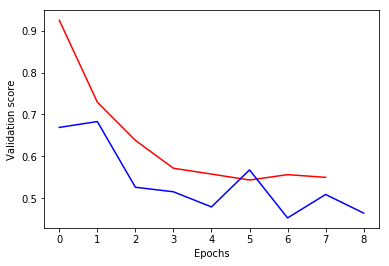

In [0]:
# Create the plot
plt.plot(model_1_training.history['val_loss'], 'r', model_2_training.history['val_loss'], 'b')
plt.xlabel('Epochs')
plt.ylabel('Validation score')
plt.show()

You've seen how to experiment with wider networks. In this exercise, you'll try a deeper network (more hidden layers).

Once again, you have a baseline model called model_1 as a starting point. It has 1 hidden layer, with 50 units. 

In [0]:
n_cols = 10

# The input shape to use in the first hidden layer
input_shape = (n_cols,)

In [0]:
model_1 = Sequential()
model_1.add(Dense(50, activation='relu', input_shape=input_shape))
model_1.add(Dense(2,activation='softmax'))
model_1.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_29 (Dense)             (None, 50)                550       
_________________________________________________________________
dense_30 (Dense)             (None, 2)                 102       
Total params: 652
Trainable params: 652
Non-trainable params: 0
_________________________________________________________________


In [0]:
# compile model 1
model_1.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

In [0]:
# Create the new model: model_2
model_2 = Sequential()

# Add the first, second, and third hidden layers
model_2.add(Dense(50, activation='relu', input_shape=input_shape))
model_2.add(Dense(50, activation='relu'))
model_2.add(Dense(50, activation='relu'))

# Add the output layer
model_2.add(Dense(2, activation='softmax'))

# Compile model_2
model_2.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

In [0]:
# Fit model 1
model_1_training = model_1.fit(
    predictors, target, epochs=20, validation_split=0.4, 
    callbacks=[early_stopping_monitor], verbose=False)

In [0]:
# Fit model 2
model_2_training = model_2.fit(
    predictors, target, epochs=20, validation_split=0.4, 
    callbacks=[early_stopping_monitor], verbose=False)

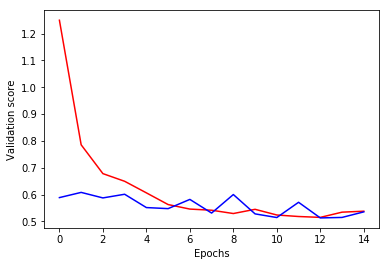

In [0]:
# Create the plot
plt.plot(model_1_training.history['val_loss'], 'r', model_2_training.history['val_loss'], 'b')
plt.xlabel('Epochs')
plt.ylabel('Validation score')
plt.show()

#### Thinking about model capacity

To improve model capacity, add more hidden layers and/or more units in each hidden layer.

#### Stepping up to images

We've already done the basic manipulation of the MNIST dataset shown in the video, so you have X and y loaded and ready to model with. Sequential and Dense from keras are also pre-imported.

To add an extra challenge, we've loaded only 2500 images, rather than 60000 which you will see in some published results. Deep learning models perform better with more data, however, they also take longer to train, especially when they start becoming more complex.

In [0]:
from keras.datasets import mnist

Using TensorFlow backend.


In [0]:
(x_train, y_train), (x_test, y_test) = mnist.load_data()

In [0]:
x_test.shape

(10000, 28, 28)

In [0]:
X.shape # 2500, 784
y.shape # 2500, 10
# data is not loaded here

In [0]:
# Create the model: model
model = Sequential()

# Add the first hidden layer
model.add(Dense(50, activation='relu', input_shape=(784,)))

# Add the second hidden layer
model.add(Dense(50, activation='relu'))

# Add the output layer
model.add(Dense(10, activation='softmax'))

# Compile the model
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# Fit the model
model.fit(X, y, validation_split=0.3)